In [1]:
import numpy as np
import pickle
import pynbody
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt
import pylab

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
custom_blues = ["#99DDFF","#66CCFF", "#33BBFF", "#00AAFF", "#0088CC", "#006699", "#004466", "#000000"]
custom_bluegreens = ["#99FFDD","#66FFCC", "#33FFBB", "#00FFAA", "#00CC88", "#009966", "#006644", "#000000"]
custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
custom_cet_fdm = ["#EE99FF","#E566FF","#DD33FF","#D400FF","#AA00CC","#7F0099","#550066"]

sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['wdm_3'] = custom_blues_complement[1]
sim_colors['wdm_4'] = custom_blues_complement[2]
sim_colors['wdm_5'] = custom_blues_complement[3]
sim_colors['wdm_6'] = custom_blues_complement[4]
sim_colors['wdm_6.5'] = custom_blues_complement[5]
sim_colors['wdm_10'] = custom_blues_complement[6]
sim_colors['wdm_100'] = 'brown'
sim_colors['wdm_500'] = 'gray'
sim_colors['idm_n2_1e-4GeV'] = custom_blues[2]
sim_colors['idm_n2_1e-2GeV'] = custom_blues[4]
sim_colors['idm_n2_1GeV'] = custom_blues[6]
sim_colors['idm_n4_1e-4GeV'] = custom_bluegreens[2]
sim_colors['idm_n4_1e-2GeV'] = custom_bluegreens[4]
sim_colors['idm_n4_1GeV'] = custom_bluegreens[6]
sim_colors['fdm_25.9e-22eV'] = custom_cet_fdm[1]
sim_colors['fdm_69.4e-22eV'] = custom_cet_fdm[2]
sim_colors['fdm_113e-22eV'] = custom_cet_fdm[3]
sim_colors['fdm_151e-22eV'] = custom_cet_fdm[4]
sim_colors['fdm_185e-22eV'] = custom_cet_fdm[5]
sim_colors['fdm_490e-22eV'] = custom_cet_fdm[6]
sim_colors['running_10'] = 'teal'
sim_colors['running_1'] = 'goldenrod'

plt.rc("text", usetex=True)
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = 'False'

### Load simulation data

In [2]:
with open("/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/sim_data.bin", "rb") as f:
    sim_data = pickle.load(f, encoding='latin1')

In [3]:
halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8

In [4]:
ind

array([ True,  True,  True, ..., False, False, False], shape=(1208,))

In [5]:
sim_data[halo_num]['cdm'][2]['Mvir']

array([1.056e+11, 1.135e+10, 8.807e+09, ..., 1.410e+06, 1.128e+06,
       5.640e+05], shape=(1208,), dtype=float32)

In [8]:
sim_data[halo_num]['cdm'][2]

(array([(1.     , 7208101, 29, -1, 7.225e+11, 184.336, 17.119, 64.76799, 62.80204, 64.83894, 163.98),
        (0.98733, 7179446, 24, -1, 7.094e+11, 184.217, 20.226, 64.75042, 62.79382, 64.82188, 152.71),
        (0.97483, 7150203, 23, -1, 6.968e+11, 184.096, 21.123, 64.73286, 62.78687, 64.80569, 149.97),
        (0.96248, 7120603, 23, -1, 6.804e+11, 183.598, 21.98 , 64.71503, 62.78196, 64.78942, 150.3 ),
        (0.95029, 7090425, 20, -1, 6.612e+11, 182.797, 20.788, 64.69801, 62.7759 , 64.77243, 149.8 ),
        (0.93825, 7060540, 22, -1, 6.188e+11, 179.7  , 17.653, 64.68105, 62.76966, 64.75536, 149.7 ),
        (0.92637, 7030562, 18, -1, 5.575e+11, 174.414, 15.466, 64.66423, 62.76276, 64.73845, 150.68),
        (0.91463, 7000464, 19, -1, 5.346e+11, 172.828, 14.959, 64.64739, 62.75506, 64.72208, 149.61),
        (0.90305, 6970386, 18, -1, 5.211e+11, 172.182, 15.183, 64.63033, 62.74763, 64.70621, 146.1 ),
        (0.89161, 6940136, 18, -1, 5.140e+11, 172.188, 16.134, 64.61298, 62.74122,

### Subhalo Mass Functions

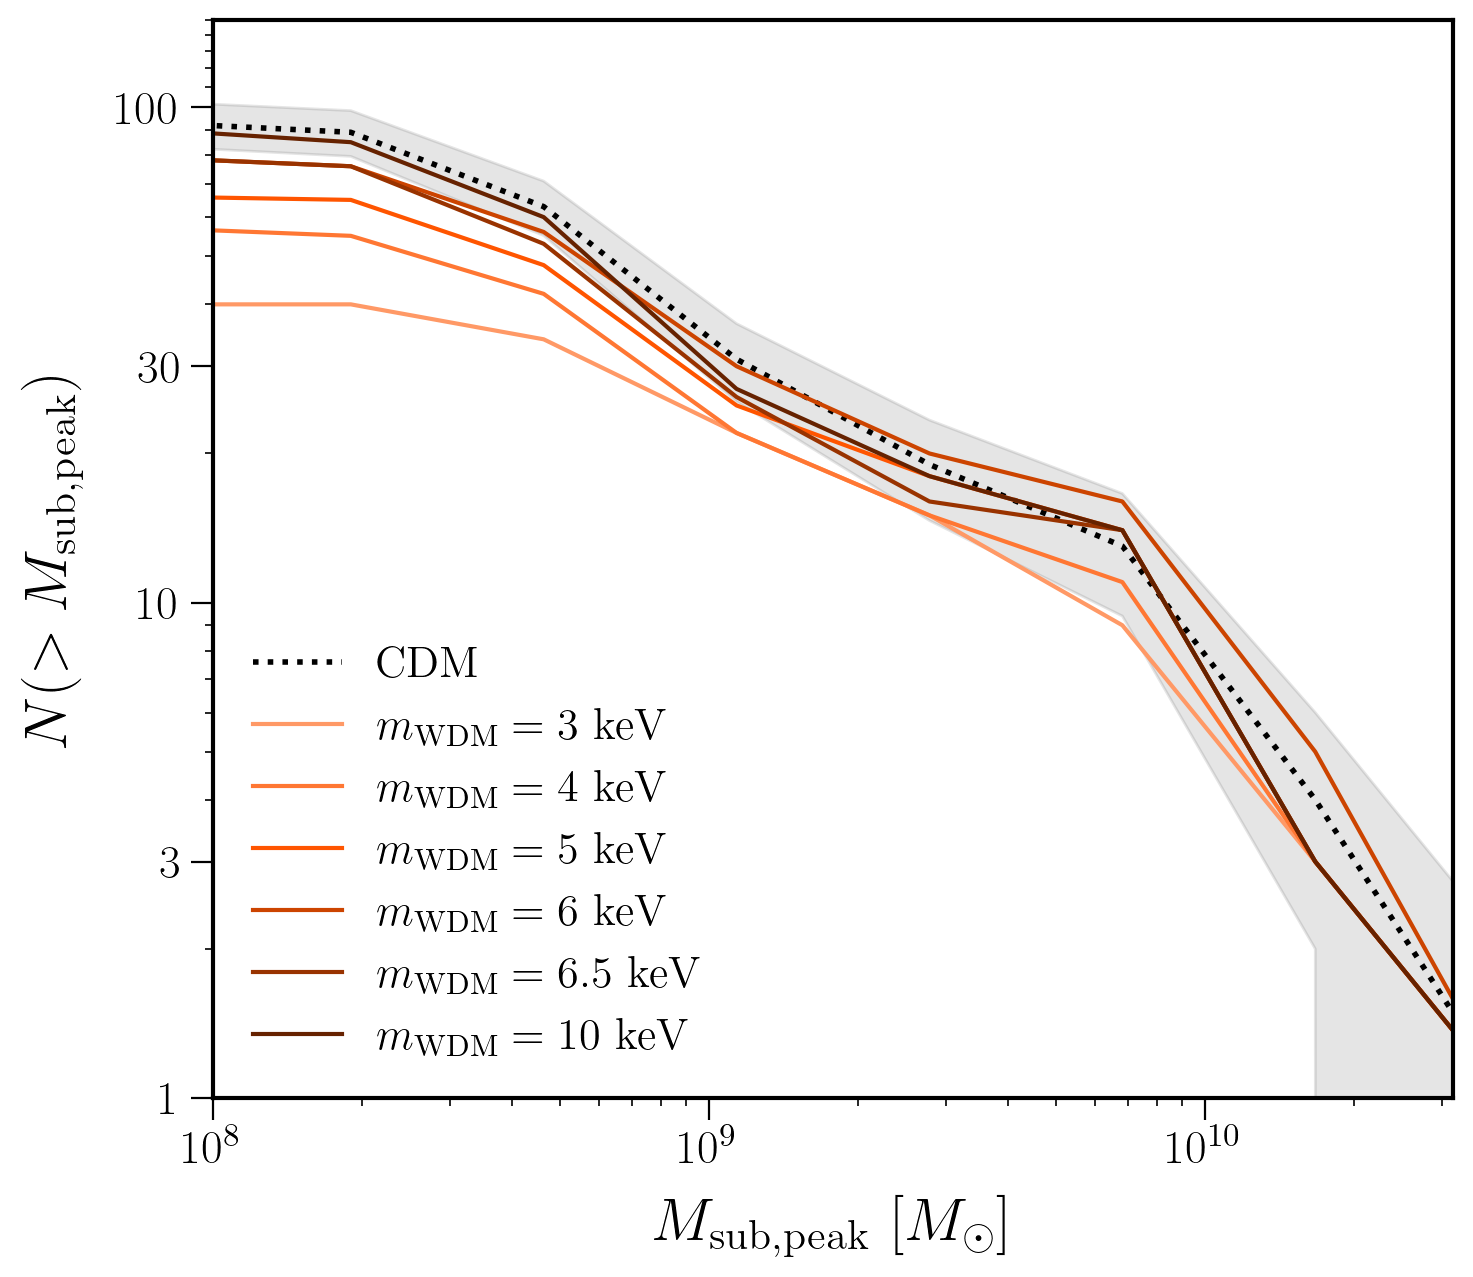

In [9]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

# binary array defined based on Mvir 
ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
# We do a cut based on Mpeak, but again we need to take /0.7 of the Mpeak for conversion purposes
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

labels_wdm = {'3': r'$m_{\mathrm{WDM}}=3\ \mathrm{keV}$', '4': r'$m_{\mathrm{WDM}}=4\ \mathrm{keV}$',
         '5': r'$m_{\mathrm{WDM}}=5\ \mathrm{keV}$', '6': r'$m_{\mathrm{WDM}}=6\ \mathrm{keV}$',
         '6.5': r'$m_{\mathrm{WDM}}=6.5\ \mathrm{keV}$', '10': r'$m_{\mathrm{WDM}}=10\ \mathrm{keV}$'}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],label=labels_wdm[mass])

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)

# ax.set_title(r'$\mathrm{Warm\ Dark\ Matter}$',fontsize=25)
#plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_wdm.pdf')
plt.show()

In [10]:
print(10**WDM8K_base[1:])

[7.74263683e+07 1.89573565e+08 4.64158883e+08 1.13646367e+09
 2.78255940e+09 6.81292069e+09 1.66810054e+10 4.08423865e+10
 1.00000000e+11]


In [11]:
print(len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative)

[90 85 60 27 18 14  3  1  1]


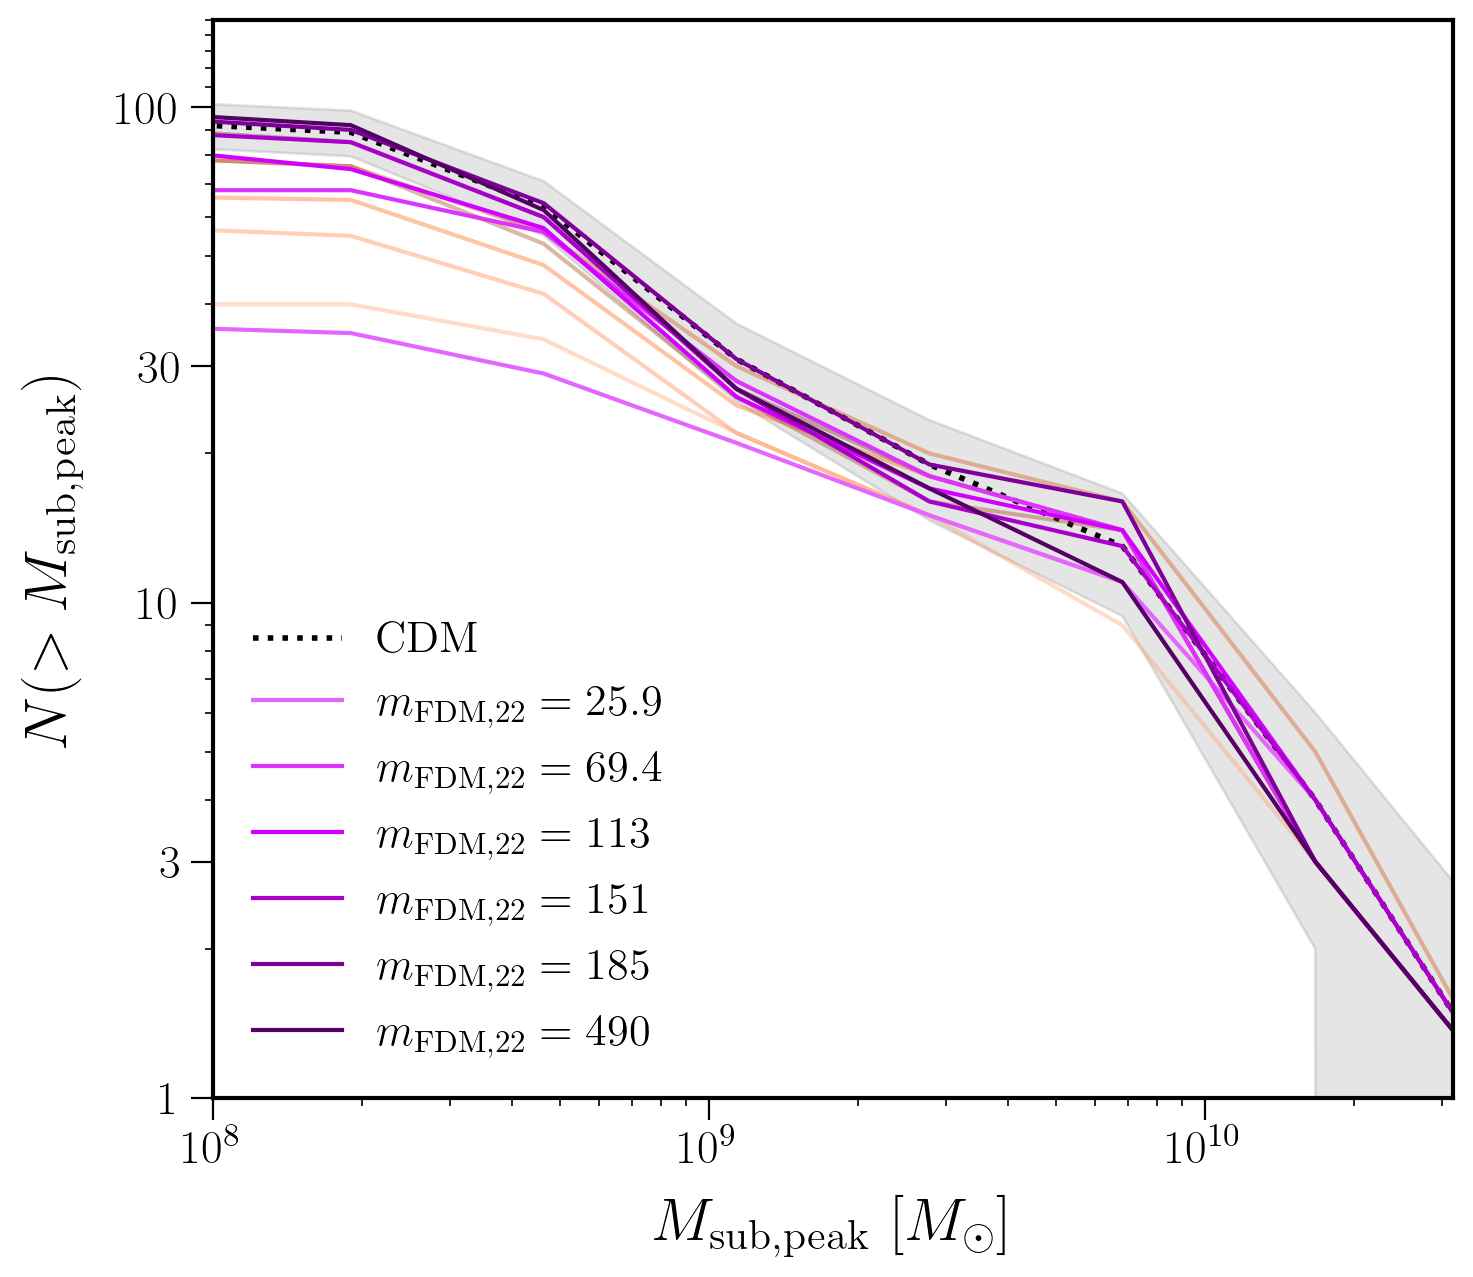

In [12]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

labels_fdm = {'25.9': r'$m_{\mathrm{FDM},22}=25.9$', '69.4': r'$m_{\mathrm{FDM},22}=69.4$',
         '113': r'$m_{\mathrm{FDM},22}=113$', '151': r'$m_{\mathrm{FDM},22}=151$',
         '185': r'$m_{\mathrm{FDM},22}=185$', '490': r'$m_{\mathrm{FDM},22}=490$'}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
for mass in ['25.9','69.4','113','151','185','490']:
    ind = sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    FDM8K_values, FDM8K_base = np.histogram(np.log10(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    FDM8K_cumulative = np.cumsum(FDM8K_values)
    ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind])-FDM8K_cumulative,
           c=sim_colors['fdm_{}e-22eV'.format(mass)],label=labels_fdm[mass])

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)

# ax.set_title(r'$\mathrm{Warm\ Dark\ Matter}$',fontsize=25)
#plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_fdm.pdf')
plt.show()

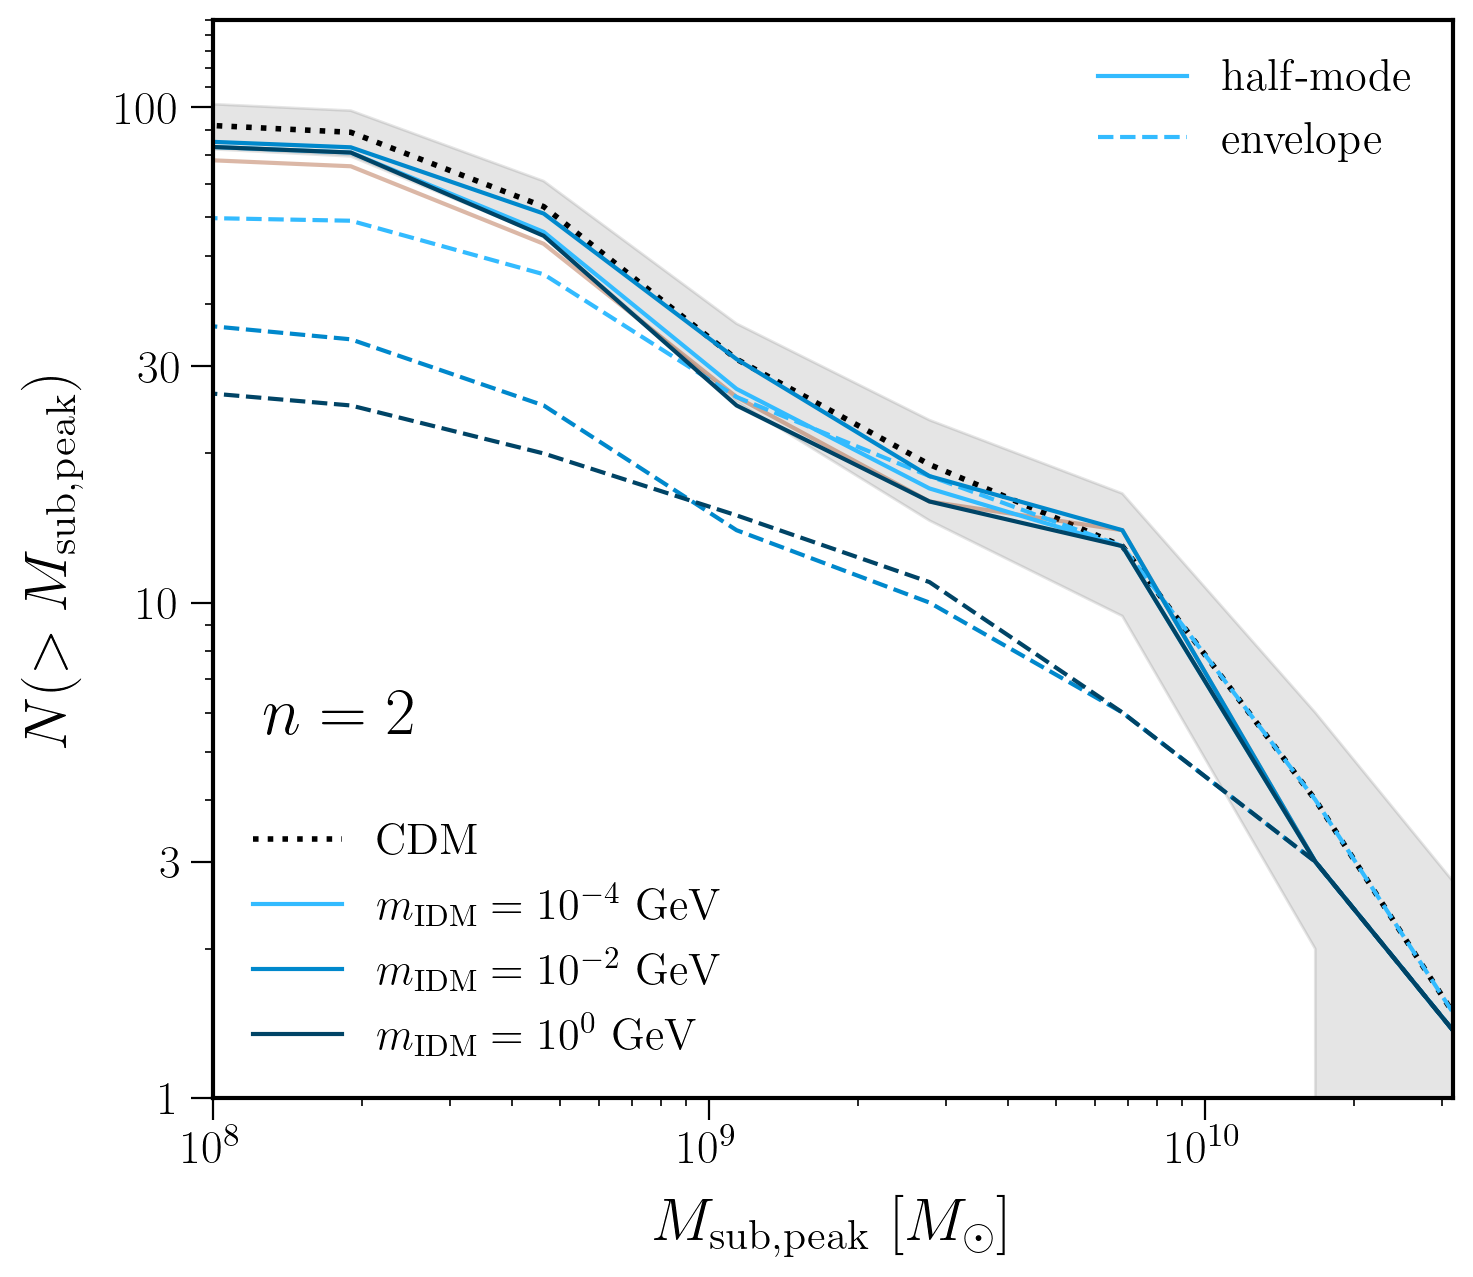

In [13]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

cdm = ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}
for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],label=labels_idm[mass]))
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$')
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

ax.text(8.1,5.4,r'$n=2$',fontsize=24)

# ax.set_title(r'$\mathrm{Warm\ Dark\ Matter}$',fontsize=25)
#plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_idm_n2.pdf')
plt.show()

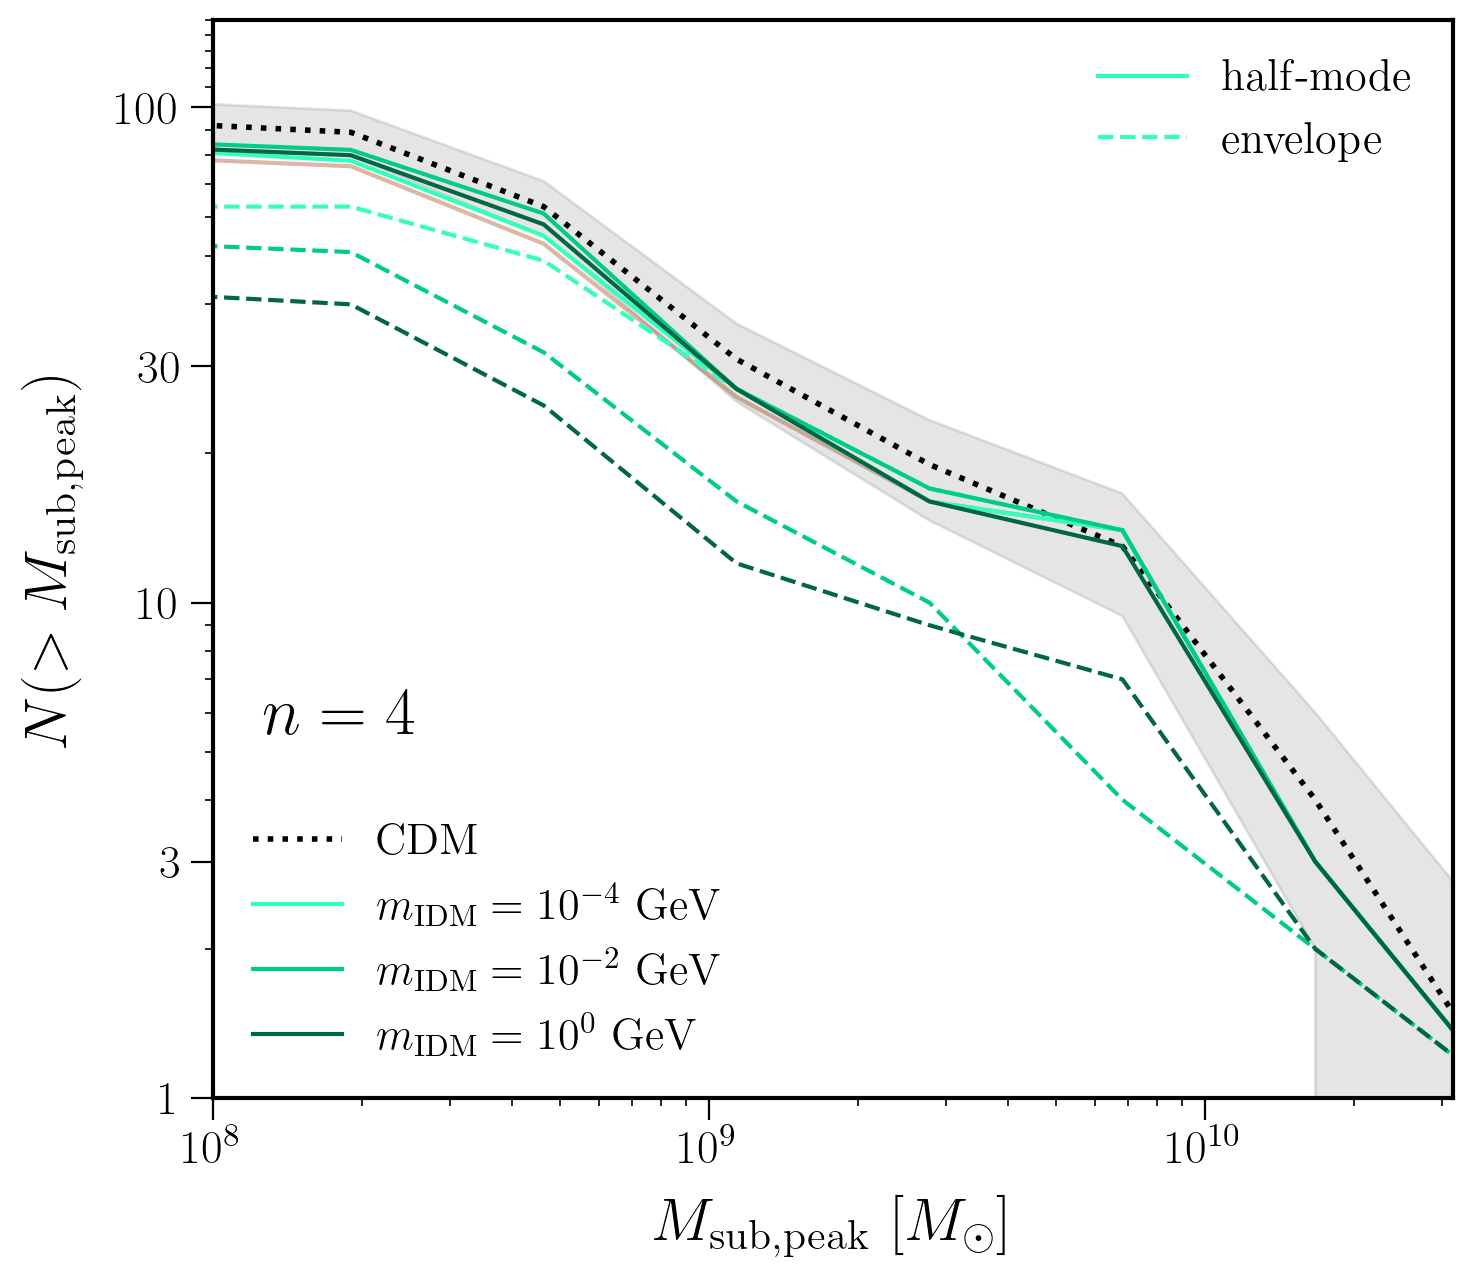

In [14]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

cdm = ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}
for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(IDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],label=labels_idm[mass]))
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$')
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

ax.text(8.1,5.4,r'$n=4$',fontsize=24)

# ax.set_title(r'$\mathrm{Warm\ Dark\ Matter}$',fontsize=25)
#plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_idm_n4.pdf')
plt.show()

Loading simulation data from: /central/groups/carnegie_poc/enadler/ncdm_resims/analysis/sim_data.bin
Data loaded successfully.
Half-mode subhalos found: 83
Envelope subhalos found: 42
Plot saved to: shmf_comparison_ethan_only_1GeV.png


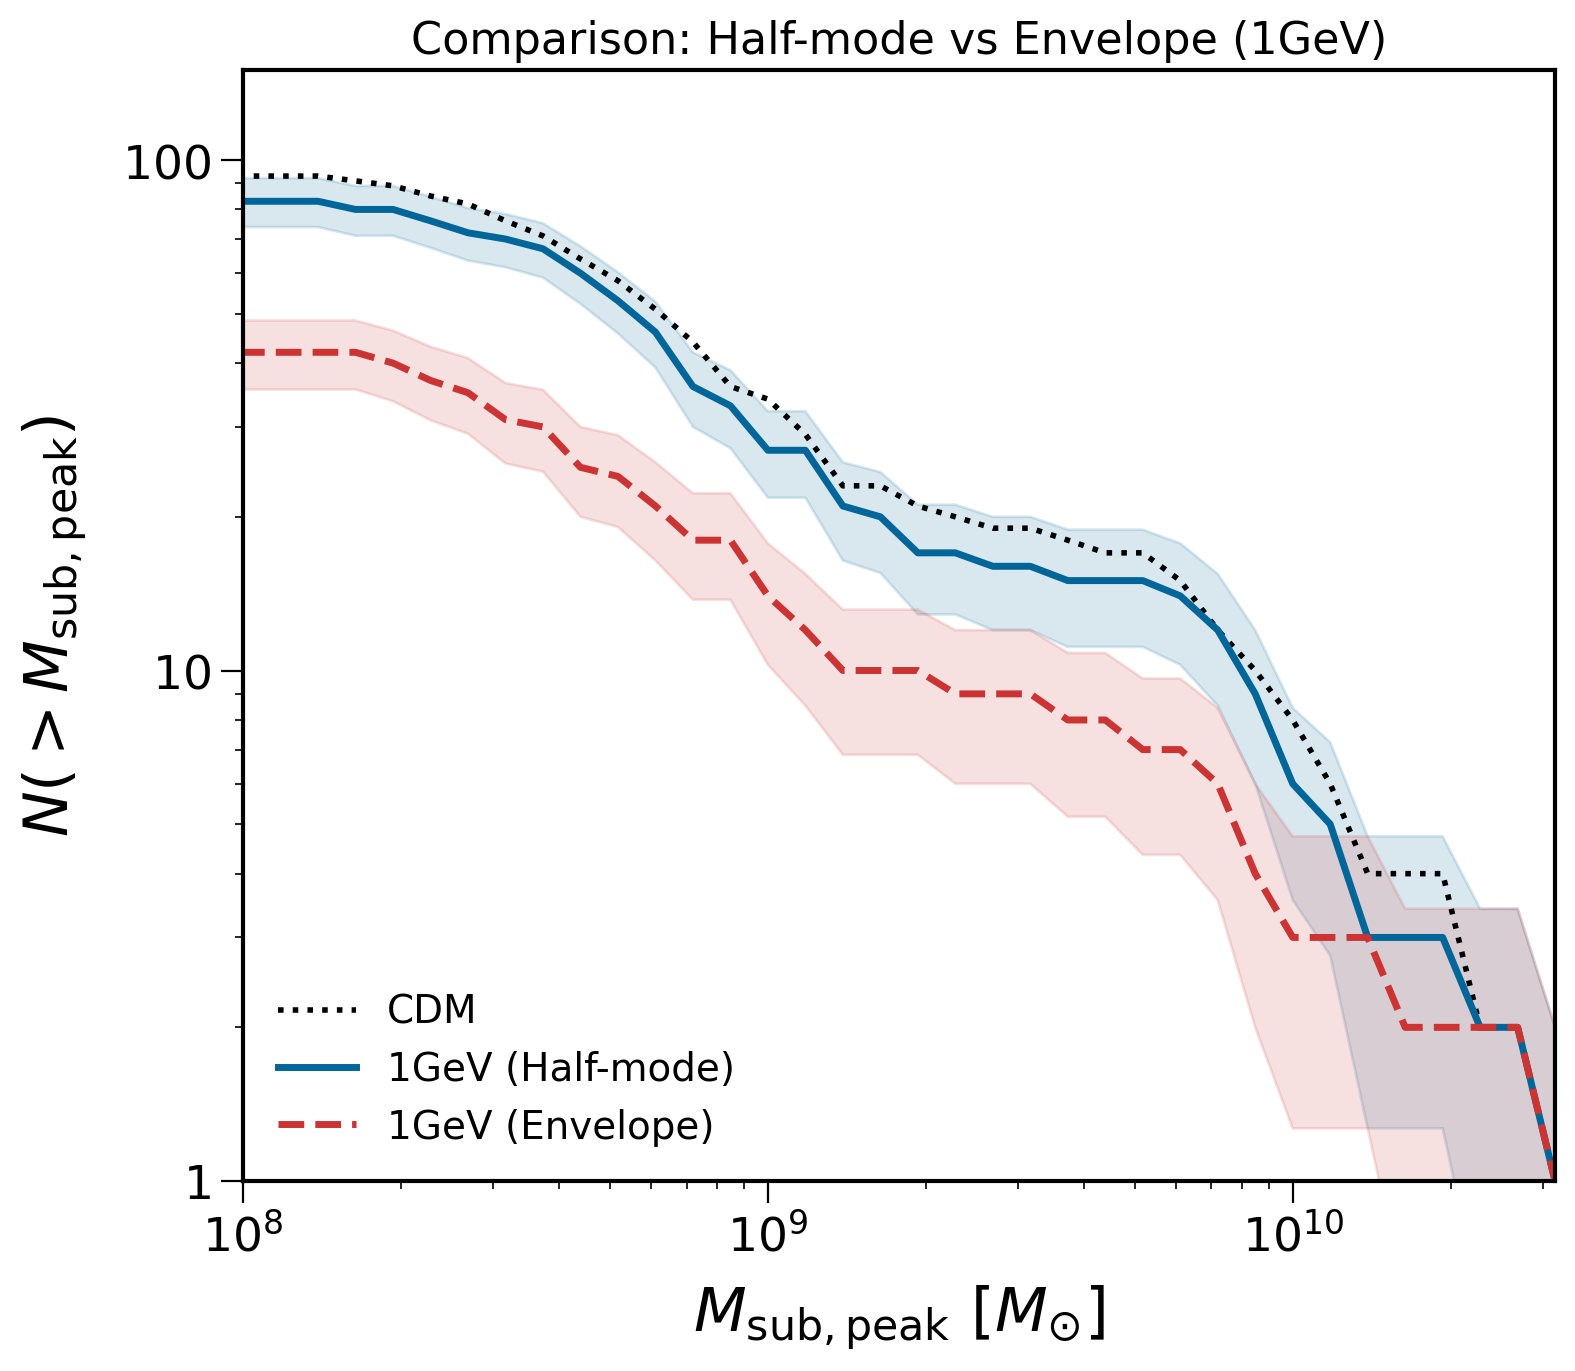

In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

# --- Plotting Style ---
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = False

# --- Configuration ---
# Path to Ethan's compiled simulation data
ETHAN_DATA_PATH = "/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/sim_data.bin"

# Constants
HUBBLE_PARAM = 0.7 
MASS_CUT_PHYSICAL = 1.2e8 
HALO_KEY = 'Halo004'
MASS_KEY = '1GeV'  # The key inside the pickle file for the model we are comparing

# Output path for the plot
OUTPUT_PLOT = "shmf_comparison_ethan_only_1GeV.png"

# --- Main Execution ---
if __name__ == "__main__":
    
    print(f"Loading simulation data from: {ETHAN_DATA_PATH}")
    
    # 1. Load Data
    try:
        with open(ETHAN_DATA_PATH, "rb") as f:
            sim_data = pickle.load(f, encoding='latin1')
        print("Data loaded successfully.")
    except Exception as e:
        print(f"Error loading pickle file: {e}")
        exit()

    # 2. Setup Plot
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111)
    
    # Define bins (High resolution for smooth lines)
    bins = np.linspace(7.5, 11, 50) 
    
    # --- PLOTTING LOGIC ---
    
    if HALO_KEY in sim_data:
        
        # --- A. CDM Baseline (Optional, for reference) ---
        try:
            d_cdm = sim_data[HALO_KEY]['cdm'][2]
            ind_cdm = d_cdm['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mpeak_cdm = d_cdm['Mpeak'][ind_cdm]/HUBBLE_PARAM
            log_mp_cdm = np.log10(mpeak_cdm)
            
            vals, base = np.histogram(log_mp_cdm, bins=bins)
            y_cdm = len(log_mp_cdm) - np.cumsum(vals)
            
            # Plot CDM as black dotted line
            ax.plot(base[1:], y_cdm, color='k', ls=':', lw=2, label='CDM')
            
        except KeyError:
            print("CDM data missing (skipping baseline).")

        # --- B. Half-mode (Blue) ---
        try:
            d_hm = sim_data[HALO_KEY][f'idm_{MASS_KEY}']['halfmode'][2]
            ind_hm = d_hm['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mpeak_hm = d_hm['Mpeak'][ind_hm]/HUBBLE_PARAM
            log_mp_hm = np.log10(mpeak_hm[mpeak_hm > 0])
            
            vals_hm, base_hm = np.histogram(log_mp_hm, bins=bins)
            y_hm = len(log_mp_hm) - np.cumsum(vals_hm)
            err_hm = np.sqrt(y_hm)
            
            # Plot Half-mode
            color_hm = "#006699" # Blue
            ax.plot(base_hm[1:], y_hm, color=color_hm, ls='-', lw=2.5, label='1GeV (Half-mode)')
            ax.fill_between(base_hm[1:], np.clip(y_hm-err_hm, 0.1, None), y_hm+err_hm, color=color_hm, alpha=0.15)
            
            print(f"Half-mode subhalos found: {len(log_mp_hm)}")
            
        except KeyError:
            print(f"Half-mode data for {MASS_KEY} not found.")

        # --- C. Envelope (Red) ---
        try:
            d_env = sim_data[HALO_KEY][f'idm_{MASS_KEY}']['envelope'][2]
            ind_env = d_env['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mpeak_env = d_env['Mpeak'][ind_env]/HUBBLE_PARAM
            log_mp_env = np.log10(mpeak_env[mpeak_env > 0])
            
            vals_env, base_env = np.histogram(log_mp_env, bins=bins)
            y_env = len(log_mp_env) - np.cumsum(vals_env)
            err_env = np.sqrt(y_env)
            
            # Plot Envelope
            color_env = "#CC3333" # Red
            ax.plot(base_env[1:], y_env, color=color_env, ls='--', lw=2.5, label='1GeV (Envelope)')
            ax.fill_between(base_env[1:], np.clip(y_env-err_env, 0.1, None), y_env+err_env, color=color_env, alpha=0.15)
            
            print(f"Envelope subhalos found: {len(log_mp_env)}")
            
        except KeyError:
            print(f"Envelope data for {MASS_KEY} not found.")

    else:
        print(f"Halo key '{HALO_KEY}' not found in simulation data.")

    # 3. Formatting
    ax.legend(fontsize=14, loc='lower left')
    
    ax.set_yscale('log')
    ax.set_xlim(8.0, 10.5)
    ax.set_ylim([1, 150]) # Standard limit for this halo
    
    # Custom Ticks
    ax.set_xticks([8, 9, 10])
    ax.set_xticklabels([r'$10^8$', r'$10^9$', r'$10^{10}$'], fontsize=17)
    
    minor_ticks_x = np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8, 2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9, 2e10,3e10])
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_xticklabels(['']*len(minor_ticks_x), minor=True)

    ax.set_yticks([1, 10, 100])
    ax.set_yticklabels([r'$1$', r'$10$', r'$100$'], fontsize=17)
    
    ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\odot}]$', fontsize=22, labelpad=8)
    ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=22, labelpad=12)
    
    ax.set_title(r"Comparison: Half-mode vs Envelope (1GeV)", fontsize=16)

    plt.tight_layout()
    plt.savefig(OUTPUT_PLOT, dpi=300)
    print(f"Plot saved to: {OUTPUT_PLOT}")
    plt.show()

Loading Ethan's simulation data from: /central/groups/carnegie_poc/enadler/ncdm_resims/analysis/sim_data.bin
Loading your simulation data from: /resnick/groups/carnegie_poc/achu/n4_1GeV_middle_fixed/output_n4_1GeV_middle_fixed/rockstar
--------------------------------------------------
Ethan's data loaded successfully.

Loading your simulation data...
Loading your consistent-trees data from: /resnick/groups/carnegie_poc/achu/n4_1GeV_middle_fixed/output_n4_1GeV_middle_fixed/rockstar
ERROR: No tree_*.dat files found in /resnick/groups/carnegie_poc/achu/n4_1GeV_middle_fixed/output_n4_1GeV_middle_fixed/rockstar
Trying to extract from rockstar list files instead...
Extracting Mpeak from rockstar list files in: /resnick/groups/carnegie_poc/achu/n4_1GeV_middle_fixed/output_n4_1GeV_middle_fixed/rockstar
Found 236 rockstar output files
Total halos from rockstar (using Mvir as proxy): 2251821
CDM subhalos from Ethan: 93
Half-mode subhalos from Ethan: 83
Envelope subhalos from Ethan: 42

Processi

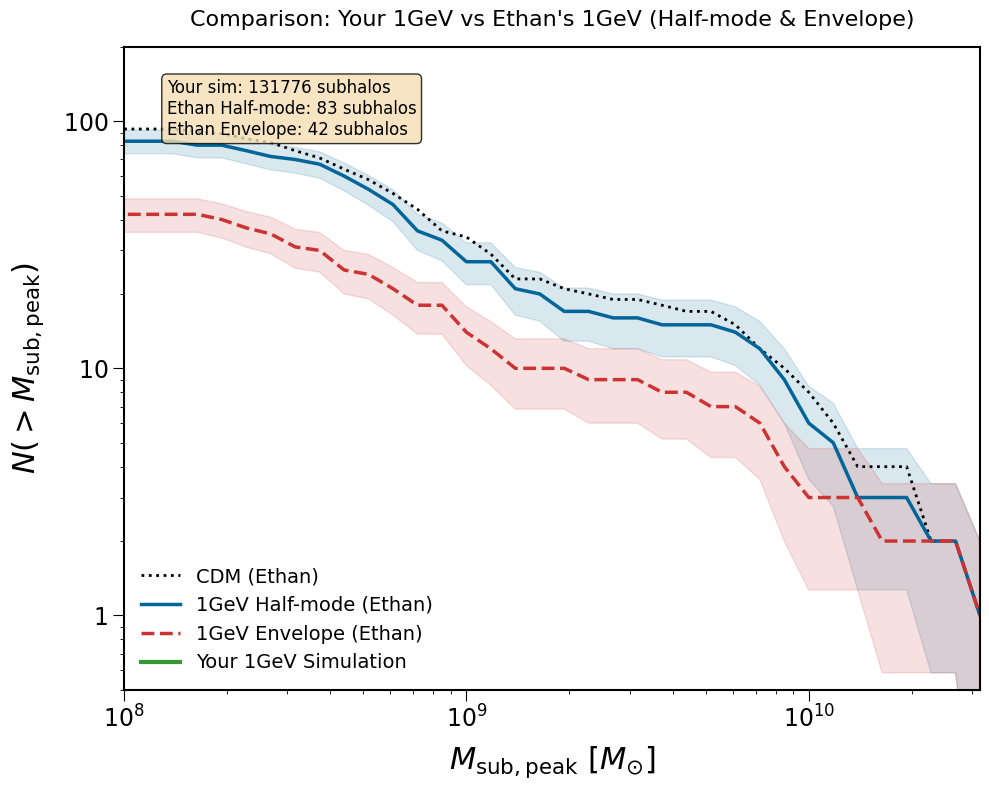

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import glob
from scipy import interpolate

# --- Plotting Style ---
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = False

# --- Configuration ---
# Path to Ethan's compiled simulation data
ETHAN_DATA_PATH = "/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/sim_data.bin"

# Path to your consistent-trees output
YOUR_DATA_PATH = "/resnick/groups/carnegie_poc/achu/n4_1GeV_middle_fixed/output_n4_1GeV_middle_fixed/rockstar"

# Constants
HUBBLE_PARAM = 0.7 
MASS_CUT_PHYSICAL = 1.2e8 
HALO_KEY = 'Halo004'
MASS_KEY = '1GeV'  # The key inside the pickle file for the model we are comparing

# Output path for the plot
OUTPUT_PLOT = "shmf_comparison_your_1GeV_vs_ethan.png"

# Function to load your consistent-trees data
def load_your_consistent_trees_data(data_path):
    """
    Load your consistent-trees output data.
    Returns peak masses of subhalos.
    """
    print(f"Loading your consistent-trees data from: {data_path}")
    
    # Look for consistent-trees output files
    # They are typically in: tree_*.dat or similar
    tree_files = glob.glob(os.path.join(data_path, "tree_*.dat"))
    if not tree_files:
        # Try looking in outputs directory
        tree_files = glob.glob(os.path.join(data_path, "outputs", "tree_*.dat"))
    
    if not tree_files:
        print(f"ERROR: No tree_*.dat files found in {data_path}")
        return None
    
    print(f"Found {len(tree_files)} tree files")
    
    # Read all tree files and extract peak masses
    all_peak_masses = []
    
    for tree_file in tree_files[:1]:  # Process first tree file for now
        try:
            print(f"Processing {tree_file}...")
            
            # Read the tree file
            # Format: check the consistent-trees documentation
            # Usually columns: scale, id, desc_id, mvir, mpeak, etc.
            data = np.loadtxt(tree_file)
            
            if data.ndim == 1:
                data = data.reshape(1, -1)
            
            # Assuming columns based on typical consistent-trees output:
            # scale(0), id(1), desc_id(2), mvir(3), vrms(4), vmax(5), mpeak(6), etc.
            # You may need to adjust these indices based on your actual file format
            
            # Try to find mpeak column - it's often column 6 or 7
            if data.shape[1] >= 7:
                mpeak = data[:, 6]  # Try column 6
                print(f"  Using column 6 for mpeak, shape: {mpeak.shape}")
            elif data.shape[1] >= 8:
                mpeak = data[:, 7]  # Try column 7
                print(f"  Using column 7 for mpeak, shape: {mpeak.shape}")
            else:
                print(f"  WARNING: Not enough columns ({data.shape[1]}) in tree file")
                continue
            
            # Convert to physical units (divide by h)
            mpeak_physical = mpeak / HUBBLE_PARAM
            
            # Apply mass cut
            mpeak_cut = mpeak_physical[mpeak_physical > MASS_CUT_PHYSICAL]
            
            print(f"  Found {len(mpeak_cut)} subhalos above mass cut")
            all_peak_masses.extend(mpeak_cut)
            
        except Exception as e:
            print(f"  Error processing {tree_file}: {e}")
            continue
    
    if not all_peak_masses:
        print("ERROR: No peak masses extracted from tree files")
        return None
    
    all_peak_masses = np.array(all_peak_masses)
    print(f"Total subhalos from your simulation: {len(all_peak_masses)}")
    
    return all_peak_masses

def extract_mpeak_from_rockstar_list_files(data_path):
    """
    Alternative: Extract Mpeak directly from rockstar out_*.list files
    if consistent-trees hasn't run yet.
    """
    print(f"Extracting Mpeak from rockstar list files in: {data_path}")
    
    all_mvir = []
    
    # Find all rockstar output files
    list_files = sorted(glob.glob(os.path.join(data_path, "out_*.list")))
    
    if not list_files:
        print(f"ERROR: No out_*.list files found in {data_path}")
        return None
    
    print(f"Found {len(list_files)} rockstar output files")
    
    # Process each snapshot
    for list_file in list_files:
        try:
            # Read the file, skipping comment lines
            with open(list_file, 'r') as f:
                lines = [line.strip() for line in f if not line.startswith('#')]
            
            if not lines:
                continue
                
            # Parse data - Mvir is typically column 2 (0-indexed)
            for line in lines:
                parts = line.split()
                if len(parts) >= 3:
                    try:
                        mvir = float(parts[2])  # Mvir in Msun/h
                        all_mvir.append(mvir / HUBBLE_PARAM)  # Convert to physical
                    except ValueError:
                        continue
                        
        except Exception as e:
            print(f"  Error processing {list_file}: {e}")
            continue
    
    if not all_mvir:
        print("ERROR: No Mvir values extracted from rockstar files")
        return None
    
    all_mvir = np.array(all_mvir)
    
    # For rockstar-only data, use Mvir as proxy for Mpeak
    # This is approximate - consistent-trees provides better Mpeak
    print(f"Total halos from rockstar (using Mvir as proxy): {len(all_mvir)}")
    
    return all_mvir[all_mvir > MASS_CUT_PHYSICAL]

# --- Main Execution ---
if __name__ == "__main__":
    
    print(f"Loading Ethan's simulation data from: {ETHAN_DATA_PATH}")
    print(f"Loading your simulation data from: {YOUR_DATA_PATH}")
    print("-" * 50)
    
    # 1. Load Ethan's Data
    ethan_data = None
    try:
        with open(ETHAN_DATA_PATH, "rb") as f:
            ethan_data = pickle.load(f, encoding='latin1')
        print("Ethan's data loaded successfully.")
    except Exception as e:
        print(f"Error loading Ethan's pickle file: {e}")
        exit()
    
    # 2. Load Your Data
    print("\nLoading your simulation data...")
    your_peak_masses = load_your_consistent_trees_data(YOUR_DATA_PATH)
    
    # If consistent-trees not available, try rockstar files
    if your_peak_masses is None:
        print("Trying to extract from rockstar list files instead...")
        your_peak_masses = extract_mpeak_from_rockstar_list_files(YOUR_DATA_PATH)
    
    if your_peak_masses is None:
        print("ERROR: Could not load your simulation data")
        exit()
    
    # 3. Setup Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    
    # Define bins (High resolution for smooth lines)
    bins = np.linspace(7.5, 11, 50) 
    
    # --- PLOTTING LOGIC ---
    
    if HALO_KEY in ethan_data:
        
        # --- A. CDM Baseline (Optional, for reference) ---
        try:
            d_cdm = ethan_data[HALO_KEY]['cdm'][2]
            ind_cdm = d_cdm['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mpeak_cdm = d_cdm['Mpeak'][ind_cdm]/HUBBLE_PARAM
            log_mp_cdm = np.log10(mpeak_cdm)
            
            vals, base = np.histogram(log_mp_cdm, bins=bins)
            y_cdm = len(log_mp_cdm) - np.cumsum(vals)
            
            # Plot CDM as black dotted line
            ax.plot(base[1:], y_cdm, color='k', ls=':', lw=2, label='CDM (Ethan)')
            
            print(f"CDM subhalos from Ethan: {len(log_mp_cdm)}")
            
        except KeyError:
            print("CDM data missing (skipping baseline).")

        # --- B. Ethan's Half-mode (Blue) ---
        try:
            d_hm = ethan_data[HALO_KEY][f'idm_{MASS_KEY}']['halfmode'][2]
            ind_hm = d_hm['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mpeak_hm = d_hm['Mpeak'][ind_hm]/HUBBLE_PARAM
            log_mp_hm = np.log10(mpeak_hm[mpeak_hm > 0])
            
            vals_hm, base_hm = np.histogram(log_mp_hm, bins=bins)
            y_hm = len(log_mp_hm) - np.cumsum(vals_hm)
            err_hm = np.sqrt(y_hm)
            
            # Plot Ethan's Half-mode
            color_hm = "#006699" # Blue
            ax.plot(base_hm[1:], y_hm, color=color_hm, ls='-', lw=2.5, 
                   label='1GeV Half-mode (Ethan)')
            ax.fill_between(base_hm[1:], np.clip(y_hm-err_hm, 0.1, None), 
                           y_hm+err_hm, color=color_hm, alpha=0.15)
            
            print(f"Half-mode subhalos from Ethan: {len(log_mp_hm)}")
            
        except KeyError:
            print(f"Half-mode data for {MASS_KEY} not found in Ethan's data.")

        # --- C. Ethan's Envelope (Red) ---
        try:
            d_env = ethan_data[HALO_KEY][f'idm_{MASS_KEY}']['envelope'][2]
            ind_env = d_env['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mpeak_env = d_env['Mpeak'][ind_env]/HUBBLE_PARAM
            log_mp_env = np.log10(mpeak_env[mpeak_env > 0])
            
            vals_env, base_env = np.histogram(log_mp_env, bins=bins)
            y_env = len(log_mp_env) - np.cumsum(vals_env)
            err_env = np.sqrt(y_env)
            
            # Plot Ethan's Envelope
            color_env = "#CC3333" # Red
            ax.plot(base_env[1:], y_env, color=color_env, ls='--', lw=2.5, 
                   label='1GeV Envelope (Ethan)')
            ax.fill_between(base_env[1:], np.clip(y_env-err_env, 0.1, None), 
                           y_env+err_env, color=color_env, alpha=0.15)
            
            print(f"Envelope subhalos from Ethan: {len(log_mp_env)}")
            
        except KeyError:
            print(f"Envelope data for {MASS_KEY} not found in Ethan's data.")

    else:
        print(f"Halo key '{HALO_KEY}' not found in Ethan's data.")
    
    # --- D. Your Simulation (Green) ---
    print(f"\nProcessing your simulation data ({len(your_peak_masses)} subhalos)...")
    
    # Convert to log10
    log_mp_yours = np.log10(your_peak_masses[your_peak_masses > 0])
    
    # Create cumulative histogram
    vals_yours, base_yours = np.histogram(log_mp_yours, bins=bins)
    y_yours = len(log_mp_yours) - np.cumsum(vals_yours)
    err_yours = np.sqrt(y_yours)
    
    # Plot Your Simulation
    color_yours = "#339933" # Green
    ax.plot(base_yours[1:], y_yours, color=color_yours, ls='-', lw=3, 
           label='Your 1GeV Simulation')
    ax.fill_between(base_yours[1:], np.clip(y_yours-err_yours, 0.1, None), 
                   y_yours+err_yours, color=color_yours, alpha=0.2)
    
    print(f"Your simulation subhalos: {len(log_mp_yours)}")
    
    # 3. Formatting
    ax.legend(fontsize=14, loc='lower left')
    
    ax.set_yscale('log')
    ax.set_xlim(8.0, 10.5)
    ax.set_ylim([0.5, 200]) # Slightly expanded limit
    
    # Custom Ticks
    ax.set_xticks([8, 9, 10])
    ax.set_xticklabels([r'$10^8$', r'$10^9$', r'$10^{10}$'], fontsize=17)
    
    minor_ticks_x = np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8, 2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9, 2e10,3e10])
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_xticklabels(['']*len(minor_ticks_x), minor=True)

    ax.set_yticks([1, 10, 100])
    ax.set_yticklabels([r'$1$', r'$10$', r'$100$'], fontsize=17)
    
    ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\odot}]$', fontsize=22, labelpad=8)
    ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=22, labelpad=12)
    
    ax.set_title(r"Comparison: Your 1GeV vs Ethan's 1GeV (Half-mode & Envelope)", 
                fontsize=16, pad=15)
    
    # Add text box with statistics
    stats_text = f"Your sim: {len(log_mp_yours)} subhalos\n"
    if 'log_mp_hm' in locals():
        stats_text += f"Ethan Half-mode: {len(log_mp_hm)} subhalos\n"
    if 'log_mp_env' in locals():
        stats_text += f"Ethan Envelope: {len(log_mp_env)} subhalos"
    
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.savefig(OUTPUT_PLOT, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved to: {OUTPUT_PLOT}")
    plt.show()


--- Processing: Ethan's 1GeV (Envelope) ---
Loading 1438737 halos from Ethan's 1GeV (Envelope)...
  Computing Mpeak (walking main branch)...


100%|██████████| 1430803/1430803 [01:25<00:00, 16669.36it/s]


  Host Halo ID: 2209445.0, Mvir: 7.30e+11
  Subhalos remaining: 42
  Saved cache to: cache_ethan_1GeV_envelope.npy

--- Processing: Ethan's 1GeV (Half-mode) ---
Loading 3064146 halos from Ethan's 1GeV (Half-mode)...
  Computing Mpeak (walking main branch)...


100%|██████████| 3048730/3048730 [03:03<00:00, 16594.76it/s]


  Host Halo ID: 4420455.0, Mvir: 7.22e+11
  Subhalos remaining: 83
  Saved cache to: cache_ethan_1GeV_halfmode.npy
Plot saved to: shmf_comparison_ethan_1GeV_direct_load.png


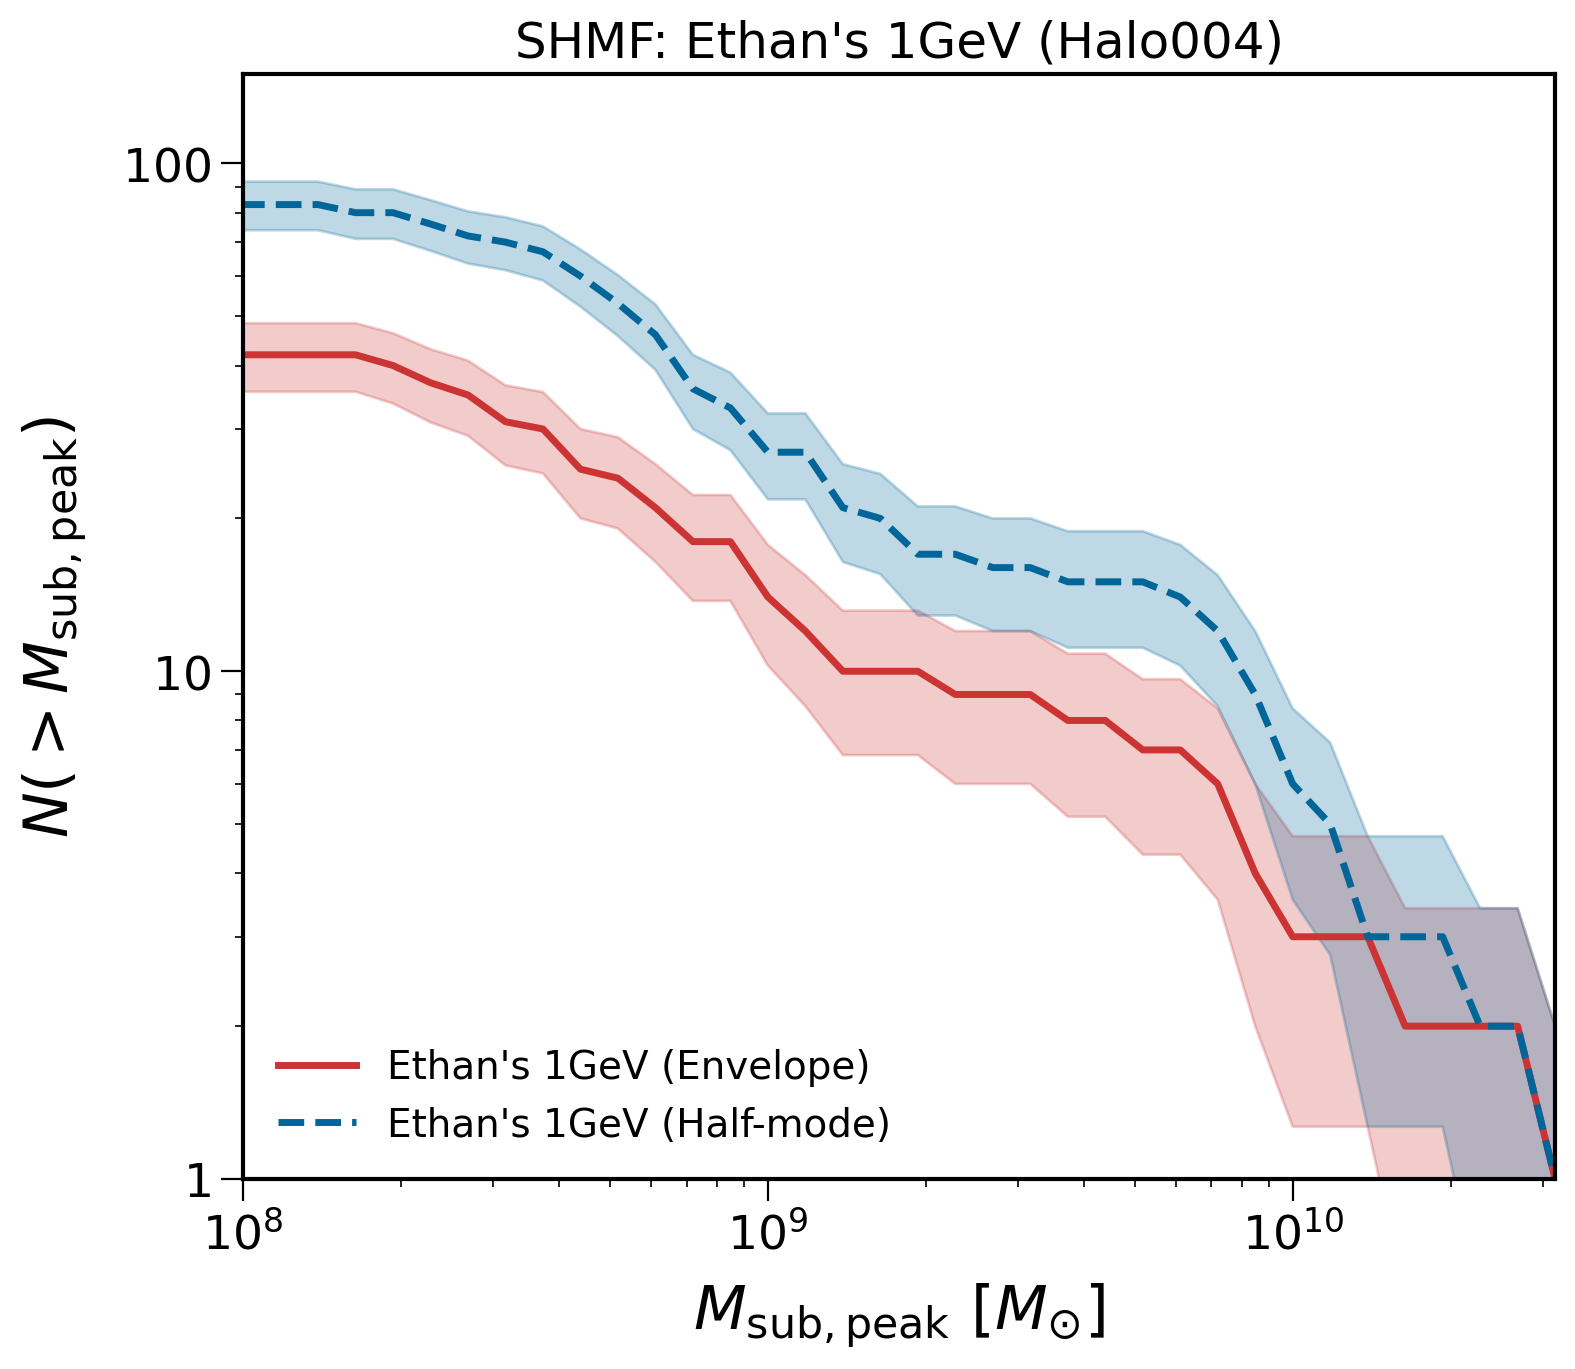

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import pandas as pd
from tqdm import tqdm

# --- Plotting Style ---
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = False

# --- Constants ---
HUBBLE_PARAM = 0.7 
MASS_CUT_PHYSICAL = 1.2e8 
HOST_HALO_MASS_MW = 1.2e12

# --- DIRECTORY CONFIGURATION (Ethan's Halo004) ---
# Base path from your ls output
BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# 1. ENVELOPE CONFIG
# Path constructed based on your 'ls' output:
# idm_1GeV_envelope/output_idm_1GeV_envelope/rockstar/trees/tree_0_0_0.dat
TREE_FILE_ENV = os.path.join(
    BASE_DIR, 
    "idm_1GeV_envelope", 
    "output_idm_1GeV_envelope", 
    "rockstar/trees/tree_0_0_0.dat"
)
# We save the cache in the local directory to avoid write permission errors in Ethan's folder
NPY_FILE_ENV = "cache_ethan_1GeV_envelope.npy" 
LABEL_ENV = r"Ethan's 1GeV (Envelope)"

# 2. HALF-MODE CONFIG
# Assuming symmetric naming convention for the half-mode run
TREE_FILE_HM = os.path.join(
    BASE_DIR, 
    "idm_1GeV_halfmode", 
    "output_idm_1GeV_halfmode", 
    "rockstar/trees/tree_0_0_0.dat"
)
NPY_FILE_HM = "cache_ethan_1GeV_halfmode.npy"
LABEL_HM = r"Ethan's 1GeV (Half-mode)"


# --- YOUR SHMF LOGIC (Calculate Mpeak from Tree) ---
def calculate_log_mpeak(tree_file_path, model_label, output_npy_path=None):
    log_mpeak = np.array([])
    
    if not os.path.exists(tree_file_path):
        print(f"[!] Error: File not found: {tree_file_path}")
        return log_mpeak

    try:
        # 1. Read Header
        with open(tree_file_path) as f: lines = f.readlines()
        header_line_index = None
        column_names = None
        for i, line in enumerate(lines):
            if line.startswith("#") and 'Mvir' in line:
                column_names = line[1:].strip().split()
                header_line_index = i
                break
        if column_names is None: raise RuntimeError("Could not find column names header line.")

        print(f"Loading {len(lines) - header_line_index - 1} halos from {model_label}...")
        
        # 2. Load Data
        data = pd.read_csv(
            tree_file_path, sep=r"\s+", names=column_names,
            comment='#', skiprows=header_line_index + 1,
            low_memory=False, on_bad_lines='skip'
        )

        # 3. Clean Column Names
        def clean_colname(col): return re.sub(r'\(\d+\)$', '', col).strip().lower()
        data.columns = [clean_colname(c) for c in data.columns]

        # 4. Verify Columns
        required = ['depth_first_id', 'last_mainleaf_depthfirst_id', 'mvir', 'id', 'upid']
        missing = [col for col in required if col not in data.columns]
        if missing: raise ValueError(f"Missing required column(s): {missing}")

        # 5. Compute Mpeak (Your Logic)
        id_to_index = {dfid: i for i, dfid in enumerate(data['depth_first_id'])}
        mpeak = np.zeros(len(data))
        
        print("  Computing Mpeak (walking main branch)...")
        # Optimization: vectorize where possible or use simple loop
        # For strict adherence to your logic, we use the loop you provided:
        for i in tqdm(range(len(data))):
            current_id = data['depth_first_id'].iat[i]
            last_id = data['last_mainleaf_depthfirst_id'].iat[i]
            start, end = id_to_index.get(current_id), id_to_index.get(last_id)

            if start is not None and end is not None and start <= end:
                # Max mass along the main branch
                max_mass = data['mvir'].iloc[start:end+1].max()
            else:
                max_mass = data['mvir'].iat[i]
            mpeak[i] = max_mass

        # 6. Filter for Host and Subhalos
        central_halos = data[data['upid'] == -1]
        if central_halos.empty: raise ValueError("No central halos found.")
            
        host_halo_row = central_halos.iloc[np.argmin(np.abs(central_halos['mvir'] - HOST_HALO_MASS_MW))]
        host_halo_id = host_halo_row['id']
        print(f"  Host Halo ID: {host_halo_id}, Mvir: {host_halo_row['mvir']:.2e}")

        subhalo_mask = (data['upid'] == host_halo_id)
        mvir_physical = data['mvir'] / HUBBLE_PARAM
        final_mask = subhalo_mask & (mvir_physical > MASS_CUT_PHYSICAL)
        
        mpeak_cut_h = mpeak[final_mask]
        mpeak_physical = mpeak_cut_h / HUBBLE_PARAM
        
        print(f"  Subhalos remaining: {len(mpeak_physical)}")
        log_mpeak = np.log10(mpeak_physical[mpeak_physical > 0])
        
        # 7. Cache Result
        if output_npy_path:
            np.save(output_npy_path, log_mpeak)
            print(f"  Saved cache to: {output_npy_path}")
            
        return log_mpeak
    except Exception as e:
        print(f"[!] Error processing tree file: {e}")
        return log_mpeak

# --- Main execution ---
if __name__ == "__main__":

    # --- 1. Load ENVELOPE Data ---
    print(f"\n--- Processing: {LABEL_ENV} ---")
    if os.path.exists(NPY_FILE_ENV):
        print(f"Found cached file: {NPY_FILE_ENV}")
        log_mpeak_env = np.load(NPY_FILE_ENV)
    else:
        log_mpeak_env = calculate_log_mpeak(TREE_FILE_ENV, LABEL_ENV, output_npy_path=NPY_FILE_ENV)

    # --- 2. Load HALF-MODE Data ---
    print(f"\n--- Processing: {LABEL_HM} ---")
    if os.path.exists(NPY_FILE_HM):
        print(f"Found cached file: {NPY_FILE_HM}")
        log_mpeak_hm = np.load(NPY_FILE_HM)
    else:
        log_mpeak_hm = calculate_log_mpeak(TREE_FILE_HM, LABEL_HM, output_npy_path=NPY_FILE_HM)

    # --- 3. Compute Histograms ---
    bins = np.linspace(7.5, 11, 50)

    # Envelope
    if len(log_mpeak_env) > 0:
        counts_env, bin_edges = np.histogram(log_mpeak_env, bins=bins)
        N_gt_M_env = len(log_mpeak_env) - np.cumsum(counts_env)
    else:
        N_gt_M_env = np.array([])
        bin_edges = bins # Safety

    # Half-mode
    if len(log_mpeak_hm) > 0:
        counts_hm, _ = np.histogram(log_mpeak_hm, bins=bins)
        N_gt_M_hm = len(log_mpeak_hm) - np.cumsum(counts_hm)
    else:
        N_gt_M_hm = np.array([])

    # --- 4. Plotting ---
    fig, ax = plt.subplots(figsize=(8, 7))
    
    # Helper to prevent log(0) errors in fill_between
    def safe_lower_bound(values, errors):
        return np.clip(values - errors, 0.1, None)

    # Colors
    c_env = "#CC3333" # Red
    c_hm  = "#006699" # Blue

    # Plot Envelope
    if N_gt_M_env.size > 0:
        ax.plot(bin_edges[1:], N_gt_M_env, color=c_env, lw=2.5, ls='-', label=LABEL_ENV)
        errors_env = np.sqrt(N_gt_M_env)
        ax.fill_between(bin_edges[1:], 
                        safe_lower_bound(N_gt_M_env, errors_env), 
                        N_gt_M_env + errors_env, 
                        color=c_env, alpha=0.25)

    # Plot Half-mode
    if N_gt_M_hm.size > 0:
        ax.plot(bin_edges[1:], N_gt_M_hm, color=c_hm, lw=2.5, ls='--', label=LABEL_HM)
        errors_hm = np.sqrt(N_gt_M_hm)
        ax.fill_between(bin_edges[1:], 
                        safe_lower_bound(N_gt_M_hm, errors_hm), 
                        N_gt_M_hm + errors_hm, 
                        color=c_hm, alpha=0.25)

    # --- 5. Formatting ---
    ax.set_yscale('log')
    ax.set_xlim(8.0, 10.5)
    ax.set_ylim([1, 150])

    ax.set_xticks([8, 9, 10])
    ax.set_xticklabels([r'$10^8$', r'$10^9$', r'$10^{10}$'], fontsize=17)

    minor_ticks_x = np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8, 2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9, 2e10,3e10])
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_xticklabels(['']*len(minor_ticks_x), minor=True)

    ax.set_yticks([1, 10, 100])
    ax.set_yticklabels([r'$1$', r'$10$', r'$100$'], fontsize=17)

    ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\odot}]$', fontsize=22, labelpad=8)
    ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=22, labelpad=12)

    ax.legend(fontsize=14, frameon=False, loc='lower left')
    ax.set_title(r"SHMF: Ethan's 1GeV (Halo004)", fontsize=18)
    
    plt.tight_layout()
    output_file = "shmf_comparison_ethan_1GeV_direct_load.png"
    plt.savefig(output_file, dpi=300)
    print(f"Plot saved to: {output_file}")
    plt.show()

Loading Pickle from: /central/groups/carnegie_poc/enadler/ncdm_resims/analysis/sim_data.bin
Pickle loaded successfully.
Found cache for My Logic (Envelope): cache_my_logic_1GeV_envelope.npy
Found cache for My Logic (Halfmode): cache_my_logic_1GeV_halfmode.npy
Comparison plot saved to: shmf_verification_overplot_clear.png


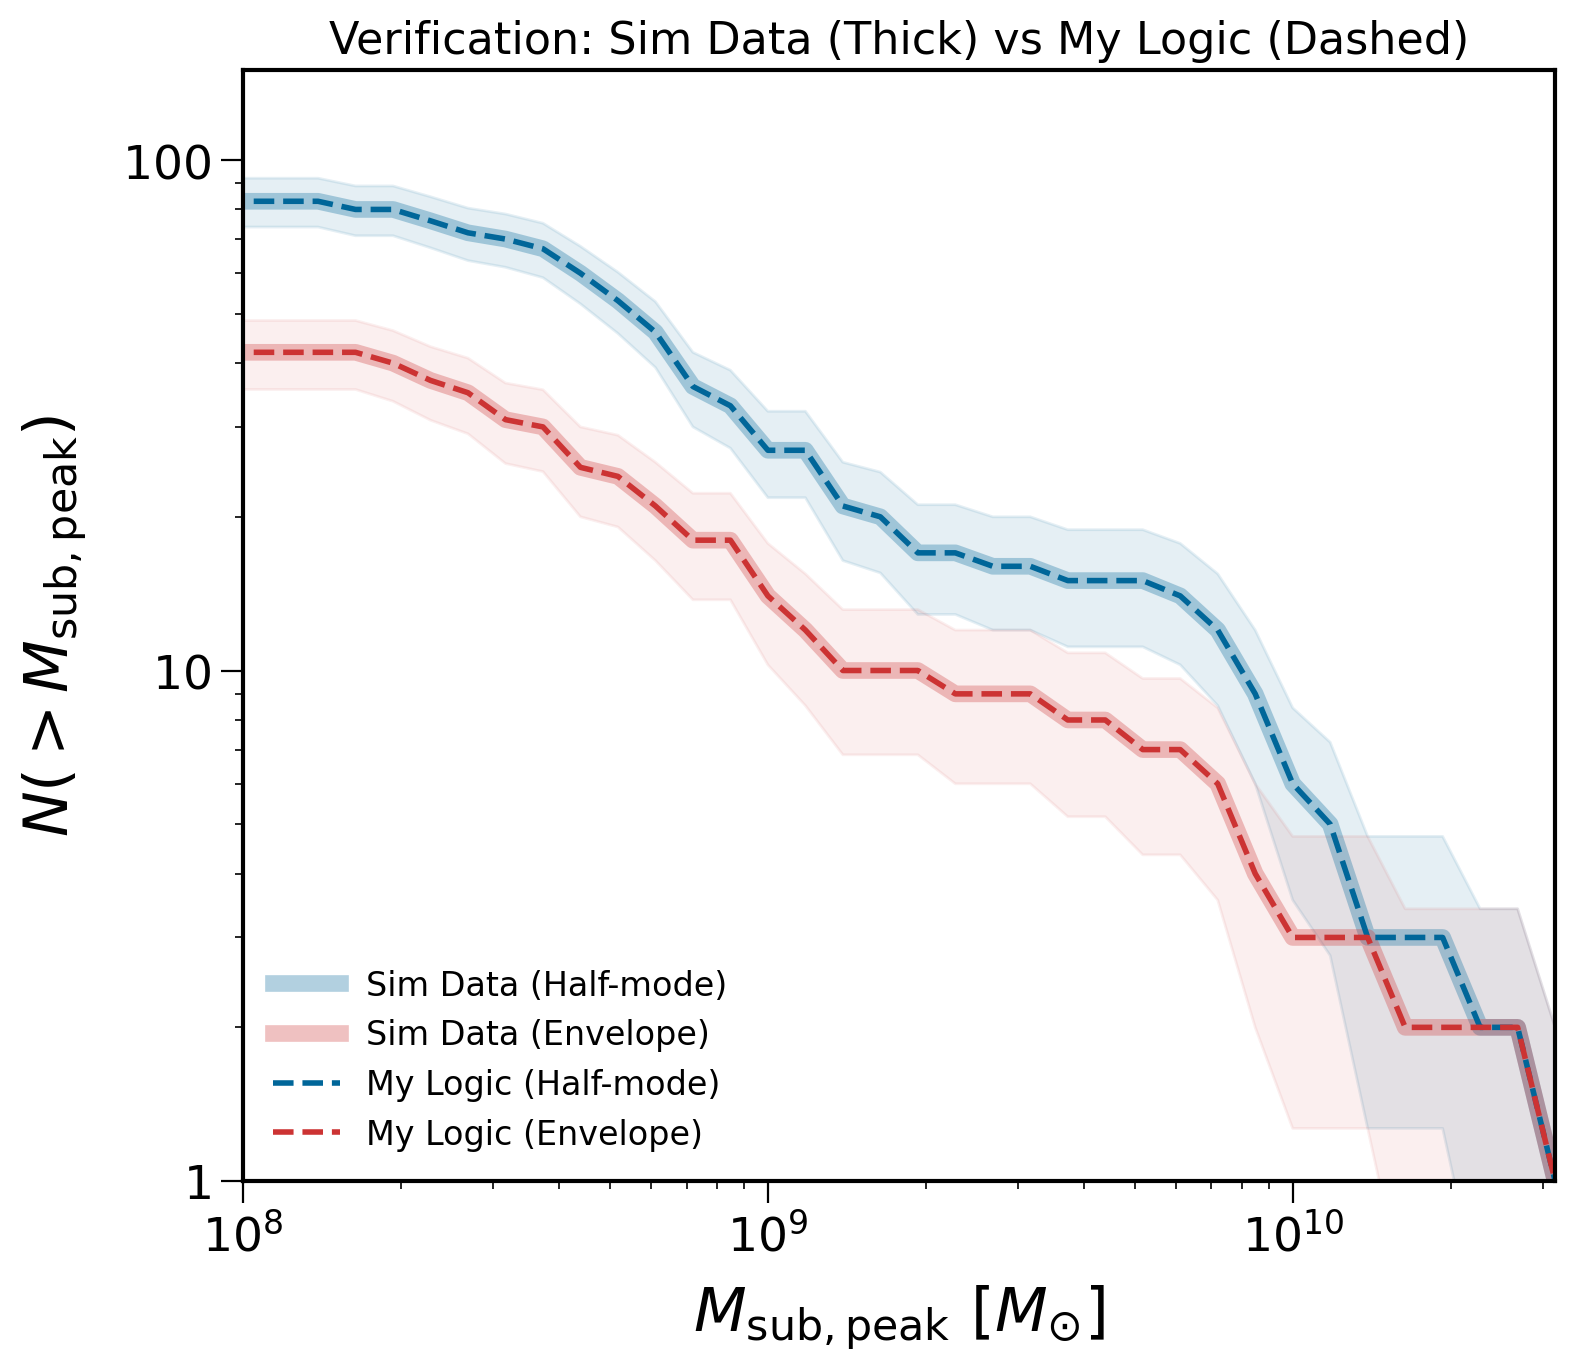

In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import re
import os
import pandas as pd
from tqdm import tqdm

# --- Plotting Style ---
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = False

# --- Configuration & Constants ---
HUBBLE_PARAM = 0.7 
MASS_CUT_PHYSICAL = 1.2e8 
HOST_HALO_MASS_MW = 1.2e12
HALO_KEY = 'Halo004'
MASS_KEY = '1GeV'

# 1. Path to Ethan's Pickle
ETHAN_DATA_PATH = "/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/sim_data.bin"

# 2. Paths to Raw Tree Files (for your logic)
BASE_RAW_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

TREE_FILE_ENV = os.path.join(BASE_RAW_DIR, "idm_1GeV_envelope", "output_idm_1GeV_envelope", "rockstar/trees/tree_0_0_0.dat")
NPY_FILE_ENV = "cache_my_logic_1GeV_envelope.npy" 

TREE_FILE_HM = os.path.join(BASE_RAW_DIR, "idm_1GeV_halfmode", "output_idm_1GeV_halfmode", "rockstar/trees/tree_0_0_0.dat")
NPY_FILE_HM = "cache_my_logic_1GeV_halfmode.npy"

# --- Helper Function: Your SHMF Logic ---
def calculate_log_mpeak(tree_file_path, model_label, output_npy_path=None):
    log_mpeak = np.array([])
    
    if not os.path.exists(tree_file_path):
        print(f"[!] Error: File not found: {tree_file_path}")
        return log_mpeak

    try:
        # Read Header
        with open(tree_file_path) as f: lines = f.readlines()
        header_line_index = None
        column_names = None
        for i, line in enumerate(lines):
            if line.startswith("#") and 'Mvir' in line:
                column_names = line[1:].strip().split()
                header_line_index = i
                break
        if column_names is None: raise RuntimeError("Could not find column names header line.")

        print(f"Loading {len(lines) - header_line_index - 1} halos from {model_label}...")
        
        data = pd.read_csv(
            tree_file_path, sep=r"\s+", names=column_names,
            comment='#', skiprows=header_line_index + 1,
            low_memory=False, on_bad_lines='skip'
        )

        def clean_colname(col): return re.sub(r'\(\d+\)$', '', col).strip().lower()
        data.columns = [clean_colname(c) for c in data.columns]

        id_to_index = {dfid: i for i, dfid in enumerate(data['depth_first_id'])}
        mpeak = np.zeros(len(data))
        
        print("  Computing Mpeak (walking main branch)...")
        for i in tqdm(range(len(data))):
            current_id = data['depth_first_id'].iat[i]
            last_id = data['last_mainleaf_depthfirst_id'].iat[i]
            start, end = id_to_index.get(current_id), id_to_index.get(last_id)

            if start is not None and end is not None and start <= end:
                max_mass = data['mvir'].iloc[start:end+1].max()
            else:
                max_mass = data['mvir'].iat[i]
            mpeak[i] = max_mass

        central_halos = data[data['upid'] == -1]
        if central_halos.empty: raise ValueError("No central halos found.")
            
        host_halo_row = central_halos.iloc[np.argmin(np.abs(central_halos['mvir'] - HOST_HALO_MASS_MW))]
        host_halo_id = host_halo_row['id']
        
        subhalo_mask = (data['upid'] == host_halo_id)
        mvir_physical = data['mvir'] / HUBBLE_PARAM
        final_mask = subhalo_mask & (mvir_physical > MASS_CUT_PHYSICAL)
        
        mpeak_cut_h = mpeak[final_mask]
        mpeak_physical = mpeak_cut_h / HUBBLE_PARAM
        
        log_mpeak = np.log10(mpeak_physical[mpeak_physical > 0])
        
        if output_npy_path:
            np.save(output_npy_path, log_mpeak)
            
        return log_mpeak
    except Exception as e:
        print(f"[!] Error processing tree file: {e}")
        return log_mpeak

# --- Main Execution ---
if __name__ == "__main__":
    
    # 1. LOAD DATA: METHOD A (Ethan's Pickle)
    print(f"Loading Pickle from: {ETHAN_DATA_PATH}")
    pickle_data = {}
    try:
        with open(ETHAN_DATA_PATH, "rb") as f:
            pickle_data = pickle.load(f, encoding='latin1')
        print("Pickle loaded successfully.")
    except Exception as e:
        print(f"Error loading pickle: {e}")

    # 2. LOAD DATA: METHOD B (Your Raw Tree Logic)
    if os.path.exists(NPY_FILE_ENV):
        print(f"Found cache for My Logic (Envelope): {NPY_FILE_ENV}")
        log_mp_my_env = np.load(NPY_FILE_ENV)
    else:
        log_mp_my_env = calculate_log_mpeak(TREE_FILE_ENV, "Raw Envelope", NPY_FILE_ENV)

    if os.path.exists(NPY_FILE_HM):
        print(f"Found cache for My Logic (Halfmode): {NPY_FILE_HM}")
        log_mp_my_hm = np.load(NPY_FILE_HM)
    else:
        log_mp_my_hm = calculate_log_mpeak(TREE_FILE_HM, "Raw Half-mode", NPY_FILE_HM)

    # 3. PLOTTING
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111)
    
    bins = np.linspace(7.5, 11, 50) 
    c_env = "#CC3333" # Red
    c_hm  = "#006699" # Blue

    # --- A. Plot Pickle Data (Reference/Background) ---
    # Style: Thick, Semi-transparent Solid line
    if HALO_KEY in pickle_data:
        # Half-mode Pickle
        try:
            d = pickle_data[HALO_KEY][f'idm_{MASS_KEY}']['halfmode'][2]
            ind = d['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mp = d['Mpeak'][ind]/HUBBLE_PARAM
            log_mp = np.log10(mp[mp > 0])
            
            vals, base = np.histogram(log_mp, bins=bins)
            y = len(log_mp) - np.cumsum(vals)
            
            # Plot as thick ghost line
            ax.plot(base[1:], y, color=c_hm, ls='-', lw=6, alpha=0.3, label='Sim Data (Half-mode)')
            
            # Error shading
            err = np.sqrt(y)
            ax.fill_between(base[1:], np.clip(y-err, 0.1, None), y+err, color=c_hm, alpha=0.1)
        except KeyError: pass

        # Envelope Pickle
        try:
            d = pickle_data[HALO_KEY][f'idm_{MASS_KEY}']['envelope'][2]
            ind = d['Mvir']/HUBBLE_PARAM > MASS_CUT_PHYSICAL
            mp = d['Mpeak'][ind]/HUBBLE_PARAM
            log_mp = np.log10(mp[mp > 0])
            
            vals, base = np.histogram(log_mp, bins=bins)
            y = len(log_mp) - np.cumsum(vals)
            
            # Plot as thick ghost line
            ax.plot(base[1:], y, color=c_env, ls='-', lw=6, alpha=0.3, label='Sim Data (Envelope)')
            
            # Error shading
            err = np.sqrt(y)
            ax.fill_between(base[1:], np.clip(y-err, 0.1, None), y+err, color=c_env, alpha=0.08)
        except KeyError: pass

    # --- B. Plot My Logic Data (Foreground) ---
    # Style: Thin, Opaque Dashed line
    
    # Half-mode Raw
    if len(log_mp_my_hm) > 0:
        vals, base = np.histogram(log_mp_my_hm, bins=bins)
        y = len(log_mp_my_hm) - np.cumsum(vals)
        ax.plot(base[1:], y, color=c_hm, ls='--', lw=2.0, alpha=1.0, label='My Logic (Half-mode)')

    # Envelope Raw
    if len(log_mp_my_env) > 0:
        vals, base = np.histogram(log_mp_my_env, bins=bins)
        y = len(log_mp_my_env) - np.cumsum(vals)
        ax.plot(base[1:], y, color=c_env, ls='--', lw=2.0, alpha=1.0, label='My Logic (Envelope)')

    # --- Formatting ---
    ax.set_yscale('log')
    ax.set_xlim(8.0, 10.5)
    ax.set_ylim([1, 150])

    ax.set_xticks([8, 9, 10])
    ax.set_xticklabels([r'$10^8$', r'$10^9$', r'$10^{10}$'], fontsize=17)
    
    minor_ticks_x = np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8, 2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9, 2e10,3e10])
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_xticklabels(['']*len(minor_ticks_x), minor=True)

    ax.set_yticks([1, 10, 100])
    ax.set_yticklabels([r'$1$', r'$10$', r'$100$'], fontsize=17)
    
    ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\odot}]$', fontsize=22, labelpad=8)
    ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=22, labelpad=12)
    
    # Legend
    ax.legend(fontsize=12, loc='lower left', frameon=False)
    ax.set_title(r"Verification: Sim Data (Thick) vs My Logic (Dashed)", fontsize=16)

    output_file = "shmf_verification_overplot_clear.png"
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    print(f"Comparison plot saved to: {output_file}")
    plt.show()

In [10]:
!pwd

/home/arifchu


Processing Envelope...
Loading tree data from /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1e-2GeV_envelope/output_idm_n2_1e-2GeV_envelope/rockstar/trees/tree_0_0_0.dat...
Processing Middle...
Loading tree data from /central/groups/carnegie_poc/achu/n2_1e-2GeV_middle/output_n2_1e-2GeV_middle/rockstar/trees/tree_0_0_0.dat...
Processing Half-mode...
Loading tree data from /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1e-2GeV_halfmode/output_idm_n2_1e-2GeV_halfmode/rockstar/trees/tree_0_0_0.dat...
Comparison plot saved to shmf_comparison_sandwich_test_overplot_redder.png


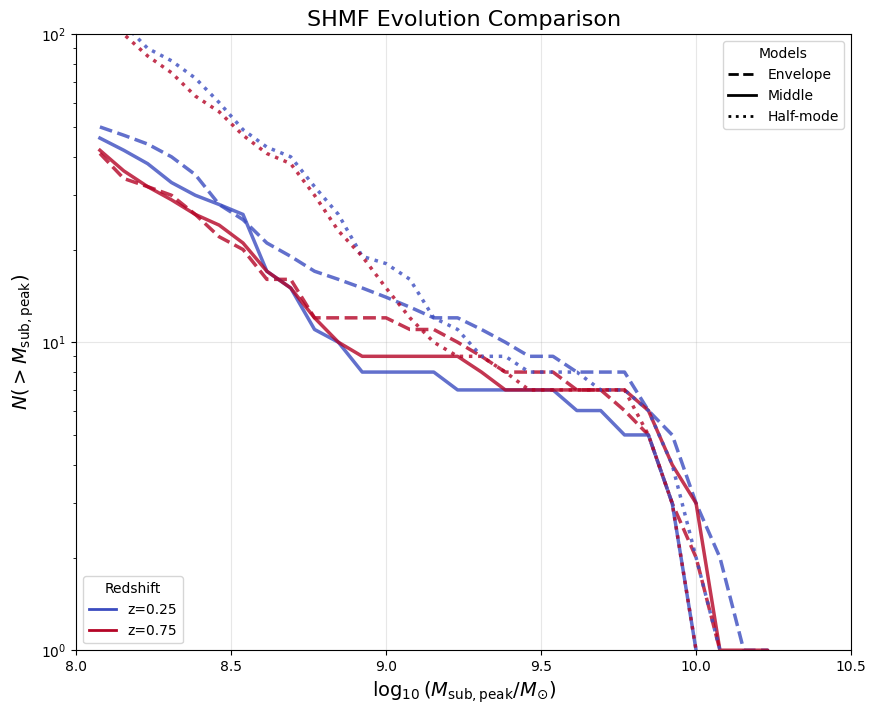

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tqdm import tqdm

# --- Configuration ---
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"
MY_BASE_DIR = "/central/groups/carnegie_poc/achu"

# Model paths
MODELS = {
    "Envelope": os.path.join(REF_BASE_DIR, "idm_n2_1e-2GeV_envelope", "output_idm_n2_1e-2GeV_envelope", "rockstar/trees/tree_0_0_0.dat"),
    "Middle":   os.path.join(MY_BASE_DIR,  "n2_1e-2GeV_middle",       "output_n2_1e-2GeV_middle",       "rockstar/trees/tree_0_0_0.dat"),
    "Half-mode":os.path.join(REF_BASE_DIR, "idm_n2_1e-2GeV_halfmode", "output_idm_n2_1e-2GeV_halfmode", "rockstar/trees/tree_0_0_0.dat"),
}

OUTPUT_PLOT = "shmf_comparison_sandwich_test_overplot_redder.png"

# Constants
HOST_MASS_MW = 1.2e12
MASS_CUT = 1.2e8 # Physical Msun
h = 0.7
#Z_TARGETS = [0.0, 0.5, 1.0]
Z_TARGETS = [0.25, 0.75]

def load_data_robust(path):
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None
    
    print(f"Loading tree data from {path}...")
    with open(path, 'r') as f:
        # Scan for header
        for line in f:
            if line.startswith('#') and 'Mvir' in line:
                header = line
                break
        else:
             print("Header not found.")
             return None

    cols = header.replace('#','').strip().split()
    
    # Use regex separator for robust whitespace handling
    df = pd.read_csv(path, sep=r'\s+', names=cols, comment='#', low_memory=False)
    df.columns = [re.sub(r'\(\d+\)', '', c).strip().lower() for c in df.columns]
    
    # Force numeric types to handle any malformed rows
    numeric_cols = ['scale', 'mvir', 'upid', 'id', 'depth_first_id', 'last_mainleaf_depthfirst_id']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove garbage rows (scale > 1.001 is impossible)
    df = df[(df['scale'] <= 1.001) & (df['scale'] > 0)].copy()
    return df

def get_shmf_at_z(df, target_z):
    target_scale = 1.0 / (1.0 + target_z)
    
    # 1. Select Snapshot
    tolerance = 0.05
    df_snap = df[np.abs(df['scale'] - target_scale) < tolerance].copy()
    
    if df_snap.empty:
        print(f"  No snapshot found near z={target_z}")
        return np.array([])
    
    # Pick the most populated scale in this range
    best_scale = df_snap['scale'].mode()[0]
    df_snap = df_snap[df_snap['scale'] == best_scale]
    
    # 2. Find Host
    centrals = df_snap[df_snap['upid'] == -1]
    if centrals.empty:
        # Fallback: Max mass halo
        host = df_snap.loc[df_snap['mvir'].idxmax()]
    else:
        host = centrals.loc[centrals['mvir'].idxmax()]
    
    # 3. Find Subhalos
    subs = df_snap[df_snap['upid'] == host['id']].copy()
    if subs.empty: return np.array([])
    
    # 4. Calculate Mpeak
    mpeaks = []
    # Optimization: Filter full tree to everything 'before' or 'at' this time
    df_past = df[df['scale'] <= best_scale]
    
    for _, sub in subs.iterrows():
        dfid = sub['depth_first_id']
        last = sub['last_mainleaf_depthfirst_id']
        
        # Check progenitors
        progs = df_past[(df_past['depth_first_id'] >= dfid) & (df_past['depth_first_id'] <= last)]
        
        if not progs.empty:
            mpeaks.append(progs['mvir'].max())
        else:
            mpeaks.append(sub['mvir'])
            
    mpeaks = np.array(mpeaks)
    
    # 5. Physical Cut
    mpeaks_phys = mpeaks / h
    keep = mpeaks_phys > MASS_CUT
    
    return np.log10(mpeaks_phys[keep])

# --- Main ---
if __name__ == "__main__":
    
    plt.figure(figsize=(10, 8))
    bins = np.linspace(8, 11, 40)
    
    # Define line styles for different models
    model_styles = {
        "Envelope": "--",   # Dashed
        "Middle": "-",      # Solid
        "Half-mode": ":"    # Dotted
    }
    
    # Define colors for different redshifts (cool to warm)
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(Z_TARGETS)))

    # Loop through models
    for model_name, model_path in MODELS.items():
        print(f"Processing {model_name}...")
        df = load_data_robust(model_path)
        
        if df is not None:
            # Loop through redshifts for each model
            for i, z in enumerate(Z_TARGETS):
                log_m = get_shmf_at_z(df, z)
                
                if len(log_m) > 0:
                    counts, edges = np.histogram(log_m, bins=bins)
                    cum_counts = len(log_m) - np.cumsum(counts)
                    
                    # Only add label for one model to avoid cluttering legend
                    label = f"{model_name} z={z}" if i == 0 or i == len(Z_TARGETS)-1 else None 
                    
                    plt.plot(edges[1:], cum_counts, 
                             lw=2.5, 
                             ls=model_styles[model_name], 
                             color=colors[i], 
                             label=label,
                             alpha=0.8)

    # Custom Legend handling
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='black', lw=2, ls=style) for style in model_styles.values()]
    model_legend = plt.legend(custom_lines, model_styles.keys(), loc='upper right', title="Models")
    plt.gca().add_artist(model_legend)

    # Redshift legend
    custom_lines_z = [Line2D([0], [0], color=colors[i], lw=2) for i in range(len(Z_TARGETS))]
    plt.legend(custom_lines_z, [f"z={z}" for z in Z_TARGETS], loc='lower left', title="Redshift")

    plt.yscale('log')
    plt.xlabel(r'$\log_{10}(M_{\mathrm{sub,peak}} / M_{\odot})$', fontsize=14)
    plt.ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=14)
    plt.title(f'SHMF Evolution Comparison', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.xlim(8, 10.5)
    plt.ylim(1, 100)
    
    plt.savefig(OUTPUT_PLOT, dpi=150)
    print(f"Comparison plot saved to {OUTPUT_PLOT}")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# --- Configuration ---
MY_BASE_DIR = "/central/groups/carnegie_poc/achu"
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# Models to process (n, mass_str)
MIDDLE_MODELS = [
    ("n2", "1e-4GeV"),
    ("n2", "1e-2GeV"),
    ("n2", "1GeV"),
    ("n4", "1e-4GeV"),
    ("n4", "1e-2GeV"),
    ("n4", "1GeV"),
]

# --- Helper Functions ---

def find_file(directory, pattern):
    """Finds first file matching pattern in directory."""
    if not os.path.exists(directory): return None
    files = glob.glob(os.path.join(directory, pattern))
    return files[0] if files else None

def get_ref_dir_path(n, mass, model_type):
    """
    Tries to find the reference directory (Envelope/Halfmode).
    Handles naming inconsistencies (e.g. idm_n2_1GeV vs idm_1GeV).
    """
    # Naming variations observed in Ethan's directory
    options = [
        f"idm_{n}_{mass}_{model_type}",      # e.g., idm_n2_1e-2GeV_envelope
        f"idm_{mass}_{model_type}",          # e.g., idm_1GeV_envelope (often used for n4)
        f"idm_{n}_{mass}_{model_type}_16K",  # 16K variants
        f"idm_{mass}_{model_type}_16K"
    ]
    
    for name in options:
        path = os.path.join(REF_BASE_DIR, name)
        if os.path.exists(path):
            return path
    return None

def load_data(path):
    try:
        return np.loadtxt(path)
    except Exception as e:
        print(f"  Error loading {os.path.basename(path)}: {e}")
        return None

# --- Main Processing Loop ---

for n_str, mass_str in MIDDLE_MODELS:
    print(f"--- Processing {n_str} {mass_str} ---")
    
    # 1. Locate Middle File (Your Data)
    # Directory: /.../n2_1e-2GeV_middle
    mid_dir = os.path.join(MY_BASE_DIR, f"{n_str}_{mass_str}_middle")
    
    # File: processed_Tk... or *Tk*.dat
    file_mid = find_file(mid_dir, "processed_Tk*.dat")
    if not file_mid: 
        file_mid = find_file(mid_dir, "*Tk*.dat")
        
    # 2. Locate Reference Files (Ethan's Data)
    # Envelope
    env_dir = get_ref_dir_path(n_str, mass_str, "envelope")
    file_env = find_file(env_dir, "*Tk.dat") if env_dir else None
    if not file_env and env_dir: file_env = find_file(env_dir, "dump_transfer.txt")

    # Half-mode
    hm_dir = get_ref_dir_path(n_str, mass_str, "halfmode")
    file_hm = find_file(hm_dir, "*Tk.dat") if hm_dir else None
    if not file_hm and hm_dir: file_hm = find_file(hm_dir, "dump_transfer.txt")

    # 3. Load Data
    d_mid = load_data(file_mid) if file_mid else None
    d_env = load_data(file_env) if file_env else None
    d_hm  = load_data(file_hm) if file_hm else None
    
    if d_mid is None:
        print(f"  Skipping: Middle data missing in {mid_dir}")
        continue

    # 4. Plotting
    plt.figure(figsize=(12, 8))
    
    # Define the species style configuration requested
    # (Column Index, Label TeX, Color)
    species_config = [
        (1,  r'$T_{\mathrm{cdm}}$',    'c'),
        (2,  r'$T_b$',                 'gray'),
        (6,  r'$T_{\mathrm{total}}$',  'pink'),
        (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
        (11, r'$T_{v,b}$',             'cyan') 
    ]
    
    # --- Plot Middle (Solid) ---
    k = d_mid[:, 0]
    for col, label, color in species_config:
        if col < d_mid.shape[1]:
            plt.semilogx(k, d_mid[:, col], label=f"{label} (Middle)", color=color, linestyle='-', linewidth=2)

    # --- Plot Envelope (Dashed) ---
    if d_env is not None:
        k_e = d_env[:, 0]
        # Only add label to legend if Middle was missing (to avoid dupes), or use suffix
        # Here we label explicitly as requested
        for col, label, color in species_config:
            if col < d_env.shape[1]:
                plt.semilogx(k_e, d_env[:, col], color=color, linestyle='--', linewidth=2, alpha=0.7)
        # Add a dummy black dashed line to legend to represent "Envelope"
        plt.plot([], [], color='k', linestyle='--', label='Envelope Reference')

    # --- Plot Half-mode (Dotted) ---
    if d_hm is not None:
        k_h = d_hm[:, 0]
        for col, label, color in species_config:
            if col < d_hm.shape[1]:
                plt.semilogx(k_h, d_hm[:, col], color=color, linestyle=':', linewidth=2, alpha=0.7)
        # Add a dummy black dotted line to legend to represent "Half-mode"
        plt.plot([], [], color='k', linestyle=':', label='Half-mode Reference')

    # Formatting
    plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k)$', fontsize=16)
    plt.title(f"Transfer Function Species: {n_str}, {mass_str}", fontsize=18)
    
    # Legend placement
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    plt.ylim(-0.1, 1.2)
    plt.tight_layout()
    
    # Save
    out_name = f"tk_species_sandwich_{n_str}_{mass_str}.png"
    plt.savefig(out_name, dpi=150)
    print(f"  Saved plot: {out_name}")
    plt.close() # Close memory

--- Processing n2 1e-4GeV ---
  Saved plot: tk_species_sandwich_n2_1e-4GeV.png
--- Processing n2 1e-2GeV ---
  Saved plot: tk_species_sandwich_n2_1e-2GeV.png
--- Processing n2 1GeV ---
  Saved plot: tk_species_sandwich_n2_1GeV.png
--- Processing n4 1e-4GeV ---
  Saved plot: tk_species_sandwich_n4_1e-4GeV.png
--- Processing n4 1e-2GeV ---
  Saved plot: tk_species_sandwich_n4_1e-2GeV.png
--- Processing n4 1GeV ---
  Saved plot: tk_species_sandwich_n4_1GeV.png


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---
MY_BASE_DIR = "/central/groups/carnegie_poc/achu"
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# CDM Baselines
MY_CDM_FILE = "/home/arifchu/class_public-master-new-dmeff/processed_Tk_cdm.dat"
ETHAN_CDM_FILE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# Models to process (n, mass_str)
MIDDLE_MODELS = [
    ("n2", "1e-4GeV"),
    ("n2", "1e-2GeV"),
    ("n2", "1GeV"),
    ("n4", "1e-4GeV"),
    ("n4", "1e-2GeV"),
    ("n4", "1GeV"),
]

# Columns to plot: (Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if path is None or not os.path.exists(path): return None
    try:
        return np.loadtxt(path)
    except Exception as e:
        print(f"  Error loading {os.path.basename(path)}: {e}")
        return None

def find_file(directory, pattern):
    if not os.path.exists(directory): return None
    files = glob.glob(os.path.join(directory, pattern))
    return files[0] if files else None

def get_ref_dir_path(n, mass, model_type):
    # Naming variations observed in Ethan's directory
    options = [
        f"idm_{n}_{mass}_{model_type}",      
        f"idm_{mass}_{model_type}",          
        f"idm_{n}_{mass}_{model_type}_16K",  
        f"idm_{mass}_{model_type}_16K"
    ]
    for name in options:
        path = os.path.join(REF_BASE_DIR, name)
        if os.path.exists(path): return path
    return None

def normalize_data(target_data, cdm_data):
    if target_data is None or cdm_data is None: return None
    
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', fill_value="extrapolate")
            cdm_interp = f_interp(k_target)
            with np.errstate(divide='ignore', invalid='ignore'):
                norm_data[:, col_idx] = target_data[:, col_idx] / cdm_interp
    return norm_data

# --- Load Baselines ---
print("Loading CDM Baselines...")
my_cdm_data = load_data(MY_CDM_FILE)
ethan_cdm_data = load_data(ETHAN_CDM_FILE)

# --- Main Loop ---
for n_str, mass_str in MIDDLE_MODELS:
    print(f"--- Processing {n_str} {mass_str} ---")
    
    # 1. Locate Files
    mid_dir = os.path.join(MY_BASE_DIR, f"{n_str}_{mass_str}_middle")
    file_mid = find_file(mid_dir, "processed_Tk*.dat") or find_file(mid_dir, "*Tk*.dat")
    
    env_dir = get_ref_dir_path(n_str, mass_str, "envelope")
    file_env = find_file(env_dir, "*Tk.dat") if env_dir else None
    if not file_env and env_dir: file_env = find_file(env_dir, "dump_transfer.txt")
    
    hm_dir = get_ref_dir_path(n_str, mass_str, "halfmode")
    file_hm = find_file(hm_dir, "*Tk.dat") if hm_dir else None
    if not file_hm and hm_dir: file_hm = find_file(hm_dir, "dump_transfer.txt")

    # 2. Load & Normalize
    norm_mid = normalize_data(load_data(file_mid), my_cdm_data)
    norm_env = normalize_data(load_data(file_env), ethan_cdm_data)
    norm_hm  = normalize_data(load_data(file_hm), ethan_cdm_data)
    
    if norm_mid is None:
        print(f"  Skipping: Middle data missing in {mid_dir}")
        continue

    # 3. Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot Middle (Solid)
    k = norm_mid[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < norm_mid.shape[1]:
            plt.semilogx(k, norm_mid[:, col], color=color, ls='-', lw=2, alpha=0.9)

    # Plot Envelope (Dashed)
    if norm_env is not None:
        k_e = norm_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < norm_env.shape[1]:
                plt.semilogx(k_e, norm_env[:, col], color=color, ls='--', lw=2, alpha=0.7)

    # Plot Half-mode (Dotted)
    if norm_hm is not None:
        k_h = norm_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < norm_hm.shape[1]:
                plt.semilogx(k_h, norm_hm[:, col], color=color, ls=':', lw=2, alpha=0.7)

    plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=16)
    plt.title(f"Normalized Transfer Functions: {n_str}, {mass_str}", fontsize=18)
    
    # --- Custom Legend ---
    # Legend for Models
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', label='Middle'),
        Line2D([0], [0], color='k', lw=2, ls='--', label='Envelope'),
        Line2D([0], [0], color='k', lw=2, ls=':', label='Half-mode')
    ]
    legend1 = plt.legend(handles=model_lines, title="Models", loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.gca().add_artist(legend1) # Add back the first legend

    # Legend for Species
    species_lines = [Line2D([0], [0], color=c, lw=2, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper left', bbox_to_anchor=(1.02, 0.75))

    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    plt.ylim(-0.1, 1.2)
    plt.tight_layout()
    
    out_name = f"tk_norm_sandwich_{n_str}_{mass_str}_legend.png"
    plt.savefig(out_name, dpi=150)
    print(f"  Saved plot: {out_name}")
    plt.close()

Loading CDM Baselines...
--- Processing n2 1e-4GeV ---
  Saved plot: tk_norm_sandwich_n2_1e-4GeV_legend.png
--- Processing n2 1e-2GeV ---
  Saved plot: tk_norm_sandwich_n2_1e-2GeV_legend.png
--- Processing n2 1GeV ---
  Saved plot: tk_norm_sandwich_n2_1GeV_legend.png
--- Processing n4 1e-4GeV ---
  Saved plot: tk_norm_sandwich_n4_1e-4GeV_legend.png
--- Processing n4 1e-2GeV ---
  Saved plot: tk_norm_sandwich_n4_1e-2GeV_legend.png
--- Processing n4 1GeV ---
  Saved plot: tk_norm_sandwich_n4_1GeV_legend.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---
# Verify these paths are correct on your system
MY_BASE_DIR = "/central/groups/carnegie_poc/achu"
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# CDM Baselines
MY_CDM_FILE = "/home/arifchu/class_public-master-new-dmeff/processed_Tk_cdm.dat"
ETHAN_CDM_FILE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# Models to process (n, mass_str)
MIDDLE_MODELS = [
    ("n2", "1e-4GeV"),
    ("n2", "1e-2GeV"),
    ("n2", "1GeV"),
    ("n4", "1e-4GeV"),
    ("n4", "1e-2GeV"),
    ("n4", "1GeV"),
]

# Columns to plot: (Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if path is None or not os.path.exists(path): return None
    try:
        return np.loadtxt(path)
    except Exception as e:
        print(f"  Error loading {os.path.basename(path)}: {e}")
        return None

def find_file(directory, pattern):
    if not os.path.exists(directory): return None
    files = glob.glob(os.path.join(directory, pattern))
    return files[0] if files else None

def get_ref_dir_path(n, mass, model_type):
    # Naming variations observed in Ethan's directory
    options = [
        f"idm_{n}_{mass}_{model_type}",      
        f"idm_{mass}_{model_type}",          
        f"idm_{n}_{mass}_{model_type}_16K",  
        f"idm_{mass}_{model_type}_16K"
    ]
    for name in options:
        path = os.path.join(REF_BASE_DIR, name)
        if os.path.exists(path): return path
    return None

def normalize_data(target_data, cdm_data):
    if target_data is None or cdm_data is None: return None
    
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            # Interpolate CDM column onto Target k
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', fill_value="extrapolate")
            cdm_interp = f_interp(k_target)
            
            # Avoid division by zero
            with np.errstate(divide='ignore', invalid='ignore'):
                norm_data[:, col_idx] = target_data[:, col_idx] / cdm_interp
    return norm_data

# --- Load Baselines ---
print("Loading CDM Baselines...")
my_cdm_data = load_data(MY_CDM_FILE)
ethan_cdm_data = load_data(ETHAN_CDM_FILE)

# --- Main Loop ---
for n_str, mass_str in MIDDLE_MODELS:
    print(f"--- Processing {n_str} {mass_str} ---")
    
    # 1. Locate Files
    mid_dir = os.path.join(MY_BASE_DIR, f"{n_str}_{mass_str}_middle")
    
    # Try finding processed_Tk*.dat first, then fallback to any Tk
    file_mid = find_file(mid_dir, "processed_Tk*.dat") or find_file(mid_dir, "*Tk*.dat")
    
    # Reference paths logic
    env_dir = get_ref_dir_path(n_str, mass_str, "envelope")
    # Priority: *Tk.dat -> dump_transfer.txt
    file_env = find_file(env_dir, "*Tk.dat") if env_dir else None
    if not file_env and env_dir: file_env = find_file(env_dir, "dump_transfer.txt")
    
    hm_dir = get_ref_dir_path(n_str, mass_str, "halfmode")
    file_hm = find_file(hm_dir, "*Tk.dat") if hm_dir else None
    if not file_hm and hm_dir: file_hm = find_file(hm_dir, "dump_transfer.txt")

    # Debug info
    if file_mid: print(f"  Middle: {os.path.basename(file_mid)}")
    else: print(f"  Middle: MISSING in {mid_dir}")
    
    if file_env: print(f"  Envelope: {os.path.basename(file_env)}")
    else: print(f"  Envelope: MISSING")
    
    if file_hm: print(f"  Halfmode: {os.path.basename(file_hm)}")
    else: print(f"  Halfmode: MISSING")

    # 2. Load & Normalize
    norm_mid = normalize_data(load_data(file_mid), my_cdm_data)
    norm_env = normalize_data(load_data(file_env), ethan_cdm_data)
    norm_hm  = normalize_data(load_data(file_hm), ethan_cdm_data)
    
    if norm_mid is None:
        print(f"  Skipping plot (Middle data missing)")
        continue

    # 3. Plotting
    plt.figure(figsize=(12, 8))
    
    # --- PLOTTING ORDER: Background (Thick/Transparent) -> Foreground (Thin/Opaque) ---

    # Plot Envelope (Dashed, Thick, Transparent)
    if norm_env is not None:
        k_e = norm_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < norm_env.shape[1]:
                plt.semilogx(k_e, norm_env[:, col], color=color, ls='--', lw=5, alpha=0.3)

    # Plot Half-mode (Dotted, Thick, Transparent)
    if norm_hm is not None:
        k_h = norm_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < norm_hm.shape[1]:
                plt.semilogx(k_h, norm_hm[:, col], color=color, ls=':', lw=5, alpha=0.3)

    # Plot Middle (Solid, Thin, Opaque)
    # This goes last so it sits on top
    k = norm_mid[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < norm_mid.shape[1]:
            plt.semilogx(k, norm_mid[:, col], color=color, ls='-', lw=2, alpha=1.0)

    plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=16)
    plt.title(f"Normalized Transfer Functions: {n_str}, {mass_str}", fontsize=18)
    
    # --- Custom Legend ---
    # Legend for Models (Reflecting the new styles)
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', alpha=1.0, label='Middle (Foreground)'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.4, label='Envelope (Background)'),
        Line2D([0], [0], color='k', lw=5, ls=':', alpha=0.4, label='Half-mode (Background)')
    ]
    legend1 = plt.legend(handles=model_lines, title="Models", loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.gca().add_artist(legend1)

    # Legend for Species
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper left', bbox_to_anchor=(1.02, 0.75))

    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    plt.ylim(-0.1, 1.2)
    plt.tight_layout()
    
    out_name = f"tk_norm_sandwich_{n_str}_{mass_str}_visible.png"
    plt.savefig(out_name, dpi=150)
    print(f"  Saved plot: {out_name}")
    plt.close()

Loading CDM Baselines...
--- Processing n2 1e-4GeV ---
  Middle: processed_Tk_n2_m1em04_s2.9064em27.dat
  Envelope: MISSING
  Halfmode: MISSING
  Saved plot: tk_norm_sandwich_n2_1e-4GeV_visible.png
--- Processing n2 1e-2GeV ---
  Middle: processed_Tk_n2_m1em02_s2.6145em24.dat
  Envelope: MISSING
  Halfmode: MISSING
  Saved plot: tk_norm_sandwich_n2_1e-2GeV_visible.png
--- Processing n2 1GeV ---
  Middle: processed_Tk_n2_m1ep00_s6.4057em23.dat
  Envelope: MISSING
  Halfmode: MISSING
  Saved plot: tk_norm_sandwich_n2_1GeV_visible.png
--- Processing n4 1e-4GeV ---
  Middle: processed_Tk_n4_m1em04_s1.0496em25.dat
  Envelope: idm_1e-4GeV_envelope_Tk.dat
  Halfmode: idm_1e-4GeV_halfmode_Tk.dat
  Saved plot: tk_norm_sandwich_n4_1e-4GeV_visible.png
--- Processing n4 1e-2GeV ---
  Middle: processed_Tk_n4_m1em02_s2.7134em20.dat
  Envelope: idm_1e-2GeV_envelope_Tk.dat
  Halfmode: idm_1e-2GeV_halfmode_Tk.dat
  Saved plot: tk_norm_sandwich_n4_1e-2GeV_visible.png
--- Processing n4 1GeV ---
  Middle:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---
# Verify these paths are correct on your system
MY_BASE_DIR = "/central/groups/carnegie_poc/achu"
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# CDM Baselines
MY_CDM_FILE = "/home/arifchu/class_public-master-new-dmeff/processed_Tk_cdm.dat"
ETHAN_CDM_FILE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# Models to process (n, mass_str)
MIDDLE_MODELS = [
    ("n2", "1e-4GeV"),
    ("n2", "1e-2GeV"),
    ("n2", "1GeV"),
    ("n4", "1e-4GeV"),
    ("n4", "1e-2GeV"),
    ("n4", "1GeV"),
]

# Columns to plot: (Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if path is None or not os.path.exists(path): return None
    try:
        return np.loadtxt(path)
    except Exception as e:
        print(f"  Error loading {os.path.basename(path)}: {e}")
        return None

def find_file(directory, pattern):
    if not os.path.exists(directory): return None
    files = glob.glob(os.path.join(directory, pattern))
    return files[0] if files else None

def get_ref_dir_path(n, mass, model_type):
    # EXPLICITLY REMOVED _16K options
    options = [
        f"idm_{n}_{mass}_{model_type}",      
        f"idm_{mass}_{model_type}"          
    ]
    for name in options:
        path = os.path.join(REF_BASE_DIR, name)
        if os.path.exists(path): return path
    return None

def normalize_data(target_data, cdm_data):
    if target_data is None or cdm_data is None: return None
    
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', fill_value="extrapolate")
            cdm_interp = f_interp(k_target)
            with np.errstate(divide='ignore', invalid='ignore'):
                norm_data[:, col_idx] = target_data[:, col_idx] / cdm_interp
    return norm_data

# --- Load Baselines ---
print("Loading CDM Baselines...")
my_cdm_data = load_data(MY_CDM_FILE)
ethan_cdm_data = load_data(ETHAN_CDM_FILE)

# --- Main Loop ---
for n_str, mass_str in MIDDLE_MODELS:
    print(f"--- Processing {n_str} {mass_str} ---")
    
    # 1. Locate Files
    mid_dir = os.path.join(MY_BASE_DIR, f"{n_str}_{mass_str}_middle")
    file_mid = find_file(mid_dir, "processed_Tk*.dat") or find_file(mid_dir, "*Tk*.dat")
    
    env_dir = get_ref_dir_path(n_str, mass_str, "envelope")
    file_env = find_file(env_dir, "*Tk.dat") if env_dir else None
    if not file_env and env_dir: file_env = find_file(env_dir, "dump_transfer.txt")
    
    hm_dir = get_ref_dir_path(n_str, mass_str, "halfmode")
    file_hm = find_file(hm_dir, "*Tk.dat") if hm_dir else None
    if not file_hm and hm_dir: file_hm = find_file(hm_dir, "dump_transfer.txt")

    # Debug print to verify paths
    if file_mid: print(f"  Middle: {os.path.basename(file_mid)}")
    else: print(f"  Middle: MISSING in {mid_dir}")
    
    # 2. Load & Normalize
    norm_mid = normalize_data(load_data(file_mid), my_cdm_data)
    norm_env = normalize_data(load_data(file_env), ethan_cdm_data)
    norm_hm  = normalize_data(load_data(file_hm), ethan_cdm_data)
    
    if norm_mid is None:
        print(f"  Skipping plot (Middle data missing)")
        continue

    # 3. Plotting
    plt.figure(figsize=(12, 8))
    
    # --- PLOTTING ORDER: Background (Thick/Transparent) -> Foreground (Thin/Opaque) ---

    # Plot Envelope (Dashed, Thick, Transparent)
    if norm_env is not None:
        k_e = norm_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < norm_env.shape[1]:
                plt.semilogx(k_e, norm_env[:, col], color=color, ls='--', lw=5, alpha=0.3)

    # Plot Half-mode (Dotted, Thick, Transparent)
    if norm_hm is not None:
        k_h = norm_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < norm_hm.shape[1]:
                plt.semilogx(k_h, norm_hm[:, col], color=color, ls=':', lw=5, alpha=0.3)

    # Plot Middle (Solid, Thin, Opaque)
    k = norm_mid[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < norm_mid.shape[1]:
            plt.semilogx(k, norm_mid[:, col], color=color, ls='-', lw=2, alpha=1.0)

    plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=16)
    plt.title(f"Normalized Transfer Functions: {n_str}, {mass_str}", fontsize=18)
    
    # --- Custom Legend ---
    # Legend for Models
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', alpha=1.0, label='Middle (Foreground)'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.4, label='Envelope (Background)'),
        Line2D([0], [0], color='k', lw=5, ls=':', alpha=0.4, label='Half-mode (Background)')
    ]
    legend1 = plt.legend(handles=model_lines, title="Models", loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.gca().add_artist(legend1)

    # Legend for Species
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper left', bbox_to_anchor=(1.02, 0.75))

    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    plt.ylim(-0.1, 1.2)
    plt.tight_layout()
    
    out_name = f"tk_norm_sandwich_{n_str}_{mass_str}_visible.png"
    plt.savefig(out_name, dpi=150)
    print(f"  Saved plot: {out_name}")
    plt.close()

Loading CDM Baselines...
--- Processing n2 1e-4GeV ---
  Middle: processed_Tk_n2_m1em04_s2.9064em27.dat
  Saved plot: tk_norm_sandwich_n2_1e-4GeV_visible.png
--- Processing n2 1e-2GeV ---
  Middle: processed_Tk_n2_m1em02_s2.6145em24.dat
  Saved plot: tk_norm_sandwich_n2_1e-2GeV_visible.png
--- Processing n2 1GeV ---
  Middle: processed_Tk_n2_m1ep00_s6.4057em23.dat
  Saved plot: tk_norm_sandwich_n2_1GeV_visible.png
--- Processing n4 1e-4GeV ---
  Middle: processed_Tk_n4_m1em04_s1.0496em25.dat
  Saved plot: tk_norm_sandwich_n4_1e-4GeV_visible.png
--- Processing n4 1e-2GeV ---
  Middle: processed_Tk_n4_m1em02_s2.7134em20.dat
  Saved plot: tk_norm_sandwich_n4_1e-2GeV_visible.png
--- Processing n4 1GeV ---
  Middle: processed_Tk_n4_m1ep00_s5.7344em17.dat
  Saved plot: tk_norm_sandwich_n4_1GeV_visible.png


In [2]:
!ls /home/arifchu/Pk_MilkyWay/data_tk/

fdm_113e-22eV_Tk.dat		    idm_n2_1e-2GeV_halfmode_z99_Tk.dat
fdm_151e-22eV_Tk.dat		    idm_n2_1e-4GeV_envelope_z99_Tk.dat
fdm_185e-22eV_Tk.dat		    idm_n2_1e-4GeV_halfmode_z99_Tk.dat
fdm_25.9e-22eV_Tk.dat		    idm_n2_1GeV_envelope_z99_Tk.dat
fdm_490e-22eV_Tk.dat		    idm_n2_1GeV_halfmode_z99_Tk.dat
fdm_69.4e-22eV_Tk.dat		    Tkd_0.72kev_transfer_z99.dat
idm_1e-2GeV_envelope_Tk.dat	    Tkd_1.46kev_transfer_z99.dat
idm_1e-2GeV_halfmode_Tk.dat	    Tkd_2.32kev_transfer_z99.dat
idm_1e-4GeV_envelope_Tk.dat	    wdm_100kev_transfer_z99.dat
idm_1e-4GeV_halfmode_Tk.dat	    wdm_10KeV_Tk.dat
idm_1GeV_envelope_Tk.dat	    wdm_3KeV_Tk.dat
idm_1GeV_halfmode_Tk.dat	    wdm_500kev_transfer_z99.dat
idm_n2_1e-2GeV_envelope_z99_Tk.dat  wdm_6.5KeV_Tk.dat


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your File
FILE_MY_HM = "/home/arifchu/class_public-master-new-dmeff/COZMIC_test_output/CAMB_COZMIC_test_n2_1GeV_Tk.dat"

# 2. Ethan's Reference File
REF_TK_DIR = "/home/arifchu/Pk_MilkyWay/data_tk/"
FILE_REF_HM = "idm_n2_1GeV_halfmode_z99_Tk.dat"
PATH_REF_HM = os.path.join(REF_TK_DIR, FILE_REF_HM)

# 3. CDM Baseline (For Normalization)
# Using Ethan's standard CDM file we identified earlier
FILE_CDM = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# 4. Plotting Config
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if path is None or not os.path.exists(path): 
        print(f"  [Missing] {path}")
        return None
    try: return np.loadtxt(path)
    except Exception as e:
        print(f"  [Error] {os.path.basename(path)}: {e}")
        return None

def normalize_data(target_data, cdm_data):
    if target_data is None or cdm_data is None: return None
    
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            # Linear Interpolation
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', fill_value="extrapolate")
            cdm_interp = f_interp(k_target)
            
            with np.errstate(divide='ignore', invalid='ignore'):
                norm_data[:, col_idx] = target_data[:, col_idx] / cdm_interp
    return norm_data

# --- Main Execution ---

print("--- Direct Comparison: My Run vs Ethan's Reference ---")

# 1. Load Data
print("Loading Data...")
d_cdm = load_data(FILE_CDM)
d_my_hm = load_data(FILE_MY_HM)
d_ref_hm = load_data(PATH_REF_HM)

if d_my_hm is not None: print(f"  Loaded My File:  {os.path.basename(FILE_MY_HM)}")
if d_ref_hm is not None: print(f"  Loaded Ref File: {os.path.basename(PATH_REF_HM)}")

# 2. Normalize
if d_cdm is not None:
    print("Normalizing...")
    n_my_hm  = normalize_data(d_my_hm, d_cdm)
    n_ref_hm = normalize_data(d_ref_hm, d_cdm)
else:
    print("Warning: CDM Missing. Plotting Raw Data.")
    n_my_hm = d_my_hm
    n_ref_hm = d_ref_hm

# 3. Plot
if n_my_hm is not None and n_ref_hm is not None:
    plt.figure(figsize=(12, 8))
    
    # --- Background: Ethan's Reference (Thick Dotted) ---
    k = n_ref_hm[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < n_ref_hm.shape[1]:
            plt.semilogx(k, n_ref_hm[:, col], color=color, ls=':', lw=6, alpha=0.4)

    # --- Foreground: My Run (Thin Solid) ---
    k = n_my_hm[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < n_my_hm.shape[1]:
            plt.semilogx(k, n_my_hm[:, col], color=color, ls='-', lw=2, alpha=1.0)

    # --- Styling ---
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    if d_cdm is not None:
        plt.ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=16)
        plt.title(r"Comparison: n=2, 1 GeV Half-mode (Normalized)", fontsize=18)
        plt.ylim(-0.1, 1.2)
    else:
        plt.ylabel(r'$T(k)$', fontsize=16)
        plt.title(r"Comparison: n=2, 1 GeV Half-mode (Raw)", fontsize=18)
        plt.loglog()

    # Legends
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-',  alpha=1.0, label='My Run'),
        Line2D([0], [0], color='k', lw=6, ls=':',  alpha=0.4, label="Ethan's Reference")
    ]
    leg1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(leg1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    plt.tight_layout()
    
    out_file = "compare_halfmode_n2_1GeV_direct.png"
    plt.savefig(out_file, dpi=150)
    print(f"Plot saved to: {out_file}")
    plt.show()
else:
    print("Error: Could not load one or both data files.")

COMPARISON: My Processed Tk Files vs Ethan's Reference Files

1. Loading CDM baseline...
  [Loaded] test_transfer_z99.dat - shape: (213, 13)

2. Scanning for my processed files...
   Found 18 files in /home/arifchu/class_public-master-new-dmeff/fixed_accurate_middle_camb

3. Matching models...

4. Finding additional files...

5. Found 18 unique model configurations

6. Creating individual comparison plots...

   Model: n=2, m=1e-4, type=halfmode
     My file: processed_Tk_n2_m1e-4_s1.19e-27.dat
     Ref file: idm_n2_1e-4GeV_halfmode_z99_Tk.dat
  [Loaded] processed_Tk_n2_m1e-4_s1.19e-27.dat - shape: (394, 13)
  [Loaded] idm_n2_1e-4GeV_halfmode_z99_Tk.dat - shape: (631, 13)
  [Saved] comparison_plots/compare_n2_m1em4_halfmodeppng

   Model: n=2, m=1e-4, type=59kev
     My file: processed_Tk_n2_m1e-4_s1.19e-27.dat
     Ref file: idm_1e-4GeV_halfmode_Tk.dat
  [Loaded] processed_Tk_n2_m1e-4_s1.19e-27.dat - shape: (394, 13)
  [Loaded] idm_1e-4GeV_halfmode_Tk.dat - shape: (1189, 13)
  [Saved]

/tmp/ipykernel_199010/2238309164.py:303: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



[Summary] Grid plot saved to: comparison_plots/summary_comparison_grid.png

COMPARISON COMPLETE
   Individual plots created: 18
   All plots saved to: comparison_plots/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch

# --- Configuration ---

# 1. Directory containing your processed files
MY_TK_DIR = "/home/arifchu/class_public-master-new-dmeff/VG_fixed_correct_middle_camb"

# 2. Ethan's Reference Files Directory
REF_TK_DIR = "/home/arifchu/Pk_MilkyWay/camb_data_tk/"

# 3. CDM Baseline (For Normalization)
FILE_CDM = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# 4. Plotting Config
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# 5. Models to compare - with better mass string handling
MODELS_TO_COMPARE = [
    # Format: (n, mass_str, halfmode_ref_file, envelope_ref_file)
    
    # n=2 models - ALL MASS STRINGS as they appear in filenames
    ("2", "1e-4", 
     "idm_n2_1e-4GeV_halfmode_z99_Tk.dat",
     "idm_n2_1e-4GeV_envelope_z99_Tk.dat"),
    
    ("2", "0.01", 
     "idm_n2_1e-2GeV_halfmode_z99_Tk.dat",
     "idm_n2_1e-2GeV_envelope_z99_Tk.dat"),
    
    ("2", "1e-2",  # ADDED: alternative representation
     "idm_n2_1e-2GeV_halfmode_z99_Tk.dat",
     "idm_n2_1e-2GeV_envelope_z99_Tk.dat"),
    
    ("2", "1", 
     "idm_n2_1GeV_halfmode_z99_Tk.dat",
     "idm_n2_1GeV_envelope_z99_Tk.dat"),
    
    # n=4 models
    ("4", "1e-4", 
     "idm_1e-4GeV_halfmode_Tk.dat",
     "idm_1e-4GeV_envelope_Tk.dat"),
    
    ("4", "0.01", 
     "idm_1e-2GeV_halfmode_Tk.dat",
     "idm_1e-2GeV_envelope_Tk.dat"),
    
    ("4", "1e-2",  # ADDED: alternative representation
     "idm_1e-2GeV_halfmode_Tk.dat",
     "idm_1e-2GeV_envelope_Tk.dat"),
    
    ("4", "1", 
     "idm_1GeV_halfmode_Tk.dat",
     "idm_1GeV_envelope_Tk.dat"),
]

# --- Helper Functions ---

def load_data(path):
    """Load data from file, handle missing files gracefully."""
    if path is None or not os.path.exists(path): 
        print(f"  [Missing] {path}")
        return None
    try: 
        data = np.loadtxt(path)
        print(f"  [Loaded] {os.path.basename(path)} - shape: {data.shape}")
        return data
    except Exception as e:
        print(f"  [Error] {os.path.basename(path)}: {e}")
        return None

def normalize_data(target_data, cdm_data):
    """Normalize transfer functions by CDM."""
    if target_data is None or cdm_data is None: 
        return None
    
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            # Linear Interpolation
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', 
                               fill_value="extrapolate", bounds_error=False)
            cdm_interp = f_interp(k_target)
            
            with np.errstate(divide='ignore', invalid='ignore'):
                ratio = target_data[:, col_idx] / cdm_interp
                # Handle extreme values
                ratio = np.where(np.abs(ratio) > 1e3, np.nan, ratio)
                ratio = np.where(np.abs(ratio) < 1e-3, np.nan, ratio)
                norm_data[:, col_idx] = ratio
    return norm_data

def find_my_tk_file(n, mass_str):
    """Find your simulation file for given n and mass."""
    # First, scan ALL files to see what we have
    all_files = glob.glob(os.path.join(MY_TK_DIR, "*.dat"))
    
    # Create mapping of mass strings to search patterns
    mass_mapping = {
        "0.01": ["0.01", "1e-2", "001", "01e-2", "1e-2GeV", "0.01GeV"],
        "1e-2": ["1e-2", "0.01", "001", "01e-2", "1e-2GeV", "0.01GeV"],
        "1": ["1", "1.0", "1GeV"],
        "1e-4": ["1e-4", "0.0001", "0001", "1e-4GeV"],
    }
    
    # Get search patterns for this mass
    search_patterns = []
    if mass_str in mass_mapping:
        for mass_pattern in mass_mapping[mass_str]:
            search_patterns.extend([
                f"*n{n}*{mass_pattern}*.dat",
                f"*{mass_pattern}*n{n}*.dat",
                f"*n{n}_*{mass_pattern}_*.dat",
                f"*{mass_pattern}_*n{n}_*.dat",
                f"*n{n}*m{mass_pattern}*.dat",
                f"*m{mass_pattern}*n{n}*.dat",
            ])
    
    # Try exact patterns first
    for pattern in search_patterns:
        files = glob.glob(os.path.join(MY_TK_DIR, pattern))
        if files:
            return files[0]
    
    # If no exact match, try to find by scanning all files
    for file_path in all_files:
        filename = os.path.basename(file_path).lower()
        
        # Check if filename contains n
        if f"n{n}" not in filename:
            continue
            
        # Check for mass patterns
        if mass_str in mass_mapping:
            for mass_pattern in mass_mapping[mass_str]:
                if mass_pattern in filename:
                    return file_path
    
    print(f"  [Warning] Could not find my simulation file for n={n}, m={mass_str}")
    
    # Show available files for debugging
    print(f"  [Debug] Available files with n={n}:")
    n_files = [f for f in all_files if f"n{n}" in os.path.basename(f).lower()]
    for f in n_files[:10]:
        print(f"    - {os.path.basename(f)}")
    if len(n_files) > 10:
        print(f"    ... and {len(n_files)-10} more")
    
    return None

def find_reference_file(ref_filename):
    """Find reference file, handle variations in naming."""
    if ref_filename is None:
        return None
    
    # Check exact filename
    ref_path = os.path.join(REF_TK_DIR, ref_filename)
    if os.path.exists(ref_path):
        return ref_path
    
    # If not found, try to find similar files
    all_refs = glob.glob(os.path.join(REF_TK_DIR, "*.dat"))
    
    # Look for files containing key parts of the filename
    search_terms = ref_filename.replace('_', ' ').replace('-', ' ').split()
    
    best_match = None
    best_score = 0
    
    for ref_file in all_refs:
        ref_name = os.path.basename(ref_file).lower()
        score = 0
        
        for term in search_terms:
            term_lower = term.lower()
            if len(term_lower) > 2 and term_lower in ref_name:
                score += 1
        
        if score > best_score:
            best_score = score
            best_match = ref_file
    
    if best_match and best_score >= len(search_terms) - 1:
        return best_match
    
    print(f"  [Warning] Could not find reference file: {ref_filename}")
    return None

# --- Plotting Functions ---

def create_triple_comparison(my_data, halfmode_data, envelope_data, cdm_data, 
                            title, save_path, n, mass_str):
    """
    Create CLEAN triple comparison plot WITHOUT ratio panel.
    Shows your simulation vs both envelope and halfmode references.
    """
    
    # Normalize data
    n_my = normalize_data(my_data, cdm_data) if my_data is not None else None
    n_halfmode = normalize_data(halfmode_data, cdm_data) if halfmode_data is not None else None
    n_envelope = normalize_data(envelope_data, cdm_data) if envelope_data is not None else None
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define which species to plot (focus on key ones for clarity)
    key_species = [
        (1, r'$T_{\mathrm{cdm}}$', 'c'),
        (6, r'$T_{\mathrm{total}}$', 'm'),
        (2, r'$T_b$', 'gray')  # Optional, lighter color
    ]
    
    # SHADED REGION: Fill between envelope and halfmode for T_cdm
    if n_halfmode is not None and n_envelope is not None:
        k_halfmode = n_halfmode[:, 0]
        k_envelope = n_envelope[:, 0]
        
        # Find common k-range
        k_min = max(k_halfmode[0], k_envelope[0])
        k_max = min(k_halfmode[-1], k_envelope[-1])
        
        if k_min < k_max:
            # Create common k array
            k_common = np.logspace(np.log10(k_min), np.log10(k_max), 200)
            
            # Interpolate T_cdm values
            tcdm_halfmode = np.interp(k_common, k_halfmode, n_halfmode[:, 1])
            tcdm_envelope = np.interp(k_common, k_envelope, n_envelope[:, 1])
            
            # Fill between the two references
            ax.fill_between(k_common, tcdm_halfmode, tcdm_envelope,
                           alpha=0.15, color='gray', 
                           label='Envelope-Halfmode Region')
    
    # Plot datasets with clear styling
    datasets = [
        (n_halfmode, 'halfmode', ':', 3, 0.6, 'Halfmode Reference'),
        (n_envelope, 'envelope', '--', 2.5, 0.6, 'Envelope Reference'),
        (n_my, 'my', '-', 2, 1.0, 'My Simulation')
    ]
    
    for data, data_type, ls, lw, alpha, label in datasets:
        if data is not None:
            for col_idx, species_label, color in key_species:
                if col_idx < data.shape[1]:
                    ax.semilogx(data[:, 0], data[:, col_idx], 
                              color=color, ls=ls, lw=lw, alpha=alpha,
                              label=f'{label} {species_label}' if data_type == 'my' else None)
    
    # Styling
    ax.set_xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=14)
    ax.set_ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=14)
    ax.set_title(title, fontsize=16, pad=20)
    ax.grid(True, which='both', alpha=0.3)
    ax.set_xlim(0.1, 100)
    ax.set_ylim(-0.1, 1.5)
    
    # Add table information as annotation
    table_info = f"n = {n}\nm = {mass_str} GeV"
    ax.text(0.02, 0.98, table_info, transform=ax.transAxes,
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Create custom legends
    style_legend_elements = [
        Line2D([0], [0], color='k', ls=':', lw=3, alpha=0.6, label='Halfmode Reference'),
        Line2D([0], [0], color='k', ls='--', lw=2.5, alpha=0.6, label='Envelope Reference'),
        Line2D([0], [0], color='k', ls='-', lw=2, alpha=1.0, label='My Simulation')
    ]
    
    # Species color legend (simplified)
    species_elements = [
        Patch(facecolor='c', label=r'$T_{\mathrm{cdm}}$', alpha=0.7),
        Patch(facecolor='m', label=r'$T_{\mathrm{total}}$', alpha=0.7),
        Patch(facecolor='gray', label=r'$T_b$', alpha=0.7)
    ]
    
    # Add legends
    leg1 = ax.legend(handles=style_legend_elements, loc='lower left', 
                    fontsize=11, frameon=True, framealpha=0.9, title="Data Sources")
    ax.add_artist(leg1)
    
    ax.legend(handles=species_elements, loc='upper right', 
             fontsize=11, frameon=True, framealpha=0.9, title="Species")
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  [Saved Triple] {save_path}")
    return True

def create_envelope_comparison(my_data, envelope_data, cdm_data, 
                              title, save_path, n, mass_str):
    """
    Create envelope comparison plot WITH ratio panel.
    Shows your simulation vs envelope reference with quantitative comparison.
    """
    
    n_my = normalize_data(my_data, cdm_data) if my_data is not None else None
    n_envelope = normalize_data(envelope_data, cdm_data) if envelope_data is not None else None
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), 
                                   gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    
    # Define species to plot
    key_species = [(1, r'$T_{\mathrm{cdm}}$', 'c'), (6, r'$T_{\mathrm{total}}$', 'm')]
    
    # ---- TOP PANEL: Transfer functions ----
    
    # Plot envelope reference
    if n_envelope is not None:
        for col_idx, species_label, color in key_species:
            if col_idx < n_envelope.shape[1]:
                ax1.semilogx(n_envelope[:, 0], n_envelope[:, col_idx], 
                           color=color, ls='--', lw=3, alpha=0.7, 
                           label=f'Envelope {species_label}')
    
    # Plot your simulation
    if n_my is not None:
        for col_idx, species_label, color in key_species:
            if col_idx < n_my.shape[1]:
                ax1.semilogx(n_my[:, 0], n_my[:, col_idx], 
                           color=color, ls='-', lw=2, alpha=1.0, 
                           label=f'My {species_label}')
    
    # ---- BOTTOM PANEL: Ratio plot ----
    
    if n_my is not None and n_envelope is not None:
        k_my = n_my[:, 0]
        tcdm_my = n_my[:, 1]
        
        # Interpolate envelope to my k-space
        tcdm_envelope_interp = np.interp(k_my, n_envelope[:, 0], n_envelope[:, 1])
        
        # Calculate ratio: My / Envelope
        ratio = tcdm_my / tcdm_envelope_interp
        
        # Plot ratio
        ax2.semilogx(k_my, ratio, 'b-', lw=2, alpha=0.8, label='My/Envelope')
        
        # Add perfect agreement line
        ax2.axhline(y=1, color='k', ls='--', lw=1, alpha=0.5)
        
        # Add 5% tolerance bands
        ax2.axhline(y=1.05, color='gray', ls=':', lw=0.8, alpha=0.5)
        ax2.axhline(y=0.95, color='gray', ls=':', lw=0.8, alpha=0.5)
        
        # Fill between tolerance bands
        ax2.fill_between(k_my, 0.95, 1.05, alpha=0.1, color='gray')
        
        ax2.set_ylabel('My / Envelope', fontsize=12)
        ax2.set_ylim(0.7, 1.3)
        ax2.grid(True, alpha=0.3)
        ax2.legend(loc='best', fontsize=10)
    
    # ---- Styling ----
    
    ax1.set_ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=14)
    ax1.set_title(f"{title}\n(Envelope Comparison)", fontsize=16, pad=20)
    ax1.grid(True, which='both', alpha=0.3)
    ax1.set_xlim(0.1, 100)
    ax1.set_ylim(-0.1, 1.5)
    ax1.legend(loc='best', fontsize=11, frameon=True, framealpha=0.9)
    
    ax2.set_xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=14)
    ax2.set_xlim(0.1, 100)
    
    # Add table info
    table_info = f"n = {n}\nm = {mass_str} GeV\nvs. Envelope"
    ax1.text(0.02, 0.98, table_info, transform=ax1.transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  [Saved Envelope] {save_path}")
    return True

def create_halfmode_comparison(my_data, halfmode_data, cdm_data, 
                              title, save_path, n, mass_str):
    """
    Create halfmode comparison plot WITH ratio panel.
    Shows your simulation vs halfmode reference with quantitative comparison.
    """
    
    n_my = normalize_data(my_data, cdm_data) if my_data is not None else None
    n_halfmode = normalize_data(halfmode_data, cdm_data) if halfmode_data is not None else None
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), 
                                   gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    
    # Define species to plot
    key_species = [(1, r'$T_{\mathrm{cdm}}$', 'c'), (6, r'$T_{\mathrm{total}}$', 'm')]
    
    # ---- TOP PANEL: Transfer functions ----
    
    # Plot halfmode reference
    if n_halfmode is not None:
        for col_idx, species_label, color in key_species:
            if col_idx < n_halfmode.shape[1]:
                ax1.semilogx(n_halfmode[:, 0], n_halfmode[:, col_idx], 
                           color=color, ls=':', lw=3, alpha=0.7, 
                           label=f'Halfmode {species_label}')
    
    # Plot your simulation
    if n_my is not None:
        for col_idx, species_label, color in key_species:
            if col_idx < n_my.shape[1]:
                ax1.semilogx(n_my[:, 0], n_my[:, col_idx], 
                           color=color, ls='-', lw=2, alpha=1.0, 
                           label=f'My {species_label}')
    
    # ---- BOTTOM PANEL: Ratio plot ----
    
    if n_my is not None and n_halfmode is not None:
        k_my = n_my[:, 0]
        tcdm_my = n_my[:, 1]
        
        # Interpolate halfmode to my k-space
        tcdm_halfmode_interp = np.interp(k_my, n_halfmode[:, 0], n_halfmode[:, 1])
        
        # Calculate ratio: My / Halfmode
        ratio = tcdm_my / tcdm_halfmode_interp
        
        # Plot ratio
        ax2.semilogx(k_my, ratio, 'r-', lw=2, alpha=0.8, label='My/Halfmode')
        
        # Add perfect agreement line
        ax2.axhline(y=1, color='k', ls='--', lw=1, alpha=0.5)
        
        # Add 5% tolerance bands
        ax2.axhline(y=1.05, color='gray', ls=':', lw=0.8, alpha=0.5)
        ax2.axhline(y=0.95, color='gray', ls=':', lw=0.8, alpha=0.5)
        
        # Fill between tolerance bands
        ax2.fill_between(k_my, 0.95, 1.05, alpha=0.1, color='gray')
        
        ax2.set_ylabel('My / Halfmode', fontsize=12)
        ax2.set_ylim(0.7, 1.3)
        ax2.grid(True, alpha=0.3)
        ax2.legend(loc='best', fontsize=10)
    
    # ---- Styling ----
    
    ax1.set_ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=14)
    ax1.set_title(f"{title}\n(Halfmode Comparison)", fontsize=16, pad=20)
    ax1.grid(True, which='both', alpha=0.3)
    ax1.set_xlim(0.1, 100)
    ax1.set_ylim(-0.1, 1.5)
    ax1.legend(loc='best', fontsize=11, frameon=True, framealpha=0.9)
    
    ax2.set_xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=14)
    ax2.set_xlim(0.1, 100)
    
    # Add table info
    table_info = f"n = {n}\nm = {mass_str} GeV\nvs. Halfmode"
    ax1.text(0.02, 0.98, table_info, transform=ax1.transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  [Saved Halfmode] {save_path}")
    return True

# --- Main Execution ---

def main():
    print("=" * 80)
    print("TRANSFER FUNCTION COMPARISON SCRIPT")
    print("=" * 80)
    print("Generating 3 types of plots:")
    print("  1. Triple plots: My sim + Halfmode + Envelope (NO ratios)")
    print("  2. Envelope plots: My sim vs Envelope (WITH ratios)")
    print("  3. Halfmode plots: My sim vs Halfmode (WITH ratios)")
    print("=" * 80)
    
    # Create main output directory
    output_dir = "all_comparison_plots"
    os.makedirs(output_dir, exist_ok=True)
    
    # Create subdirectories
    triple_dir = os.path.join(output_dir, "triple_comparisons")
    envelope_dir = os.path.join(output_dir, "envelope_comparisons")
    halfmode_dir = os.path.join(output_dir, "halfmode_comparisons")
    os.makedirs(triple_dir, exist_ok=True)
    os.makedirs(envelope_dir, exist_ok=True)
    os.makedirs(halfmode_dir, exist_ok=True)
    
    # Load CDM data
    print("\n1. Loading CDM baseline...")
    d_cdm = load_data(FILE_CDM)
    if d_cdm is None:
        print("  [Error] Could not load CDM baseline!")
        return
    
    # Track processed models
    processed_models = []
    failed_models = []
    
    print("\n2. Processing models...")
    
    for n, mass_str, halfmode_ref_file, envelope_ref_file in MODELS_TO_COMPARE:
        print(f"\n{'='*50}")
        print(f"Processing: n={n}, m={mass_str} GeV")
        print(f"{'='*50}")
        
        # Find files
        my_path = find_my_tk_file(n, mass_str)
        halfmode_path = find_reference_file(halfmode_ref_file)
        envelope_path = find_reference_file(envelope_ref_file)
        
        # Load data
        my_data = load_data(my_path) if my_path else None
        halfmode_data = load_data(halfmode_path) if halfmode_path else None
        envelope_data = load_data(envelope_path) if envelope_path else None
        
        # Check if we have the minimum required data
        has_my_data = my_data is not None
        has_halfmode_ref = halfmode_data is not None
        has_envelope_ref = envelope_data is not None
        
        if not has_my_data:
            print(f"  [Skipping] No simulation data for n={n}, m={mass_str}")
            failed_models.append((n, mass_str, "No simulation data"))
            continue
        
        base_title = f"Transfer Functions: n={n}, m={mass_str} GeV"
        
        # Create safe filename
        safe_mass = mass_str.replace('.', 'p').replace('-', 'm')
        
        # 1. TRIPLE comparison (requires all three)
        if has_my_data and has_halfmode_ref and has_envelope_ref:
            triple_filename = f"triple_n{n}_m{safe_mass}.png"
            triple_path = os.path.join(triple_dir, triple_filename)
            
            if create_triple_comparison(my_data, halfmode_data, envelope_data, d_cdm,
                                       base_title, triple_path, n, mass_str):
                processed_models.append((n, mass_str, "triple"))
        
        # 2. ENVELOPE comparison
        if has_my_data and has_envelope_ref:
            envelope_filename = f"envelope_n{n}_m{safe_mass}.png"
            envelope_plot_path = os.path.join(envelope_dir, envelope_filename)
            
            if create_envelope_comparison(my_data, envelope_data, d_cdm,
                                         base_title, envelope_plot_path, n, mass_str):
                if (n, mass_str, "envelope") not in processed_models:
                    processed_models.append((n, mass_str, "envelope"))
        
        # 3. HALFMODE comparison
        if has_my_data and has_halfmode_ref:
            halfmode_filename = f"halfmode_n{n}_m{safe_mass}.png"
            halfmode_plot_path = os.path.join(halfmode_dir, halfmode_filename)
            
            if create_halfmode_comparison(my_data, halfmode_data, d_cdm,
                                         base_title, halfmode_plot_path, n, mass_str):
                if (n, mass_str, "halfmode") not in processed_models:
                    processed_models.append((n, mass_str, "halfmode"))
    
    # ---- FINAL SUMMARY ----
    print("\n" + "=" * 80)
    print("EXECUTION SUMMARY")
    print("=" * 80)
    
    # Count plots by type
    triple_plots = len([f for f in os.listdir(triple_dir) if f.endswith('.png')])
    envelope_plots = len([f for f in os.listdir(envelope_dir) if f.endswith('.png')])
    halfmode_plots = len([f for f in os.listdir(halfmode_dir) if f.endswith('.png')])
    
    print(f"\nPlots generated:")
    print(f"  Triple comparisons: {triple_plots} plots")
    print(f"  Envelope comparisons: {envelope_plots} plots")
    print(f"  Halfmode comparisons: {halfmode_plots} plots")
    
    print(f"\nOutput structure:")
    print(f"  {output_dir}/")
    print(f"  ├── triple_comparisons/   (clean plots, no ratios)")
    print(f"  ├── envelope_comparisons/ (with ratio panels)")
    print(f"  └── halfmode_comparisons/ (with ratio panels)")
    
    # Create a summary file
    summary_file = os.path.join(output_dir, "summary.txt")
    with open(summary_file, 'w') as f:
        f.write("Transfer Function Comparison Summary\n")
        f.write("=" * 50 + "\n\n")
        f.write(f"Generated: {len(processed_models)} model combinations processed\n\n")
        
        f.write("Plot Types:\n")
        f.write(f"  1. Triple plots (no ratios): {triple_plots}\n")
        f.write(f"  2. Envelope plots (with ratios): {envelope_plots}\n")
        f.write(f"  3. Halfmode plots (with ratios): {halfmode_plots}\n\n")
        
        f.write("Available files in each directory:\n\n")
        
        f.write("Triple comparisons:\n")
        for plot_file in sorted(os.listdir(triple_dir)):
            if plot_file.endswith('.png'):
                f.write(f"  - {plot_file}\n")
        
        f.write("\nEnvelope comparisons:\n")
        for plot_file in sorted(os.listdir(envelope_dir)):
            if plot_file.endswith('.png'):
                f.write(f"  - {plot_file}\n")
        
        f.write("\nHalfmode comparisons:\n")
        for plot_file in sorted(os.listdir(halfmode_dir)):
            if plot_file.endswith('.png'):
                f.write(f"  - {plot_file}\n")
    
    print(f"\nDetailed summary saved to: {summary_file}")
    print("\n" + "=" * 80)
    print("COMPLETE!")
    print("=" * 80)

if __name__ == "__main__":
    main()

TRANSFER FUNCTION COMPARISON SCRIPT
Generating 3 types of plots:
  1. Triple plots: My sim + Halfmode + Envelope (NO ratios)
  2. Envelope plots: My sim vs Envelope (WITH ratios)
  3. Halfmode plots: My sim vs Halfmode (WITH ratios)

1. Loading CDM baseline...
  [Loaded] test_transfer_z99.dat - shape: (213, 13)

2. Processing models...

Processing: n=2, m=1e-4 GeV
  [Loaded] processed_Tk_n2_m1e-4_s1.19e-27.dat - shape: (394, 13)
  [Loaded] idm_n2_1e-4GeV_halfmode_z99_Tk.dat - shape: (631, 13)
  [Loaded] idm_n2_1e-4GeV_envelope_z99_Tk.dat - shape: (631, 13)
  [Saved Triple] all_comparison_plots/triple_comparisons/triple_n2_m1em4.png
  [Saved Envelope] all_comparison_plots/envelope_comparisons/envelope_n2_m1em4.png
  [Saved Halfmode] all_comparison_plots/halfmode_comparisons/halfmode_n2_m1em4.png

Processing: n=2, m=0.01 GeV
  [Loaded] processed_Tk_n2_m0.01_s1.36e-24.dat - shape: (394, 13)
  [Loaded] idm_n2_1e-2GeV_halfmode_z99_Tk.dat - shape: (631, 13)
  [Loaded] idm_n2_1e-2GeV_envelope

RAW OVERLAY: n=2 envelope P(k) vs CDM T(k)
No normalization - Just raw values

Loading raw P(k) file...
  Points: 602
  k range: 1.009e-05 to 4.402e+02 h/Mpc
  P(k) range: 5.859e+01 to 5.254e-11 (Mpc/h)^3

Loading raw T(k) file (CDM column)...
  Points: 631
  k range: 1.009e-05 to 1.014e+03 h/Mpc
  T_CDM(k) range: 1.557e-04 to 2.425e+05

--------------------------------------------------------------------------------
Creating raw overlay plots...
✓ Saved: raw_overlay_hMpc.png
✓ Saved: raw_overlay_dual_units.png
✓ Saved: simple_raw_comparison.png
✓ Saved: focused_comparison_1_100_hMpc.png

RAW OVERLAY COMPLETE

Output directory: raw_pk_tk_overlay/

Plots created:
  1. raw_overlay_hMpc.png - k in h/Mpc only
  2. raw_overlay_dual_units.png - k in both 1/Mpc and h/Mpc
  3. simple_raw_comparison.png - Simplest overlay
  4. focused_comparison_1_100_hMpc.png - Zoomed to k=1-100 h/Mpc

Key points:
  • No normalization applied
  • P(k) shown in (Mpc/h)^3 units
  • T(k) CDM shown as raw values (

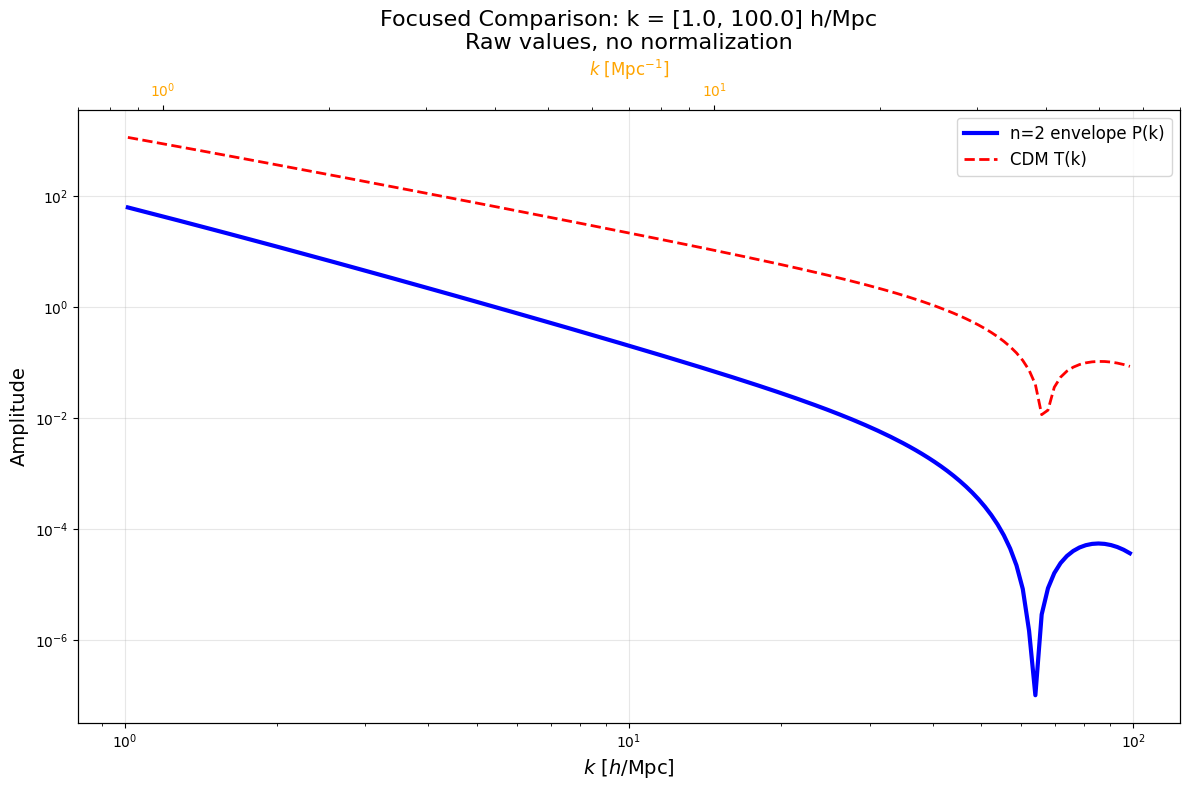

In [3]:
#!/usr/bin/env python3
"""
Raw overlay: n=2 envelope P(k) vs CDM T(k) column from reference.
No normalization, just raw values.
"""

import numpy as np
import matplotlib.pyplot as plt
import os

# --- Configuration ---
TEST_DIR = "/home/arifchu/class_public-master-new-dmeff/test_fix_CLASS_output"
REF_TK_DIR = "/home/arifchu/Pk_MilkyWay/camb_data_tk"
OUTPUT_DIR = "raw_pk_tk_overlay"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Files
IDM_PK_FILE = "idm_z0_k300_VG_short_idm_fixed_stepsize_n2_envelope00_pk.dat"
REF_TK_FILE = "idm_n2_1e-4GeV_envelope_z99_Tk.dat"

# Hubble parameter for unit conversion
h = 0.7

def load_pk(filepath):
    """Load P(k) file - raw data."""
    data = np.loadtxt(filepath)
    k_hMpc = data[:, 0]  # k in h/Mpc
    pk = data[:, 1]      # P(k) in (Mpc/h)^3
    return k_hMpc, pk

def load_tk_cdm(filepath):
    """Load T(k) file and extract CDM column - raw data."""
    data = np.loadtxt(filepath)
    k_hMpc = data[:, 0]       # k in h/Mpc (column 0)
    cdm_tk = data[:, 1]       # CDM T(k) (column 1) - raw value (can be negative)
    return k_hMpc, cdm_tk

def create_raw_overlay(pk_k_hMpc, pk, tk_k_hMpc, tk_cdm):
    """Create raw overlay plot with k in h/Mpc."""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot raw P(k)
    ax.loglog(pk_k_hMpc, pk, 'b-', linewidth=3, 
              label='n=2 envelope IDM P(k) (raw)')
    
    # Plot raw T(k) CDM
    ax.loglog(tk_k_hMpc, np.abs(tk_cdm), 'r-', linewidth=2, 
              label='CDM T(k) from reference (|raw|)')
    
    ax.set_xlabel(r'$k$ [$h$/Mpc]', fontsize=14)
    ax.set_ylabel('Amplitude', fontsize=14)
    ax.set_title('Raw Overlay: n=2 envelope P(k) vs CDM T(k)\n(k in h/Mpc, no normalization)', 
                 fontsize=16)
    ax.legend(fontsize=12, loc='upper right')
    ax.grid(True, alpha=0.3)
    
    # Add info box
    info_text = (f"P(k): {IDM_PK_FILE}\n"
                 f"T(k): {REF_TK_FILE}\n"
                 f"CDM column (raw values)\n"
                 f"P(k) units: (Mpc/h)$^3$\n"
                 f"T(k): dimensionless")
    
    plt.text(0.02, 0.98, info_text, transform=ax.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    return fig

def create_dual_unit_plot(pk_k_hMpc, pk, tk_k_hMpc, tk_cdm):
    """Create plot with k in both h/Mpc and 1/Mpc."""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Convert k to 1/Mpc for bottom x-axis
    pk_k_1Mpc = pk_k_hMpc * h
    tk_k_1Mpc = tk_k_hMpc * h
    
    # Plot with k in 1/Mpc (bottom axis)
    line1, = ax.loglog(pk_k_1Mpc, pk, 'b-', linewidth=3, 
                       label='n=2 envelope IDM P(k)')
    line2, = ax.loglog(tk_k_1Mpc, np.abs(tk_cdm), 'r--', linewidth=2, 
                       label='CDM T(k) (reference)')
    
    ax.set_xlabel(r'$k$ [Mpc$^{-1}$]', fontsize=14)
    ax.set_ylabel('Amplitude', fontsize=14)
    ax.set_title('Raw Overlay with Dual k Units\n'
                 'Bottom: 1/Mpc, Top: h/Mpc', fontsize=16)
    ax.grid(True, alpha=0.3)
    
    # Add top x-axis with h/Mpc
    ax_top = ax.twiny()
    ax_top.set_xscale('log')
    
    # Set limits for top axis (h/Mpc)
    xlim_1Mpc = ax.get_xlim()
    ax_top.set_xlim(xlim_1Mpc[0]/h, xlim_1Mpc[1]/h)
    ax_top.set_xlabel(r'$k$ [$h$/Mpc]', fontsize=14, color='orange')
    ax_top.tick_params(axis='x', labelcolor='orange')
    
    # Add legend
    ax.legend(fontsize=12, loc='upper right')
    
    # Add conversion info
    conv_text = (f"Conversion: $k_{{\mathrm{{1/Mpc}}}} = k_{{\mathrm{{h/Mpc}}}} \\times h$\n"
                 f"Using h = {h}\n"
                 f"1.0 h/Mpc = {h:.2f} Mpc$^{{-1}}$\n"
                 f"1.0 Mpc$^{{-1}}$ = {1/h:.2f} h/Mpc")
    
    plt.text(0.02, 0.98, conv_text, transform=ax.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    return fig

def create_simple_comparison(pk_k_hMpc, pk, tk_k_hMpc, tk_cdm):
    """Simplest possible comparison."""
    plt.figure(figsize=(12, 8))
    
    # Plot both on same axes
    plt.loglog(pk_k_hMpc, pk, 'b-', linewidth=3, 
               label=f'P(k): {IDM_PK_FILE[:40]}...')
    plt.loglog(tk_k_hMpc, np.abs(tk_cdm), 'r--', linewidth=2, 
               label=f'T(k) CDM: {REF_TK_FILE[:40]}...')
    
    plt.xlabel(r'$k$ [$h$/Mpc]', fontsize=14)
    plt.ylabel('Amplitude', fontsize=14)
    plt.title('Simple Raw Comparison\nn=2 envelope P(k) vs CDM T(k)', fontsize=16)
    plt.legend(fontsize=12, loc='upper right')
    plt.grid(True, alpha=0.3)
    
    # Add scale info
    plt.text(0.98, 0.02, 
             f'P(k) units: (Mpc/h)$^3$\nT(k): dimensionless (CDM transfer)',
             transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='bottom',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return plt.gcf()

def main():
    print("="*80)
    print("RAW OVERLAY: n=2 envelope P(k) vs CDM T(k)")
    print("No normalization - Just raw values")
    print("="*80)
    
    # Load raw data
    print("\nLoading raw P(k) file...")
    pk_k_hMpc, pk = load_pk(os.path.join(TEST_DIR, IDM_PK_FILE))
    print(f"  Points: {len(pk_k_hMpc)}")
    print(f"  k range: {pk_k_hMpc[0]:.3e} to {pk_k_hMpc[-1]:.3e} h/Mpc")
    print(f"  P(k) range: {pk[0]:.3e} to {pk[-1]:.3e} (Mpc/h)^3")
    
    print("\nLoading raw T(k) file (CDM column)...")
    tk_k_hMpc, tk_cdm = load_tk_cdm(os.path.join(REF_TK_DIR, REF_TK_FILE))
    print(f"  Points: {len(tk_k_hMpc)}")
    print(f"  k range: {tk_k_hMpc[0]:.3e} to {tk_k_hMpc[-1]:.3e} h/Mpc")
    print(f"  T_CDM(k) range: {tk_cdm.min():.3e} to {tk_cdm.max():.3e}")
    
    # Create plots
    print("\n" + "-"*80)
    print("Creating raw overlay plots...")
    
    # 1. Raw overlay with k in h/Mpc
    fig1 = create_raw_overlay(pk_k_hMpc, pk, tk_k_hMpc, tk_cdm)
    fig1.savefig(os.path.join(OUTPUT_DIR, 'raw_overlay_hMpc.png'), 
                 dpi=150, bbox_inches='tight')
    print("✓ Saved: raw_overlay_hMpc.png")
    plt.close(fig1)
    
    # 2. Dual unit plot
    fig2 = create_dual_unit_plot(pk_k_hMpc, pk, tk_k_hMpc, tk_cdm)
    fig2.savefig(os.path.join(OUTPUT_DIR, 'raw_overlay_dual_units.png'), 
                 dpi=150, bbox_inches='tight')
    print("✓ Saved: raw_overlay_dual_units.png")
    plt.close(fig2)
    
    # 3. Simplest comparison
    fig3 = create_simple_comparison(pk_k_hMpc, pk, tk_k_hMpc, tk_cdm)
    fig3.savefig(os.path.join(OUTPUT_DIR, 'simple_raw_comparison.png'), 
                 dpi=150, bbox_inches='tight')
    print("✓ Saved: simple_raw_comparison.png")
    plt.close(fig3)
    
    # 4. Focus on specific k-range (1-100 h/Mpc)
    plt.figure(figsize=(12, 8))
    
    # Filter data for k-range 1-100 h/Mpc
    k_min, k_max = 1.0, 100.0
    
    mask_pk = (pk_k_hMpc >= k_min) & (pk_k_hMpc <= k_max)
    mask_tk = (tk_k_hMpc >= k_min) & (tk_k_hMpc <= k_max)
    
    if np.sum(mask_pk) > 10 and np.sum(mask_tk) > 10:
        plt.loglog(pk_k_hMpc[mask_pk], pk[mask_pk], 'b-', linewidth=3, 
                   label='n=2 envelope P(k)')
        plt.loglog(tk_k_hMpc[mask_tk], np.abs(tk_cdm[mask_tk]), 'r--', linewidth=2, 
                   label='CDM T(k)')
        
        plt.xlabel(r'$k$ [$h$/Mpc]', fontsize=14)
        plt.ylabel('Amplitude', fontsize=14)
        plt.title(f'Focused Comparison: k = [{k_min}, {k_max}] h/Mpc\nRaw values, no normalization', 
                  fontsize=16)
        plt.legend(fontsize=12, loc='upper right')
        plt.grid(True, alpha=0.3)
        
        # Add conversion to 1/Mpc on top
        ax = plt.gca()
        ax_top = ax.twiny()
        ax_top.set_xscale('log')
        ax_top.set_xlim(k_min*h, k_max*h)
        ax_top.set_xlabel(r'$k$ [Mpc$^{-1}$]', fontsize=12, color='orange')
        ax_top.tick_params(axis='x', labelcolor='orange')
        
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_DIR, 'focused_comparison_1_100_hMpc.png'), 
                    dpi=150, bbox_inches='tight')
        print("✓ Saved: focused_comparison_1_100_hMpc.png")
    
    print(f"\n" + "="*80)
    print("RAW OVERLAY COMPLETE")
    print("="*80)
    print(f"\nOutput directory: {OUTPUT_DIR}/")
    print(f"\nPlots created:")
    print("  1. raw_overlay_hMpc.png - k in h/Mpc only")
    print("  2. raw_overlay_dual_units.png - k in both 1/Mpc and h/Mpc")
    print("  3. simple_raw_comparison.png - Simplest overlay")
    print("  4. focused_comparison_1_100_hMpc.png - Zoomed to k=1-100 h/Mpc")
    
    print(f"\nKey points:")
    print(f"  • No normalization applied")
    print(f"  • P(k) shown in (Mpc/h)^3 units")
    print(f"  • T(k) CDM shown as raw values (absolute value)")
    print(f"  • k shown in h/Mpc (cosmology units)")
    print(f"  • Some plots include 1/Mpc conversion (h={h})")
    
    # Show the last plot
    plt.show()

if __name__ == "__main__":
    main()

--- Direct Comparison: Raw Transfer Functions (No Normalization) ---
Loading Data...
  Loaded My File:  processed_Tk_idm_run_n2_m1ep00_s1.6e-23_halfmode_FIXED.dat
  Loaded Ref File: idm_n2_1GeV_halfmode_z99_Tk.dat
Plot saved to: compare_halfmode_n2_1GeV_RAW.png


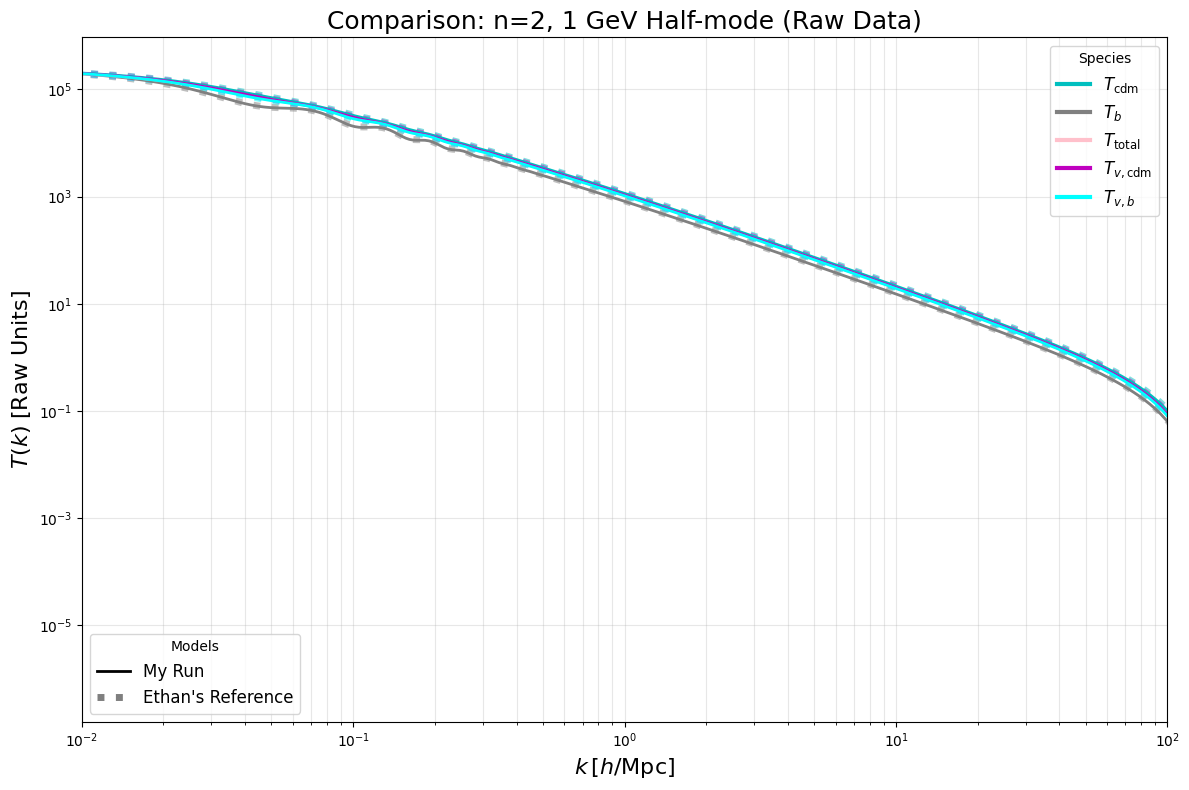

Plotting Raw Data...
Calculating Ratios...
Plot saved to: compare_halfmode_RATIO.png


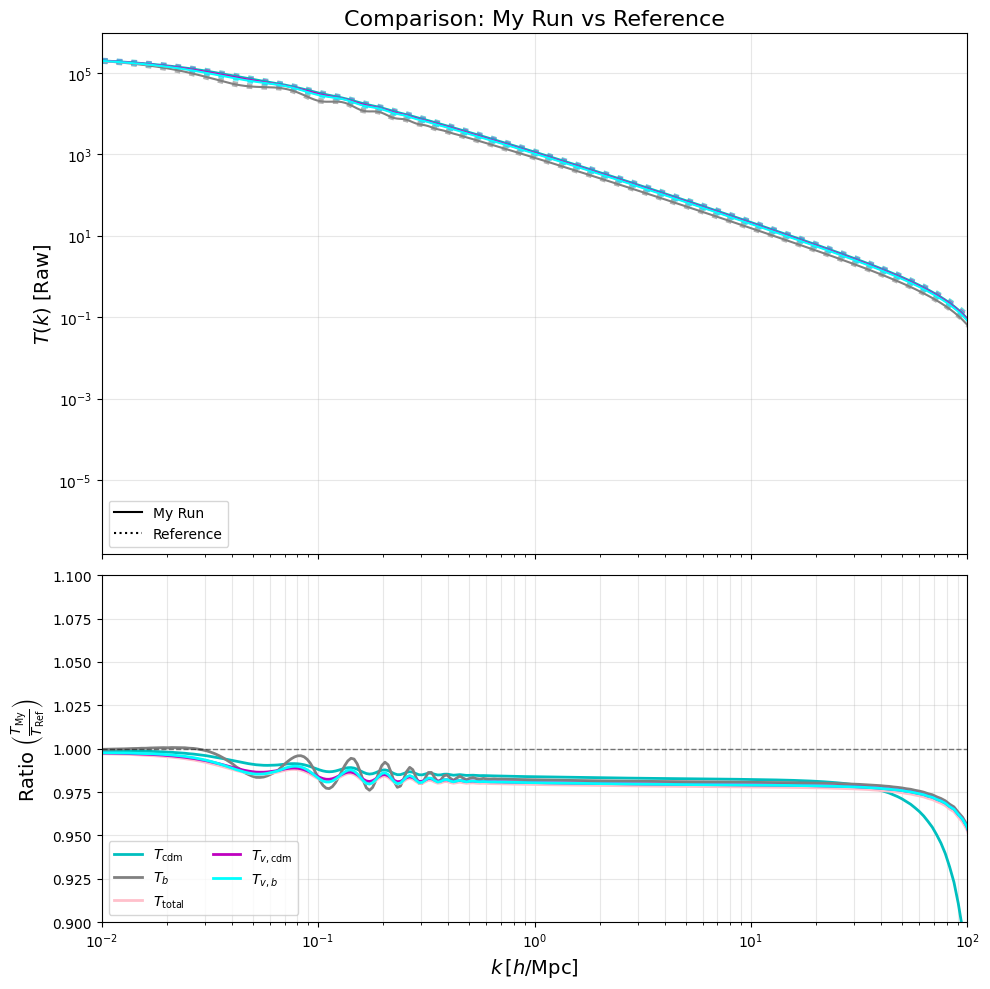

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---
FILE_MY_HM = "/home/arifchu/class_public-master-new-dmeff/COZMIC_test_output/CAMB_COZMIC_test_n2_1GeV_Tk.dat"

REF_TK_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/ICs/ncdm_resims/data_tk"
FILE_REF_HM = "idm_n2_1GeV_halfmode_z99_Tk.dat"
PATH_REF_HM = os.path.join(REF_TK_DIR, FILE_REF_HM)

# Columns: (Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---
def load_data(path):
    if path is None or not os.path.exists(path): 
        print(f"  [Missing] {path}")
        return None
    try: return np.loadtxt(path)
    except Exception as e:
        print(f"  [Error] {os.path.basename(path)}: {e}")
        return None

# --- Main Execution ---

d_my = load_data(FILE_MY_HM)
d_ref = load_data(PATH_REF_HM)

if d_my is not None and d_ref is not None:
    # Initialize Figure with 2 Subplots (Top: Raw, Bottom: Ratio)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [3, 2]})

    # --- TOP PANEL: Raw Data ---
    print("Plotting Raw Data...")
    
    # Plot Reference (Dotted)
    k_ref = d_ref[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < d_ref.shape[1]:
            ax1.loglog(k_ref, d_ref[:, col], color=color, ls=':', lw=4, alpha=0.6)

    # Plot My Run (Solid)
    k_my = d_my[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < d_my.shape[1]:
            ax1.loglog(k_my, d_my[:, col], color=color, ls='-', lw=1.5, alpha=1.0)
            
    ax1.set_ylabel(r'$T(k)$ [Raw]', fontsize=14)
    ax1.set_title(r"Comparison: My Run vs Reference", fontsize=16)
    ax1.grid(True, which='major', alpha=0.3)
    ax1.legend([Line2D([0],[0], color='k', ls='-'), Line2D([0],[0], color='k', ls=':')], 
               ['My Run', 'Reference'], loc='lower left')

    # --- BOTTOM PANEL: Ratio (Difference) ---
    print("Calculating Ratios...")
    
    # We interpolate Reference onto My K-grid
    k_eval = d_my[:, 0]
    
    for col, label, color in SPECIES_CONFIG:
        if col < d_my.shape[1] and col < d_ref.shape[1]:
            # 1. Get Reference Data for this species
            ref_y = d_ref[:, col]
            
            # 2. Interpolate Ref to match 'My Run' k-values
            #    We use log-interpolation for Transfer functions to preserve precision
            f_interp = interp1d(np.log(k_ref), np.log(np.abs(ref_y) + 1e-30), 
                                kind='linear', fill_value="extrapolate")
            
            ref_y_interp = np.exp(f_interp(np.log(k_eval)))
            
            # 3. Calculate Ratio
            my_y = d_my[:, col]
            
            # Filter out tiny values to avoid dividing by zero or noise at high k
            mask = (ref_y_interp > 1e-8) & (my_y > 1e-8)
            
            ratio = np.zeros_like(my_y)
            ratio[mask] = my_y[mask] / ref_y_interp[mask]
            ratio[~mask] = np.nan # Hide noise
            
            ax2.semilogx(k_eval, ratio, color=color, lw=2, label=label)

    # Reference line at 1.0
    ax2.axhline(1.0, color='k', ls='--', lw=1, alpha=0.5)
    
    # Styling
    ax2.set_ylabel(r'Ratio $\left( \frac{T_{\mathrm{My}}}{T_{\mathrm{Ref}}} \right)$', fontsize=14)
    ax2.set_xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=14)
    ax2.grid(True, which='both', alpha=0.3)
    ax2.legend(loc='lower left', fontsize=10, ncol=2)
    
    # Set Limits for clarity
    ax2.set_ylim(0.90, 1.10) # Look for 10% deviations
    ax2.set_xlim(1e-2, 100)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.05) # Bring plots closer
    
    out_file = "compare_halfmode_RATIO.png"
    plt.savefig(out_file, dpi=150)
    print(f"Plot saved to: {out_file}")
    plt.show()

else:
    print("Error: Could not load data.")

--- Validation: My Envelope vs Ethan's Envelope ---
Loading CDM...
Loading Models...
  Loaded My Envelope: /home/arifchu/class_public-master-new-dmeff/processed_Tk_n4_m1ep00_s2.8em16_envelope_FIXED.dat
  Loaded Ethan Env:   idm_1GeV_envelope_Tk.dat
  Loaded Ethan HM:    idm_1GeV_halfmode_Tk.dat
Normalizing...
Plot saved to: validation_envelope_n4_1GeV.png


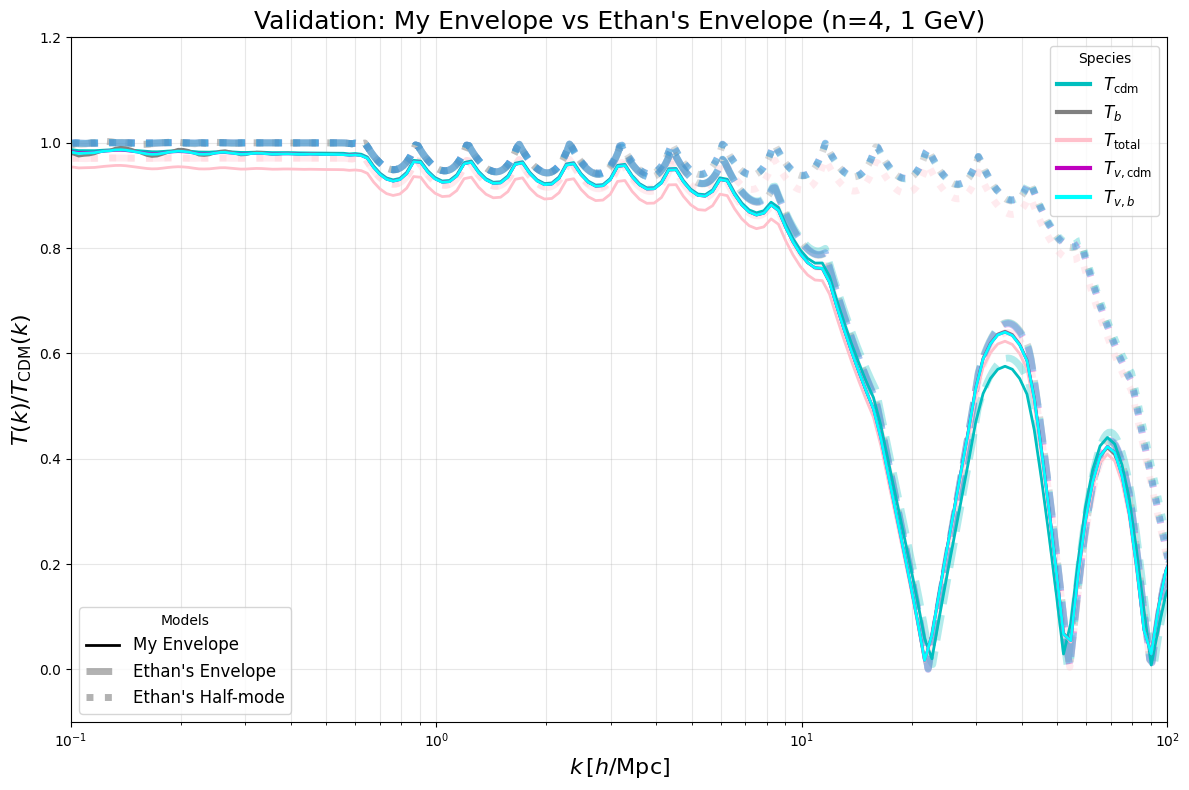

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your File (The "Fixed" Envelope Run)
# Ensure this file is in the current directory or update the path
FILE_MY_ENV = "/home/arifchu/class_public-master-new-dmeff/processed_Tk_n4_m1ep00_s2.8em16_envelope_FIXED.dat"

# 2. Reference Directories (Ethan's Data)
REF_BASE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"
DIR_ETHAN_ENV = os.path.join(REF_BASE, "idm_1GeV_envelope")
DIR_ETHAN_HM  = os.path.join(REF_BASE, "idm_1GeV_halfmode")

# 3. CDM Baseline (Ethan's Raw CDM - for normalization)
FILE_CDM = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# 4. Plotting Config (Species: Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def find_tk_file(directory):
    """Finds *Tk.dat or dump_transfer.txt in a directory."""
    if not os.path.exists(directory): return None
    # Specific check for the file format seen in your ls
    files = glob.glob(os.path.join(directory, "*Tk.dat"))
    if files: return files[0]
    dump = os.path.join(directory, "dump_transfer.txt")
    if os.path.exists(dump): return dump
    return None

def load_data(path):
    if path is None or not os.path.exists(path): 
        print(f"  [Missing] {path}")
        return None
    try: return np.loadtxt(path)
    except Exception as e:
        print(f"  [Error] {os.path.basename(path)}: {e}")
        return None

def normalize_data(target_data, cdm_data):
    if target_data is None or cdm_data is None: return None
    
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            # Linear interpolation to match k-grids
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', fill_value="extrapolate")
            cdm_interp = f_interp(k_target)
            
            with np.errstate(divide='ignore', invalid='ignore'):
                norm_data[:, col_idx] = target_data[:, col_idx] / cdm_interp
    return norm_data

# --- Main Execution ---

print("--- Validation: My Envelope vs Ethan's Envelope ---")

# 1. Load Data
print("Loading CDM...")
d_cdm = load_data(FILE_CDM)

print("Loading Models...")
d_my_env = load_data(FILE_MY_ENV)
if d_my_env is not None: print(f"  Loaded My Envelope: {FILE_MY_ENV}")

f_ethan_env = find_tk_file(DIR_ETHAN_ENV)
d_ethan_env = load_data(f_ethan_env)
if f_ethan_env: print(f"  Loaded Ethan Env:   {os.path.basename(f_ethan_env)}")

f_ethan_hm = find_tk_file(DIR_ETHAN_HM)
d_ethan_hm = load_data(f_ethan_hm)
if f_ethan_hm: print(f"  Loaded Ethan HM:    {os.path.basename(f_ethan_hm)}")

# 2. Normalize
print("Normalizing...")
n_my_env    = normalize_data(d_my_env, d_cdm)
n_ethan_env = normalize_data(d_ethan_env, d_cdm)
n_ethan_hm  = normalize_data(d_ethan_hm, d_cdm)

# 3. Plot
if n_my_env is not None:
    plt.figure(figsize=(12, 8))
    
    # --- Background: Ethan's Half-mode (Context) ---
    # Style: Thick Dotted
    if n_ethan_hm is not None:
        k = n_ethan_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < n_ethan_hm.shape[1]:
                plt.semilogx(k, n_ethan_hm[:, col], color=color, ls=':', lw=5, alpha=0.3)

    # --- Background: Ethan's Envelope (Target) ---
    # Style: Thick Dashed
    if n_ethan_env is not None:
        k = n_ethan_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < n_ethan_env.shape[1]:
                plt.semilogx(k, n_ethan_env[:, col], color=color, ls='--', lw=5, alpha=0.3)

    # --- Foreground: My Envelope (Test) ---
    # Style: Thin Solid (Should sit ON TOP of Dashed)
    k = n_my_env[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < n_my_env.shape[1]:
            plt.semilogx(k, n_my_env[:, col], color=color, ls='-', lw=2, alpha=1.0)

    # --- Styling ---
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=16)
    plt.title(r"Validation: My Envelope vs Ethan's Envelope (n=4, 1 GeV)", fontsize=18)
    
    # Legends
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-',  alpha=1.0, label='My Envelope'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.3, label="Ethan's Envelope"),
        Line2D([0], [0], color='k', lw=5, ls=':',  alpha=0.3, label="Ethan's Half-mode")
    ]
    leg1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(leg1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    plt.ylim(-0.1, 1.2)
    plt.tight_layout()
    
    out_file = "validation_envelope_n4_1GeV.png"
    plt.savefig(out_file, dpi=150)
    print(f"Plot saved to: {out_file}")
    plt.show()
else:
    print("Error: Could not process your Envelope file.")

--- Validation: My Envelope vs Ethan's Envelope (Raw) ---
Loading Models...
  Loaded My Envelope: processed_Tk_n4_m1ep00_s2.8em16_envelope_FIXED.dat
  Loaded Ethan Env:   idm_1GeV_envelope_Tk.dat
  Loaded Ethan HM:    idm_1GeV_halfmode_Tk.dat
Plot saved to: validation_envelope_n4_1GeV_raw.png


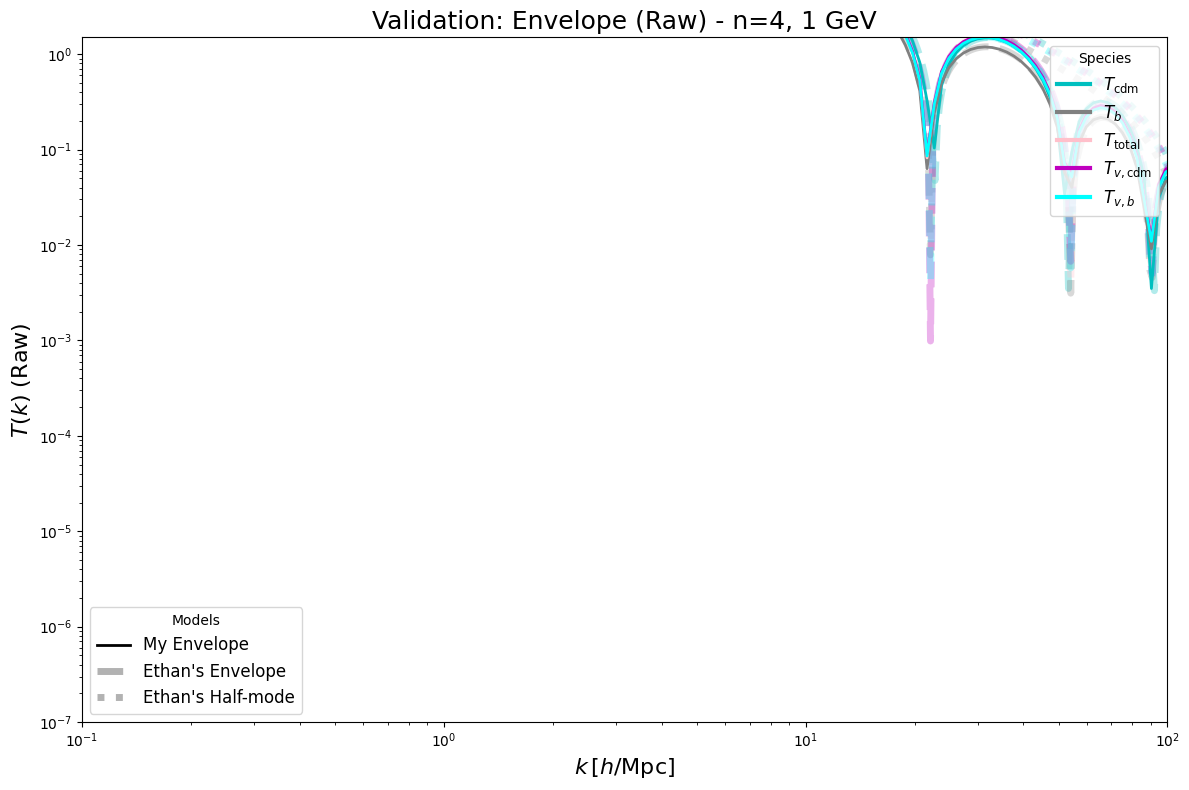

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your File (The "Fixed" Envelope Run)
FILE_MY_ENV = "/home/arifchu/class_public-master-new-dmeff/processed_Tk_n4_m1ep00_s2.8em16_envelope_FIXED.dat"

# 2. Reference Directories (Ethan's Data)
REF_BASE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"
DIR_ETHAN_ENV = os.path.join(REF_BASE, "idm_1GeV_envelope")
DIR_ETHAN_HM  = os.path.join(REF_BASE, "idm_1GeV_halfmode")

# 3. Plotting Config (Species: Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def find_tk_file(directory):
    """Finds *Tk.dat or dump_transfer.txt in a directory."""
    if not os.path.exists(directory): return None
    files = glob.glob(os.path.join(directory, "*Tk.dat"))
    if files: return files[0]
    dump = os.path.join(directory, "dump_transfer.txt")
    if os.path.exists(dump): return dump
    return None

def load_data(path):
    if path is None or not os.path.exists(path): 
        print(f"  [Missing] {path}")
        return None
    try: return np.loadtxt(path)
    except Exception as e:
        print(f"  [Error] {os.path.basename(path)}: {e}")
        return None

# --- Main Execution ---

print("--- Validation: My Envelope vs Ethan's Envelope (Raw) ---")

# 1. Load Models
print("Loading Models...")
d_my_env = load_data(FILE_MY_ENV)
if d_my_env is not None: print(f"  Loaded My Envelope: {os.path.basename(FILE_MY_ENV)}")

f_ethan_env = find_tk_file(DIR_ETHAN_ENV)
d_ethan_env = load_data(f_ethan_env)
if f_ethan_env: print(f"  Loaded Ethan Env:   {os.path.basename(f_ethan_env)}")

f_ethan_hm = find_tk_file(DIR_ETHAN_HM)
d_ethan_hm = load_data(f_ethan_hm)
if f_ethan_hm: print(f"  Loaded Ethan HM:    {os.path.basename(f_ethan_hm)}")

# 2. Plot
if d_my_env is not None:
    plt.figure(figsize=(12, 8))
    
    # --- Background: Ethan's Half-mode (Context) ---
    # Style: Thick Dotted
    if d_ethan_hm is not None:
        k = d_ethan_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_ethan_hm.shape[1]:
                plt.loglog(k, np.abs(d_ethan_hm[:, col]), color=color, ls=':', lw=5, alpha=0.3)

    # --- Background: Ethan's Envelope (Target) ---
    # Style: Thick Dashed
    if d_ethan_env is not None:
        k = d_ethan_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_ethan_env.shape[1]:
                plt.loglog(k, np.abs(d_ethan_env[:, col]), color=color, ls='--', lw=5, alpha=0.3)

    # --- Foreground: My Envelope (Test) ---
    # Style: Thin Solid (Should sit ON TOP of Dashed)
    k = d_my_env[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < d_my_env.shape[1]:
            plt.loglog(k, np.abs(d_my_env[:, col]), color=color, ls='-', lw=2, alpha=1.0)

    # --- Styling ---
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k)$ (Raw)', fontsize=16)
    plt.title(r"Validation: Envelope (Raw) - n=4, 1 GeV", fontsize=18)
    
    # Legends
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-',  alpha=1.0, label='My Envelope'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.3, label="Ethan's Envelope"),
        Line2D([0], [0], color='k', lw=5, ls=':',  alpha=0.3, label="Ethan's Half-mode")
    ]
    leg1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(leg1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    plt.grid(False) # No grid as requested for previous raw plots
    plt.xlim(0.1, 100)
    # Focus on the physical range (Transfer function goes from 1 to ~1e-6)
    plt.ylim(1e-7, 1.5)
    plt.tight_layout()
    
    out_file = "validation_envelope_n4_1GeV_raw.png"
    plt.savefig(out_file, dpi=150)
    print(f"Plot saved to: {out_file}")
    plt.show()
else:
    print("Error: Could not process your Envelope file.")

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your Processed Middle Files
# Point to the OUTPUT directory from your batch run
NEW_TK_DIR = "/home/arifchu/class_public-master-new-dmeff/correct_accurate_runs_all_numerics"

OLD_TK_DIR = "/central/groups/carnegie_poc/achu/n4_1GeV_middle"

# 2. Reference Base Directory (Ethan's)
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# 3. CDM Baseline (Ethan's Raw CDM)
# Used to normalize ALL models for fair comparison
FILE_CDM_REF = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# 4. The Two Models to Plot (Based on your SUCCESS report)
# Format: (n, mass_str, mass_float)
# Note: mass_str matches filename, mass_float helps find ref dirs
TARGET_MODELS = [
    #(4, "1e-4", 1e-4),
    (4, "1", 1)
]

# 5. Plotting Config
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if path is None or not os.path.exists(path): return None
    try: return np.loadtxt(path)
    except: return None

def find_ref_file(n, mass_str, model_type):
    """Finds Envelope/Half-mode Tk file in Ethan's directories."""
    # Naming convention variations
    # Mass string conversion for folder names: 1e-4 -> 1e-4GeV
    mass_folder = f"{mass_str}GeV"
    
    options = [
        f"idm_n{n}_{mass_folder}_{model_type}",
        f"idm_{mass_folder}_{model_type}",
        f"idm_n{n}_{mass_folder}_{model_type}_16K"
    ]
    
    for name in options:
        dir_path = os.path.join(REF_BASE_DIR, name)
        if os.path.exists(dir_path):
            # Look for Tk file
            f = glob.glob(os.path.join(dir_path, "*Tk.dat"))
            if f: return f[0]
            d = os.path.join(dir_path, "dump_transfer.txt")
            if os.path.exists(d): return d
    return None

def normalize_data(target_data, cdm_data):
    if target_data is None or cdm_data is None: return None
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', fill_value="extrapolate")
            cdm_interp = f_interp(k_target)
            with np.errstate(divide='ignore', invalid='ignore'):
                norm_data[:, col_idx] = target_data[:, col_idx] / cdm_interp
    return norm_data

# --- Main Execution ---

# 1. Load CDM
print(f"Loading Reference CDM...")
data_cdm = load_data(FILE_CDM_REF)
if data_cdm is None:
    print("CRITICAL: CDM Reference not found.")
    exit()

for n, mass_str, mass_val in TARGET_MODELS:
    print(f"\n--- Plotting n={n}, m={mass_str} ---")
    
    # 2. Find Files
    # Middle: Look for processed_Tk_n2_m1em04... in your dir
    # Convert 1e-4 -> m1em04 format used in filenames
    m_code = f"{mass_val:.0e}".replace("+", "p").replace("-", "m")
    mid_pattern_new = os.path.join(NEW_TK_DIR, f"processed_Tk_n{n}_m{m_code}_test_middle.dat")
    # processed_Tk_n4_m1ep00_test_middle.dat
    mid_files_new = glob.glob(mid_pattern_new)
    mid_pattern_old = os.path.join(OLD_TK_DIR, f"processed_Tk_n{n}_m{m_code}_*.dat")
    #processed_Tk_n4_m1ep00_s5.7344em17
    mid_files_old = glob.glob(mid_pattern_old)
    
    if not mid_files_new:
        print(f"  [Skip] Middle file not found for {mid_pattern_new}")
    elif not mid_pattern_old:
        print(f"  [Skip] Middle file not found for {mid_pattern_old}")
        continue
    
    file_mid_new = mid_files_new[0]
    file_mid_old = mid_files_old[0]
    file_env = find_ref_file(n, mass_str, "envelope")
    file_hm  = find_ref_file(n, mass_str, "halfmode")
    
    print(f"  New Middle:   {os.path.basename(file_mid_new)}")
    print(f"  Old Middle:   {os.path.basename(file_mid_old)}")
    print(f"  Envelope: {os.path.basename(file_env) if file_env else 'MISSING'}")
    print(f"  Halfmode: {os.path.basename(file_hm) if file_hm else 'MISSING'}")

    # 3. Load & Normalize
    d_mid_new = load_data(file_mid_new)
    d_mid_old = load_data(file_mid_old)
    d_env = load_data(file_env)
    d_hm  = load_data(file_hm)
    
    n_mid_new = normalize_data(d_mid_new, data_cdm)
    n_mid_old = normalize_data(d_mid_old, data_cdm)
    n_env = normalize_data(d_env, data_cdm)
    n_hm  = normalize_data(d_hm,  data_cdm)
    
    # 4. Plot
    plt.figure(figsize=(12, 8))
    
    # Background: Envelope (Thick Dashed)
    if n_env is not None:
        for col, label, color in SPECIES_CONFIG:
            if col < n_env.shape[1]:
                plt.semilogx(n_env[:,0], n_env[:,col], color=color, ls='--', lw=5, alpha=0.3)

    # Background: Halfmode (Thick Dotted)
    if n_hm is not None:
        for col, label, color in SPECIES_CONFIG:
            if col < n_hm.shape[1]:
                plt.semilogx(n_hm[:,0], n_hm[:,col], color=color, ls=':', lw=5, alpha=0.3)

    # Foreground: Middle (Thin Solid)
    if n_mid_new is not None:
        for col, label, color in SPECIES_CONFIG:
            if col < n_mid_new.shape[1]:
                plt.semilogx(n_mid_new[:,0], n_mid_new[:,col], color=color, ls='-', lw=2, alpha=1.0)

    if n_mid_old is not None:
        for col, label, color in SPECIES_CONFIG:
            if col < n_mid_old.shape[1]:
                plt.semilogx(n_mid_old[:,0], n_mid_old[:,col], color=color, ls=':', lw=2, alpha=1.0)
    # Styling
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=16)
    plt.title(f"Sandwich Test: n={n}, m={mass_str} GeV", fontsize=18)
    
    # Legends
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', label='Middle New'),
        Line2D([0], [0], color='k', lw=2, ls=':', label='Middle Old'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.3, label='Envelope'),
        Line2D([0], [0], color='k', lw=5, ls=':', alpha=0.3, label='Half-mode')
    ]
    l1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(l1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    plt.grid(True, alpha=0.3)
    plt.xlim(0.1, 100)
    plt.ylim(-0.1, 1.2)
    plt.tight_layout()
    
    out_name = f"tk_sandwich_n{n}_{mass_str}_final.png"
    plt.savefig(out_name, dpi=150)
    print(f"  Saved plot: {out_name}")
    plt.close()

Loading Reference CDM...

--- Plotting n=4, m=1 ---
  New Middle:   processed_Tk_n4_m1ep00_test_middle.dat
  Old Middle:   processed_Tk_n4_m1ep00_s5.7344em17.dat
  Envelope: idm_1GeV_envelope_Tk.dat
  Halfmode: idm_1GeV_halfmode_Tk.dat
  Saved plot: tk_sandwich_n4_1_final.png



--- Plotting n=2, m=1e-4 ---
  Middle:   processed_Tk_n2_m1em04_s2.906em27_middle.dat
  Envelope: idm_1e-4GeV_envelope_Tk.dat
  Halfmode: idm_1e-4GeV_halfmode_Tk.dat
  Saved plot: tk_sandwich_raw_n2_1e-4_final.png


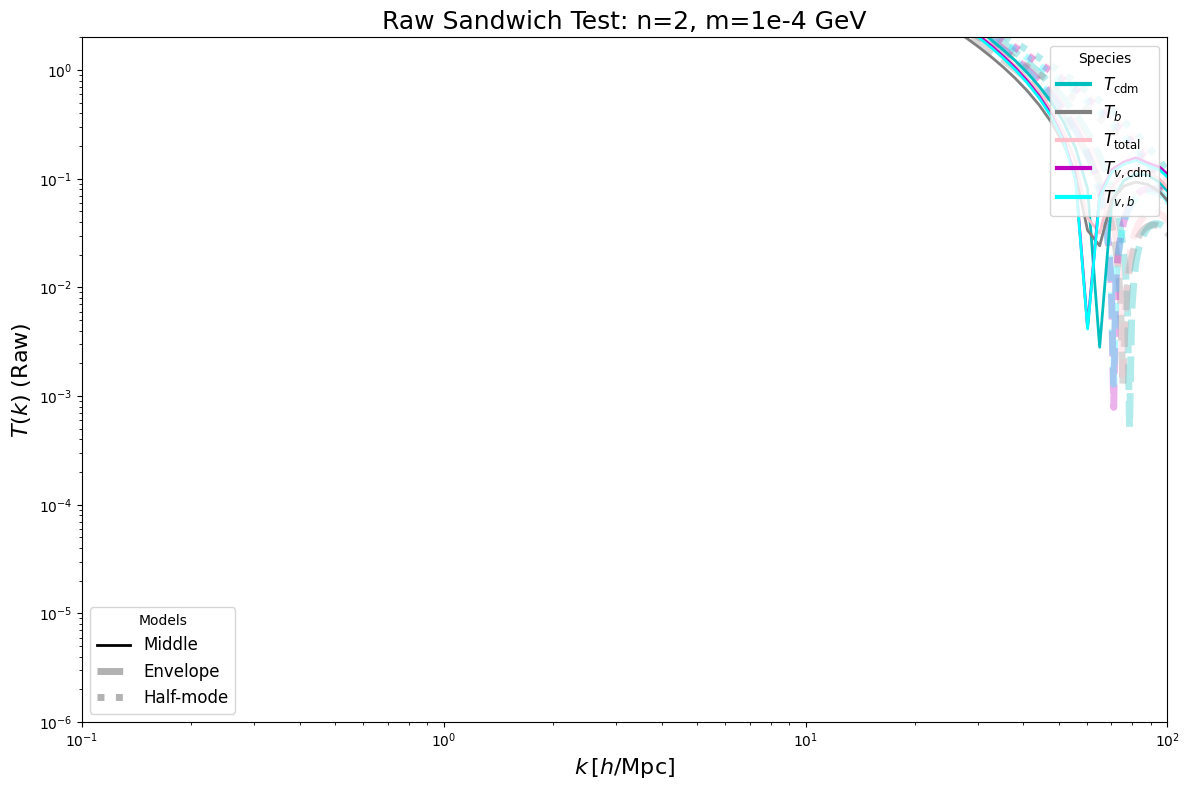


--- Plotting n=2, m=1e-2 ---
  Middle:   processed_Tk_n2_m1em02_s2.615em24_middle.dat
  Envelope: idm_1e-2GeV_envelope_Tk.dat
  Halfmode: idm_1e-2GeV_halfmode_Tk.dat
  Saved plot: tk_sandwich_raw_n2_1e-2_final.png


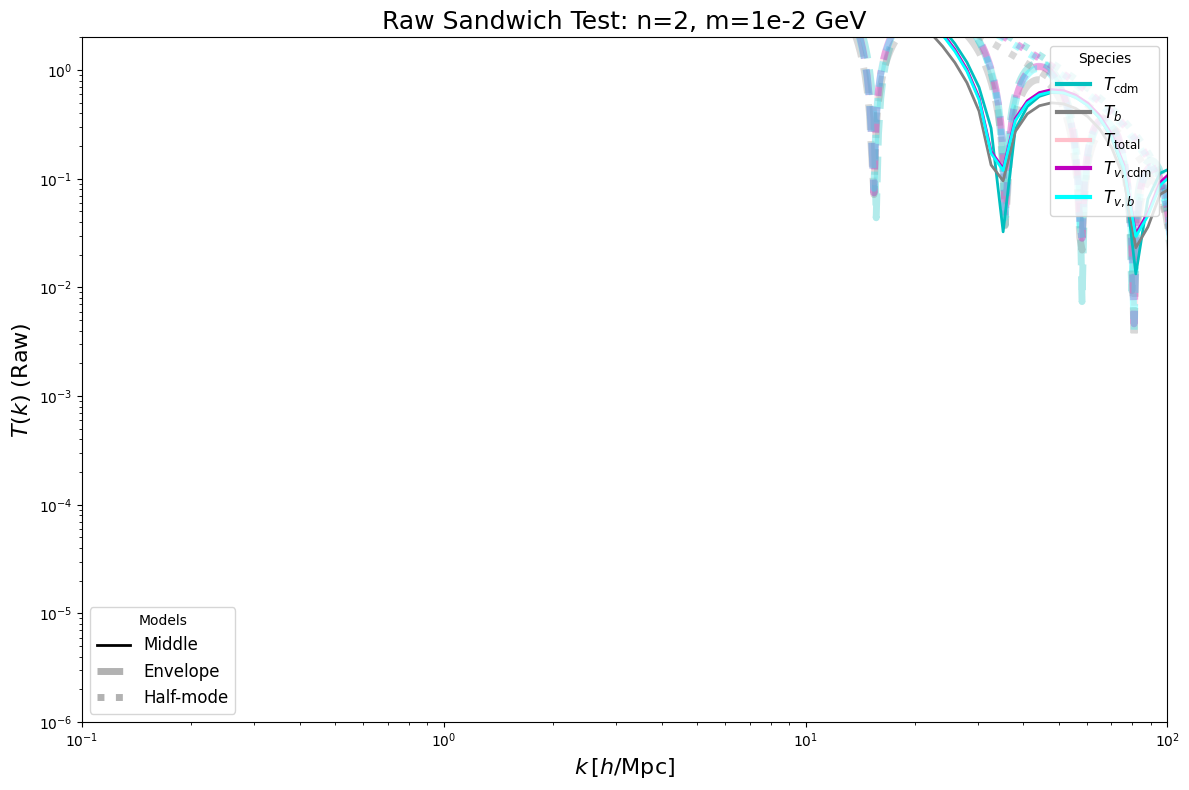

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your Processed Middle Files Directory
# Update this if your path is different
MY_TK_DIR = "/home/arifchu/class_public-master-new-dmeff/accurately_processed_Tk"

# 2. Reference Base Directory (Ethan's)
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# 3. The Two Models to Plot
TARGET_MODELS = [
    (2, "1e-4", 1e-4),
    (2, "1e-2", 1e-2)
]

# 4. Plotting Config
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if path is None or not os.path.exists(path): return None
    try: return np.loadtxt(path)
    except: return None

def find_ref_file(n, mass_str, model_type):
    mass_folder = f"{mass_str}GeV"
    options = [
        f"idm_n{n}_{mass_folder}_{model_type}",
        f"idm_{mass_folder}_{model_type}",
        f"idm_n{n}_{mass_folder}_{model_type}_16K"
    ]
    for name in options:
        dir_path = os.path.join(REF_BASE_DIR, name)
        if os.path.exists(dir_path):
            f = glob.glob(os.path.join(dir_path, "*Tk.dat"))
            if f: return f[0]
            d = os.path.join(dir_path, "dump_transfer.txt")
            if os.path.exists(d): return d
    return None

# --- Main Execution ---

for n, mass_str, mass_val in TARGET_MODELS:
    print(f"\n--- Plotting n={n}, m={mass_str} ---")
    
    # 1. Find Files
    m_code = f"{mass_val:.0e}".replace("+", "p").replace("-", "m")
    mid_pattern = os.path.join(MY_TK_DIR, f"processed_Tk_n{n}_m{m_code}_*_middle.dat")
    mid_files = glob.glob(mid_pattern)
    
    if not mid_files:
        print(f"  [Skip] Middle file not found for {mid_pattern}")
        continue
    
    file_mid = mid_files[0]
    file_env = find_ref_file(n, mass_str, "envelope")
    file_hm  = find_ref_file(n, mass_str, "halfmode")
    
    print(f"  Middle:   {os.path.basename(file_mid)}")
    print(f"  Envelope: {os.path.basename(file_env) if file_env else 'MISSING'}")
    print(f"  Halfmode: {os.path.basename(file_hm) if file_hm else 'MISSING'}")

    # 2. Load Data
    d_mid = load_data(file_mid)
    d_env = load_data(file_env)
    d_hm  = load_data(file_hm)
    
    # 3. Plot
    plt.figure(figsize=(12, 8))
    
    # Envelope (Background)
    if d_env is not None:
        k = d_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_env.shape[1]:
                plt.loglog(k, np.abs(d_env[:, col]), color=color, ls='--', lw=5, alpha=0.3)

    # Half-mode (Background)
    if d_hm is not None:
        k = d_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_hm.shape[1]:
                plt.loglog(k, np.abs(d_hm[:, col]), color=color, ls=':', lw=5, alpha=0.3)

    # Middle (Foreground)
    if d_mid is not None:
        k = d_mid[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_mid.shape[1]:
                plt.loglog(k, np.abs(d_mid[:, col]), color=color, ls='-', lw=2, alpha=1.0)

    # Styling
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k)$ (Raw)', fontsize=16)
    plt.title(f"Raw Sandwich Test: n={n}, m={mass_str} GeV", fontsize=18)
    
    # Legends
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', label='Middle'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.3, label='Envelope'),
        Line2D([0], [0], color='k', lw=5, ls=':', alpha=0.3, label='Half-mode')
    ]
    l1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(l1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    # NO GRID as requested
    plt.grid(False) 
    
    # Zoom In
    plt.xlim(0.1, 100)
    plt.ylim(1e-6, 2.0)
    plt.tight_layout()
    
    out_name = f"tk_sandwich_raw_n{n}_{mass_str}_final.png"
    plt.savefig(out_name, dpi=150)
    print(f"  Saved plot: {out_name}")
    plt.show()


--- Plotting n=2, m=1e-4 ---
  Middle:   processed_Tk_n2_m1em04_s2.906em27_middle.dat
  Envelope: idm_1e-4GeV_envelope_Tk.dat
  Halfmode: idm_1e-4GeV_halfmode_Tk.dat
  Saved plot: tk_sandwich_raw_n2_1e-4_final.png


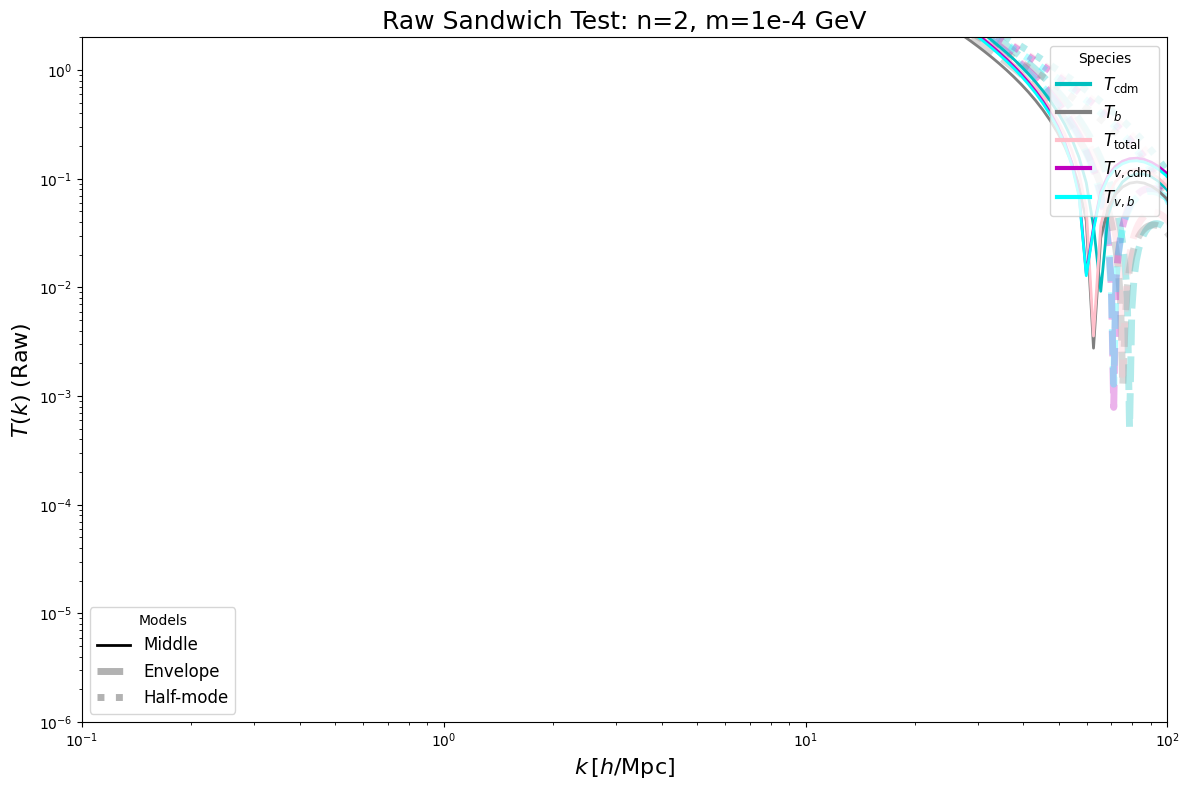


--- Plotting n=2, m=1e-2 ---
  Middle:   processed_Tk_n2_m1em02_s2.615em24_middle.dat
  Envelope: idm_1e-2GeV_envelope_Tk.dat
  Halfmode: idm_1e-2GeV_halfmode_Tk.dat
  Saved plot: tk_sandwich_raw_n2_1e-2_final.png


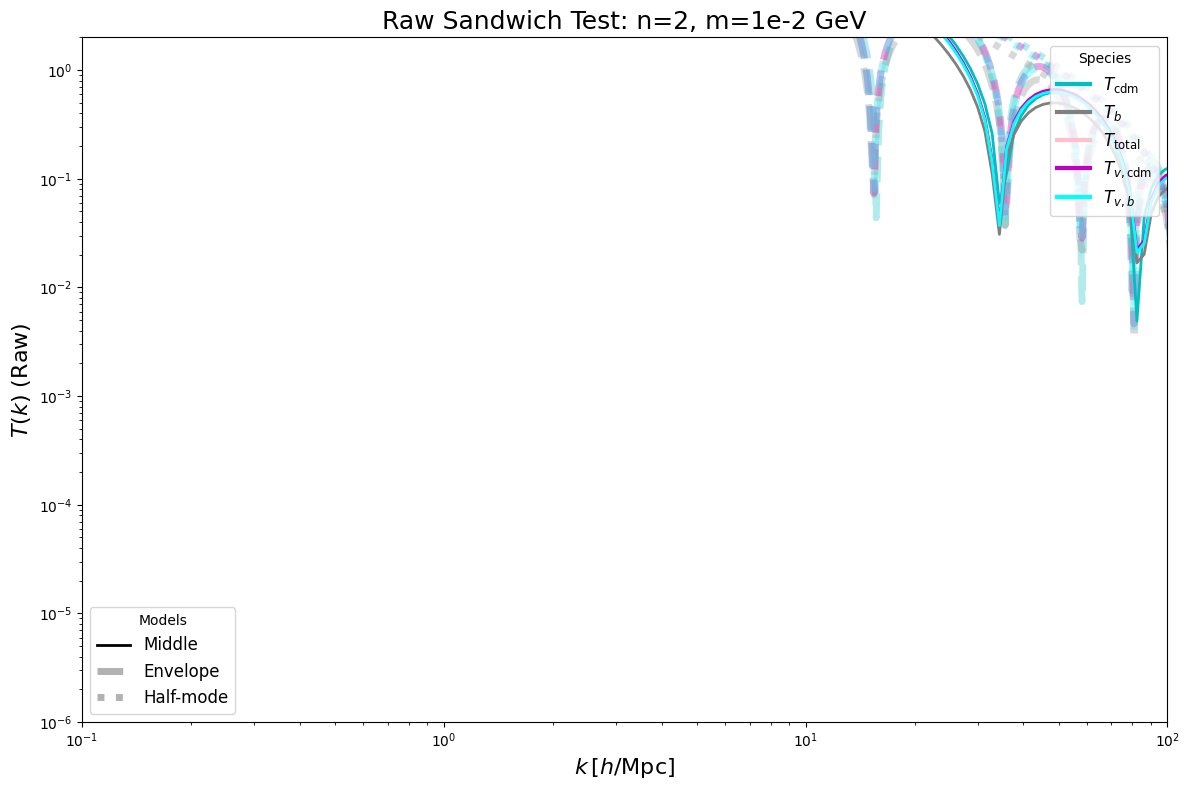


--- Plotting n=4, m=1 ---
  Middle:   processed_Tk_n4_m1ep00_s5.734em17_middle.dat
  Envelope: idm_1GeV_envelope_Tk.dat
  Halfmode: idm_1GeV_halfmode_Tk.dat
  Saved plot: tk_sandwich_raw_n4_1_final.png


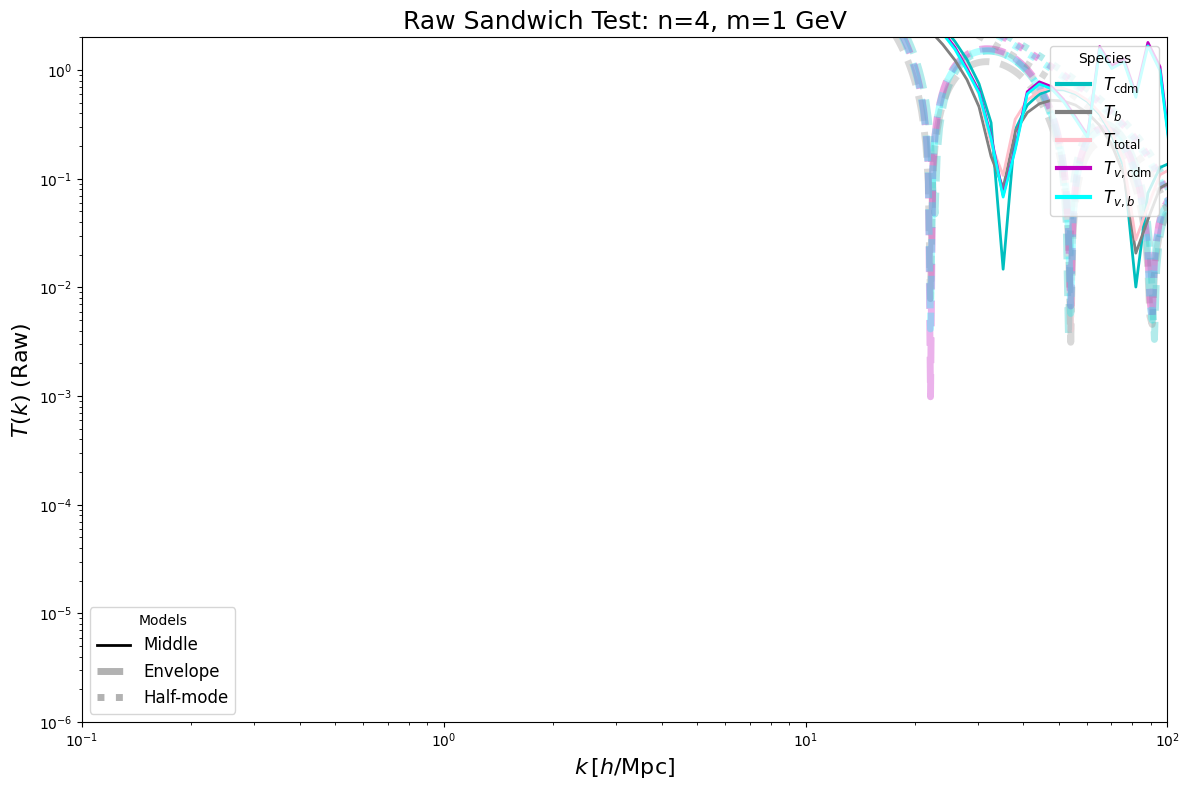

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your Processed Middle Files Directory
# Update this if your path is different
MY_TK_DIR = "/home/arifchu/class_public-master-new-dmeff/accurately_processed_Tk"

# 2. Reference Base Directory (Ethan's)
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# 3. The Models to Plot
# Added (4, "1", 1) for the n=4 1GeV case
TARGET_MODELS = [
    (2, "1e-4", 1e-4),
    (2, "1e-2", 1e-2),
    (4, "1", 1)
]

# 4. Plotting Config
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if path is None or not os.path.exists(path): return None
    try: return np.loadtxt(path)
    except: return None

def find_ref_file(n, mass_str, model_type):
    """Finds Envelope/Half-mode Tk file in Ethan's directories."""
    # Handle "1" vs "1GeV" folder naming
    if mass_str == "1":
        mass_folder = "1GeV"
    else:
        mass_folder = f"{mass_str}GeV"
    
    options = [
        f"idm_n{n}_{mass_folder}_{model_type}",  # e.g. idm_n4_1GeV_envelope
        f"idm_{mass_folder}_{model_type}",      # e.g. idm_1GeV_envelope
        f"idm_n{n}_{mass_folder}_{model_type}_16K"
    ]
    
    for name in options:
        dir_path = os.path.join(REF_BASE_DIR, name)
        if os.path.exists(dir_path):
            f = glob.glob(os.path.join(dir_path, "*Tk.dat"))
            if f: return f[0]
            d = os.path.join(dir_path, "dump_transfer.txt")
            if os.path.exists(d): return d
    return None

# --- Main Execution ---

for n, mass_str, mass_val in TARGET_MODELS:
    print(f"\n--- Plotting n={n}, m={mass_str} ---")
    
    # 1. Find Files
    m_code = f"{mass_val:.0e}".replace("+", "p").replace("-", "m")
    
    # Try standard pattern
    mid_pattern = os.path.join(MY_TK_DIR, f"processed_Tk_n{n}_m{m_code}_*_middle.dat")
    mid_files = glob.glob(mid_pattern)
    
    # Fallback for n=4 1GeV if it was named differently (e.g. FIXED.dat)
    if not mid_files:
        mid_pattern_alt = os.path.join(MY_TK_DIR, f"processed_Tk_n{n}_m{m_code}_*FIXED.dat")
        mid_files = glob.glob(mid_pattern_alt)

    # Fallback 2: Try searching without 'middle' tag if file is just processed_Tk...
    if not mid_files:
        mid_pattern_alt2 = os.path.join(MY_TK_DIR, f"processed_Tk_n{n}_m{m_code}_*.dat")
        mid_files = glob.glob(mid_pattern_alt2)

    if not mid_files:
        print(f"  [Skip] Middle file not found for {mid_pattern}")
        continue
    
    # Pick the first match
    file_mid = mid_files[0]
    
    file_env = find_ref_file(n, mass_str, "envelope")
    file_hm  = find_ref_file(n, mass_str, "halfmode")
    
    print(f"  Middle:   {os.path.basename(file_mid)}")
    print(f"  Envelope: {os.path.basename(file_env) if file_env else 'MISSING'}")
    print(f"  Halfmode: {os.path.basename(file_hm) if file_hm else 'MISSING'}")

    # 2. Load Data
    d_mid = load_data(file_mid)
    d_env = load_data(file_env)
    d_hm  = load_data(file_hm)
    
    # 3. Plot
    plt.figure(figsize=(12, 8))
    
    # Background: Envelope (Thick Dashed)
    if d_env is not None:
        k = d_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_env.shape[1]:
                plt.loglog(k, np.abs(d_env[:, col]), color=color, ls='--', lw=5, alpha=0.3)

    # Background: Halfmode (Thick Dotted)
    if d_hm is not None:
        k = d_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_hm.shape[1]:
                plt.loglog(k, np.abs(d_hm[:, col]), color=color, ls=':', lw=5, alpha=0.3)

    # Foreground: Middle (Thin Solid)
    if d_mid is not None:
        k = d_mid[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < d_mid.shape[1]:
                plt.loglog(k, np.abs(d_mid[:, col]), color=color, ls='-', lw=2, alpha=1.0)

    # Styling
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k)$ (Raw)', fontsize=16)
    plt.title(f"Raw Sandwich Test: n={n}, m={mass_str} GeV", fontsize=18)
    
    # Legends
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', label='Middle'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.3, label='Envelope'),
        Line2D([0], [0], color='k', lw=5, ls=':', alpha=0.3, label='Half-mode')
    ]
    l1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(l1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    # NO GRID as requested
    plt.grid(False) 
    
    # Zoom In
    plt.xlim(0.1, 100)
    plt.ylim(1e-6, 2.0)
    plt.tight_layout()
    
    out_name = f"tk_sandwich_raw_n{n}_{mass_str}_final.png"
    plt.savefig(out_name, dpi=150)
    print(f"  Saved plot: {out_name}")
    plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Input Directory (Where your processed IDM files are)
MY_TK_DIR = "/home/arifchu/class_public-master-new-dmeff/accurately_processed_Tk"

# 2. Reference WDM File
WDM_FILE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/wdm_6.5/wdm_6.5KeV_Tk.dat"

# 3. CDM Baseline (For Normalization)
CDM_FILE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/cdm/test_transfer_z99.dat"

# 4. The 3 Models to Compare
# (Filename, Label)
MODELS_TO_TEST = [
    ("processed_Tk_n2_m1em04_s1.2em26_halfmode.dat", "n=2, m=1e-4, s=1.2e-26"),
    ("processed_Tk_n2_m1em02_s1.5em24_halfmode.dat", "n=2, m=1e-2, s=1.5e-24"),
    ("processed_Tk_n4_m1em04_s1.9em24_halfmode.dat", "n=4, m=1e-4, s=1.9e-24"),
]

# 5. Plotting Config
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def load_data(path):
    if not os.path.exists(path):
        print(f"  [Error] Missing: {path}")
        return None
    try:
        return np.loadtxt(path)
    except Exception as e:
        print(f"  [Error] Could not load {os.path.basename(path)}: {e}")
        return None

def normalize_data(target_data, cdm_data):
    if target_data is None or cdm_data is None: return None
    
    k_target = target_data[:, 0]
    k_cdm = cdm_data[:, 0]
    norm_data = np.zeros_like(target_data)
    norm_data[:, 0] = k_target
    
    for col_idx, _, _ in SPECIES_CONFIG:
        if col_idx < target_data.shape[1] and col_idx < cdm_data.shape[1]:
            # Interpolate CDM to Target k-grid
            f_interp = interp1d(k_cdm, cdm_data[:, col_idx], kind='linear', fill_value="extrapolate")
            cdm_interp = f_interp(k_target)
            
            with np.errstate(divide='ignore', invalid='ignore'):
                norm_data[:, col_idx] = target_data[:, col_idx] / cdm_interp
    return norm_data

# --- Main Execution ---

print("--- Comparisons: IDM Half-mode vs WDM 6.5 keV ---")

# 1. Load Baselines
print("Loading Reference Data...")
data_cdm = load_data(CDM_FILE)
data_wdm_raw = load_data(WDM_FILE)

if data_cdm is None or data_wdm_raw is None:
    print("Critical Error: Missing CDM or WDM reference files.")
    exit()

# 2. Normalize WDM
print("Normalizing WDM 6.5 keV...")
norm_wdm = normalize_data(data_wdm_raw, data_cdm)

# 3. Process Each IDM Model
for filename, label in MODELS_TO_TEST:
    file_path = os.path.join(MY_TK_DIR, filename)
    print(f"\nProcessing: {label}")
    
    raw_idm = load_data(file_path)
    if raw_idm is None: continue
    
    norm_idm = normalize_data(raw_idm, data_cdm)
    
    # 4. Plot
    plt.figure(figsize=(12, 8))
    
    # --- Background: WDM 6.5 keV (Thick Dashed) ---
    k_w = norm_wdm[:, 0]
    for col, _, color in SPECIES_CONFIG:
        if col < norm_wdm.shape[1]:
            plt.semilogx(k_w, norm_wdm[:, col], color=color, ls='--', lw=5, alpha=0.3)

    # --- Foreground: IDM Model (Thin Solid) ---
    k_i = norm_idm[:, 0]
    for col, _, color in SPECIES_CONFIG:
        if col < norm_idm.shape[1]:
            plt.semilogx(k_i, norm_idm[:, col], color=color, ls='-', lw=2, alpha=1.0)

    # Styling
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k) / T_{\mathrm{CDM}}(k)$', fontsize=16)
    plt.title(f"Comparison: {label} vs WDM 6.5 keV", fontsize=18)
    
    # Legends
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', alpha=1.0, label='IDM (Half-mode)'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.3, label='WDM 6.5 keV')
    ]
    leg1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(leg1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    plt.ylim(-0.1, 1.2)
    plt.tight_layout()
    
    # Generate Output Filename from input label
    # e.g., processed_Tk_n2_m1em04_s1.2em26_halfmode.dat -> comparison_n2_m1em04_s1.2em26.png
    safe_name = filename.replace("processed_Tk_", "comparison_").replace(".dat", ".png")
    plt.savefig(safe_name, dpi=150)
    print(f"  Saved plot: {safe_name}")
    plt.close()

print("\nDone.")

--- Comparisons: IDM Half-mode vs WDM 6.5 keV ---
Loading Reference Data...
Normalizing WDM 6.5 keV...

Processing: n=2, m=1e-4, s=1.2e-26
  Saved plot: comparison_n2_m1em04_s1.2em26_halfmode.png

Processing: n=2, m=1e-2, s=1.5e-24
  Saved plot: comparison_n2_m1em02_s1.5em24_halfmode.png

Processing: n=4, m=1e-4, s=1.9e-24
  Saved plot: comparison_n4_m1em04_s1.9em24_halfmode.png

Done.


--- Starting Raw Sandwich Plot ---
Loading Middle...
Loading Envelope...
  Found: idm_1GeV_envelope_Tk.dat
Loading Half-mode...
  Found: idm_1GeV_halfmode_Tk.dat
Plot saved to: tk_raw_sandwich_n4_1GeV.png


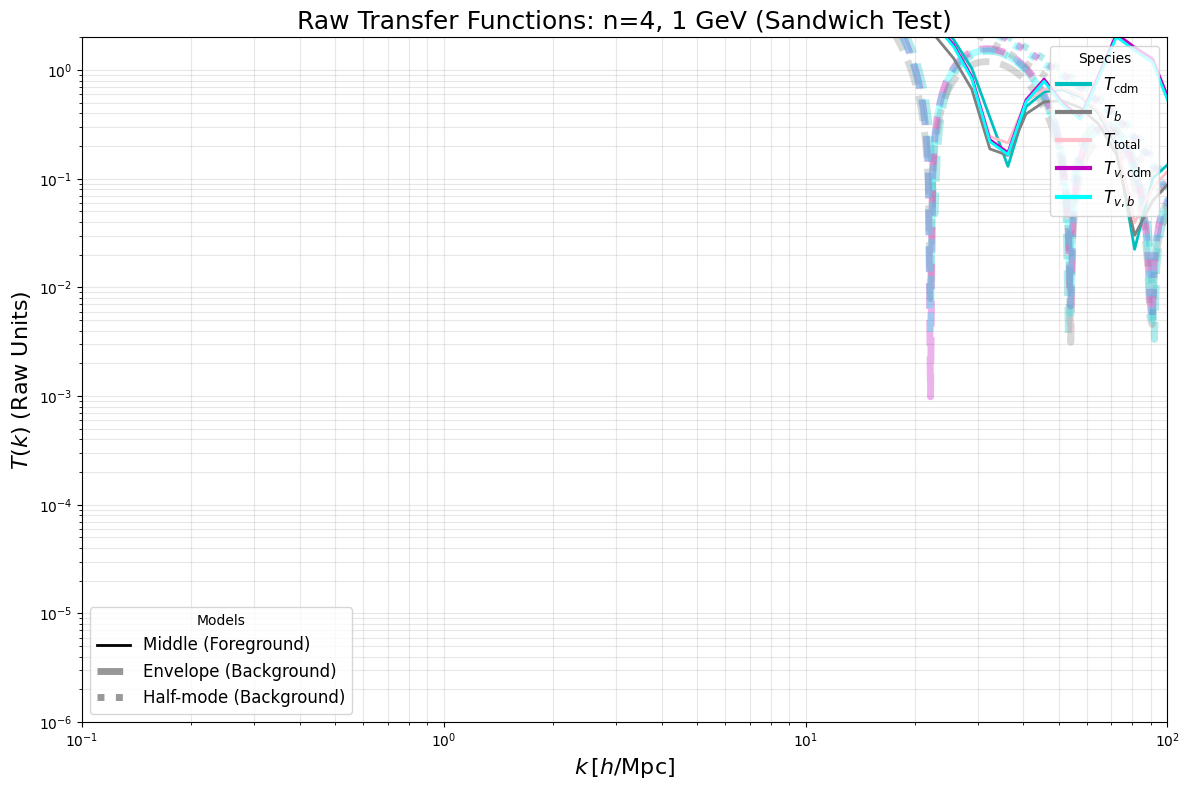

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your Middle File (The FIXED one you generated)
FILE_MIDDLE = "/home/arifchu/class_public-master-new-dmeff/processed_Tk_n4_m1ep00_s5.7344em17_FIXED.dat"

# 2. Reference Directories (Ethan's n=4 1GeV models)
REF_BASE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"
DIR_ENV = os.path.join(REF_BASE, "idm_1GeV_envelope")
DIR_HM  = os.path.join(REF_BASE, "idm_1GeV_halfmode")

# 3. Plotting Columns (Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def find_tk_file(directory):
    """Finds *Tk.dat or dump_transfer.txt in a directory."""
    if not os.path.exists(directory): return None
    # Priority 1: *Tk.dat
    files = glob.glob(os.path.join(directory, "*Tk.dat"))
    if files: return files[0]
    # Priority 2: dump_transfer.txt
    dump = os.path.join(directory, "dump_transfer.txt")
    if os.path.exists(dump): return dump
    return None

def load_data(path):
    if path is None or not os.path.exists(path): 
        print(f"  Missing: {path}")
        return None
    try:
        return np.loadtxt(path)
    except Exception as e:
        print(f"  Error loading {os.path.basename(path)}: {e}")
        return None

# --- Main Processing ---

print("--- Starting Raw Sandwich Plot ---")

# 1. Load Models
print("Loading Middle...")
data_mid = load_data(FILE_MIDDLE)

print("Loading Envelope...")
file_env = find_tk_file(DIR_ENV)
data_env = load_data(file_env)
if file_env: print(f"  Found: {os.path.basename(file_env)}")

print("Loading Half-mode...")
file_hm = find_tk_file(DIR_HM)
data_hm = load_data(file_hm)
if file_hm: print(f"  Found: {os.path.basename(file_hm)}")

# 2. Plotting
if data_mid is not None:
    plt.figure(figsize=(12, 8))
    
    # --- Layer 1: Background (Envelope & Half-mode) ---
    # Style: Thick, Semi-transparent
    if data_env is not None:
        k = data_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < data_env.shape[1]:
                # Using loglog for raw T(k)
                plt.loglog(k, np.abs(data_env[:, col]), color=color, ls='--', lw=5, alpha=0.3)
    
    if data_hm is not None:
        k = data_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < data_hm.shape[1]:
                plt.loglog(k, np.abs(data_hm[:, col]), color=color, ls=':', lw=5, alpha=0.3)

    # --- Layer 2: Foreground (Middle - FIXED) ---
    # Style: Thin, Opaque
    k = data_mid[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < data_mid.shape[1]:
            plt.loglog(k, np.abs(data_mid[:, col]), color=color, ls='-', lw=2, alpha=1.0)

    # --- Formatting ---
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k)$ (Raw Units)', fontsize=16)
    plt.title(f"Raw Transfer Functions: n=4, 1 GeV (Sandwich Test)", fontsize=18)
    
    # Model Legend
    model_lines = [
        Line2D([0], [0], color='k', lw=2, ls='-', alpha=1.0, label='Middle (Foreground)'),
        Line2D([0], [0], color='k', lw=5, ls='--', alpha=0.4, label='Envelope (Background)'),
        Line2D([0], [0], color='k', lw=5, ls=':', alpha=0.4, label='Half-mode (Background)')
    ]
    legend1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(legend1)
    
    # Species Legend
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    plt.grid(True, which='both', alpha=0.3)
    plt.xlim(0.1, 100)
    # T(k) drops from ~1 to very small numbers, setting bottom limit helps view log scale
    plt.ylim(1e-6, 2.0) 
    plt.tight_layout()
    
    output_file = "tk_raw_sandwich_n4_1GeV.png"
    plt.savefig(output_file, dpi=150)
    print(f"Plot saved to: {output_file}")
    plt.show()
else:
    print("Error: Could not process Middle model data.")

--- Starting Raw Sandwich Plot (Zoomed) ---
Loading Middle...
Loading Envelope...
Loading Half-mode...
Plot saved to: tk_raw_sandwich_n4_1GeV_zoomed.png


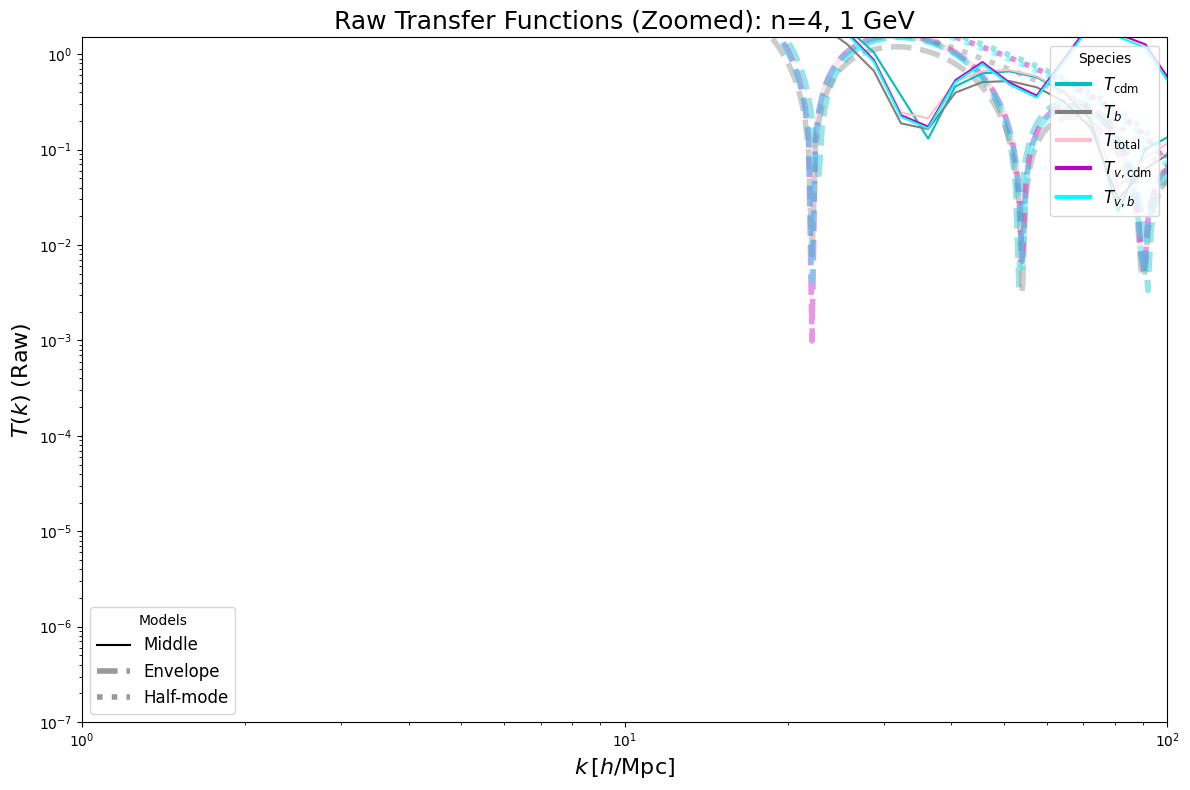

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.lines import Line2D

# --- Configuration ---

# 1. Your Middle File
FILE_MIDDLE = "/home/arifchu/class_public-master-new-dmeff/processed_Tk_n4_m1ep00_s5.7344em17_FIXED.dat"

# 2. Reference Directories (Ethan's n=4 1GeV models)
REF_BASE = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"
DIR_ENV = os.path.join(REF_BASE, "idm_1GeV_envelope")
DIR_HM  = os.path.join(REF_BASE, "idm_1GeV_halfmode")

# 3. Plotting Columns (Index, Label, Color)
SPECIES_CONFIG = [
    (1,  r'$T_{\mathrm{cdm}}$',    'c'),
    (2,  r'$T_b$',                 'gray'),
    (6,  r'$T_{\mathrm{total}}$',  'pink'),
    (10, r'$T_{v,\mathrm{cdm}}$',  'm'),
    (11, r'$T_{v,b}$',             'cyan') 
]

# --- Helper Functions ---

def find_tk_file(directory):
    if not os.path.exists(directory): return None
    files = glob.glob(os.path.join(directory, "*Tk.dat"))
    if files: return files[0]
    dump = os.path.join(directory, "dump_transfer.txt")
    if os.path.exists(dump): return dump
    return None

def load_data(path):
    if path is None or not os.path.exists(path): 
        print(f"  Missing: {path}")
        return None
    try:
        return np.loadtxt(path)
    except Exception as e:
        print(f"  Error loading {os.path.basename(path)}: {e}")
        return None

# --- Main Processing ---

print("--- Starting Raw Sandwich Plot (Zoomed) ---")

# 1. Load Models
print("Loading Middle...")
data_mid = load_data(FILE_MIDDLE)

print("Loading Envelope...")
file_env = find_tk_file(DIR_ENV)
data_env = load_data(file_env)

print("Loading Half-mode...")
file_hm = find_tk_file(DIR_HM)
data_hm = load_data(file_hm)

# 2. Plotting
if data_mid is not None:
    plt.figure(figsize=(12, 8))
    
    # --- Layer 1: Background (Envelope & Half-mode) ---
    # Style: Thick, Semi-transparent
    if data_env is not None:
        k = data_env[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < data_env.shape[1]:
                plt.loglog(k, np.abs(data_env[:, col]), color=color, ls='--', lw=4, alpha=0.4)
    
    if data_hm is not None:
        k = data_hm[:, 0]
        for col, label, color in SPECIES_CONFIG:
            if col < data_hm.shape[1]:
                plt.loglog(k, np.abs(data_hm[:, col]), color=color, ls=':', lw=4, alpha=0.4)

    # --- Layer 2: Foreground (Middle - FIXED) ---
    # Style: Thin, Opaque
    k = data_mid[:, 0]
    for col, label, color in SPECIES_CONFIG:
        if col < data_mid.shape[1]:
            plt.loglog(k, np.abs(data_mid[:, col]), color=color, ls='-', lw=1.5, alpha=1.0)

    # --- Formatting ---
    plt.xlabel(r'$k\,[h/\mathrm{Mpc}]$', fontsize=16)
    plt.ylabel(r'$T(k)$ (Raw)', fontsize=16)
    plt.title(f"Raw Transfer Functions (Zoomed): n=4, 1 GeV", fontsize=18)
    
    # Custom Legend
    model_lines = [
        Line2D([0], [0], color='k', lw=1.5, ls='-', alpha=1.0, label='Middle'),
        Line2D([0], [0], color='k', lw=4, ls='--', alpha=0.4, label='Envelope'),
        Line2D([0], [0], color='k', lw=4, ls=':', alpha=0.4, label='Half-mode')
    ]
    legend1 = plt.legend(handles=model_lines, title="Models", loc='lower left', fontsize=12)
    plt.gca().add_artist(legend1)
    
    species_lines = [Line2D([0], [0], color=c, lw=3, label=l) for _, l, c in SPECIES_CONFIG]
    plt.legend(handles=species_lines, title="Species", loc='upper right', fontsize=12)

    # Specific Requests: No Grid, Zoom in
    plt.grid(False) 
    
    # Zoom logic: Focus on the cutoff/oscillation region
    # Typically k=1 to k=100 is where the action is for these models
    plt.xlim(1, 100)
    
    # Auto-scale Y based on data in that range?
    # T(k) goes from ~1 down to 1e-6. 
    # Let's set a wide dynamic range but exclude the constant low-k plateau
    plt.ylim(1e-7, 1.5) 
    
    plt.tight_layout()
    
    output_file = "tk_raw_sandwich_n4_1GeV_zoomed.png"
    plt.savefig(output_file, dpi=150)
    print(f"Plot saved to: {output_file}")
    plt.show()
else:
    print("Error: Could not process Middle model data.")

Loading tree data...
  Analyzing z ~ 0.05...
  Analyzing z ~ 0.14...
  Analyzing z ~ 0.60...
  Analyzing z ~ 0.84...
  Analyzing z ~ 1.20...
Evolution plot saved to shmf_evolution_n2_1e-2GeV_middle_redder.png


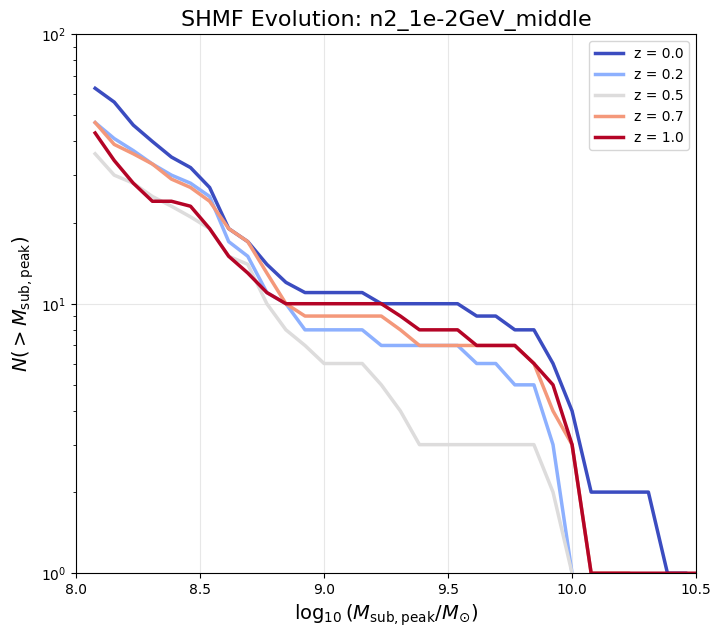

In [1]:
# Have to overplot the half-mode and envelope SHMFs

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tqdm import tqdm

# --- Configuration ---
MODEL_DIR = "n2_1e-2GeV_middle"
# Model envelope
MODEL_DIR_envelope = 
# Model halfmode
MODEL_DIR_halfmode = 

TREE_PATH_middle = "/central/groups/carnegie_poc/achu/n2_1e-2GeV_middle/output_n2_1e-2GeV_middle/rockstar/trees/tree_0_0_0.dat"
OUTPUT_PLOT = f"shmf_evolution_{MODEL_DIR}_redder.png"

# Constants
HOST_MASS_MW = 1.2e12
MASS_CUT = 1.2e8 # Physical Msun
h = 0.7
Z_TARGETS = [0.0, 0.2, 0.5, 0.7, 1.0]

def load_data_robust(path):
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None
    
    print("Loading tree data...")
    with open(path, 'r') as f:
        # Scan for header
        header = [l for l in f if l.startswith('#') and 'Mvir' in l][0]
    cols = header.replace('#','').strip().split()
    
    # Use regex separator for robust whitespace handling
    df = pd.read_csv(path, sep=r'\s+', names=cols, comment='#', low_memory=False)
    df.columns = [re.sub(r'\(\d+\)', '', c).strip().lower() for c in df.columns]
    
    # Force numeric types to handle any malformed rows
    numeric_cols = ['scale', 'mvir', 'upid', 'id', 'depth_first_id', 'last_mainleaf_depthfirst_id']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove garbage rows (scale > 1.0 is impossible)
    df = df[(df['scale'] <= 1.001) & (df['scale'] > 0)].copy()
    return df

def get_shmf_at_z(df, target_z):
    target_scale = 1.0 / (1.0 + target_z)
    
    # 1. Select Snapshot
    tolerance = 0.05
    df_snap = df[np.abs(df['scale'] - target_scale) < tolerance].copy()
    
    if df_snap.empty:
        print(f"  No snapshot found near z={target_z}")
        return np.array([])
    
    # Pick the most populated scale in this range
    best_scale = df_snap['scale'].mode()[0]
    df_snap = df_snap[df_snap['scale'] == best_scale]
    
    print(f"  Analyzing z ~ {1/best_scale - 1:.2f}...")

    # 2. Find Host
    centrals = df_snap[df_snap['upid'] == -1]
    if centrals.empty:
        # Fallback: Max mass halo
        host = df_snap.loc[df_snap['mvir'].idxmax()]
    else:
        host = centrals.loc[centrals['mvir'].idxmax()]
    
    # 3. Find Subhalos
    subs = df_snap[df_snap['upid'] == host['id']].copy()
    if subs.empty: return np.array([])
    
    # 4. Calculate Mpeak
    mpeaks = []
    # Optimization: Filter full tree to everything 'before' or 'at' this time
    df_past = df[df['scale'] <= best_scale]
    
    for _, sub in subs.iterrows():
        dfid = sub['depth_first_id']
        last = sub['last_mainleaf_depthfirst_id']
        
        # Check progenitors
        progs = df_past[(df_past['depth_first_id'] >= dfid) & (df_past['depth_first_id'] <= last)]
        
        if not progs.empty:
            mpeaks.append(progs['mvir'].max())
        else:
            mpeaks.append(sub['mvir'])
            
    mpeaks = np.array(mpeaks)
    
    # 5. Physical Cut
    mpeaks_phys = mpeaks / h
    keep = mpeaks_phys > MASS_CUT
    
    return np.log10(mpeaks_phys[keep])

# --- Main ---
if __name__ == "__main__":
    df = load_data_robust(TREE_PATH)
    
    if df is not None:
        plt.figure(figsize=(8, 7))
        
        # COLOR LOGIC: CoolWarm colormap
        # 0.0 (Start) = Cool/Blue -> z=0
        # 1.0 (End)   = Warm/Red  -> z=5
        colors = plt.cm.coolwarm(np.linspace(0, 1, len(Z_TARGETS)))
        
        bins = np.linspace(8, 11, 40)
        
        for i, z in enumerate(Z_TARGETS):
            log_m = get_shmf_at_z(df, z)
            
            if len(log_m) > 0:
                counts, edges = np.histogram(log_m, bins=bins)
                cum_counts = len(log_m) - np.cumsum(counts)
                
                # Plot with the calculated color
                plt.plot(edges[1:], cum_counts, lw=2.5, color=colors[i], label=f"z = {z}")

        plt.yscale('log')
        plt.xlabel(r'$\log_{10}(M_{\mathrm{sub,peak}} / M_{\odot})$', fontsize=14)
        plt.ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=14)
        plt.title(f'SHMF Evolution: {MODEL_DIR}', fontsize=16)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(8, 10.5)
        plt.ylim(1, 100)
        
        plt.savefig(OUTPUT_PLOT, dpi=150)
        print(f"Evolution plot saved to {OUTPUT_PLOT}")

Loading tree: /central/groups/carnegie_poc/achu/n2_1e-2GeV_middle/output_n2_1e-2GeV_middle/rockstar/trees/tree_0_0_0.dat...
  Valid rows loaded: 1694323
  Latest valid scale factor: 1.0000
  Selected Host: ID 2598496.0, Mvir 7.01e+11
MAH plot saved to mah_check_n2_1e-2GeV_middle.png


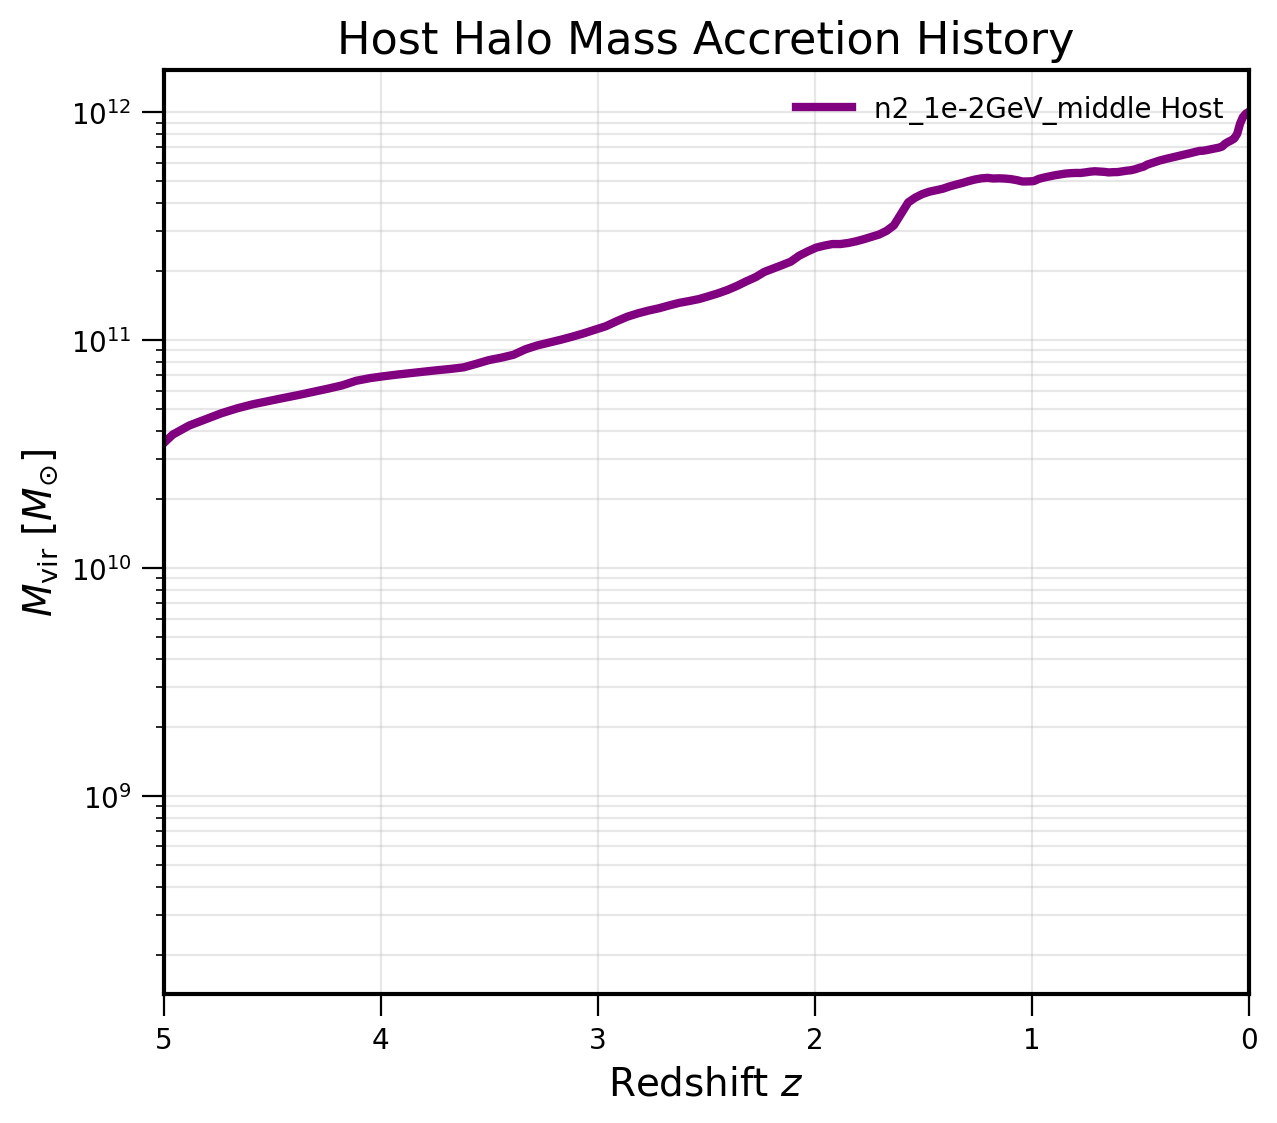

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

# --- Configuration ---
MODEL_DIR = "n2_1e-2GeV_middle"
TREE_PATH = "/central/groups/carnegie_poc/achu/n2_1e-2GeV_middle/output_n2_1e-2GeV_middle/rockstar/trees/tree_0_0_0.dat"
OUTPUT_PLOT = f"mah_check_{MODEL_DIR}.png"

# Constants
HOST_MASS_Target = 1.2e12
h = 0.7

def load_tree_header(path):
    # Scan the file for the header line starting with # and containing 'Mvir'
    with open(path, 'r') as f:
        for line in f:
            if line.startswith("#") and "Mvir" in line:
                return line.replace("#", "").strip().split()
    raise ValueError("Header not found")

def get_mah():
    if not os.path.exists(TREE_PATH):
        print(f"Tree file not found: {TREE_PATH}")
        return None, None

    print(f"Loading tree: {TREE_PATH}...")
    cols = load_tree_header(TREE_PATH)
    
    # Load data using regex delimiter for whitespace
    df = pd.read_csv(TREE_PATH, sep=r'\s+', comment='#', names=cols, low_memory=False)
    
    # 1. CLEANING: Fix column names and data types
    df.columns = [re.sub(r'\(\d+\)', '', c).strip().lower() for c in df.columns]
    
    # Force 'scale' and 'mvir' to numeric, setting errors to NaN
    df['scale'] = pd.to_numeric(df['scale'], errors='coerce')
    df['mvir'] = pd.to_numeric(df['mvir'], errors='coerce')
    
    # DROP GARBAGE ROWS: Filter out unphysical scale factors or NaN masses
    # This fixes the "8809.0" error
    df = df[(df['scale'] <= 1.001) & (df['scale'] > 0) & (df['mvir'].notna())].copy()
    
    print(f"  Valid rows loaded: {len(df)}")

    # 2. Identify Host at z=0 (latest valid snapshot)
    max_scale = df['scale'].max()
    print(f"  Latest valid scale factor: {max_scale:.4f}")
    
    snapshot_now = df[np.abs(df['scale'] - max_scale) < 0.0001].copy()
    
    # Ensure upid is numeric
    if 'upid' in snapshot_now.columns:
        snapshot_now['upid'] = pd.to_numeric(snapshot_now['upid'], errors='coerce')
        centrals = snapshot_now[snapshot_now['upid'] == -1]
    else:
        centrals = pd.DataFrame()

    if centrals.empty:
        print("  Warning: No halo with upid == -1 found. Using most massive halo as host.")
        closest_idx = np.argmin(np.abs(snapshot_now['mvir'] - HOST_MASS_Target*h))
        host_z0 = snapshot_now.iloc[closest_idx]
    else:
        # Find central halo closest to target mass
        closest_idx = np.argmin(np.abs(centrals['mvir'] - HOST_MASS_Target*h))
        host_z0 = centrals.iloc[closest_idx]
    
    print(f"  Selected Host: ID {host_z0['id']}, Mvir {host_z0['mvir']:.2e}")

    # 3. Track Progenitors (using Depth First ID)
    df['depth_first_id'] = pd.to_numeric(df['depth_first_id'], errors='coerce')
    df['last_mainleaf_depthfirst_id'] = pd.to_numeric(df['last_mainleaf_depthfirst_id'], errors='coerce')
    
    host_dfid = host_z0['depth_first_id']
    host_last_dfid = host_z0['last_mainleaf_depthfirst_id']
    
    # Grab the whole branch
    tree_slice = df[
        (df['depth_first_id'] >= host_dfid) & 
        (df['depth_first_id'] <= host_last_dfid)
    ].copy()
    
    # Extract the main progenitor history (max mass at each scale in this branch)
    mah = tree_slice.sort_values('mvir', ascending=False).groupby('scale').first().reset_index()
    
    return mah['scale'], mah['mvir']

# --- Main ---
if __name__ == "__main__":
    res = get_mah()
    
    if res is not None and res[0] is not None:
        scale, mvir = res
        z = (1.0 / scale) - 1.0
        
        plt.figure(figsize=(7, 6))
        plt.plot(z, mvir/h, linewidth=3, color='purple', label=f'{MODEL_DIR} Host')
        
        plt.yscale('log')
        plt.xlabel('Redshift $z$', fontsize=14)
        plt.ylabel(r'$M_{\mathrm{vir}}$ [$M_{\odot}$]', fontsize=14)
        plt.title('Host Halo Mass Accretion History', fontsize=16)
        plt.xlim(0, 5) 
        plt.grid(True, which="both", alpha=0.3)
        plt.legend()
        plt.gca().invert_xaxis() 
        
        plt.savefig(OUTPUT_PLOT, dpi=150)
        print(f"MAH plot saved to {OUTPUT_PLOT}")
    else:
        print("Failed to generate MAH data.")

[Envelope] File not found: /central/groups/carnegie_poc/achu/idm_n2_1e-2GeV_envelope/output_idm_n2_1e-2GeV_envelope/rockstar/trees/tree_0_0_0.dat
[Middle] Loading tree...
  Host ID 2598496.0: 7.01e+11 Msun/h
[Half-mode] File not found: /central/groups/carnegie_poc/achu/idm_n2_1e-2GeV_halfmode/output_idm_n2_1e-2GeV_halfmode/rockstar/trees/tree_0_0_0.dat
Plot saved to mah_comparison_sandwich_test.png


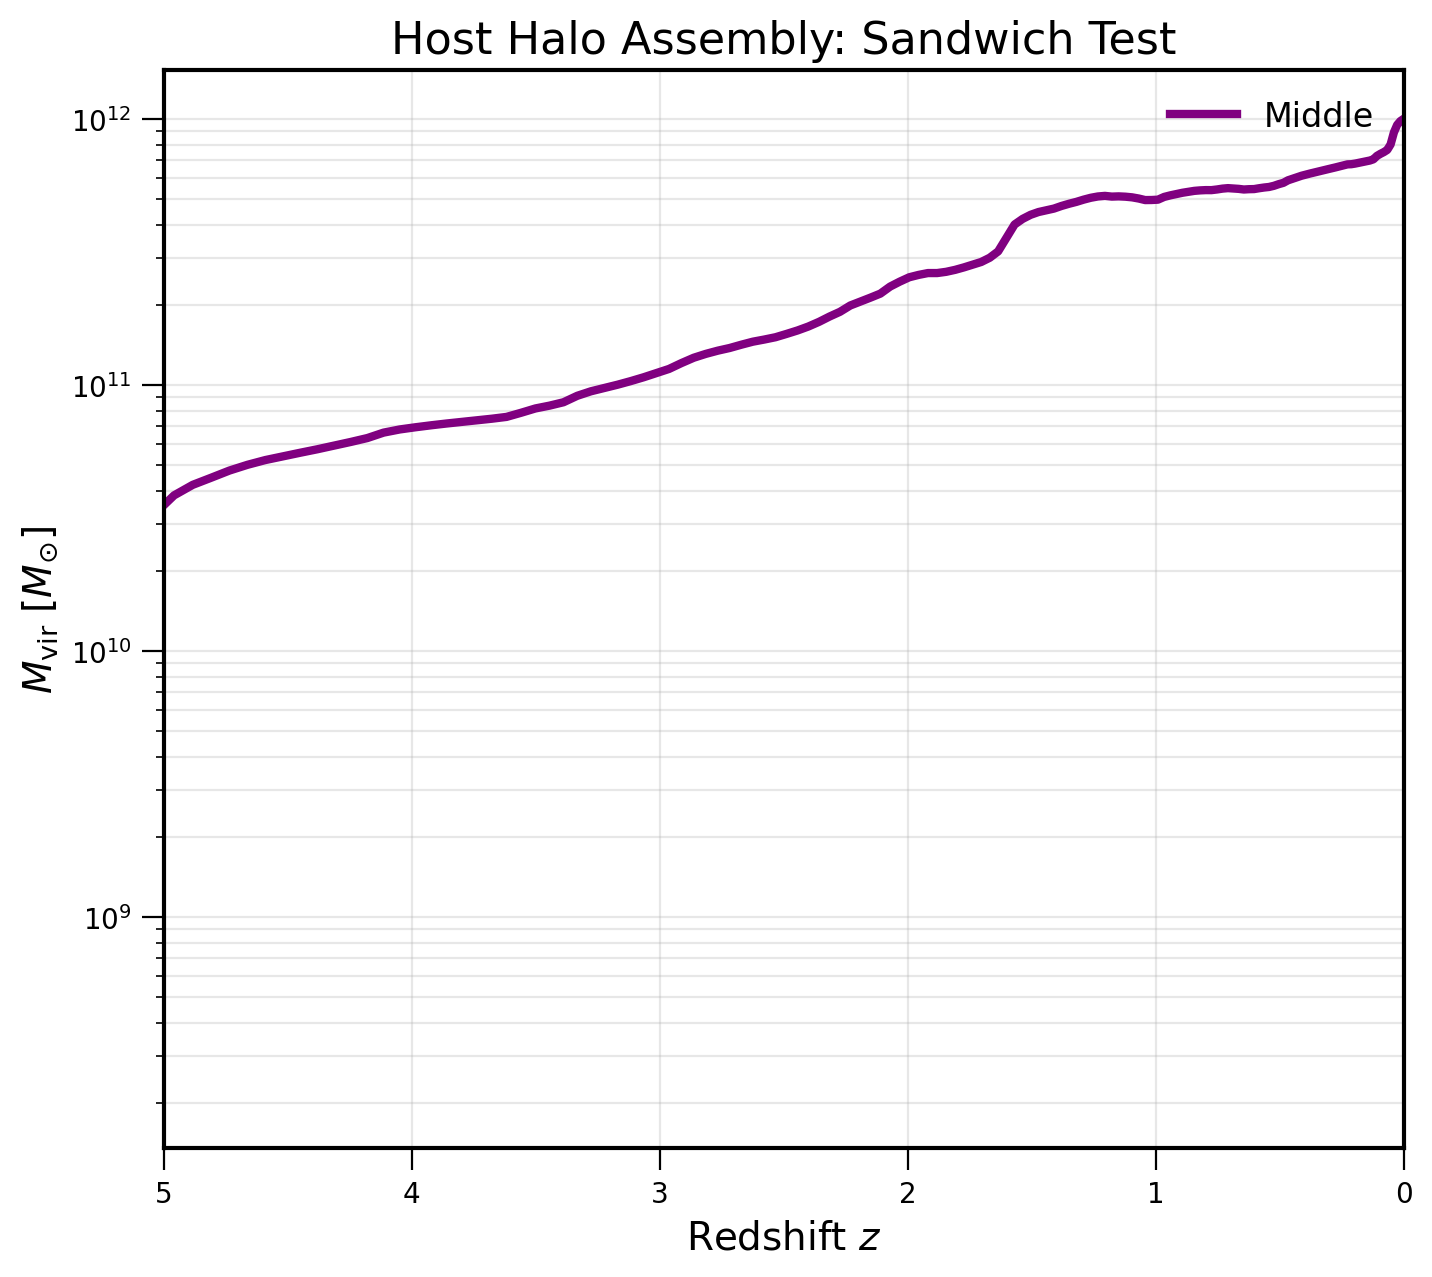

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

# --- Configuration ---
BASE_DIR = "/central/groups/carnegie_poc/achu"

# Define the three models to compare
# Dictionary format: Label -> Path to tree_0_0_0.dat
MODELS = {
    "Envelope": os.path.join(BASE_DIR, "idm_n2_1e-2GeV_envelope", "output_idm_n2_1e-2GeV_envelope", "rockstar/trees/tree_0_0_0.dat"),
    "Middle":   os.path.join(BASE_DIR, "n2_1e-2GeV_middle",       "output_n2_1e-2GeV_middle",       "rockstar/trees/tree_0_0_0.dat"),
    "Half-mode":os.path.join(BASE_DIR, "idm_n2_1e-2GeV_halfmode", "output_idm_n2_1e-2GeV_halfmode", "rockstar/trees/tree_0_0_0.dat"),
}

OUTPUT_PLOT = "mah_comparison_sandwich_test.png"

# Constants
HOST_MASS_TARGET = 1.2e12
h = 0.7

def load_mah(path, label):
    if not os.path.exists(path):
        print(f"[{label}] File not found: {path}")
        return None, None
    
    print(f"[{label}] Loading tree...")
    # Get Header
    with open(path, 'r') as f:
        for line in f:
            if line.startswith("#") and "Mvir" in line:
                cols = line.replace("#", "").strip().split()
                break
    
    # Load Data
    df = pd.read_csv(path, sep=r'\s+', comment='#', names=cols, low_memory=False)
    df.columns = [re.sub(r'\(\d+\)', '', c).strip().lower() for c in df.columns]
    
    # Clean
    for c in ['scale', 'mvir', 'upid', 'depth_first_id', 'last_mainleaf_depthfirst_id']:
        if c in df.columns: df[c] = pd.to_numeric(df[c], errors='coerce')
    
    df = df[(df['scale'] <= 1.001) & (df['scale'] > 0)].copy()

    # Find Host at z=0
    max_scale = df['scale'].max()
    snap_now = df[np.abs(df['scale'] - max_scale) < 0.0001].copy()
    
    # Try finding central, fallback to max mass
    centrals = snap_now[snap_now['upid'] == -1]
    if centrals.empty:
        host = snap_now.loc[snap_now['mvir'].idxmax()]
    else:
        # Closest to target mass
        idx = np.argmin(np.abs(centrals['mvir'] - HOST_MASS_TARGET*h))
        host = centrals.iloc[idx]
        
    print(f"  Host ID {host['id']}: {host['mvir']:.2e} Msun/h")
    
    # Track Progenitors
    dfid, last_dfid = host['depth_first_id'], host['last_mainleaf_depthfirst_id']
    branch = df[(df['depth_first_id'] >= dfid) & (df['depth_first_id'] <= last_dfid)].copy()
    
    # Main progenitor history
    mah = branch.sort_values('mvir', ascending=False).groupby('scale').first().reset_index()
    return mah['scale'], mah['mvir']

# --- Main ---
if __name__ == "__main__":
    plt.figure(figsize=(8, 7))
    
    colors = {"Envelope": "crimson", "Middle": "purple", "Half-mode": "navy"}
    styles = {"Envelope": "--", "Middle": "-", "Half-mode": "--"}
    alphas = {"Envelope": 0.7, "Middle": 1.0, "Half-mode": 0.7}
    
    for label, path in MODELS.items():
        scale, mvir = load_mah(path, label)
        if scale is not None:
            z = (1.0 / scale) - 1.0
            plt.plot(z, mvir/h, label=label, color=colors[label], ls=styles[label], lw=3, alpha=alphas[label])
            
    plt.yscale('log')
    plt.xlabel('Redshift $z$', fontsize=14)
    plt.ylabel(r'$M_{\mathrm{vir}}$ [$M_{\odot}$]', fontsize=14)
    plt.title('Host Halo Assembly: Sandwich Test', fontsize=16)
    plt.xlim(0, 5)
    plt.gca().invert_xaxis()
    plt.legend(fontsize=12)
    plt.grid(True, which='both', alpha=0.3)
    
    plt.savefig(OUTPUT_PLOT, dpi=150)
    print(f"Plot saved to {OUTPUT_PLOT}")

[Envelope] Loading tree...
  Host ID 2138399.0: 7.26e+11 Msun/h
[Middle] Loading tree...
  Host ID 2598496.0: 7.01e+11 Msun/h
[Half-mode] Loading tree...
  Host ID 4295283.0: 7.23e+11 Msun/h
Plot saved to mah_comparison_micro_zoom.png


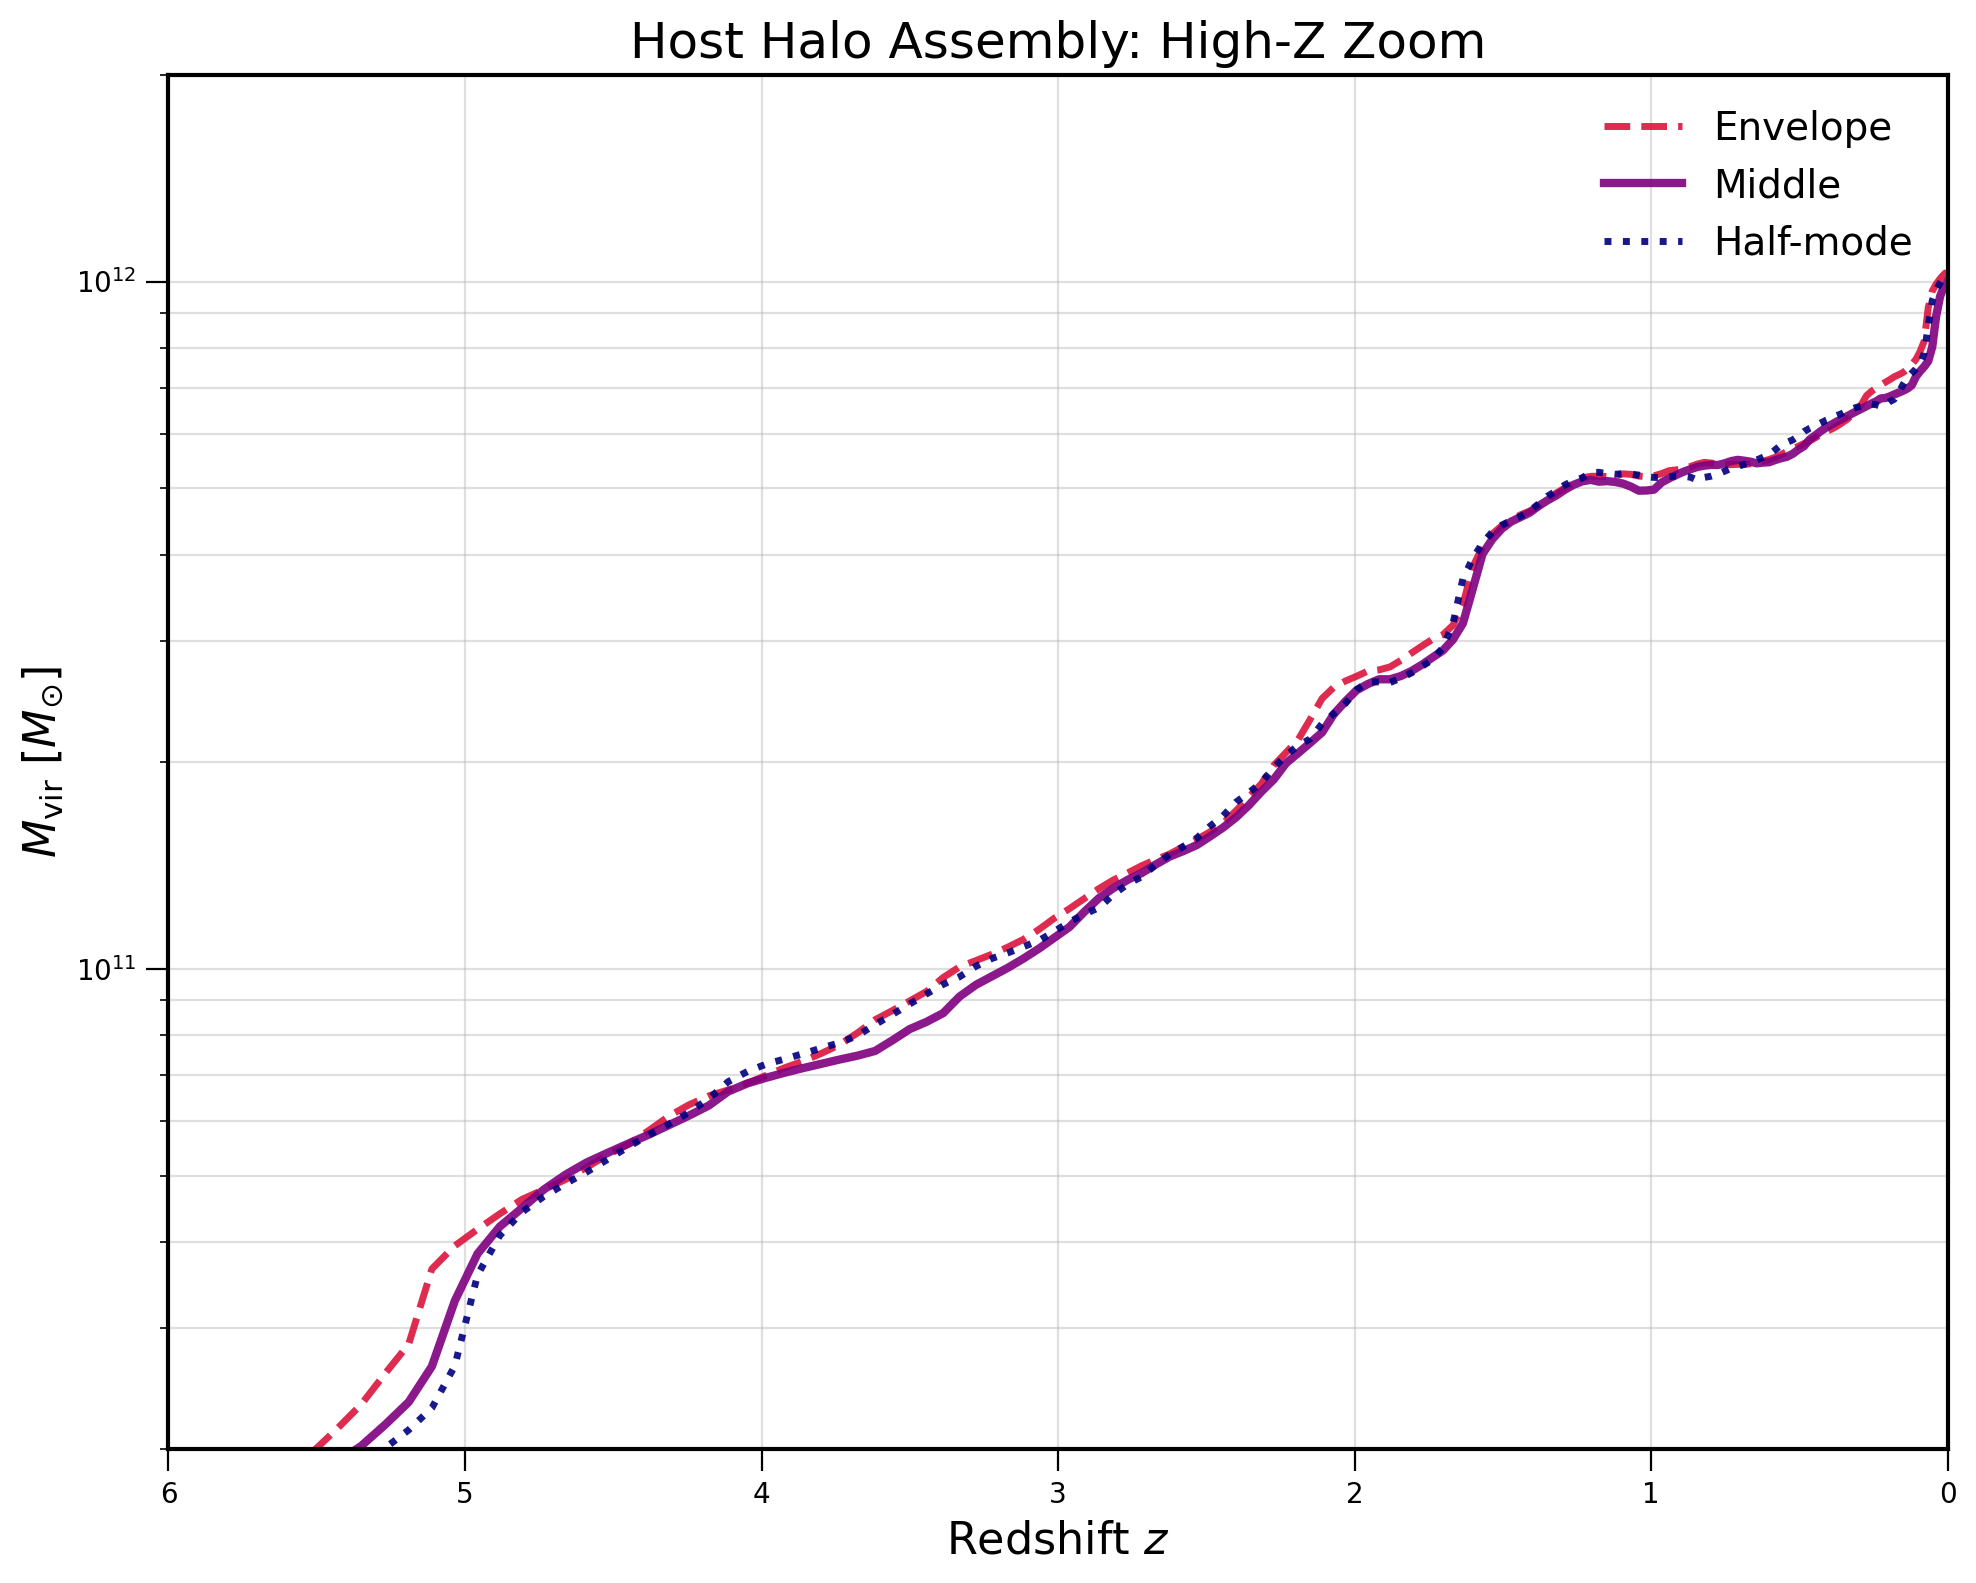

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

# --- Configuration ---
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"
MY_BASE_DIR = "/central/groups/carnegie_poc/achu"

MODELS = {
    "Envelope": os.path.join(REF_BASE_DIR, "idm_n2_1e-2GeV_envelope", "output_idm_n2_1e-2GeV_envelope", "rockstar/trees/tree_0_0_0.dat"),
    "Middle":   os.path.join(MY_BASE_DIR,  "n2_1e-2GeV_middle",       "output_n2_1e-2GeV_middle",       "rockstar/trees/tree_0_0_0.dat"),
    "Half-mode":os.path.join(REF_BASE_DIR, "idm_n2_1e-2GeV_halfmode", "output_idm_n2_1e-2GeV_halfmode", "rockstar/trees/tree_0_0_0.dat"),
}

OUTPUT_PLOT = "mah_comparison_micro_zoom.png"

# Constants
HOST_MASS_TARGET = 1.2e12
h = 0.7

def load_mah(path, label):
    if not os.path.exists(path):
        print(f"[{label}] File not found: {path}")
        return None, None
    
    print(f"[{label}] Loading tree...")
    with open(path, 'r') as f:
        for line in f:
            if line.startswith("#") and "Mvir" in line:
                cols = line.replace("#", "").strip().split()
                break
    
    df = pd.read_csv(path, sep=r'\s+', comment='#', names=cols, low_memory=False)
    
    # Cleaning
    df.columns = [re.sub(r'\(\d+\)', '', c).strip().lower() for c in df.columns]
    for c in ['scale', 'mvir', 'upid', 'depth_first_id', 'last_mainleaf_depthfirst_id']:
        if c in df.columns: df[c] = pd.to_numeric(df[c], errors='coerce')
    
    # Filter valid rows
    df = df[(df['scale'] <= 1.001) & (df['scale'] > 0)].copy()

    # Find Host at z=0
    max_scale = df['scale'].max()
    snap_now = df[np.abs(df['scale'] - max_scale) < 0.0001].copy()
    
    centrals = snap_now[snap_now['upid'] == -1]
    
    if centrals.empty:
        host = snap_now.loc[snap_now['mvir'].idxmax()]
    else:
        idx = np.argmin(np.abs(centrals['mvir'] - HOST_MASS_TARGET*h))
        host = centrals.iloc[idx]
        
    print(f"  Host ID {host['id']}: {host['mvir']:.2e} Msun/h")
    
    # Track Progenitors
    dfid, last_dfid = host['depth_first_id'], host['last_mainleaf_depthfirst_id']
    branch = df[(df['depth_first_id'] >= dfid) & (df['depth_first_id'] <= last_dfid)].copy()
    
    # Main progenitor history
    mah = branch.sort_values('mvir', ascending=False).groupby('scale').first().reset_index()
    return mah['scale'], mah['mvir']

# --- Main ---
if __name__ == "__main__":
    plt.figure(figsize=(10, 8))
    
    colors = {"Envelope": "crimson", "Middle": "purple", "Half-mode": "navy"}
    styles = {"Envelope": "--", "Middle": "-", "Half-mode": ":"}
    # Make lines thinner to see overlap
    widths = {"Envelope": 2.5, "Middle": 3.0, "Half-mode": 2.5} 
    
    for label, path in MODELS.items():
        scale, mvir = load_mah(path, label)
        if scale is not None:
            z = (1.0 / scale) - 1.0
            plt.plot(z, mvir/h, label=label, color=colors[label], ls=styles[label], lw=widths[label], alpha=0.9)
            
    plt.yscale('log')
    plt.xlabel('Redshift $z$', fontsize=16)
    plt.ylabel(r'$M_{\mathrm{vir}}$ [$M_{\odot}$]', fontsize=16)
    plt.title('Host Halo Assembly: High-Z Zoom', fontsize=18)
    
    # --- KEY CHANGE: Zoom in tight on the growth history ---
    plt.xlim(0, 6)
    # Focus Y-axis on the formation era (10^10 to 10^12)
    plt.ylim(2e10, 2e12)
    
    plt.gca().invert_xaxis()
    plt.legend(fontsize=14)
    plt.grid(True, which='both', alpha=0.4)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_PLOT, dpi=300)
    print(f"Plot saved to {OUTPUT_PLOT}")

[Envelope] Loading tree...
[Middle] Loading tree...
[Half-mode] Loading tree...
Plot saved to shmf_comparison_sandwich_test.png


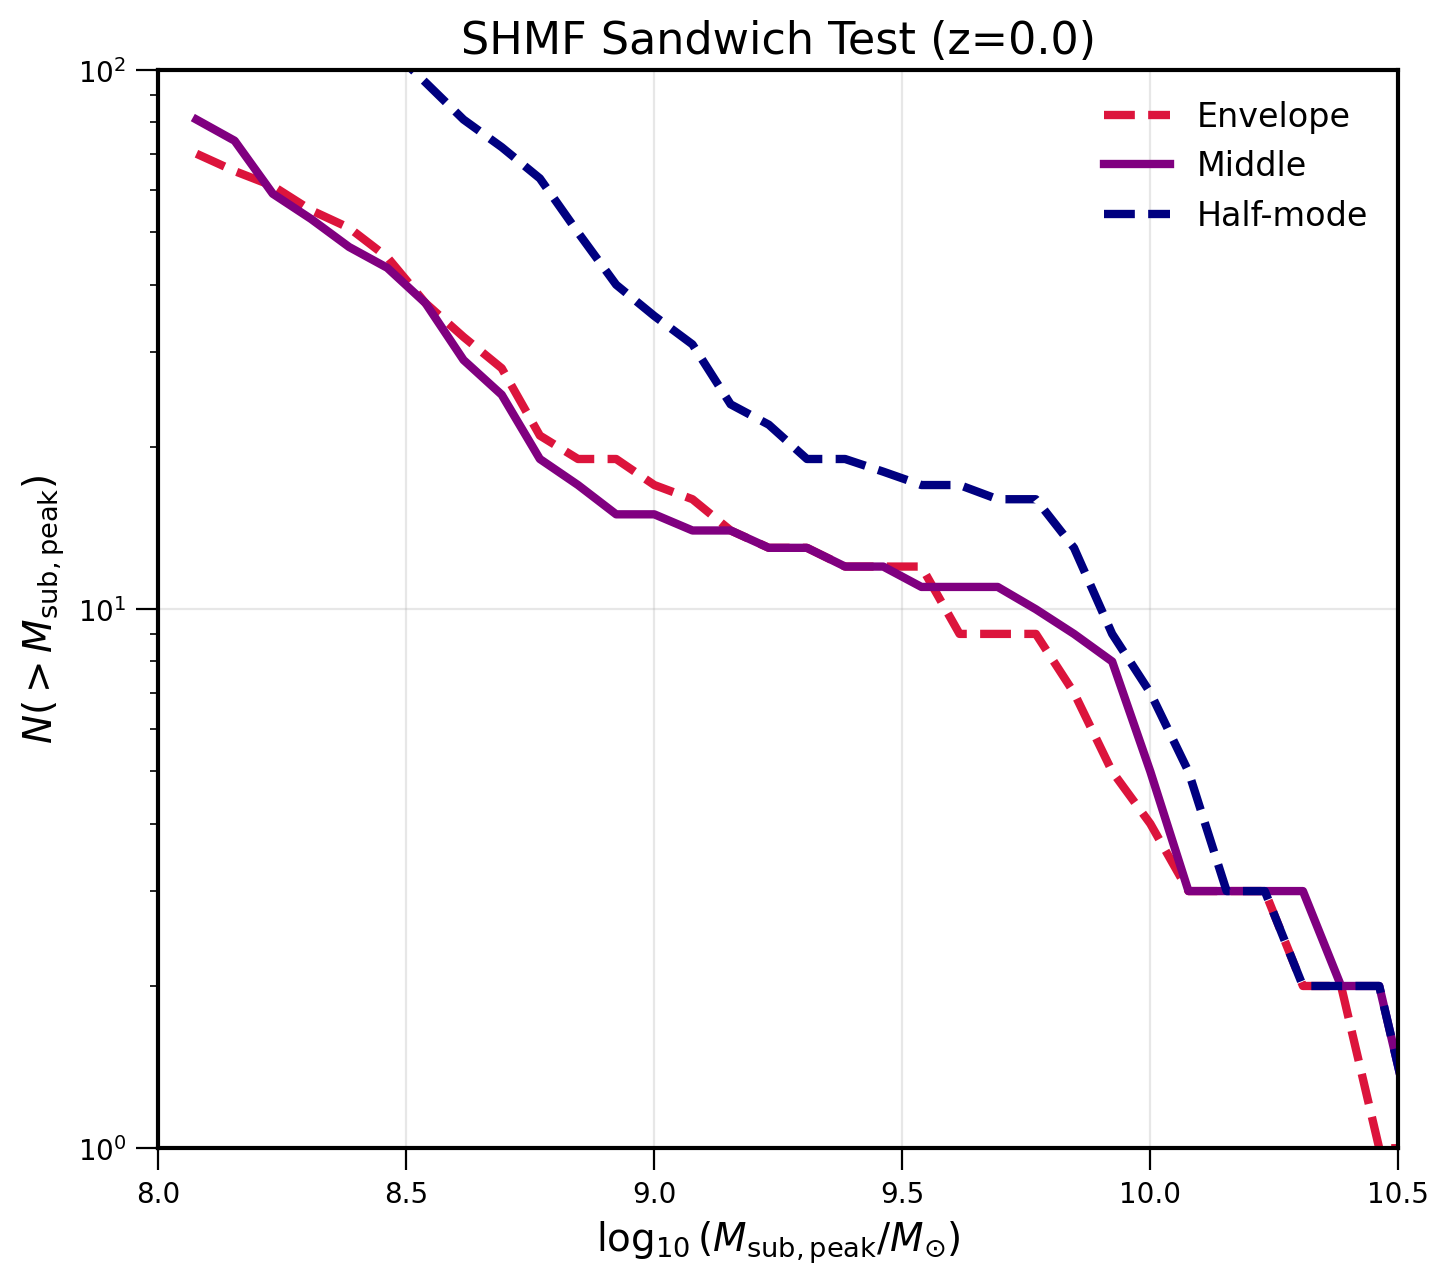

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

# --- Configuration ---
REF_BASE_DIR = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"
MY_BASE_DIR = "/central/groups/carnegie_poc/achu"

MODELS = {
    "Envelope": os.path.join(REF_BASE_DIR, "idm_n2_1e-2GeV_envelope", "output_idm_n2_1e-2GeV_envelope", "rockstar/trees/tree_0_0_0.dat"),
    "Middle":   os.path.join(MY_BASE_DIR,  "n2_1e-2GeV_middle",       "output_n2_1e-2GeV_middle",       "rockstar/trees/tree_0_0_0.dat"),
    "Half-mode":os.path.join(REF_BASE_DIR, "idm_n2_1e-2GeV_halfmode", "output_idm_n2_1e-2GeV_halfmode", "rockstar/trees/tree_0_0_0.dat"),
}

OUTPUT_PLOT = "shmf_comparison_sandwich_test.png"

# Constants
HOST_MASS_TARGET = 1.2e12
MASS_CUT = 1.2e8
h = 0.7
Z_TARGET = 0.0

def load_shmf(path, label):
    if not os.path.exists(path):
        print(f"[{label}] File not found: {path}")
        return np.array([])
    
    print(f"[{label}] Loading tree...")
    with open(path, 'r') as f:
        # Find header
        for line in f:
            if line.startswith("#") and "Mvir" in line:
                cols = line.replace("#", "").strip().split()
                break
    
    df = pd.read_csv(path, sep=r'\s+', comment='#', names=cols, low_memory=False)
    
    # Cleaning
    df.columns = [re.sub(r'\(\d+\)', '', c).strip().lower() for c in df.columns]
    for c in ['scale', 'mvir', 'upid', 'depth_first_id', 'last_mainleaf_depthfirst_id']:
        if c in df.columns: df[c] = pd.to_numeric(df[c], errors='coerce')
    
    df = df[(df['scale'] <= 1.001) & (df['scale'] > 0)]

    # 1. Select z=0 Snapshot
    target_scale = 1.0 / (1.0 + Z_TARGET)
    snap = df[np.abs(df['scale'] - target_scale) < 0.001].copy()
    
    if snap.empty:
        # Fallback if exact z=0 missing, take max scale
        best_scale = df['scale'].max()
        snap = df[df['scale'] == best_scale].copy()
    else:
        # Refine to specific snapshot time
        best_scale = snap['scale'].max()
        snap = snap[snap['scale'] == best_scale]

    # 2. Find Host
    centrals = snap[snap['upid'] == -1]
    if centrals.empty:
        host = snap.loc[snap['mvir'].idxmax()]
    else:
        idx = np.argmin(np.abs(centrals['mvir'] - HOST_MASS_TARGET*h))
        host = centrals.iloc[idx]
        
    # 3. Find Subhalos
    subs = snap[snap['upid'] == host['id']].copy()
    if subs.empty: return np.array([])
    
    # 4. Calculate Mpeak
    mpeaks = []
    # Pre-filter history
    df_past = df[df['scale'] <= best_scale]
    
    # Simple loop logic
    for _, sub in subs.iterrows():
        dfid, last = sub['depth_first_id'], sub['last_mainleaf_depthfirst_id']
        progs = df_past[(df_past['depth_first_id'] >= dfid) & (df_past['depth_first_id'] <= last)]
        
        if not progs.empty:
            mpeaks.append(progs['mvir'].max())
        else:
            mpeaks.append(sub['mvir'])
            
    # 5. Physical Cut
    mpeaks_phys = np.array(mpeaks) / h
    return np.log10(mpeaks_phys[mpeaks_phys > MASS_CUT])

# --- Main ---
if __name__ == "__main__":
    plt.figure(figsize=(8, 7))
    bins = np.linspace(8, 11, 40)
    
    colors = {"Envelope": "crimson", "Middle": "purple", "Half-mode": "navy"}
    styles = {"Envelope": "--", "Middle": "-", "Half-mode": "--"}
    
    for label, path in MODELS.items():
        log_m = load_shmf(path, label)
        if len(log_m) > 0:
            counts, edges = np.histogram(log_m, bins=bins)
            cum = len(log_m) - np.cumsum(counts)
            plt.plot(edges[1:], cum, label=label, color=colors[label], ls=styles[label], lw=3)
        else:
            print(f"[{label}] No subhalos found!")
            
    plt.yscale('log')
    plt.xlabel(r'$\log_{10}(M_{\mathrm{sub,peak}} / M_{\odot})$', fontsize=14)
    plt.ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=14)
    plt.title(f'SHMF Sandwich Test (z={Z_TARGET})', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xlim(8, 10.5)
    plt.ylim(1, 100)
    
    plt.savefig(OUTPUT_PLOT, dpi=150)
    print(f"Plot saved to {OUTPUT_PLOT}")

In [18]:
import os

tree_path = "/central/groups/carnegie_poc/achu/n2_1e-2GeV_middle/output_n2_1e-2GeV_middle/rockstar/trees/tree_0_0_0.dat"

if os.path.exists(tree_path):
    print(f"--- First 15 lines of {os.path.basename(tree_path)} ---")
    with open(tree_path, 'r') as f:
        for i in range(15):
            print(repr(f.readline()))
else:
    print("File not found.")

--- First 15 lines of tree_0_0_0.dat ---
'#scale(0) id(1) desc_scale(2) desc_id(3) num_prog(4) pid(5) upid(6) desc_pid(7) phantom(8) sam_Mvir(9) Mvir(10) Rvir(11) rs(12) vrms(13) mmp?(14) scale_of_last_MM(15) vmax(16) x(17) y(18) z(19) vx(20) vy(21) vz(22) Jx(23) Jy(24) Jz(25) Spin(26) Breadth_first_ID(27) Depth_first_ID(28) Tree_root_ID(29) Orig_halo_ID(30) Snap_idx(31) Next_coprogenitor_depthfirst_ID(32) Last_progenitor_depthfirst_ID(33) Last_mainleaf_depthfirst_ID(34) Tidal_Force(35) Tidal_ID(36) Rs_Klypin Mvir_all M200b M200c M500c M2500c Xoff Voff Spin_Bullock b_to_a c_to_a A[x] A[y] A[z] b_to_a(500c) c_to_a(500c) A[x](500c) A[y](500c) A[z](500c) T/|U| M_pe_Behroozi M_pe_Diemer Halfmass_Radius RVmax\n'
'#Omega_M = 0.286000; Omega_L = 0.714000; h0 = 0.700000\n'
'#Full box size = 125.000000 Mpc/h\n'
'#Scale: Scale factor of halo.\n'
'#ID: ID of halo (unique across entire simulation).\n'
'#Desc_Scale: Scale of descendant halo, if applicable.\n'
'#Descid: ID of descendant halo, if app

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tqdm import tqdm

# --- Configuration ---
MODEL_DIR = "n2_1e-2GeV_middle"
# UPDATED PATH:
TREE_PATH = "/central/groups/carnegie_poc/achu/n2_1e-2GeV_middle/output_n2_1e-2GeV_middle/rockstar/trees/tree_0_0_0.dat"
OUTPUT_PLOT = f"shmf_evolution_{MODEL_DIR}.png"

# Constants
HOST_MASS_MW = 1.2e12
MASS_CUT = 1.2e8 # Physical Msun
h = 0.7

# Redshifts to check
Z_TARGETS = [0.0, 1.0, 3.0, 5.0]

def load_data(path):
    if not os.path.exists(path): return None
    print("Loading tree data (this may take a moment)...")
    with open(path, 'r') as f:
        header = [l for l in f if l.startswith('#') and 'Mvir' in l][0]
    cols = header.replace('#','').strip().split()
    
    # Use sep=r'\s+' for newer pandas versions
    df = pd.read_csv(path, sep=r'\s+', names=cols, comment='#', low_memory=False)
    df.columns = [re.sub(r'\(\d+\)', '', c).strip().lower() for c in df.columns]
    return df

def get_shmf_at_z(df, target_z):
    target_scale = 1.0 / (1.0 + target_z)
    
    # 1. Select Snapshot
    tolerance = 0.05
    df_snap = df[np.abs(df['scale'] - target_scale) < tolerance].copy()
    
    if df_snap.empty:
        print(f"  No snapshot found near z={target_z}")
        return np.array([])
    
    best_scale = df_snap['scale'].mode()[0]
    df_snap = df_snap[df_snap['scale'] == best_scale]
    
    print(f"  Analyzing z ~ {1/best_scale - 1:.2f} (a={best_scale:.3f})...")

    # 2. Find Host in this snapshot
    centrals = df_snap[df_snap['upid'] == -1]
    if centrals.empty:
        print(f"    No central halos found at z={target_z}")
        return np.array([])
        
    host = centrals.loc[centrals['mvir'].idxmax()]
    
    # 3. Find Subhalos
    subs = df_snap[df_snap['upid'] == host['id']].copy()
    
    # 4. Calculate Mpeak
    mpeaks = []
    df_past = df[df['scale'] <= best_scale]
    
    # Vectorized/Batch filter is hard with mixed ID ranges, sticking to loop with pre-filtered df
    for _, sub in subs.iterrows():
        # Get all progenitors
        progs = df_past[
            (df_past['depth_first_id'] >= sub['depth_first_id']) & 
            (df_past['depth_first_id'] <= sub['last_mainleaf_depthfirst_id'])
        ]
        if not progs.empty:
            mpeaks.append(progs['mvir'].max())
        else:
            mpeaks.append(sub['mvir'])
            
    mpeaks = np.array(mpeaks)
    
    if len(mpeaks) == 0:
        return np.array([])

    # 5. Physical Cut
    mpeaks_phys = mpeaks / h
    keep = mpeaks_phys > MASS_CUT
    
    return np.log10(mpeaks_phys[keep])

# --- Main ---
if __name__ == "__main__":
    df = load_data(TREE_PATH)
    
    if df is not None:
        plt.figure(figsize=(8, 7))
        colors = plt.cm.viridis(np.linspace(0, 1, len(Z_TARGETS)))
        
        bins = np.linspace(8, 11, 40)
        
        for i, z in enumerate(Z_TARGETS):
            log_m = get_shmf_at_z(df, z)
            
            if len(log_m) > 0:
                counts, edges = np.histogram(log_m, bins=bins)
                cum_counts = len(log_m) - np.cumsum(counts)
                
                label = f"z = {z}"
                plt.plot(edges[1:], cum_counts, lw=2.5, color=colors[i], label=label)
            else:
                print(f"  No resolved subhalos found at z={z}")

        plt.yscale('log')
        plt.xlabel(r'$\log_{10}(M_{\mathrm{sub,peak}} / M_{\odot})$', fontsize=14)
        plt.ylabel(r'$N(>M_{\mathrm{sub,peak}})$', fontsize=14)
        plt.title(f'SHMF Evolution: {MODEL_DIR}', fontsize=16)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(8, 10.5)
        plt.ylim(1, 100)
        
        plt.savefig(OUTPUT_PLOT, dpi=150)
        print(f"Evolution plot saved to {OUTPUT_PLOT}")

In [15]:
import colossus
from colossus.halo import profile_nfw
from colossus.cosmology import cosmology
params = {'flat': True, 'H0': 70.0, 'Om0': 0.286, 'Ob0': 0.049, 'sigma8': 0.82, 'ns': 0.96}
cosmology.addCosmology('myCosmo', **params)
cosmo = cosmology.setCosmology('myCosmo')

h = 0.7
Omega_m = 0.286
rho_m = cosmo.rho_m(0.)*1e9*(0.7**2) #Msun/Mpc^3

def M_k(k):
    return 4*np.pi*rho_m*((np.pi/k)**3)/3.

def k_M(M):
    return (3.*M/(4*np.pi*rho_m))**(-1./3.)*np.pi

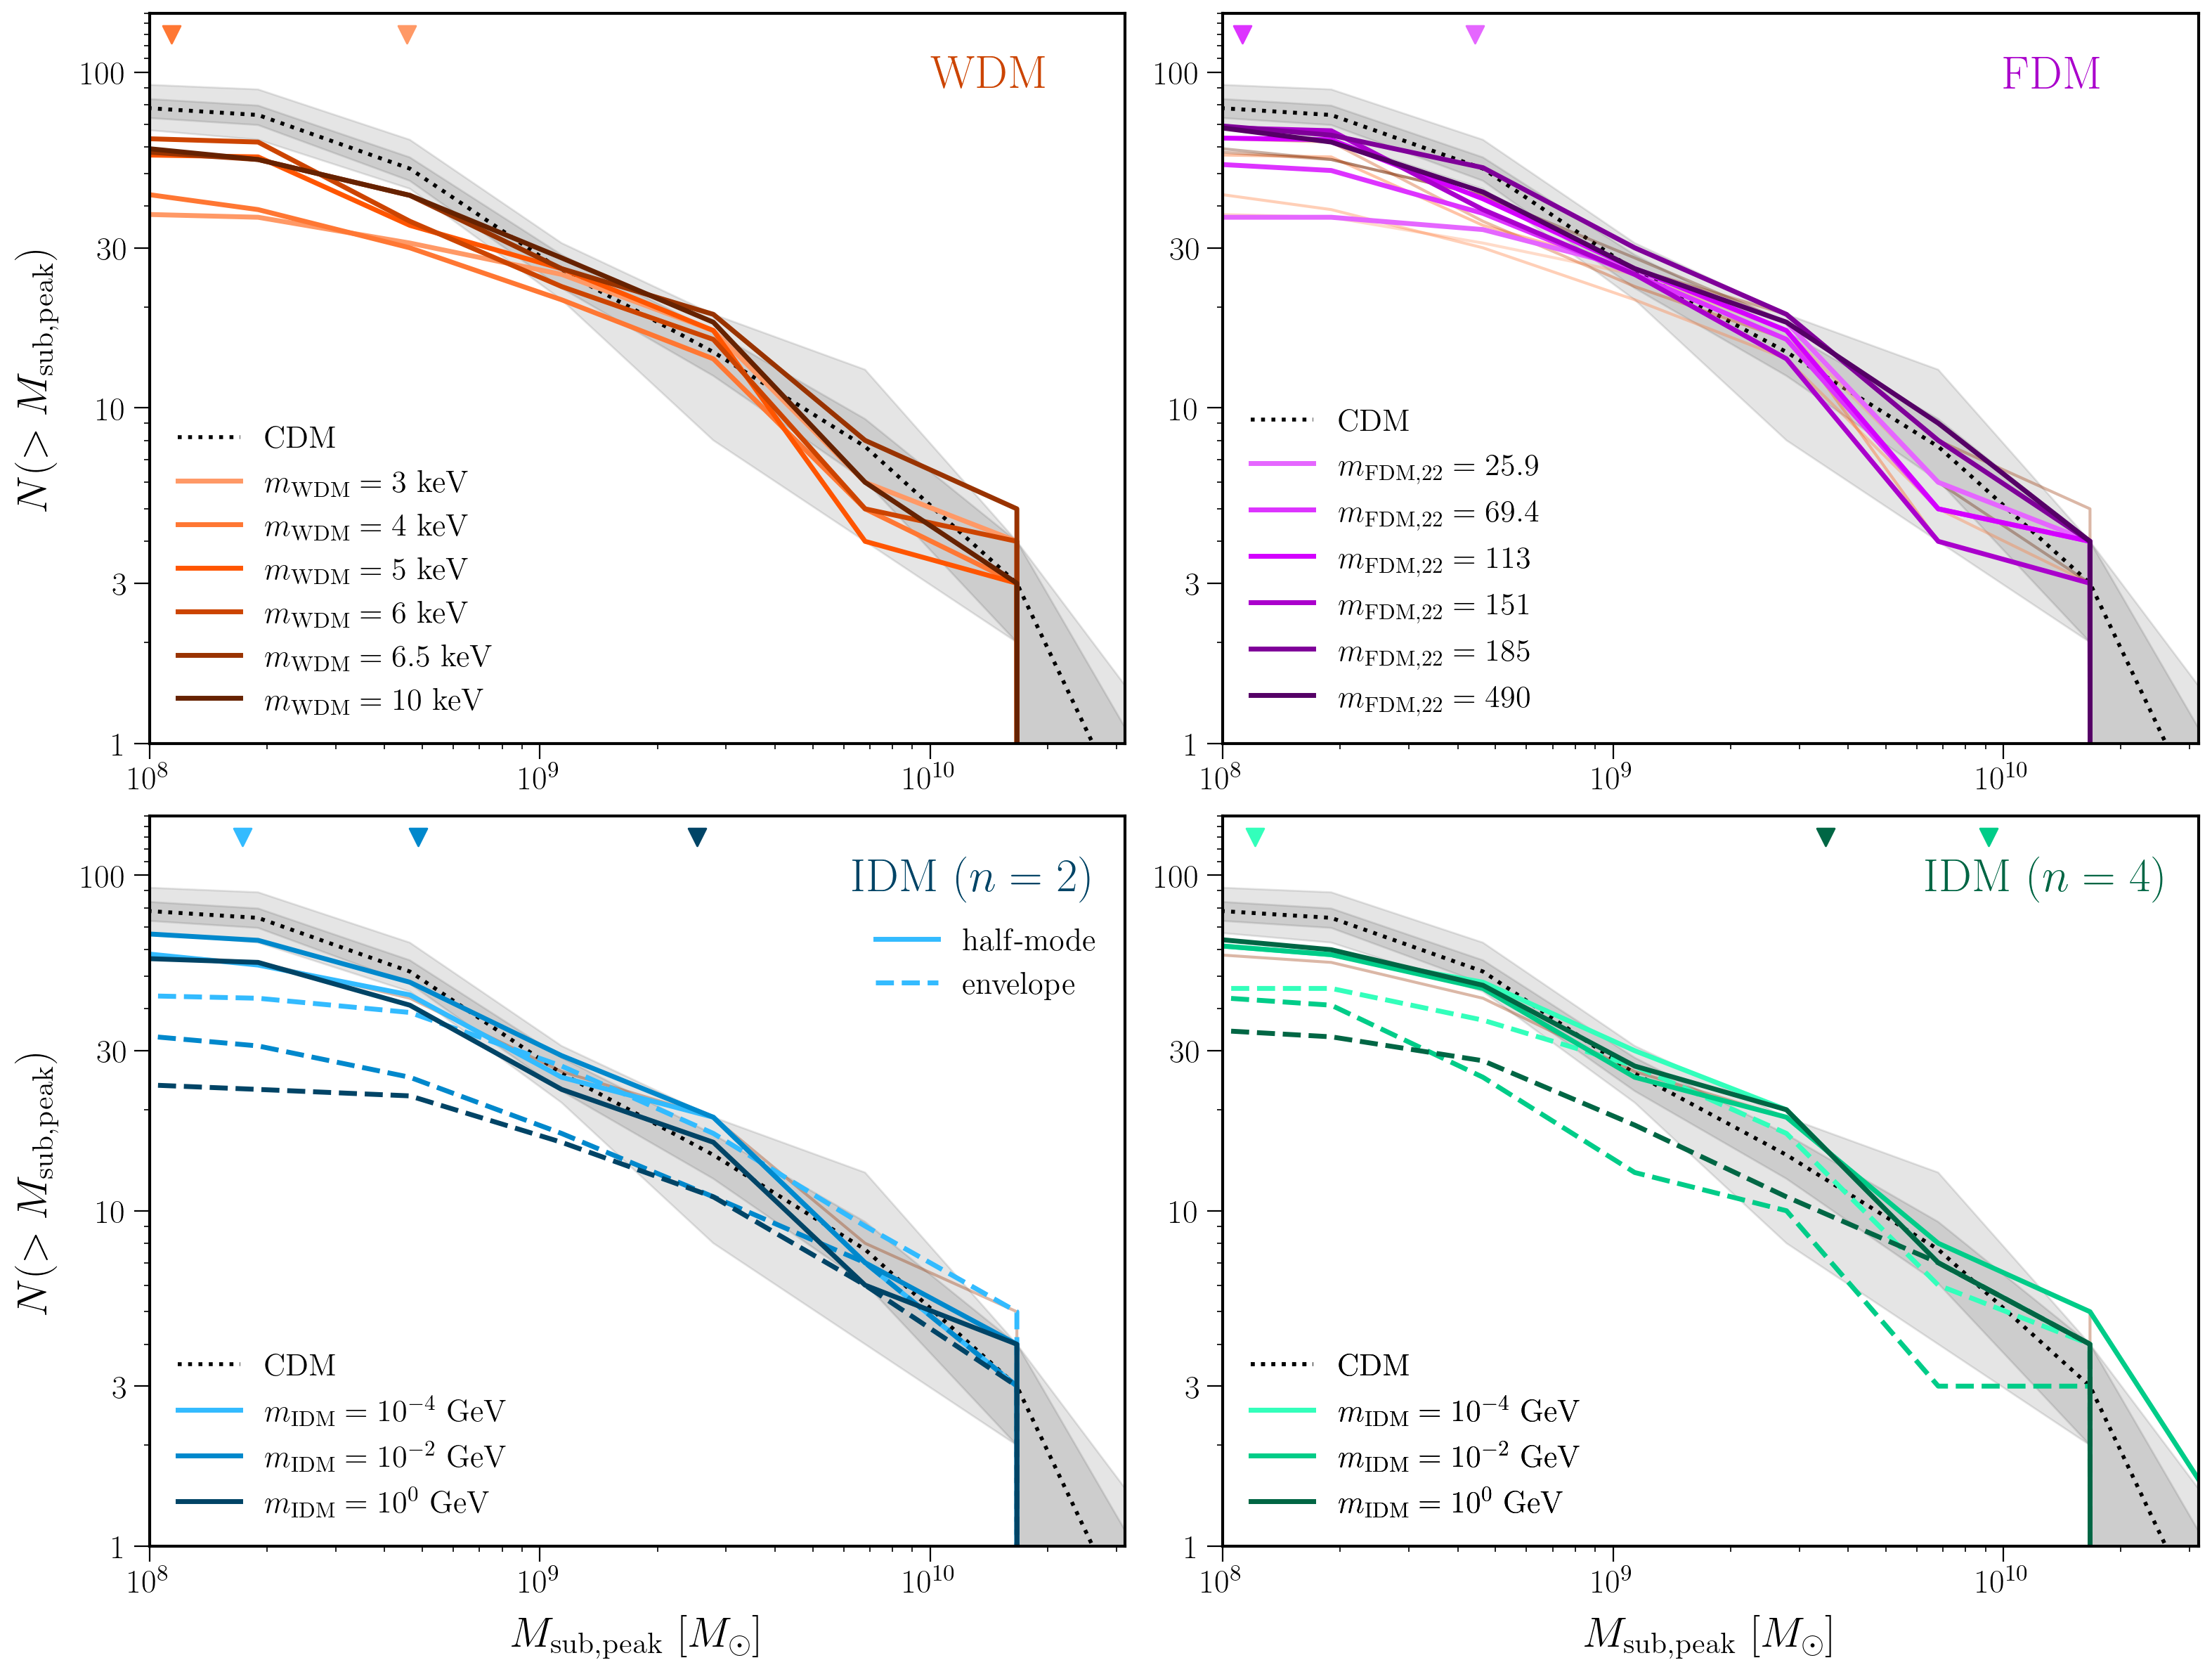

In [16]:
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(221)

halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

labels_wdm = {'3': r'$m_{\mathrm{WDM}}=3\ \mathrm{keV}$', '4': r'$m_{\mathrm{WDM}}=4\ \mathrm{keV}$',
         '5': r'$m_{\mathrm{WDM}}=5\ \mathrm{keV}$', '6': r'$m_{\mathrm{WDM}}=6\ \mathrm{keV}$',
         '6.5': r'$m_{\mathrm{WDM}}=6.5\ \mathrm{keV}$', '10': r'$m_{\mathrm{WDM}}=10\ \mathrm{keV}$'}

khm_wdm = {'3':22.3,'4':35.4,'5':44.6,'6':53.0,'6.5':58.1,'10':89.0}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],label=labels_wdm[mass],lw=2.5)
    ax.scatter(np.log10(M_k(khm_wdm[mass])),130,s=80,marker='v',color=sim_colors['wdm_{}'.format(mass)])


ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

# ax.set_xlabel(r'$m_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)
ax.text(10,90,r'$\mathrm{WDM}$',fontsize=24,color=sim_colors['wdm_6'])


###

ax = fig.add_subplot(222)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

labels_fdm = {'25.9': r'$m_{\mathrm{FDM},22}=25.9$', '69.4': r'$m_{\mathrm{FDM},22}=69.4$',
         '113': r'$m_{\mathrm{FDM},22}=113$', '151': r'$m_{\mathrm{FDM},22}=151$',
         '185': r'$m_{\mathrm{FDM},22}=185$', '490': r'$m_{\mathrm{FDM},22}=490$'}

khm_fdm = {'25.9':22.5,'69.4':35.6,'113':44.4,'151':51.1,'185':56.4,'490':89.4}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
for mass in ['25.9','69.4','113','151','185','490']:
    ind = sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    FDM8K_values, FDM8K_base = np.histogram(np.log10(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    FDM8K_cumulative = np.cumsum(FDM8K_values)
    ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind])-FDM8K_cumulative,
           c=sim_colors['fdm_{}e-22eV'.format(mass)],label=labels_fdm[mass],lw=2.5)
    ax.scatter(np.log10(M_k(khm_fdm[mass])),130,s=80,marker='v',color=sim_colors['fdm_{}e-22eV'.format(mass)])

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

# ax.set_xlabel(r'$m_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
# ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)
ax.text(10,90,r'$\mathrm{FDM}$',fontsize=24,color=sim_colors['fdm_151e-22eV'])

###

ax = fig.add_subplot(223)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':30.8},
          '1e-2GeV':{'halfmode':58,'envelope':21.8},
          '1GeV':{'halfmode':58,'envelope':12.6}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],label=labels_idm[mass],lw=2.5))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',color=sim_colors['idm_n2_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',edgecolor=sim_colors['idm_n2_{}'.format(mass)],
                      facecolor=sim_colors['idm_n2_{}'.format(mass)])
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$',lw=2.5)
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False, bbox_to_anchor = (1.0,0.885))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

# ax.text(8.1,5.4,r'$n=2$',fontsize=24)
ax.text(9.8,90,r'$\mathrm{IDM}\ (n=2)$',fontsize=24,color=sim_colors['idm_n2_1GeV'])


###

ax = fig.add_subplot(224)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':34.7},
          '1e-2GeV':{'halfmode':58,'envelope':8.2},
          '1GeV':{'halfmode':58,'envelope':11.3}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(IDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],label=labels_idm[mass],lw=2.5))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',color=sim_colors['idm_n4_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',edgecolor=sim_colors['idm_n4_{}'.format(mass)],
                      facecolor=sim_colors['idm_n4_{}'.format(mass)])
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$',lw=2.5)
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
# plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
# ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

# ax.text(8.1,5.4,r'$n=4$',fontsize=24)
ax.text(9.8,90,r'$\mathrm{IDM}\ (n=4)$',fontsize=24,color=sim_colors['idm_n4_1GeV'])

plt.tight_layout()
plt.subplots_adjust(wspace = 0.1)
#plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_all.pdf')

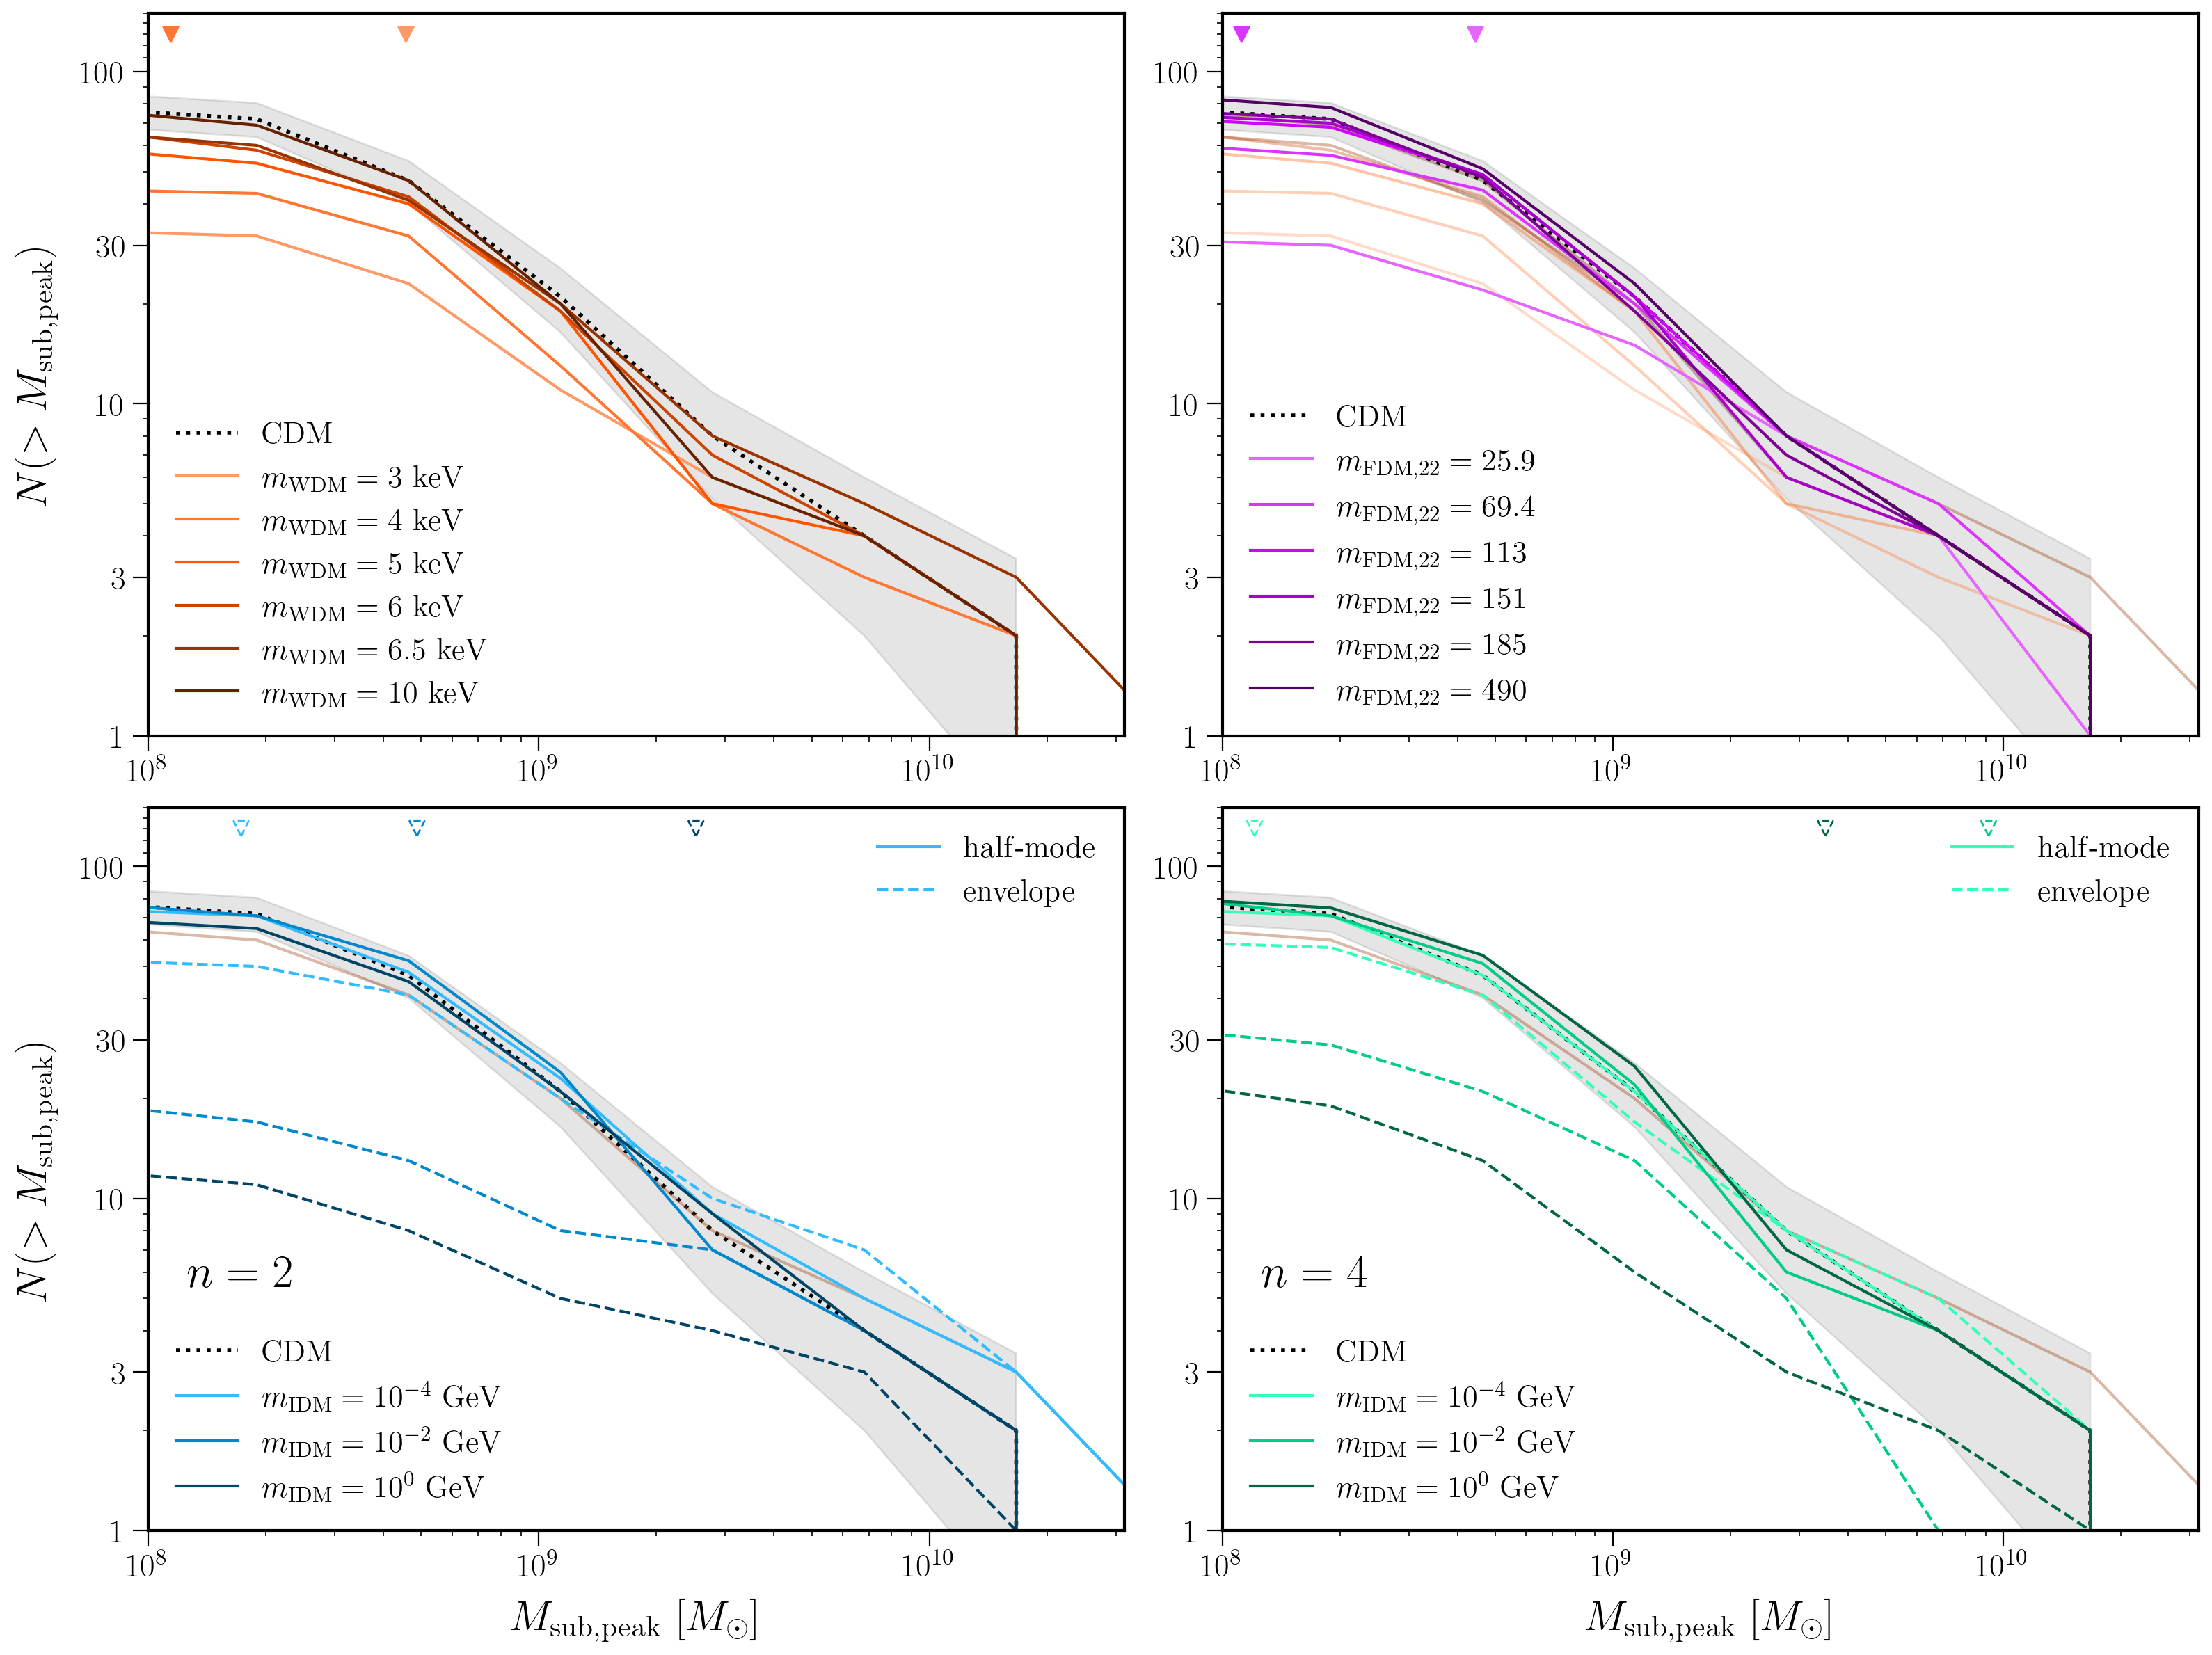

In [17]:
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(221)

halo_num = 'Halo113'
bins = np.linspace(7.5,11,10)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

labels_wdm = {'3': r'$m_{\mathrm{WDM}}=3\ \mathrm{keV}$', '4': r'$m_{\mathrm{WDM}}=4\ \mathrm{keV}$',
         '5': r'$m_{\mathrm{WDM}}=5\ \mathrm{keV}$', '6': r'$m_{\mathrm{WDM}}=6\ \mathrm{keV}$',
         '6.5': r'$m_{\mathrm{WDM}}=6.5\ \mathrm{keV}$', '10': r'$m_{\mathrm{WDM}}=10\ \mathrm{keV}$'}

khm_wdm = {'3':22.3,'4':35.4,'5':44.6,'6':53.0,'6.5':58.1,'10':89.0}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],label=labels_wdm[mass])
    ax.scatter(np.log10(M_k(khm_wdm[mass])),130,s=60,marker='v',color=sim_colors['wdm_{}'.format(mass)])


ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

# ax.set_xlabel(r'$m_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)

###

ax = fig.add_subplot(222)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

labels_fdm = {'25.9': r'$m_{\mathrm{FDM},22}=25.9$', '69.4': r'$m_{\mathrm{FDM},22}=69.4$',
         '113': r'$m_{\mathrm{FDM},22}=113$', '151': r'$m_{\mathrm{FDM},22}=151$',
         '185': r'$m_{\mathrm{FDM},22}=185$', '490': r'$m_{\mathrm{FDM},22}=490$'}

khm_fdm = {'25.9':22.5,'69.4':35.6,'113':44.4,'151':51.1,'185':56.4,'490':89.4}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
for mass in ['25.9','69.4','113','151','185','490']:
    ind = sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    FDM8K_values, FDM8K_base = np.histogram(np.log10(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    FDM8K_cumulative = np.cumsum(FDM8K_values)
    ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind])-FDM8K_cumulative,
           c=sim_colors['fdm_{}e-22eV'.format(mass)],label=labels_fdm[mass])
    ax.scatter(np.log10(M_k(khm_fdm[mass])),130,s=60,marker='v',color=sim_colors['fdm_{}e-22eV'.format(mass)])

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

# ax.set_xlabel(r'$m_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
# ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)

###

ax = fig.add_subplot(223)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

cdm = ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':30.8},
          '1e-2GeV':{'halfmode':58,'envelope':21.8},
          '1GeV':{'halfmode':58,'envelope':12.6}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],label=labels_idm[mass]))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',color=sim_colors['idm_n2_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',edgecolor=sim_colors['idm_n2_{}'.format(mass)],
                      facecolor='none',ls='--')
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$')
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

ax.text(8.1,5.4,r'$n=2$',fontsize=24)

###

ax = fig.add_subplot(224)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

cdm = ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':34.7},
          '1e-2GeV':{'halfmode':58,'envelope':8.2},
          '1GeV':{'halfmode':58,'envelope':11.3}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(IDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],label=labels_idm[mass]))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',color=sim_colors['idm_n4_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',edgecolor=sim_colors['idm_n4_{}'.format(mass)],
                      facecolor='none',ls='--')
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$')
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
# ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

ax.text(8.1,5.4,r'$n=4$',fontsize=24)

plt.tight_layout()
plt.subplots_adjust(wspace = 0.1)
# plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_all.pdf')

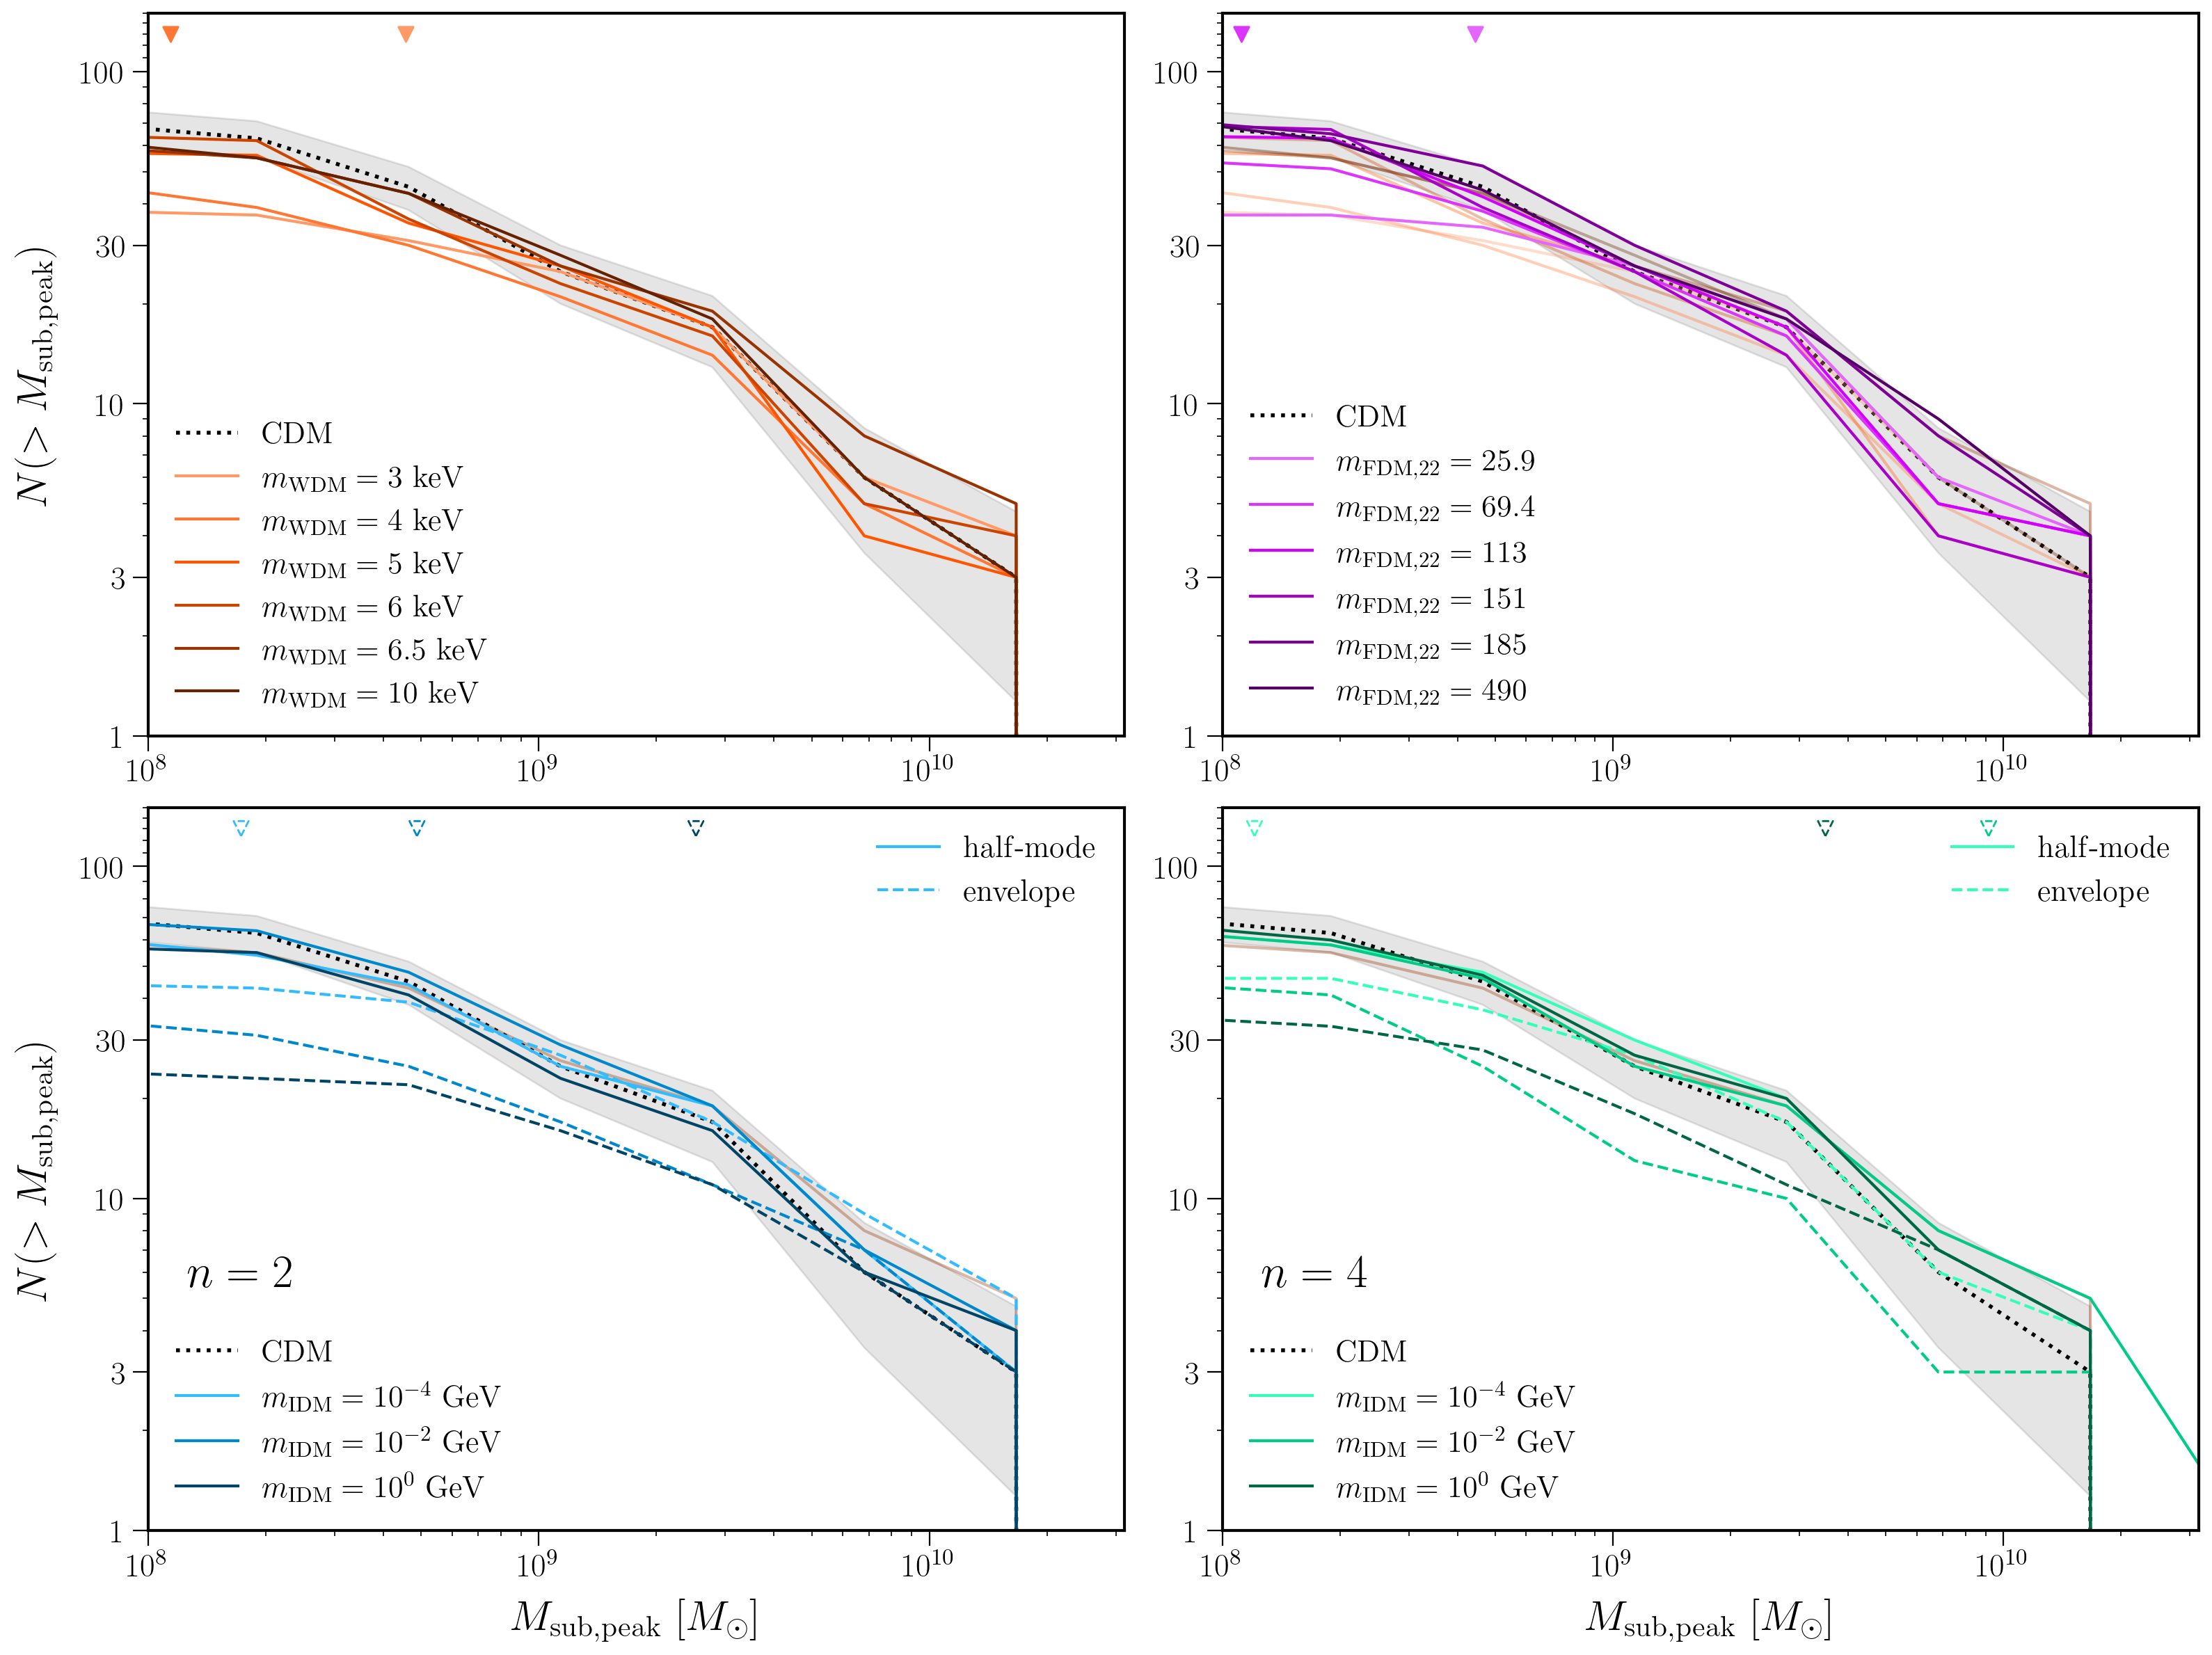

In [18]:
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(221)

halo_num = 'Halo023'
bins = np.linspace(7.5,11,10)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

labels_wdm = {'3': r'$m_{\mathrm{WDM}}=3\ \mathrm{keV}$', '4': r'$m_{\mathrm{WDM}}=4\ \mathrm{keV}$',
         '5': r'$m_{\mathrm{WDM}}=5\ \mathrm{keV}$', '6': r'$m_{\mathrm{WDM}}=6\ \mathrm{keV}$',
         '6.5': r'$m_{\mathrm{WDM}}=6.5\ \mathrm{keV}$', '10': r'$m_{\mathrm{WDM}}=10\ \mathrm{keV}$'}

khm_wdm = {'3':22.3,'4':35.4,'5':44.6,'6':53.0,'6.5':58.1,'10':89.0}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],label=labels_wdm[mass])
    ax.scatter(np.log10(M_k(khm_wdm[mass])),130,s=60,marker='v',color=sim_colors['wdm_{}'.format(mass)])


ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

# ax.set_xlabel(r'$m_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)

###

ax = fig.add_subplot(222)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

labels_fdm = {'25.9': r'$m_{\mathrm{FDM},22}=25.9$', '69.4': r'$m_{\mathrm{FDM},22}=69.4$',
         '113': r'$m_{\mathrm{FDM},22}=113$', '151': r'$m_{\mathrm{FDM},22}=151$',
         '185': r'$m_{\mathrm{FDM},22}=185$', '490': r'$m_{\mathrm{FDM},22}=490$'}

khm_fdm = {'25.9':22.5,'69.4':35.6,'113':44.4,'151':51.1,'185':56.4,'490':89.4}

for mass in ['3', '4', '5', '6','6.5', '10']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
for mass in ['25.9','69.4','113','151','185','490']:
    ind = sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    FDM8K_values, FDM8K_base = np.histogram(np.log10(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    FDM8K_cumulative = np.cumsum(FDM8K_values)
    ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind])-FDM8K_cumulative,
           c=sim_colors['fdm_{}e-22eV'.format(mass)],label=labels_fdm[mass])
    ax.scatter(np.log10(M_k(khm_fdm[mass])),130,s=60,marker='v',color=sim_colors['fdm_{}e-22eV'.format(mass)])

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

# ax.set_xlabel(r'$m_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
# ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)

###

ax = fig.add_subplot(223)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

cdm = ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':30.8},
          '1e-2GeV':{'halfmode':58,'envelope':21.8},
          '1GeV':{'halfmode':58,'envelope':12.6}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],label=labels_idm[mass]))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',color=sim_colors['idm_n2_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',edgecolor=sim_colors['idm_n2_{}'.format(mass)],
                      facecolor='none',ls='--')
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$')
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

ax.text(8.1,5.4,r'$n=2$',fontsize=24)

###

ax = fig.add_subplot(224)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

cdm = ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.35)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=10^{0}~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':34.7},
          '1e-2GeV':{'halfmode':58,'envelope':8.2},
          '1GeV':{'halfmode':58,'envelope':11.3}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        ind = sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
        IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        IDM8K_cumulative = np.cumsum(IDM8K_values)
        if method == 'halfmode':
            idms.append(ax.plot(IDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],label=labels_idm[mass]))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',color=sim_colors['idm_n4_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative,
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=60,marker='v',edgecolor=sim_colors['idm_n4_{}'.format(mass)],
                      facecolor='none',ls='--')
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$')
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$')

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
# ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

ax.text(8.1,5.4,r'$n=4$',fontsize=24)

plt.tight_layout()
plt.subplots_adjust(wspace = 0.1)
# plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_all.pdf')

In [19]:
wdm_shmf_dict = {}

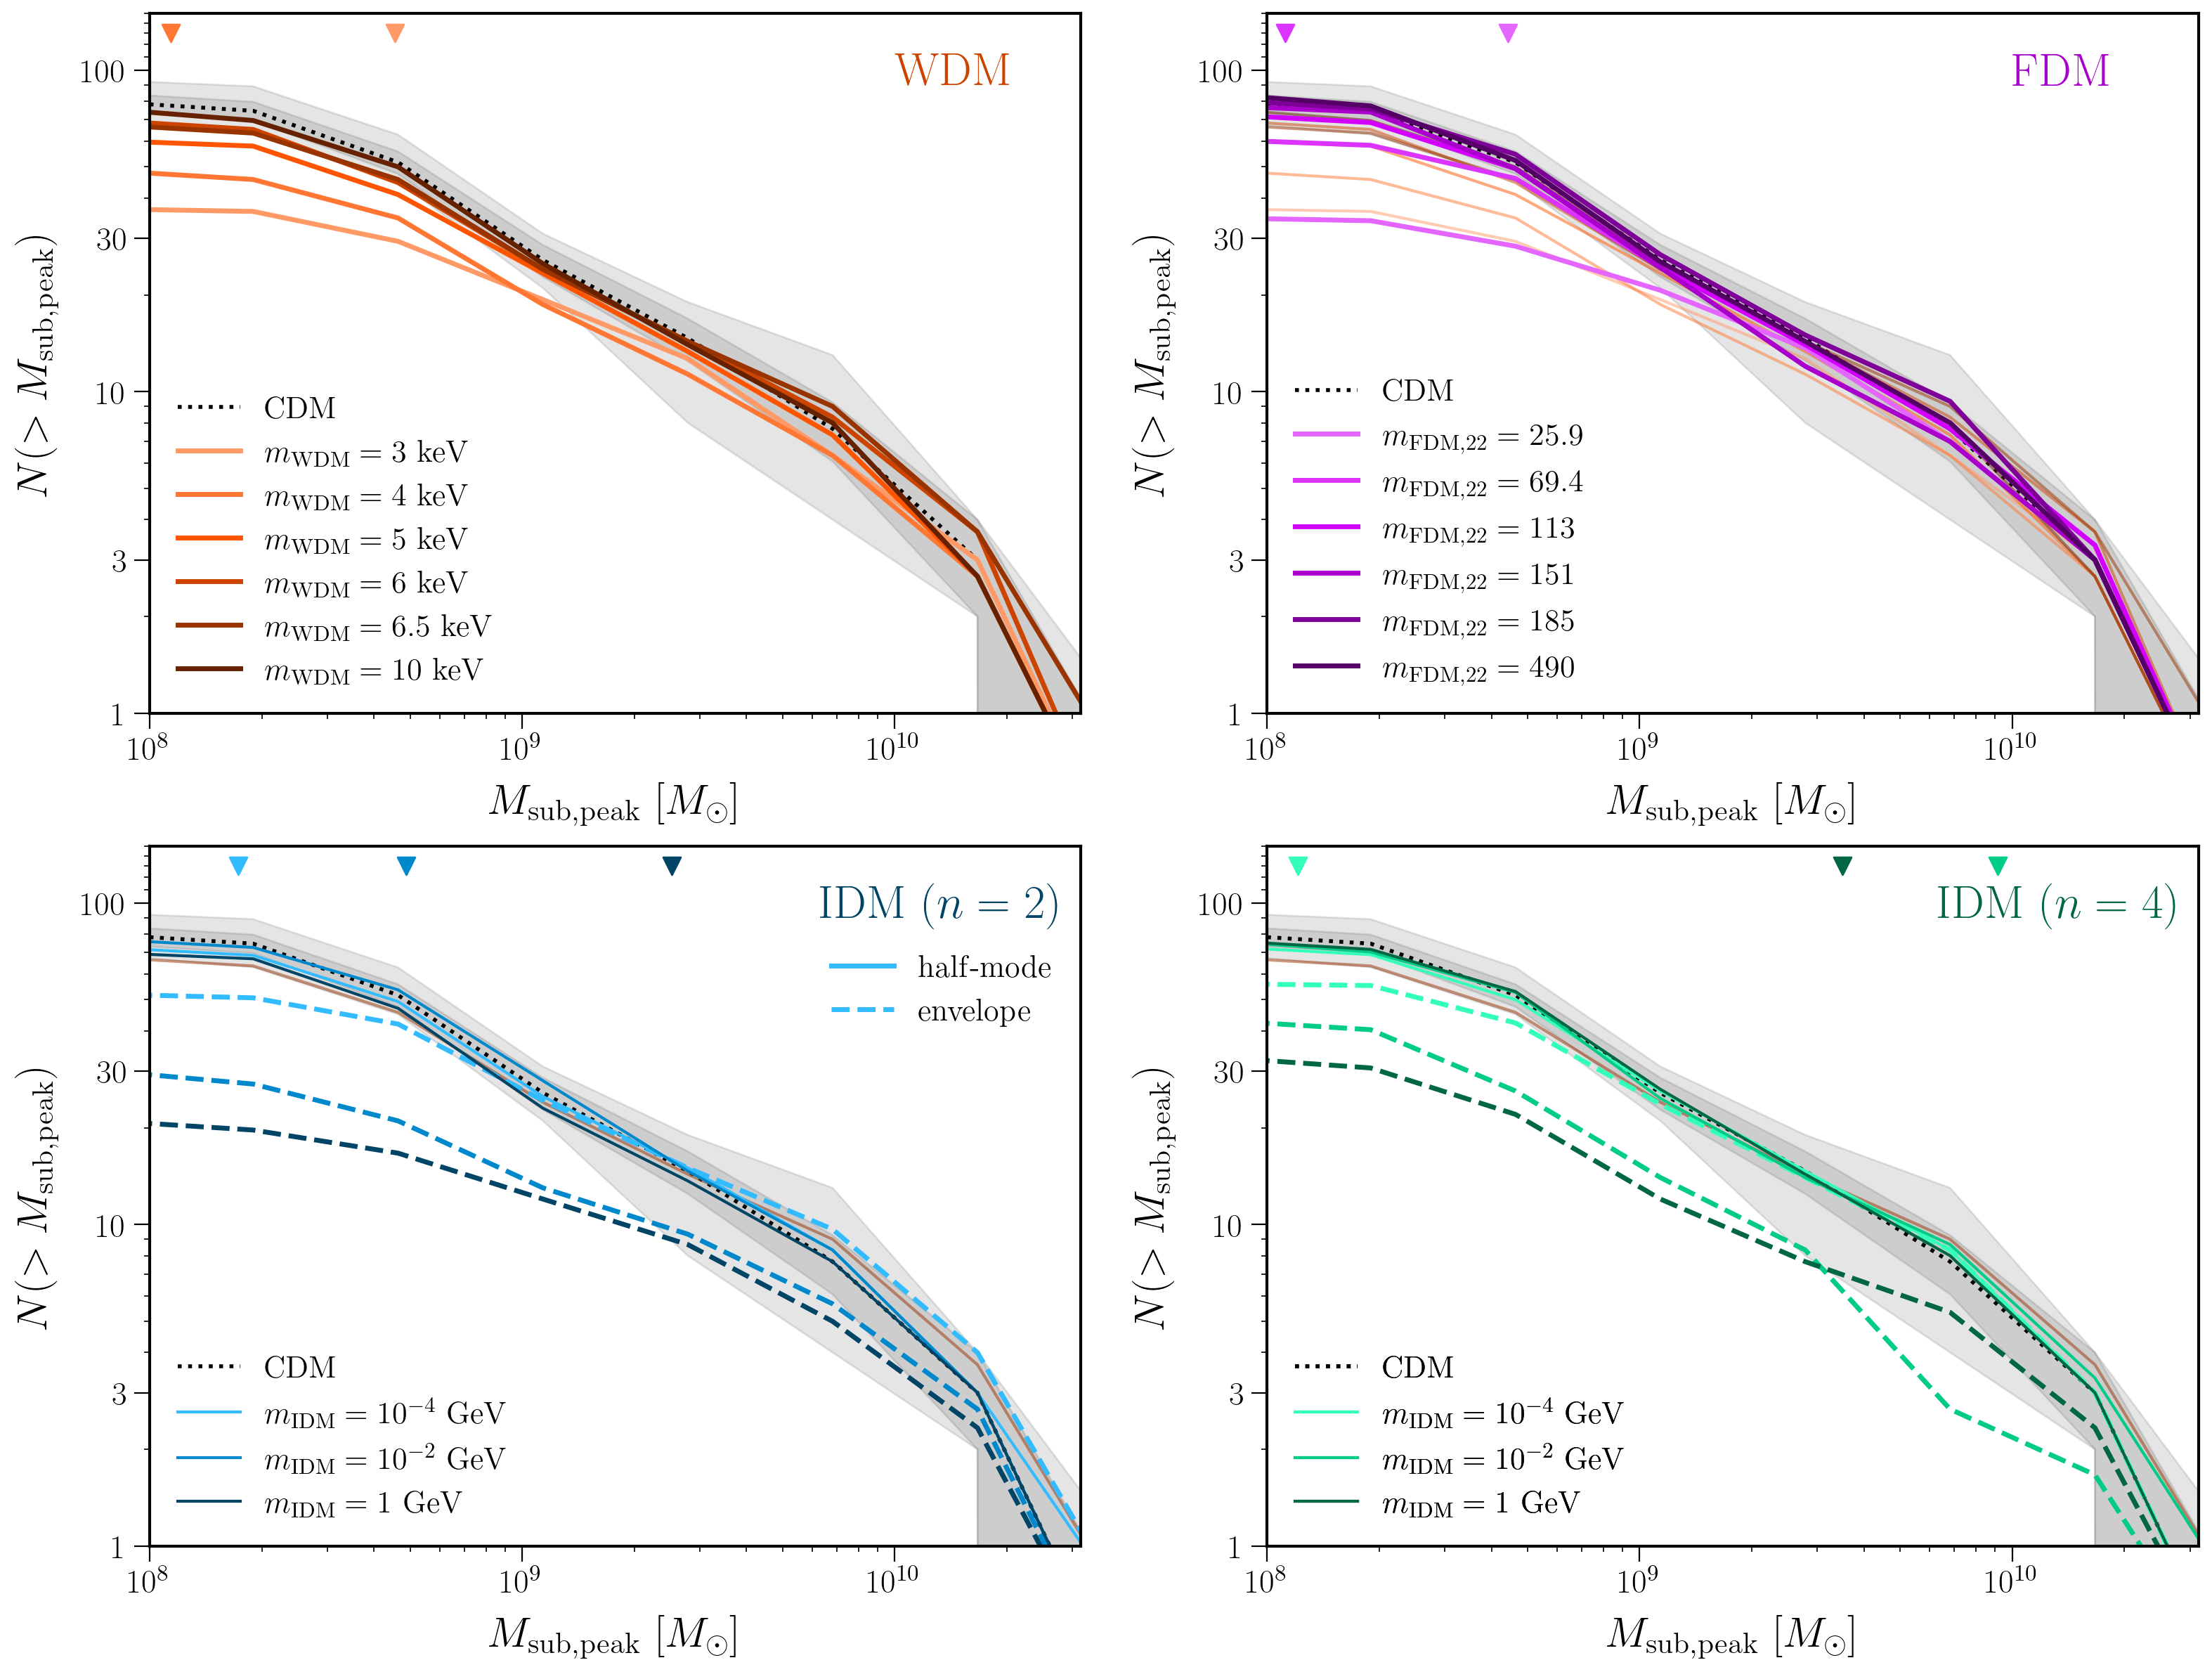

In [20]:
#use this one

fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(221)

# halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

labels_wdm = {'3': r'$m_{\mathrm{WDM}}=3\ \mathrm{keV}$', '4': r'$m_{\mathrm{WDM}}=4\ \mathrm{keV}$',
         '5': r'$m_{\mathrm{WDM}}=5\ \mathrm{keV}$', '6': r'$m_{\mathrm{WDM}}=6\ \mathrm{keV}$',
         '6.5': r'$m_{\mathrm{WDM}}=6.5\ \mathrm{keV}$', '10': r'$m_{\mathrm{WDM}}=10\ \mathrm{keV}$'}

khm_wdm = {'3':22.3,'4':35.4,'5':44.6,'6':53.0,'6.5':58.1,'10':89.0}

for mass in ['3', '4', '5', '6','6.5', '10']:
    wdm_shmf = []
    for halo_num in ['Halo004','Halo113','Halo023']:
        ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
        WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        WDM8K_cumulative = np.cumsum(WDM8K_values)
        wdm_shmf.append(len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative)
    wdm_shmf = np.array(wdm_shmf)
    ax.plot(WDM8K_base[1:], np.mean(wdm_shmf,axis=0),
           c=sim_colors['wdm_{}'.format(mass)],label=labels_wdm[mass],lw=2.5)
    ax.scatter(np.log10(M_k(khm_wdm[mass])),130,s=80,marker='v',color=sim_colors['wdm_{}'.format(mass)])
    wdm_shmf_dict[mass] = np.mean(wdm_shmf,axis=0)


ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)
ax.text(10,90,r'$\mathrm{WDM}$',fontsize=24,color=sim_colors['wdm_6'])


###

ax = fig.add_subplot(222)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

labels_fdm = {'25.9': r'$m_{\mathrm{FDM},22}=25.9$', '69.4': r'$m_{\mathrm{FDM},22}=69.4$',
         '113': r'$m_{\mathrm{FDM},22}=113$', '151': r'$m_{\mathrm{FDM},22}=151$',
         '185': r'$m_{\mathrm{FDM},22}=185$', '490': r'$m_{\mathrm{FDM},22}=490$'}

khm_fdm = {'25.9':22.5,'69.4':35.6,'113':44.4,'151':51.1,'185':56.4,'490':89.4}

for mass in ['3', '4', '5', '6','6.5', '10']:
    wdm_shmf = []
    for halo_num in ['Halo004','Halo113','Halo023']:
        ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
        WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        WDM8K_cumulative = np.cumsum(WDM8K_values)
        wdm_shmf.append(len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative)
    wdm_shmf = np.array(wdm_shmf)
    ax.plot(WDM8K_base[1:], np.mean(wdm_shmf,axis=0),
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.5)#,label=labels_wdm[mass])
    
for mass in ['25.9','69.4','113','151','185','490']:
    fdm_shmf = []
    for halo_num in ['Halo004','Halo113','Halo023']:
        ind = sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mvir']/0.7 > 1.2e8
        FDM8K_values, FDM8K_base = np.histogram(np.log10(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        FDM8K_cumulative = np.cumsum(FDM8K_values)
        fdm_shmf.append(len(sim_data[halo_num]['fdm_{}e-22eV'.format(mass)][2]['Mpeak'][ind])-FDM8K_cumulative)
    fdm_shmf = np.array(fdm_shmf)
    ax.plot(FDM8K_base[1:], np.mean(fdm_shmf,axis=0),
           c=sim_colors['fdm_{}e-22eV'.format(mass)],label=labels_fdm[mass],lw=2.5)
    ax.scatter(np.log10(M_k(khm_fdm[mass])),130,s=80,marker='v',color=sim_colors['fdm_{}e-22eV'.format(mass)])

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)
ax.text(10,90,r'$\mathrm{FDM}$',fontsize=24,color=sim_colors['fdm_151e-22eV'])


###

ax = fig.add_subplot(223)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

cdm = ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    wdm_shmf = []
    for halo_num in ['Halo004','Halo113','Halo023']:
        ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
        WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        WDM8K_cumulative = np.cumsum(WDM8K_values)
        wdm_shmf.append(len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative)
    ax.plot(WDM8K_base[1:], np.mean(wdm_shmf,axis=0),
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.5)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=1~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':30.8},
          '1e-2GeV':{'halfmode':58,'envelope':21.8},
          '1GeV':{'halfmode':58,'envelope':12.6}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        idm_shmf = []
        for halo_num in ['Halo004','Halo113','Halo023']:
            ind = sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
            IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                    bins=bins)
            IDM8K_cumulative = np.cumsum(IDM8K_values)
            idm_shmf.append(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative)
        idm_shmf = np.array(idm_shmf)
        if method == 'halfmode':
            idms.append(ax.plot(FDM8K_base[1:], np.mean(idm_shmf,axis=0),
               c=sim_colors['idm_n2_{}'.format(mass)],label=labels_idm[mass]))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',color=sim_colors['idm_n2_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], np.mean(idm_shmf,axis=0),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',edgecolor=sim_colors['idm_n2_{}'.format(mass)],
                      facecolor=sim_colors['idm_n2_{}'.format(mass)])
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$',lw=2.5)
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_n2_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n2_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False, bbox_to_anchor = (1.0,0.885))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

# ax.text(8.1,5.4,r'$n=2$',fontsize=24)
ax.text(9.8,90,r'$\mathrm{IDM}\ (n=2)$',fontsize=24,color=sim_colors['idm_n2_1GeV'])


###

ax = fig.add_subplot(224)

cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

cdm = ax.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

for mass in ['6.5']:
    wdm_shmf = []
    for halo_num in ['Halo004','Halo113','Halo023']:
        ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
        WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                                bins=bins)
        WDM8K_cumulative = np.cumsum(WDM8K_values)
        wdm_shmf.append(len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative)
    wdm_shmf = np.array(wdm_shmf)
    ax.plot(WDM8K_base[1:], np.mean(wdm_shmf,axis=0),
           c=sim_colors['wdm_{}'.format(mass)],alpha=0.5)#,label=labels_wdm[mass])
    
idms = []
labels_idm = {'1e-4GeV': r'$m_{\mathrm{IDM}}=10^{-4}~\mathrm{GeV}$',
             '1e-2GeV': r'$m_{\mathrm{IDM}}=10^{-2}~\mathrm{GeV}$',
             '1GeV': r'$m_{\mathrm{IDM}}=1~\mathrm{GeV}$'}

khm_idm = {'1e-4GeV':{'halfmode':58,'envelope':34.7},
          '1e-2GeV':{'halfmode':58,'envelope':8.2},
          '1GeV':{'halfmode':58,'envelope':11.3}}

for mass in ['1e-4GeV','1e-2GeV','1GeV']:
    for method in ['halfmode','envelope']:
        idm_shmf = []
        for halo_num in ['Halo004','Halo113','Halo023']:
            ind = sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mvir']/0.7 > 1.2e8
            IDM8K_values, IDM8K_base = np.histogram(np.log10(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind]/0.7), 
                                                    bins=bins)
            IDM8K_cumulative = np.cumsum(IDM8K_values)
            idm_shmf.append(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative)
        idm_shmf = np.array(idm_shmf)
        if method == 'halfmode':
            idms.append(ax.plot(IDM8K_base[1:], np.mean(idm_shmf,axis=0),
               c=sim_colors['idm_n4_{}'.format(mass)],label=labels_idm[mass]))
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',color=sim_colors['idm_n4_{}'.format(mass)])
        else:
            ax.plot(FDM8K_base[1:], np.mean(idm_shmf,axis=0),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)
            ax.scatter(np.log10(M_k(khm_idm[mass][method])),130,s=80,marker='v',edgecolor=sim_colors['idm_n4_{}'.format(mass)],
                      facecolor=sim_colors['idm_n4_{}'.format(mass)])
    if mass == '1e-4GeV':
        halfmode = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='-',label=r'$\mathrm{half}$-$\mathrm{mode}$',lw=2.5)
        envelope = ax.plot(FDM8K_base[1:], -1.*(len(sim_data[halo_num]['idm_{}'.format(mass)][method][2]['Mpeak'][ind])-IDM8K_cumulative),
               c=sim_colors['idm_n4_{}'.format(mass)],ls='--',label=r'$\mathrm{envelope}$',lw=2.5)

first_legend = plt.legend(handles=[cdm[0],idms[0][0],idms[1][0],idms[2][0]], loc=3, fontsize=16, frameon=False)
plt.gca().add_artist(first_legend)
# plt.legend(handles=[halfmode[0],envelope[0]], loc=1, fontsize=16, frameon=False)#, bbox_to_anchor = (1.0,0.95))

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)

# ax.text(8.1,5.4,r'$n=4$',fontsize=24)
ax.text(9.8,90,r'$\mathrm{IDM}\ (n=4)$',fontsize=24,color=sim_colors['idm_n4_1GeV'])


plt.tight_layout()
plt.subplots_adjust(wspace = 0.2)
#plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_all.pdf')

[array([40, 40, 34, 22, 15,  9,  3,  1,  1])]
[array([40, 40, 34, 22, 15,  9,  3,  1,  1]), array([33, 32, 23, 11,  6,  4,  2,  0,  0])]
[array([40, 40, 34, 22, 15,  9,  3,  1,  1]), array([33, 32, 23, 11,  6,  4,  2,  0,  0]), array([38, 37, 31, 25, 17,  6,  4,  0,  0])]


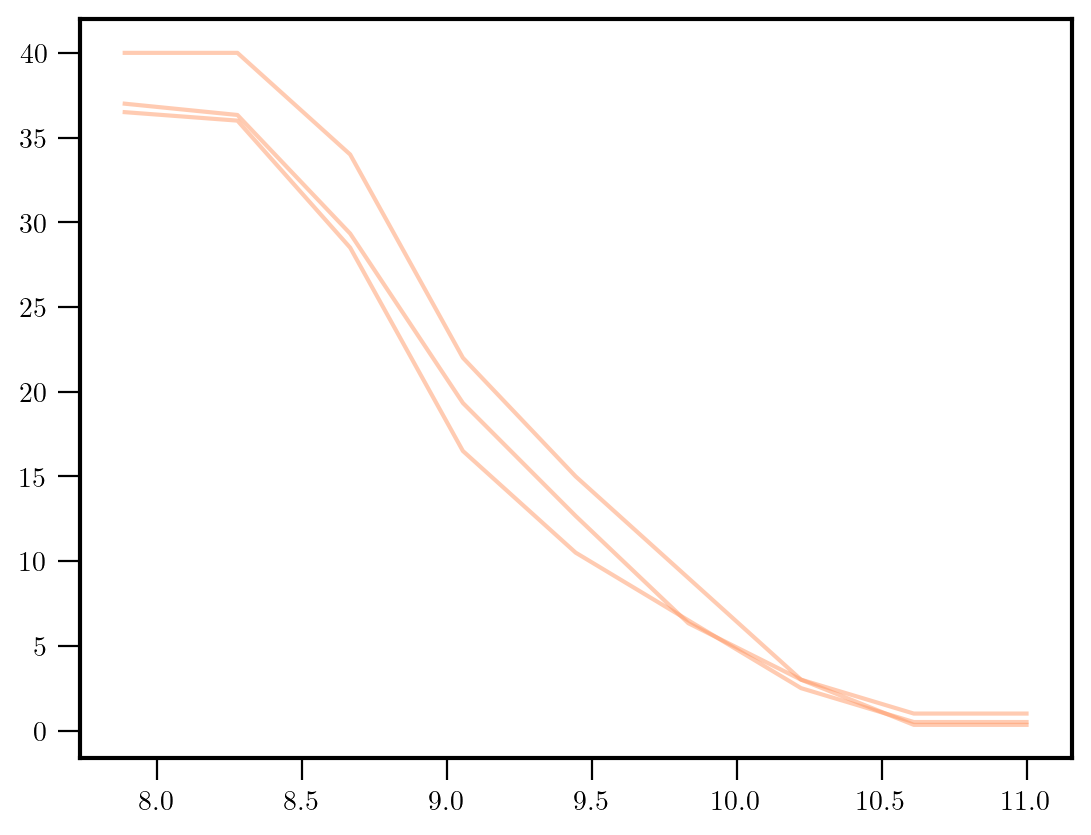

In [21]:
for mass in ['3']:
    wdm_shmf = []
    for halo_num in ['Halo004','Halo113','Halo023']:
        ind = sim_data[halo_num]['wdm_{}'.format('3')][2]['Mvir']/0.7 > 1.2e8
        WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format('3')][2]['Mpeak'][ind]/0.7), 
                                                    bins=bins)
        WDM8K_cumulative = np.cumsum(WDM8K_values)
        wdm_shmf.append(len(sim_data[halo_num]['wdm_{}'.format('3')][2]['Mpeak'][ind])-WDM8K_cumulative)
        print(wdm_shmf)
        plt.plot(WDM8K_base[1:], np.mean(np.array(wdm_shmf),axis=0), c=sim_colors['wdm_{}'.format('3')],alpha=0.5)#,label=labels_wdm[mass])
plt.show()

In [22]:
np.mean(wdm_shmf,axis=0)

array([37.        , 36.33333333, 29.33333333, 19.33333333, 12.66666667,
        6.33333333,  3.        ,  0.33333333,  0.33333333])

In [23]:
wdm_shmf

[array([40, 40, 34, 22, 15,  9,  3,  1,  1]),
 array([33, 32, 23, 11,  6,  4,  2,  0,  0]),
 array([38, 37, 31, 25, 17,  6,  4,  0,  0])]

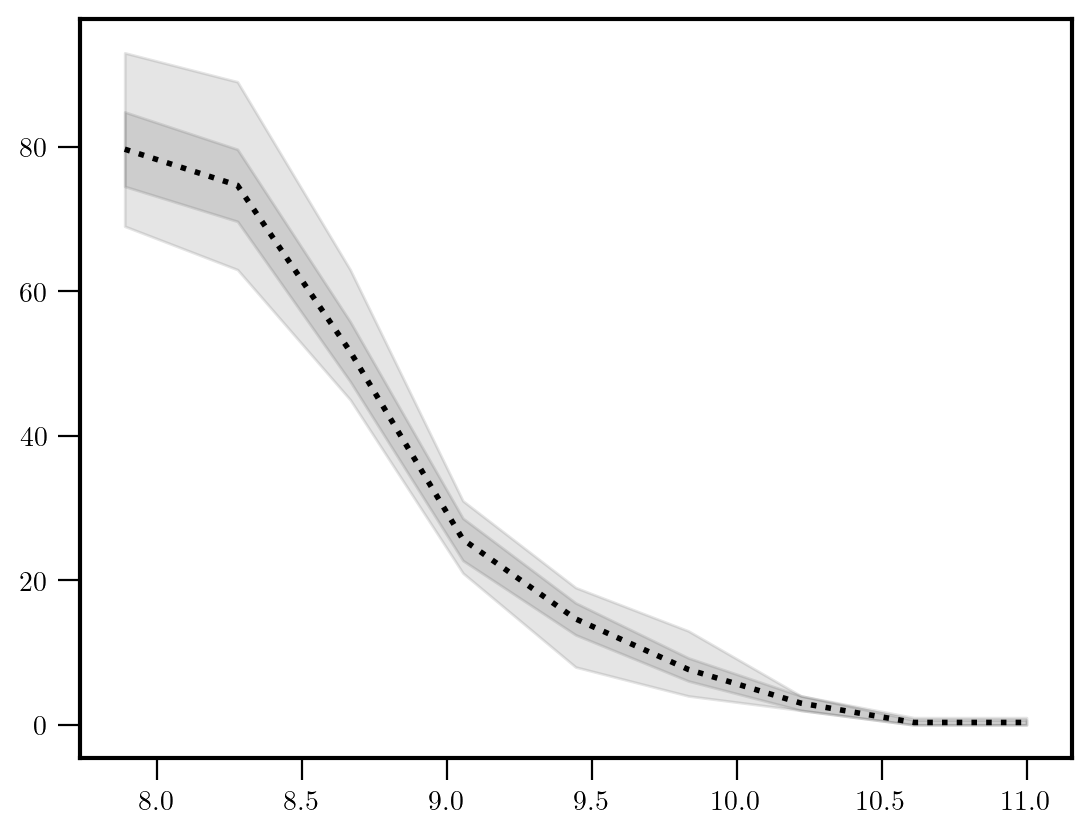

In [24]:
cdm_shmf = []
for halo_num in ['Halo004','Halo113','Halo023']:
    ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
    CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
    CDM8K_cumulative = np.cumsum(CDM8K_values)
    cdm_shmf.append(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative)

cdm_shmf = np.array(cdm_shmf)

cdm = plt.plot(CDM8K_base[1:], np.mean(cdm_shmf,axis=0),
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')
plt.fill_between(CDM8K_base[1:], np.min(cdm_shmf,axis=0),
                np.max(cdm_shmf,axis=0),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')

plt.fill_between(CDM8K_base[1:], np.mean(cdm_shmf,axis=0)-np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
                np.mean(cdm_shmf,axis=0)+np.sqrt(np.mean(cdm_shmf,axis=0))/np.sqrt(3.),
           color='k',alpha=0.1,rasterized=True)#,label='$\mathrm{CDM}$')
plt.show()

In [25]:
10**CDM8K_base[1:]

array([7.74263683e+07, 1.89573565e+08, 4.64158883e+08, 1.13646367e+09,
       2.78255940e+09, 6.81292069e+09, 1.66810054e+10, 4.08423865e+10,
       1.00000000e+11])

In [26]:
cdm_shmf

array([[93, 89, 63, 31, 19, 13,  4,  1,  1],
       [77, 72, 47, 21,  8,  4,  2,  0,  0],
       [69, 63, 45, 25, 17,  6,  3,  0,  0]])

### High-m_wdm test

KeyError: 'wdm_100'

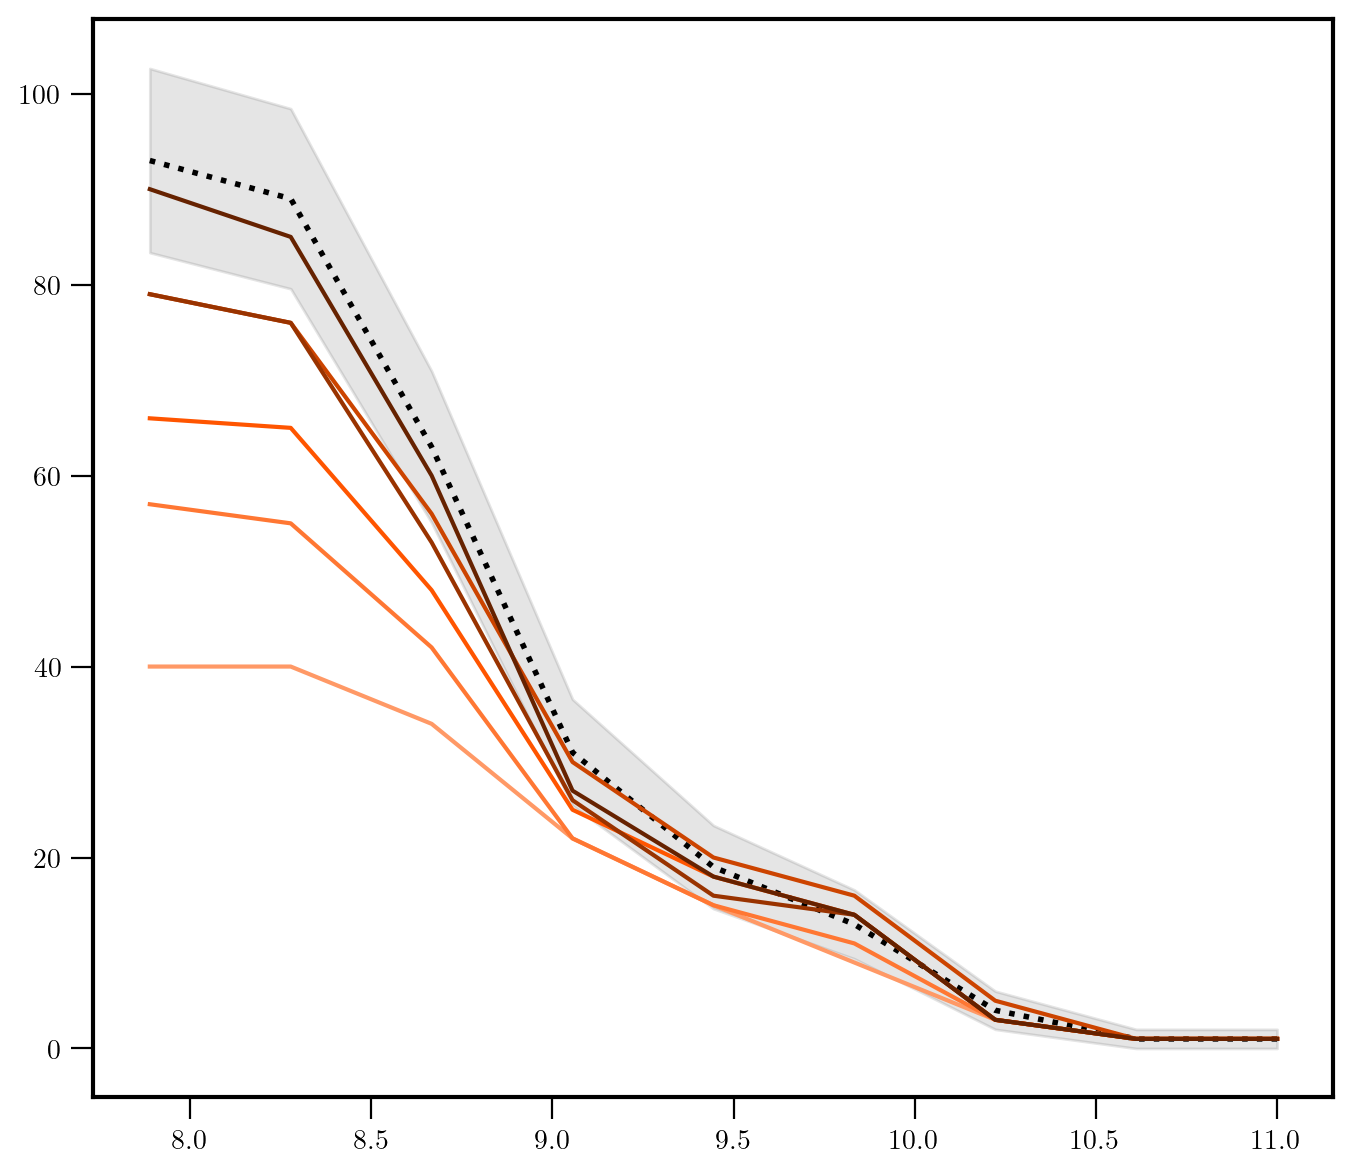

In [27]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

halo_num = 'Halo004'
bins = np.linspace(7.5,11,10)

ind = sim_data[halo_num]['cdm'][2]['Mvir']/0.7 > 1.2e8
CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo_num]['cdm'][2]['Mpeak'][ind]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax.plot(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative,
           'k',ls=':',lw=2,label='$\mathrm{CDM}$')

ax.fill_between(CDM8K_base[1:], len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative-np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
                len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative+np.sqrt(len(sim_data[halo_num]['cdm'][2]['Mpeak'][ind])-CDM8K_cumulative),
           color='k',alpha=0.1)#,label='$\mathrm{CDM}$')

labels_wdm = {'3': r'$m_{\mathrm{WDM}}=3\ \mathrm{keV}$', '4': r'$m_{\mathrm{WDM}}=4\ \mathrm{keV}$',
         '5': r'$m_{\mathrm{WDM}}=5\ \mathrm{keV}$', '6': r'$m_{\mathrm{WDM}}=6\ \mathrm{keV}$',
         '6.5': r'$m_{\mathrm{WDM}}=6.5\ \mathrm{keV}$', '10': r'$m_{\mathrm{WDM}}=10\ \mathrm{keV}$',
             '100': r'$m_{\mathrm{WDM}}=100\ \mathrm{keV}$','500': r'$m_{\mathrm{WDM}}=500\ \mathrm{keV}$'}

linestyles_wdm = {'3': '-', '4': '-', '5': '-', '6': '-', '6.5': '-', '10': '-', '100': '--', '500': '--'}

for mass in ['3', '4', '5', '6','6.5', '10','100','500']:
    ind = sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mvir']/0.7 > 1.2e8
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind]/0.7), 
                                            bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ax.plot(WDM8K_base[1:], len(sim_data[halo_num]['wdm_{}'.format(mass)][2]['Mpeak'][ind])-WDM8K_cumulative,
           c=sim_colors['wdm_{}'.format(mass)],ls=linestyles_wdm[mass],label=labels_wdm[mass])

ax.set_yscale('log')
ax.set_xlim(8.0,10.5)
ax.set_ylim([1,150])

ax.set_xticks([8,9,10])
ax.set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$'],fontsize=17)

ax.set_xticks(np.log10([2e8,3e8,4e8,5e8,6e8,7e8,8e8,9e8,2e9,3e9,4e9,5e9,6e9,7e9,8e9,9e9,2e10,3e10]),minor=True)
ax.set_xticklabels(['','','','','','','','','','','','','','','','','',''],minor=True)

ax.set_yticks([1,3,10,30,100])
ax.set_yticklabels([r'$1$',r'$3$',r'$10$',r'$30$',r'$100$'],fontsize=17)

ax.set_yticks([2,4,5,6,7,8,9,20,40,50,60,70,80,90,110,120,130,140,150],minor=True)
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','',''],fontsize=17,minor=True)

ax.set_xlabel(r'$M_{\mathrm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=22,labelpad=8)
ax.set_ylabel(r'$N(>M_{\mathrm{sub,peak}})$',fontsize=22,labelpad=12)
ax.legend(loc=3,fontsize=16,frameon=False)

# ax.set_title(r'$\mathrm{Warm\ Dark\ Matter}$',fontsize=25)
# plt.savefig('/central/groups/carnegie_poc/enadler/ncdm_resims/new_figures/shmf_wdm.pdf')
plt.show()

### Halo analysis

In [ ]:
sim_data[halo]['cdm'][1]['M200b']

In [ ]:
masses = {'wdm_3': 3., 'wdm_4': 4., 'wdm_5': 5., 'wdm_6': 6., 'wdm_6.5': 6.5, 'wdm_10': 10.}

In [ ]:
plt.figure(figsize=(8,6))

halo = 'Halo004'

a_half_wdm = {}
mpeak_wdm = {}
m200c_wdm = {}

distances = 1.*np.sqrt((sim_data[halo]['cdm'][1]['x']-sim_data[halo]['cdm'][0]['x'][0])**2+(sim_data[halo]['cdm'][1]['y']-sim_data[halo]['cdm'][0]['y'][0])**2+(sim_data[halo]['cdm'][1]['z']-sim_data[halo]['cdm'][0]['z'][0])**2)/0.7
dist_ind_cdm = (distances < 3.) & (sim_data[halo]['cdm'][1]['Mvir']/0.7 > 1.2e8)

a_half_cdm = sim_data[halo]['cdm'][1][dist_ind_cdm]['Halfmass_Scale']
mpeak_cdm = sim_data[halo]['cdm'][1][dist_ind_cdm]['Mpeak']
m200c_cdm = sim_data[halo]['cdm'][1][dist_ind_cdm]['M200c']

plt.hist(a_half_cdm,cumulative=True,bins=np.linspace(0,1,1000),histtype='step',density=True,color=sim_colors['cdm'],
        label=labels_wdm['cdm']+r' $\langle a_{\mathrm{1/2}}\rangle = $' +' {:0.2f}'.format(np.median(a_half_cdm)))

# for model in ['wdm_3','wdm_4','wdm_5','wdm_6','wdm_6.5','wdm_10'][::-1]:
# for model in ['fdm_25.9e-22eV','fdm_69.4e-22eV','fdm_113e-22eV','fdm_151e-22eV','fdm_185e-22eV','fdm_490e-22eV'][::-1]:
#     distances = 1.*np.sqrt((sim_data[halo][model][1]['x']-sim_data[halo][model][0]['x'][0])**2+(sim_data[halo][model][1]['y']-sim_data[halo][model][0]['y'][0])**2+(sim_data[halo][model][1]['z']-sim_data[halo][model][0]['z'][0])**2)/0.7
#     dist_ind = (distances < 3.) & (sim_data[halo][model][1]['Mvir']/0.7 > 1.2e8)
#     ### 
#     a_half_wdm[model] = sim_data[halo][model][1][dist_ind]['Halfmass_Scale']
#     mpeak_wdm[model] = sim_data[halo][model][1][dist_ind]['Mpeak']
#     m200c_wdm[model] = sim_data[halo][model][1][dist_ind]['M200c']
#     plt.hist(a_half_wdm[model],cumulative=True,bins=np.linspace(0,1,1000),histtype='step',density=True,color=sim_colors[model],
#             label=labels_fdm[model]+r' $\langle a_{\mathrm{1/2}}\rangle = $' +' {:0.2f}'.format(np.median(a_half_wdm[model])))
    
for model in ['idm_1GeV','idm_1e-2GeV','idm_1e-4GeV']:
    a_half_wdm[model] = {}
    mpeak_wdm[model] = {}
    m200c_wdm[model] = {}
    ls='-'
    for method in ['halfmode','envelope']:
        if method == 'envelope':
            ls = '--'
        distances = 1.*np.sqrt((sim_data[halo][model][method][1]['x']-sim_data[halo][model][method][0]['x'][0])**2+(sim_data[halo][model][method][1]['y']-sim_data[halo][model][method][0]['y'][0])**2+(sim_data[halo][model][method][1]['z']-sim_data[halo][model][method][0]['z'][0])**2)/0.7
        dist_ind = (distances < 3.) & (sim_data[halo][model][method][1]['Mvir']/0.7 > 1.2e8)
        ### 
        a_half_wdm[model][method] = sim_data[halo][model][method][1][dist_ind]['Halfmass_Scale']
        mpeak_wdm[model][method] = sim_data[halo][model][method][1][dist_ind]['Mpeak']
        m200c_wdm[model][method] = sim_data[halo][model][method][1][dist_ind]['M200c']
        plt.hist(a_half_wdm[model][method],cumulative=True,bins=np.linspace(0,1,1000),histtype='step',density=True,color=sim_colors[model],
                ls=ls,label=labels_idm[model][method]+r' $\langle a_{\mathrm{1/2}}\rangle = $' +' {:0.2f}'.format(np.median(a_half_wdm[model][method])))

plt.xlim(0.15,0.8)

plt.legend(loc=4,fontsize=14)
plt.title(halo,fontsize=16)

plt.xlabel(r'$a_{1/2}$',fontsize=16)
plt.ylabel(r'$\mathrm{CDF}$',fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize=(8,6))

bins = np.linspace(7.8,10.,10)

cdm_mean = []
cdm_lower = []
cdm_upper = []

for i in range(len(bins)-1):

#     ind = (np.log10(mpeak_cdm) > bins[i]) & (np.log10(mpeak_cdm) < bins[i+1])
    ind = (np.log10(m200c_cdm) > bins[i]) & (np.log10(m200c_cdm) < bins[i+1])
    cdm_mean.append(np.mean(z_half_cdm[ind]))
    cdm_lower.append(bootstrap((z_half_cdm[ind],), np.mean, confidence_level=0.68).confidence_interval[0])
    cdm_upper.append(bootstrap((z_half_cdm[ind],), np.mean, confidence_level=0.68).confidence_interval[1])
    
plt.plot(0.5*(bins[1:]+bins[:-1]),cdm_mean,c=sim_colors['cdm'],label=labels_wdm['cdm'])
plt.fill_between(0.5*(bins[1:]+bins[:-1]),cdm_lower,cdm_upper,facecolor=sim_colors['cdm'],alpha=0.15)

# for model in ['wdm_3','wdm_4','wdm_5','wdm_6','wdm_6.5','wdm_10'][::-1]:
# for model in ['fdm_25.9e-22eV','fdm_69.4e-22eV','fdm_113e-22eV','fdm_151e-22eV','fdm_185e-22eV','fdm_490e-22eV'][::-1]:
#     z_half_wdm = 1./a_half_wdm[model] - 1.
    
#     wdm_mean = []
#     wdm_lower = []
#     wdm_upper = []

#     for i in range(len(bins)-1):
#         ind = (np.log10(mpeak_wdm[model]) > bins[i]) & (np.log10(mpeak_wdm[model]) < bins[i+1])
# #         ind = (np.log10(m200c_wdm[model]) > bins[i]) & (np.log10(m200c_wdm[model]) < bins[i+1])
#         wdm_mean.append(np.mean(z_half_wdm[ind]))
#         wdm_lower.append(bootstrap((z_half_wdm[ind],), np.mean, confidence_level=0.68).confidence_interval[0])
#         wdm_upper.append(bootstrap((z_half_wdm[ind],), np.mean, confidence_level=0.68).confidence_interval[1])
        
#     plt.plot(0.5*(bins[1:]+bins[:-1]),wdm_mean,c=sim_colors[model],label=labels_fdm[model])
#     plt.fill_between(0.5*(bins[1:]+bins[:-1]),wdm_lower,wdm_upper,facecolor=sim_colors[model],alpha=0.15)

#     plt.plot(0.5*(bins[1:]+bins[:-1]),cdm_mean*((1.+1.23*Mhm(masses[model])/(10**(0.5*(bins[1:]+bins[:-1]))/0.7))**-0.56),
#             c=sim_colors[model],ls='--')

for model in ['idm_1GeV','idm_1e-2GeV','idm_1e-4GeV']:
    ls='-'
    for method in ['halfmode','envelope']:
        if method == 'envelope':
            ls = '--'
            
        z_half_wdm = 1./a_half_wdm[model][method] - 1.

        wdm_mean = []
        wdm_lower = []
        wdm_upper = []

        for i in range(len(bins)-1):
#             ind = (np.log10(mpeak_wdm[model][method]) > bins[i]) & (np.log10(mpeak_wdm[model][method]) < bins[i+1])
            ind = (np.log10(m200c_wdm[model][method]) > bins[i]) & (np.log10(m200c_wdm[model][method]) < bins[i+1])
            wdm_mean.append(np.mean(z_half_wdm[ind]))
            wdm_lower.append(bootstrap((z_half_wdm[ind],), np.mean, confidence_level=0.68).confidence_interval[0])
            wdm_upper.append(bootstrap((z_half_wdm[ind],), np.mean, confidence_level=0.68).confidence_interval[1])

        plt.plot(0.5*(bins[1:]+bins[:-1]),wdm_mean,c=sim_colors[model],ls=ls,label=labels_idm[model][method])
        plt.fill_between(0.5*(bins[1:]+bins[:-1]),wdm_lower,wdm_upper,facecolor=sim_colors[model],alpha=0.15)

    
plt.legend(loc=3,ncol=3,fontsize=14)
# plt.xlabel(r'$\log(M_{\mathrm{peak}}/M_{\mathrm{\odot}})$',fontsize=16)
plt.xlabel(r'$\log(M_{200c}/M_{\mathrm{\odot}})$',fontsize=16)
plt.ylabel(r'$z_{1/2}$',fontsize=16)

plt.show()

In [ ]:
    a_half_pred = a_half_wdm/((1.+1.23*Mhm(masses[model])/sim_data[halo][model][1][dist_ind]['M200c'])**-0.56)
    plt.hist(a_half_pred,cumulative=True,bins=np.linspace(0,1,1000),ls='--',histtype='step',density=True,color=sim_colors[model])


In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

halo = 'Halo004'

###

distances = 1.*np.sqrt((sim_data[halo]['cdm'][1]['x']-sim_data[halo]['cdm'][0]['x'][0])**2+(sim_data[halo]['cdm'][1]['y']-sim_data[halo]['cdm'][0]['y'][0])**2+(sim_data[halo]['cdm'][1]['z']-sim_data[halo]['cdm'][0]['z'][0])**2)/0.7
dist_ind_cdm = (distances < 3.) & (sim_data[halo]['cdm'][1]['Mvir']/0.7 > 1.2e8)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo]['cdm'][1]['Mpeak'][dist_ind_cdm]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax[0].plot(CDM8K_base[1:], len(sim_data[halo]['cdm'][1]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')

###

for model in ['fdm_25.9e-22eV','fdm_69.4e-22eV','fdm_113e-22eV','fdm_151e-22eV','fdm_185e-22eV','fdm_490e-22eV']:
    #['wdm_3','wdm_4','wdm_5','wdm_6','wdm_6.5','wdm_10']:
    distances = 1.*np.sqrt((sim_data[halo][model][1]['x']-sim_data[halo][model][0]['x'][0])**2+(sim_data[halo][model][1]['y']-sim_data[halo][model][0]['y'][0])**2+(sim_data[halo][model][1]['z']-sim_data[halo][model][0]['z'][0])**2)/0.7
    dist_ind = (distances < 3.) & (sim_data[halo][model][1]['Mvir']/0.7 > 1.2e8)
    ### 
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo][model][1]['Mpeak'][dist_ind]/0.7), bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ###
    ax[1].plot(WDM8K_base[1:], (1.*len(sim_data[halo][model][1]['Mpeak'][dist_ind])-WDM8K_cumulative)/(1.*len(sim_data[halo]['cdm'][1]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 
           c=sim_colors[model], linestyle='-',linewidth=1.5)
    ax[0].plot(WDM8K_base[1:], len(sim_data[halo][model][1]['Mpeak'][dist_ind])-WDM8K_cumulative,
           c=sim_colors[model],label=labels_fdm[model])

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 004\ Isolated}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
idm_linestyles = {'halfmode': '-', 'envelope': '--'}

In [ ]:
h = 0.7
omega_m = 0.286
rho_crit = 1.36*10**11*omega_m #msun/Mpc^3

def khm(mwdm):
    alpha = 0.049
    if mwdm >= 3.:
        alpha = 0.045
    elif mwdm > 6.:
        alpha = 0.043
    lambda_fs = (alpha*(mwdm**(-1.11))*((omega_m/0.25)**(0.11))*((h/0.7)**1.22))
    lambda_hm = 13.93*lambda_fs
    k_hm = 2*np.pi/lambda_hm
    return k_hm

def Mhm(mwdm):
    return (4.*np.pi*rho_crit/3.)*((2.*np.pi/(khm(mwdm)*0.7))/2.)**3.

In [ ]:
###### pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

halo = 'Halo004'

###

distances = 1.*np.sqrt((sim_data[halo]['cdm'][1]['x']-sim_data[halo]['cdm'][0]['x'][0])**2+(sim_data[halo]['cdm'][1]['y']-sim_data[halo]['cdm'][0]['y'][0])**2+(sim_data[halo]['cdm'][1]['z']-sim_data[halo]['cdm'][0]['z'][0])**2)/0.7
dist_ind_cdm = (distances < 3.) & (sim_data[halo]['cdm'][1]['Mvir']/0.7 > 1.2e8)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo]['cdm'][1]['Mpeak'][dist_ind_cdm]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax[0].plot(CDM8K_base[1:], len(sim_data[halo]['cdm'][1]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')

###

for model in ['idm_1GeV']:
    for method in ['halfmode','envelope']:
    #['wdm_3','wdm_4','wdm_5','wdm_6','wdm_6.5','wdm_10']:
        distances = 1.*np.sqrt((sim_data[halo][model][method][1]['x']-sim_data[halo][model][method][0]['x'][0])**2+(sim_data[halo][model][method][1]['y']-sim_data[halo][model][method][0]['y'][0])**2+(sim_data[halo][model][method][1]['z']-sim_data[halo][model][method][0]['z'][0])**2)/0.7
        dist_ind = (distances < 3.) & (sim_data[halo][model][method][1]['Mvir']/0.7 > 1.2e8)
        ### 
        WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo][model][method][1]['Mpeak'][dist_ind]/0.7), bins=bins)
        WDM8K_cumulative = np.cumsum(WDM8K_values)
        ###
        ax[1].plot(WDM8K_base[1:], (1.*len(sim_data[halo][model][method][1]['Mpeak'][dist_ind])-WDM8K_cumulative)/(1.*len(sim_data[halo]['cdm'][1]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 
               c=sim_colors[model],linewidth=1.5,linestyle=idm_linestyles[method],zorder=999)
        ax[0].plot(WDM8K_base[1:], len(sim_data[halo][model][method][1]['Mpeak'][dist_ind])-WDM8K_cumulative,
               c=sim_colors[model],label=labels_idm[model][method],linestyle=idm_linestyles[method],zorder=999)
        
weights_WDM_5 = (1.+(3.9*Mhm(7.3)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak'][dist_ind_cdm]/0.7))**1.1)**-0.64
CDM8K_values_WDM_5, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak'][dist_ind_cdm]/0.7), bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 
           c=sim_colors['wdm_5'], linestyle='-',linewidth=1,zorder=997,label=r'$m_{\mathrm{WDM,eff}}=7.3\ \mathrm{keV}$')

weights_WDM_5 = (1.+(3.9*Mhm(2.)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak'][dist_ind_cdm]/0.7))**1.1)**-0.64
CDM8K_values_WDM_5, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak'][dist_ind_cdm]/0.7), bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 
           c=sim_colors['wdm_5'], linestyle='--',linewidth=1,zorder=997,label=r'$m_{\mathrm{WDM,eff}}=2.0\ \mathrm{keV}$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 004\ Isolated}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

halo = 'Halo113'

###

distances = 1.*np.sqrt((sim_data[halo]['cdm'][2]['x']-sim_data[halo]['cdm'][0]['x'][0])**2+(sim_data[halo]['cdm'][2]['y']-sim_data[halo]['cdm'][0]['y'][0])**2+(sim_data[halo]['cdm'][2]['z']-sim_data[halo]['cdm'][0]['z'][0])**2)/0.7
dist_ind_cdm = (sim_data[halo]['cdm'][2]['Mvir']/0.7 > 1.2e8)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data[halo]['cdm'][2]['Mpeak'][dist_ind_cdm]/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

ax[0].plot(CDM8K_base[1:], len(sim_data[halo]['cdm'][2]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')

###

for model in ['wdm_3','wdm_4','wdm_5','wdm_6','wdm_6.5','wdm_10']:
    distances = 1.*np.sqrt((sim_data[halo][model][2]['x']-sim_data[halo][model][0]['x'][0])**2+(sim_data[halo][model][2]['y']-sim_data[halo][model][0]['y'][0])**2+(sim_data[halo][model][2]['z']-sim_data[halo][model][0]['z'][0])**2)/0.7
    dist_ind = (sim_data[halo][model][2]['Mvir']/0.7 > 1.2e8)
    ### 
    WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data[halo][model][2]['Mpeak'][dist_ind]/0.7), bins=bins)
    WDM8K_cumulative = np.cumsum(WDM8K_values)
    ###
    ax[1].plot(WDM8K_base[1:], (1.*len(sim_data[halo][model][2]['Mpeak'][dist_ind])-WDM8K_cumulative)/(1.*len(sim_data[halo]['cdm'][2]['Mpeak'][dist_ind_cdm])-CDM8K_cumulative), 
           c=sim_colors[model], linestyle='-',linewidth=1.5)
    ax[0].plot(WDM8K_base[1:], len(sim_data[halo][model][2]['Mpeak'][dist_ind])-WDM8K_cumulative,
           c=sim_colors[model],label=labels_wdm[model])

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 023\ Subhalos}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['idm_1GeV']['halfmode'][1]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

WDM8K_values_5, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['idm_1GeV']['envelope'][1]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative_5 = np.cumsum(WDM8K_values_5)

# WDM8K_values_10, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['wdm_10'][1]['Mpeak']/0.7), bins=bins)
# WDM8K_cumulative_10 = np.cumsum(WDM8K_values_10)

###
# weights_WDM = (1.+(2.7*(5e8)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM)
# CDM8K_cumulative_WDM = np.cumsum(CDM8K_values_WDM)

weights_WDM_5 = (1.+(2.7*(3.8e7)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
CDM8K_values_WDM_5, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

# weights_WDM_10 = (1.+(2.7*(9*10**6.)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM_10, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM_10)
# CDM8K_cumulative_WDM_10 = np.cumsum(CDM8K_values_WDM_10)

###

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['idm_1GeV']['halfmode'][1]['Mpeak'])-WDM8K_cumulative)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['idm_1GeV'], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['idm_1GeV']['envelope'][1]['Mpeak'])-WDM8K_cumulative_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['idm_1GeV'], linestyle='--',linewidth=1.5)

# ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['wdm_10'][1]['Mpeak'])-WDM8K_cumulative_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[4], linestyle='-',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM)-CDM8K_cumulative_WDM)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[0], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[1], linestyle='--',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_10)-CDM8K_cumulative_WDM_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[4], linestyle='--',linewidth=1.5)

ax[0].plot(CDM8K_base[1:], len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['idm_1GeV']['halfmode'][1]['Mpeak'])-WDM8K_cumulative,
           c=sim_colors['idm_1GeV'],label='$10^{-2}\ \mathrm{GeV\ halfmode}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['idm_1GeV']['envelope'][1]['Mpeak'])-WDM8K_cumulative_5,
           c=sim_colors['idm_1GeV'],linestyle='--',label='$10^{-2}\ \mathrm{GeV\ envelope}$')
# ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['wdm_10'][1]['Mpeak'])-WDM8K_cumulative_10,
#            c=custom_blues_complement[4],label='$\mathrm{WDM}\ 10\ \mathrm{keV}$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 023}$',fontsize=20)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(7,11)
ax[1].set_xticks([7,8,9,10,11])
ax[1].set_xticklabels([r'$10^7$',r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['fdm_25.9e-22eV'][1]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

WDM8K_values_5, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['fdm_185e-22eV'][1]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative_5 = np.cumsum(WDM8K_values_5)

WDM8K_values_10, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['fdm_490e-22eV'][1]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative_10 = np.cumsum(WDM8K_values_10)

###
# weights_WDM = (1.+(2.7*(5e8)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM)
# CDM8K_cumulative_WDM = np.cumsum(CDM8K_values_WDM)

weights_WDM_5 = (1.+(2.7*(3.8e7)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
CDM8K_values_WDM_5, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

# weights_WDM_10 = (1.+(2.7*(9*10**6.)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM_10, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM_10)
# CDM8K_cumulative_WDM_10 = np.cumsum(CDM8K_values_WDM_10)

###

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['fdm_25.9e-22eV'][1]['Mpeak'])-WDM8K_cumulative)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['fdm_25.9e-22eV'], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['fdm_185e-22eV'][1]['Mpeak'])-WDM8K_cumulative_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['fdm_185e-22eV'], linestyle='--',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['fdm_490e-22eV'][1]['Mpeak'])-WDM8K_cumulative_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['fdm_490e-22eV'], linestyle='-',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM)-CDM8K_cumulative_WDM)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[0], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[1], linestyle='--',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_10)-CDM8K_cumulative_WDM_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[4], linestyle='--',linewidth=1.5)

ax[0].plot(CDM8K_base[1:], len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['fdm_25.9e-22eV'][1]['Mpeak'])-WDM8K_cumulative,
           c=sim_colors['fdm_25.9e-22eV'],label='$25.9$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['fdm_185e-22eV'][1]['Mpeak'])-WDM8K_cumulative_5,
           c=sim_colors['fdm_185e-22eV'],linestyle='--',label='$185$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['fdm_490e-22eV'][1]['Mpeak'])-WDM8K_cumulative_10,
           c=sim_colors['fdm_185e-22eV'],label='$490$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 023}$',fontsize=20)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(7,11)
ax[1].set_xticks([7,8,9,10,11])
ax[1].set_xticklabels([r'$10^7$',r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(0,60,10)

CDM8K_values, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][1]['Vpeak'], bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

WDM8K_values, WDM8K_base = np.histogram(sim_data['Halo023']['wdm_3'][1]['Vpeak'], bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

WDM8K_values_5, WDM8K_base = np.histogram(sim_data['Halo023']['wdm_6.5'][1]['Vpeak'], bins=bins)
WDM8K_cumulative_5 = np.cumsum(WDM8K_values_5)

WDM8K_values_10, WDM8K_base = np.histogram(sim_data['Halo023']['wdm_10'][1]['Vpeak'], bins=bins)
WDM8K_cumulative_10 = np.cumsum(WDM8K_values_10)

###
weights_WDM = (1.+(2.7*(5e8)/(1.*sim_data['Halo023']['cdm'][1]['Mpeak'])))**-0.99
CDM8K_values_WDM, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][1]['Vpeak'], bins=bins, 
                                            weights=weights_WDM)
CDM8K_cumulative_WDM = np.cumsum(CDM8K_values_WDM)

weights_WDM_5 = (1.+(2.7*(9.1e7)/(1.*sim_data['Halo023']['cdm'][1]['Mpeak'])))**-0.99
CDM8K_values_WDM_5, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][1]['Vpeak'], bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

weights_WDM_10 = (1.+(2.7*(9*10**6.)/(1.*sim_data['Halo023']['cdm'][1]['Mpeak'])))**-0.99
CDM8K_values_WDM_10, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][1]['Vpeak'], bins=bins, 
                                            weights=weights_WDM_10)
CDM8K_cumulative_WDM_10 = np.cumsum(CDM8K_values_WDM_10)

###

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_3'][1]['Vpeak'])-WDM8K_cumulative)/(1.*len(sim_data['Halo023']['cdm'][1]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[0], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_6.5'][1]['Vpeak'])-WDM8K_cumulative_5)/(1.*len(sim_data['Halo023']['cdm'][1]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[1], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_10'][1]['Vpeak'])-WDM8K_cumulative_10)/(1.*len(sim_data['Halo023']['cdm'][1]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[4], linestyle='-',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM)-CDM8K_cumulative_WDM)/(1.*len(sim_data['Halo023']['cdm'][1]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[0], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo023']['cdm'][1]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[1], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_10)-CDM8K_cumulative_WDM_10)/(1.*len(sim_data['Halo023']['cdm'][1]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[4], linestyle='--',linewidth=1.5)

ax[0].plot(CDM8K_base[1:], len(sim_data['Halo023']['cdm'][1]['Vpeak'])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_3'][1]['Vpeak'])-WDM8K_cumulative,
           c=custom_blues_complement[0],label='$\mathrm{WDM}\ 3\ \mathrm{keV}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_6.5'][1]['Vpeak'])-WDM8K_cumulative_5,
           c=custom_blues_complement[1],label='$\mathrm{WDM}\ 6.5\ \mathrm{keV}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_10'][1]['Vpeak'])-WDM8K_cumulative_10,
           c=custom_blues_complement[4],label='$\mathrm{WDM}\ 10\ \mathrm{keV}$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 023}$',fontsize=20)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>V_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(10,60)
ax[1].set_xticks([10,20,30,40,50,60])
ax[1].set_xticklabels([r'$10$',r'$20$',r'$30$',r'$40$',r'$50$',r'$60$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$V_{\rm{peak}}\ [\mathrm{km\ s}^{-1}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Vpeak_function.pdf')
plt.show()

### Subhalo analysis

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data['Halo023']['cdm'][2]['Mpeak']/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data['Halo023']['wdm_3'][2]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

WDM8K_values_5, WDM8K_base = np.histogram(np.log10(sim_data['Halo023']['wdm_6.5'][2]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative_5 = np.cumsum(WDM8K_values_5)

WDM8K_values_10, WDM8K_base = np.histogram(np.log10(sim_data['Halo023']['wdm_10'][2]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative_10 = np.cumsum(WDM8K_values_10)

###
weights_WDM = (1.+(2.7*(5e8)/(1.*sim_data['Halo023']['cdm'][2]['Mpeak']/0.7)))**-0.99
CDM8K_values_WDM, CDM8K_base = np.histogram(np.log10(sim_data['Halo023']['cdm'][2]['Mpeak']/0.7), bins=bins, 
                                            weights=weights_WDM)
CDM8K_cumulative_WDM = np.cumsum(CDM8K_values_WDM)

weights_WDM_5 = (1.+(2.7*(3.8e7)/(1.*sim_data['Halo023']['cdm'][2]['Mpeak']/0.7)))**-0.99
CDM8K_values_WDM_5, CDM8K_base = np.histogram(np.log10(sim_data['Halo023']['cdm'][2]['Mpeak']/0.7), bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

weights_WDM_10 = (1.+(2.7*(9*10**6.)/(1.*sim_data['Halo023']['cdm'][2]['Mpeak']/0.7)))**-0.99
CDM8K_values_WDM_10, CDM8K_base = np.histogram(np.log10(sim_data['Halo023']['cdm'][2]['Mpeak']/0.7), bins=bins, 
                                            weights=weights_WDM_10)
CDM8K_cumulative_WDM_10 = np.cumsum(CDM8K_values_WDM_10)

###

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_3'][2]['Mpeak'])-WDM8K_cumulative)/(1.*len(sim_data['Halo023']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[0], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_6.5'][2]['Mpeak'])-WDM8K_cumulative_5)/(1.*len(sim_data['Halo023']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[2], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_10'][2]['Mpeak'])-WDM8K_cumulative_10)/(1.*len(sim_data['Halo023']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[4], linestyle='-',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM)-CDM8K_cumulative_WDM)/(1.*len(sim_data['Halo023']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[0], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo023']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[2], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_10)-CDM8K_cumulative_WDM_10)/(1.*len(sim_data['Halo023']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[4], linestyle='--',linewidth=1.5)

ax[0].plot(CDM8K_base[1:], len(sim_data['Halo023']['cdm'][2]['Mpeak'])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_3'][2]['Mpeak'])-WDM8K_cumulative,
           c=custom_blues_complement[0],label='$\mathrm{WDM}\ 3\ \mathrm{keV}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_6.5'][2]['Mpeak'])-WDM8K_cumulative_5,
           c=custom_blues_complement[2],label='$\mathrm{WDM}\ 6.5\ \mathrm{keV}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_10'][2]['Mpeak'])-WDM8K_cumulative_10,
           c=custom_blues_complement[4],label='$\mathrm{WDM}\ 10\ \mathrm{keV}$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 023}$',fontsize=20)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(7,11)
ax[1].set_xticks([7,8,9,10,11])
ax[1].set_xticklabels([r'$10^7$',r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(0,60,10)

CDM8K_values, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][2]['Vpeak'], bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

WDM8K_values, WDM8K_base = np.histogram(sim_data['Halo023']['wdm_3'][2]['Vpeak'], bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

WDM8K_values_5, WDM8K_base = np.histogram(sim_data['Halo023']['wdm_6.5'][2]['Vpeak'], bins=bins)
WDM8K_cumulative_5 = np.cumsum(WDM8K_values_5)

WDM8K_values_10, WDM8K_base = np.histogram(sim_data['Halo023']['wdm_10'][2]['Vpeak'], bins=bins)
WDM8K_cumulative_10 = np.cumsum(WDM8K_values_10)

###
weights_WDM = (1.+(2.7*(5e8)/(1.*sim_data['Halo023']['cdm'][2]['Mpeak'])))**-0.99
CDM8K_values_WDM, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][2]['Vpeak'], bins=bins, 
                                            weights=weights_WDM)
CDM8K_cumulative_WDM = np.cumsum(CDM8K_values_WDM)

weights_WDM_5 = (1.+(2.7*(9.1e7)/(1.*sim_data['Halo023']['cdm'][2]['Mpeak'])))**-0.99
CDM8K_values_WDM_5, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][2]['Vpeak'], bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

weights_WDM_10 = (1.+(2.7*(9*10**6.)/(1.*sim_data['Halo023']['cdm'][2]['Mpeak'])))**-0.99
CDM8K_values_WDM_10, CDM8K_base = np.histogram(sim_data['Halo023']['cdm'][2]['Vpeak'], bins=bins, 
                                            weights=weights_WDM_10)
CDM8K_cumulative_WDM_10 = np.cumsum(CDM8K_values_WDM_10)

###

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_3'][2]['Vpeak'])-WDM8K_cumulative)/(1.*len(sim_data['Halo023']['cdm'][2]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[0], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_6.5'][2]['Vpeak'])-WDM8K_cumulative_5)/(1.*len(sim_data['Halo023']['cdm'][2]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[2], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo023']['wdm_10'][2]['Vpeak'])-WDM8K_cumulative_10)/(1.*len(sim_data['Halo023']['cdm'][2]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[4], linestyle='-',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM)-CDM8K_cumulative_WDM)/(1.*len(sim_data['Halo023']['cdm'][2]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[0], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo023']['cdm'][2]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[2], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_10)-CDM8K_cumulative_WDM_10)/(1.*len(sim_data['Halo023']['cdm'][2]['Vpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[4], linestyle='--',linewidth=1.5)

ax[0].plot(CDM8K_base[1:], len(sim_data['Halo023']['cdm'][2]['Vpeak'])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_3'][2]['Vpeak'])-WDM8K_cumulative,
           c=custom_blues_complement[0],label='$\mathrm{WDM}\ 3\ \mathrm{keV}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_6.5'][2]['Vpeak'])-WDM8K_cumulative_5,
           c=custom_blues_complement[2],label='$\mathrm{WDM}\ 6.5\ \mathrm{keV}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo023']['wdm_10'][2]['Vpeak'])-WDM8K_cumulative_10,
           c=custom_blues_complement[4],label='$\mathrm{WDM}\ 10\ \mathrm{keV}$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 023}$',fontsize=20)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>V_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(10,60)
ax[1].set_xticks([10,20,30,40,50,60])
ax[1].set_xticklabels([r'$10$',r'$20$',r'$30$',r'$40$',r'$50$',r'$60$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$V_{\rm{peak}}\ [\mathrm{km\ s}^{-1}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Vpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['idm_1GeV']['halfmode'][1]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

WDM8K_values_5, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['idm_1GeV']['envelope'][1]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative_5 = np.cumsum(WDM8K_values_5)

# WDM8K_values_10, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['wdm_10'][1]['Mpeak']/0.7), bins=bins)
# WDM8K_cumulative_10 = np.cumsum(WDM8K_values_10)

###
# weights_WDM = (1.+(2.7*(5e8)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM)
# CDM8K_cumulative_WDM = np.cumsum(CDM8K_values_WDM)

weights_WDM_5 = (1.+(2.7*(3.8e7)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
CDM8K_values_WDM_5, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

# weights_WDM_10 = (1.+(2.7*(9*10**6.)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM_10, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM_10)
# CDM8K_cumulative_WDM_10 = np.cumsum(CDM8K_values_WDM_10)

###

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['idm_1GeV']['halfmode'][1]['Mpeak'])-WDM8K_cumulative)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['idm_1GeV'], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['idm_1GeV']['envelope'][1]['Mpeak'])-WDM8K_cumulative_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['idm_1GeV'], linestyle='--',linewidth=1.5)

# ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['wdm_10'][1]['Mpeak'])-WDM8K_cumulative_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[4], linestyle='-',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM)-CDM8K_cumulative_WDM)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[0], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[1], linestyle='--',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_10)-CDM8K_cumulative_WDM_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[4], linestyle='--',linewidth=1.5)

ax[0].plot(CDM8K_base[1:], len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['idm_1GeV']['halfmode'][1]['Mpeak'])-WDM8K_cumulative,
           c=sim_colors['idm_1GeV'],label='$10^{-2}\ \mathrm{GeV\ halfmode}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['idm_1GeV']['envelope'][1]['Mpeak'])-WDM8K_cumulative_5,
           c=sim_colors['idm_1GeV'],linestyle='--',label='$10^{-2}\ \mathrm{GeV\ envelope}$')
# ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['wdm_10'][1]['Mpeak'])-WDM8K_cumulative_10,
#            c=custom_blues_complement[4],label='$\mathrm{WDM}\ 10\ \mathrm{keV}$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 023}$',fontsize=20)
ax[0].set_yscale('log')
ax[0].set_yticks([1,100,8000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(7,11)
ax[1].set_xticks([7,8,9,10,11])
ax[1].set_xticklabels([r'$10^7$',r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

CDM8K_values, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][2]['Mpeak']/0.7), bins=bins)
CDM8K_cumulative = np.cumsum(CDM8K_values)

WDM8K_values, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['idm_1e-2GeV']['halfmode'][2]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative = np.cumsum(WDM8K_values)

WDM8K_values_5, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['idm_1e-2GeV']['envelope'][2]['Mpeak']/0.7), bins=bins)
WDM8K_cumulative_5 = np.cumsum(WDM8K_values_5)

# WDM8K_values_10, WDM8K_base = np.histogram(np.log10(sim_data['Halo004']['wdm_10'][1]['Mpeak']/0.7), bins=bins)
# WDM8K_cumulative_10 = np.cumsum(WDM8K_values_10)

###
# weights_WDM = (1.+(2.7*(5e8)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM)
# CDM8K_cumulative_WDM = np.cumsum(CDM8K_values_WDM)

weights_WDM_5 = (1.+(2.7*(3.8e7)/(1.*sim_data['Halo004']['cdm'][2]['Mpeak']/0.7)))**-0.99
CDM8K_values_WDM_5, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][2]['Mpeak']/0.7), bins=bins, 
                                            weights=weights_WDM_5)
CDM8K_cumulative_WDM_5 = np.cumsum(CDM8K_values_WDM_5)

# weights_WDM_10 = (1.+(2.7*(9*10**6.)/(1.*sim_data['Halo004']['cdm'][1]['Mpeak']/0.7)))**-0.99
# CDM8K_values_WDM_10, CDM8K_base = np.histogram(np.log10(sim_data['Halo004']['cdm'][1]['Mpeak']/0.7), bins=bins, 
#                                             weights=weights_WDM_10)
# CDM8K_cumulative_WDM_10 = np.cumsum(CDM8K_values_WDM_10)

###

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['idm_1e-2GeV']['halfmode'][2]['Mpeak'])-WDM8K_cumulative)/(1.*len(sim_data['Halo004']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['idm_1e-2GeV'], linestyle='-',linewidth=1.5)

ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['idm_1e-2GeV']['envelope'][2]['Mpeak'])-WDM8K_cumulative_5)/(1.*len(sim_data['Halo004']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=sim_colors['idm_1e-2GeV'], linestyle='--',linewidth=1.5)

# ax[1].plot(WDM8K_base[1:], (1.*len(sim_data['Halo004']['wdm_10'][1]['Mpeak'])-WDM8K_cumulative_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[4], linestyle='-',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM)-CDM8K_cumulative_WDM)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[0], linestyle='--',linewidth=1.5)

ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_5)-CDM8K_cumulative_WDM_5)/(1.*len(sim_data['Halo004']['cdm'][2]['Mpeak'])-CDM8K_cumulative), 
           c=custom_blues_complement[1], linestyle='--',linewidth=1.5)

# ax[1].plot(CDM8K_base[1:], (1.*np.sum(weights_WDM_10)-CDM8K_cumulative_WDM_10)/(1.*len(sim_data['Halo004']['cdm'][1]['Mpeak'])-CDM8K_cumulative), 
#            c=custom_blues_complement[4], linestyle='--',linewidth=1.5)

ax[0].plot(CDM8K_base[1:], len(sim_data['Halo004']['cdm'][2]['Mpeak'])-CDM8K_cumulative, 'k-',label='$\mathrm{CDM}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['idm_1e-2GeV']['halfmode'][2]['Mpeak'])-WDM8K_cumulative,
           c=sim_colors['idm_1e-2GeV'],label='$10^{-2}\ \mathrm{GeV\ halfmode}$')
ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['idm_1e-2GeV']['envelope'][2]['Mpeak'])-WDM8K_cumulative_5,
           c=sim_colors['idm_1e-2GeV'],linestyle='--',label='$10^{-2}\ \mathrm{GeV\ envelope}$')
# ax[0].plot(WDM8K_base[1:], len(sim_data['Halo004']['wdm_10'][1]['Mpeak'])-WDM8K_cumulative_10,
#            c=custom_blues_complement[4],label='$\mathrm{WDM}\ 10\ \mathrm{keV}$')

ax[1].plot(CDM8K_base[1:], CDM8K_base[:-1]-CDM8K_base[:-1]+1., 'k:', lw=1, zorder=999)

ax[0].set_title(r'$\mathrm{Halo\ 004}$',fontsize=20)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(7,11)
ax[1].set_xticks([7,8,9,10,11])
ax[1].set_xticklabels([r'$10^7$',r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
#plt.savefig('Mpeak_function.pdf')
plt.show()

In [ ]:
pylab.rcParams['xtick.major.pad']='8'

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})

for model in [...]:
    ax[1].plot(...)
    ax[0].plot(...)

ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].minorticks_off()

plt.tight_layout()
plt.show()